# ※ 필요한 패키지 및 데이터 불러오기

###### < 빠른 이동 >  
###### [Preprocessing 1 로 이동](#preprocessing-1)  
###### [EDA & Preprocessing 2 로 이동](#eda--preprocessing-2)  
###### [Preprocessing 3 으로 이동](#preprocessing-3)  
###### [EDA 2 로 이동](#eda-2)  

In [2]:
# 모듈 선언
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('./output/daegu.csv', encoding = 'cp949')

In [5]:
df.to_csv('./output/daegu.csv', encoding = 'cp949', index=False)

### 아래의 전처리부분을 전부 실행하면 daegu_final.csv 파일이 생성됨
### 파일이 있으면 여기를 데이터 프레임을 불러온 뒤 EDA2로 넘어가는 것이 빠름

In [9]:
df_final = pd.read_csv('./output/daegu_final.csv')

In [ ]:
df_final.to_csv('./output/daegu_final.csv', index=False)

# <hr>

# Preprocessing 1
> ###### made by ssj

#### Period
- 2022-05-06

<h4><details><summary>Index</summary><h6>

0. [전처리 전](#0-전처리-전)

1. [Column : hour](#1-column--hour)

2. [Column : lightning](#2-column--lightning)

3. [Column : condtion](#3-column--condition)

4. [Column : month](#4-column--month)

5. [전처리 후](#5-전처리-후)
</h6></details></h4>

####

###### [다음 파트로](#eda--preprocessing-2)

## 0. 전처리 전

In [115]:
df

day    hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0.0       0.0  16.500000       -1.0      53.0        53.0   
1           1   100.0       0.0  18.100000       -1.0      49.0        53.0   
2           1   200.0       0.0  19.700001       -1.0      46.0        53.0   
3           1   300.0       0.0  20.799999       -1.0      41.0        53.0   
4           1   400.0       0.0  22.200001       -1.0      36.0        53.0   
...       ...     ...       ...        ...        ...       ...         ...   
14831611   30  1900.0       0.0  10.700000        NaN      71.0         2.1   
14831612   30  2000.0       0.0  11.000000        NaN      65.0         2.2   
14831613   30  2100.0       0.0  11.900000        NaN      61.0         2.2   
14831614   30  2200.0       0.0  13.400000        NaN      53.0         2.0   
14831615   30  2300.0       0.0  15.100000        NaN      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0        1.0    6.0  2010    동인동  
1                  390.0        1.0    6.0  2010    동인동  
2                  390.0        1.0    6.0  2010    동인동  
3                  390.0        1.0    6.0  2010    동인동  
4                  390.0        2.0    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0        NaN    4.0  2022    구지면  
14831612           339.0        NaN    4.0  2022    구지면  
14831613           338.0        NaN    4.0  2022    구지면  
14831614           351.0        NaN    4.0  2022    구지면  
14831615             5.0        NaN    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [116]:
# 시간 단위가 100 단위로 되어 있음
# 100으로 나눠 정수 형태의 정시로 표현
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

In [117]:
df1

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000       -1.0      53.0        53.0   
1           1     1       0.0  18.100000       -1.0      49.0        53.0   
2           1     2       0.0  19.700001       -1.0      46.0        53.0   
3           1     3       0.0  20.799999       -1.0      41.0        53.0   
4           1     4       0.0  22.200001       -1.0      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000        NaN      71.0         2.1   
14831612   30    20       0.0  11.000000        NaN      65.0         2.2   
14831613   30    21       0.0  11.900000        NaN      61.0         2.2   
14831614   30    22       0.0  13.400000        NaN      53.0         2.0   
14831615   30    23       0.0  15.100000        NaN      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0        1.0    6.0  2010    동인동  
1                  390.0        1.0    6.0  2010    동인동  
2                  390.0        1.0    6.0  2010    동인동  
3                  390.0        1.0    6.0  2010    동인동  
4                  390.0        2.0    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0        NaN    4.0  2022    구지면  
14831612           339.0        NaN    4.0  2022    구지면  
14831613           338.0        NaN    4.0  2022    구지면  
14831614           351.0        NaN    4.0  2022    구지면  
14831615             5.0        NaN    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [118]:
# lightning NA값(-1) 제거
# 이후 데이터 타입 정수형으로 변환
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

In [119]:
df2

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0        1.0    6.0  2010    동인동  
1                  390.0        1.0    6.0  2010    동인동  
2                  390.0        1.0    6.0  2010    동인동  
3                  390.0        1.0    6.0  2010    동인동  
4                  390.0        2.0    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0        NaN    4.0  2022    구지면  
14831612           339.0        NaN    4.0  2022    구지면  
14831613           338.0        NaN    4.0  2022    구지면  
14831614           351.0        NaN    4.0  2022    구지면  
14831615             5.0        NaN    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [120]:
# NA값(-1) 제거
# 이후 데이터 타입 정수형으로 변환

df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

In [121]:
df3

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0          1    6.0  2010    동인동  
1                  390.0          1    6.0  2010    동인동  
2                  390.0          1    6.0  2010    동인동  
3                  390.0          1    6.0  2010    동인동  
4                  390.0          2    6.0  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0         -1    4.0  2022    구지면  
14831612           339.0         -1    4.0  2022    구지면  
14831613           338.0         -1    4.0  2022    구지면  
14831614           351.0         -1    4.0  2022    구지면  
14831615             5.0         -1    4.0  2022    구지면  

[14831616 rows x 12 columns]

## 4. Column : month
- 월을 정수형으로 표현

In [122]:
# Month 데이터 타입 정수형으로 변환

df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [123]:
df4

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0          1      6  2010    동인동  
1                  390.0          1      6  2010    동인동  
2                  390.0          1      6  2010    동인동  
3                  390.0          1      6  2010    동인동  
4                  390.0          2      6  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0         -1      4  2022    구지면  
14831612           339.0         -1      4  2022    구지면  
14831613           338.0         -1      4  2022    구지면  
14831614           351.0         -1      4  2022    구지면  
14831615             5.0         -1      4  2022    구지면  

[14831616 rows x 12 columns]

## 5. 전처리 후

In [124]:
df_pre = df4
df_pre

day  hour  rainfall       temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.500000         -1      53.0        53.0   
1           1     1       0.0  18.100000         -1      49.0        53.0   
2           1     2       0.0  19.700001         -1      46.0        53.0   
3           1     3       0.0  20.799999         -1      41.0        53.0   
4           1     4       0.0  22.200001         -1      36.0        53.0   
...       ...   ...       ...        ...        ...       ...         ...   
14831611   30    19       0.0  10.700000         -1      71.0         2.1   
14831612   30    20       0.0  11.000000         -1      65.0         2.2   
14831613   30    21       0.0  11.900000         -1      61.0         2.2   
14831614   30    22       0.0  13.400000         -1      53.0         2.0   
14831615   30    23       0.0  15.100000         -1      41.0         2.1   

          wind_direction  condition  month  year region  
0                  390.0          1      6  2010    동인동  
1                  390.0          1      6  2010    동인동  
2                  390.0          1      6  2010    동인동  
3                  390.0          1      6  2010    동인동  
4                  390.0          2      6  2010    동인동  
...                  ...        ...    ...   ...    ...  
14831611           335.0         -1      4  2022    구지면  
14831612           339.0         -1      4  2022    구지면  
14831613           338.0         -1      4  2022    구지면  
14831614           351.0         -1      4  2022    구지면  
14831615             5.0         -1      4  2022    구지면  

[14831616 rows x 12 columns]

In [52]:
# 메모리 정리를 위해 선언했던 기존 데이터들 제거

del(df)
del(df1)
del(df2)
del(df3)
del(df4)

# <hr>

# EDA & Preprocessing 2
> ###### made by ssj

#### Period
- 2022.05.06 ~ 2022.05.12

<h4><details><summary>Index</summary><h6>

1. [year](#1-year)

2. [month](#2-month)

3. [day](#3-day)

4. [hour](#4-hour)

5. [date](#5-date)

6. [rainfall](#6-rainfall)
    - 6-1. [rainfall processing](#6-1-rainfall-preprocessing)
<br><br>
7. [tempreture](#7-tempreture)

8. [lightning](#8-lightning)

9. [humidity](#9-humidity)
    - 9-1. [humidity processing](#9-1-humidity-preprocessing)
<br><br>
10. [wind](#10-wind)
    - 10-1. [wind speed](#10-1-windspeed)
    - 10-2. [wind direction](#10-2-winddirection)
    - 10-3. [wind preprocessing](#10-3-windpreprocessing-공사중)
<br><br>
11. [condition](#11-condition)
</h6></details></h4>
<br>

###### [이전 파트로](#preprocessing-1)
###### [다음 파트로](#preprocessing-3)

#### 1. year
요약
- 값이 없는 None이 없음
- 2010년부터 2022년까지 존재
- 2010년과 2022년은 모든 월이 있는게 아니므로 일수가 적음
- 윤년에 해당하는 날은 하루치인 296개의 데이터가 더 존재

In [21]:
# year에서 결측치(NA) 카운트 합
# 결측치 수 확인

df_pre['year'].isna().sum()

0

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


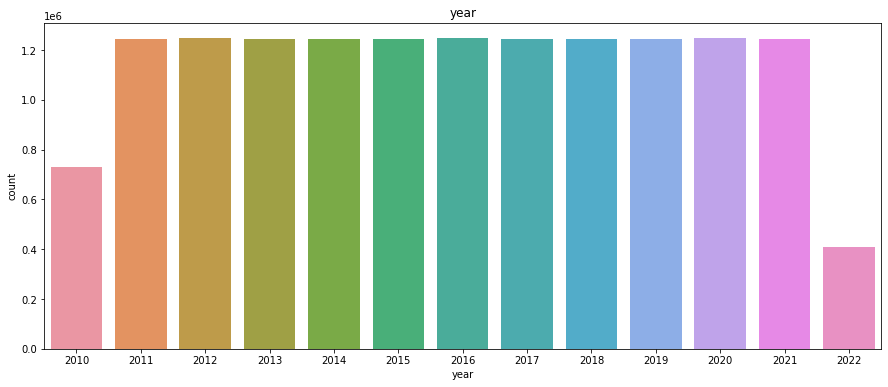

In [22]:
# 연 단위 카운트 그래프 생성
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['year'])
plt.title('year')
plt.show()

In [23]:
# 각 연도별 데이터의 수
temp = []
for i in range(2010,2023):
    result = df_final[df_final['year'] == i].size
    print("{0:>4}년 :".format(i), "{0:>8}".format(result))
    temp.append(result)

2010년 : 10939680
2011년 : 18658800
2012년 : 18709920
2013년 : 18658800
2014년 : 18658800
2015년 : 18658800
2016년 : 18709920
2017년 : 18658800
2018년 : 18658800
2019년 : 18658800
2020년 : 18709920
2021년 : 18658800
2022년 :  6134400


#### 2. month
요약
- 2010년에는 6월부터 데이터가 존재
- 2022년에는 5월부터 데이터가 없음

In [15]:
# N/A 값 있는지 여부 확인
df_pre['month'].isna().sum()

0

In [16]:
# 최대값과 함께 넣으면 해당하는 원형에서 해당하는 위치의 x좌표 y좌표를 반환
def encode_sin_cos(df_,col_n,max_val):
    df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
    df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)
    
    return df_

df_month = df_pre[['day','hour','month','year']]

# 1년은 12개월이므로 월 데이터의 x,y 좌표 생성
data_month = encode_sin_cos(df_month,'month',12)

C:\Users\popcorn\AppData\Local\Temp\ipykernel_15080\3495798647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
C:\Users\popcorn\AppData\Local\Temp\ipykernel_15080\3495798647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)


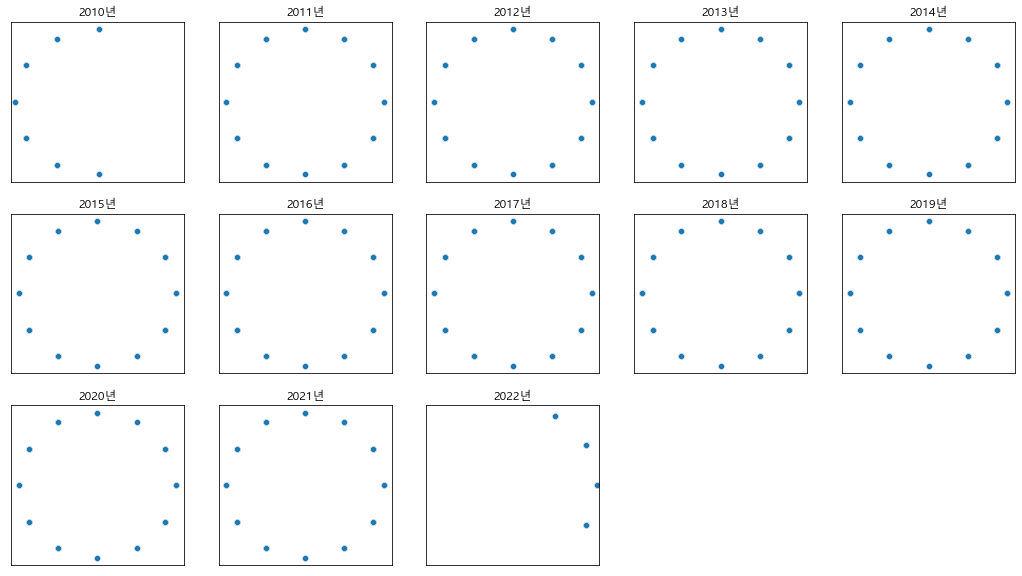

In [17]:
# 2010년부터 2022년까지의 데이터 존재
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# 각각의 연도에 따라 각각의 월이 존재하는지 확인
fig = plt.figure(figsize=(18,10))
plt.rc('font', family = 'Malgun Gothic')
for n,y in enumerate(year):
    ax = plt.subplot(3,5,n+1)
    sns.scatterplot(x="month_sin",y="month_cos",data=data_month[data_month['year'] == y])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.title(str(y)+"년")

# 2010년은 6월부터 2022년은 4월까지의 데이터만 존재

#### 3. day
요약
- 1일부터 28일까지 동일한 값이 나옴
- 29, 30, 31로 갈수록 count가 점점 줄어듦

In [19]:
# N/A 존재 여부 파악
df_pre['day'].isna().sum()

0

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


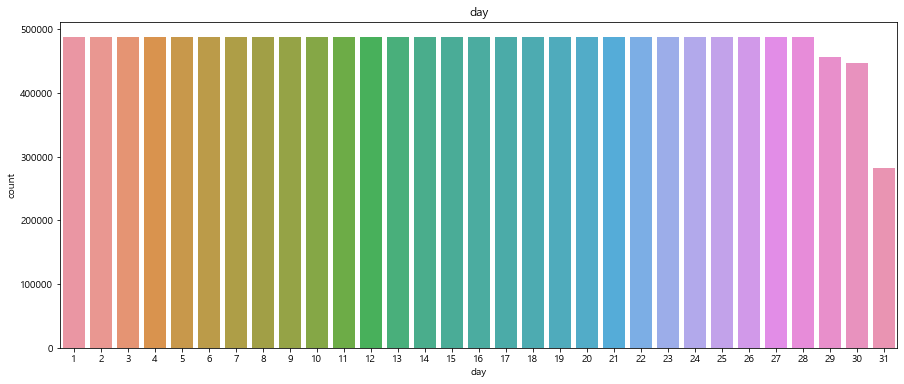

In [26]:
# 일별로 데이터 개수 파악
# 1일~28일까지는 동일한 수의 데이터 존재
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_pre['day'])
plt.title('day')
plt.show()

In [27]:
# 일별 실제 데이터 수
for i in range(1,32):
    result = df_final[df_final['day'] == i].size
    print("{0:>2}일".format(i), result, end='\t\t')
    if i % 4 == 0:
        print('')

 1일 7310160		 2일 7310160		 3일 7310160		 4일 7310160		
 5일 7310160		 6일 7310160		 7일 7310160		 8일 7310160		
 9일 7310160		10일 7310160		11일 7310160		12일 7310160		
13일 7310160		14일 7310160		15일 7310160		16일 7310160		
17일 7310160		18일 7310160		19일 7310160		20일 7310160		
21일 7310160		22일 7310160		23일 7310160		24일 7310160		
25일 7310160		26일 7310160		27일 7310160		28일 7310160		
29일 6850080		30일 6696720		31일 4242960		

#### 4. hour
요약
- None 값이 포함되어 있지 않음
- 모든 시간에 대해 동일한 수의 데이터 존재

In [28]:
# none값의 데이터가 있는지 확인
df_pre['hour'].isna().sum()

0

In [29]:
# 0시부터 23시까지의 데이터가 존재
list_temp = list(df_pre['hour'].unique())
for i in list_temp:
    print(i, end='\t')

0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	

In [30]:
# 각각의 시각은 동일한 수가 존재
(df_pre['hour'] == 0).sum() == (df_pre['hour'] == 1).sum() == (df_pre['hour'] == 2).sum()\
    == (df_pre['hour'] == 3).sum() == (df_pre['hour'] == 4).sum() == (df_pre['hour'] == 5).sum()\
    == (df_pre['hour'] == 6).sum() == (df_pre['hour'] == 7).sum() == (df_pre['hour'] == 8).sum()\
    == (df_pre['hour'] == 9).sum() == (df_pre['hour'] == 10).sum() == (df_pre['hour'] == 11).sum()\
    == (df_pre['hour'] == 12).sum() == (df_pre['hour'] == 13).sum() == (df_pre['hour'] == 14).sum()\
    == (df_pre['hour'] == 15).sum() == (df_pre['hour'] == 16).sum() == (df_pre['hour'] == 17).sum()\
    == (df_pre['hour'] == 18).sum() == (df_pre['hour'] == 19).sum() == (df_pre['hour'] == 20).sum()\
    == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 21).sum() == (df_pre['hour'] == 23).sum()

True

#### 5. Date
- 년,월,일,시간을 합쳐서서 데이터 타입이 datetime인 새로운 컬럼 생성

In [31]:
df_pre['datetime'] = pd.to_datetime((df_pre['year']*1000000 + df_pre['month']*10000 + df_pre['day']*100 + df_pre['hour']).astype(str), format='%Y%m%d%H')

#### 6. rainfall
요약
- 강우량 데이터 (단위:mm)
- 강수량을 측정하지 않은 경우 : -1
- 최대 강수량 : 62.099998mm/h

In [32]:
print('결측치 수 : ',df_pre['rainfall'].isna().sum())
a = list(df_pre[df_pre['rainfall'] == -1].index)
print('미측정 수 : ',len(a))
a = list(df_pre[df_pre['rainfall'] == 0].index)
print('비가 오지 않은 날 : ',len(a))

결측치 수 :  0
미측정 수 :  23306
비가 오지 않은 날 :  13990071


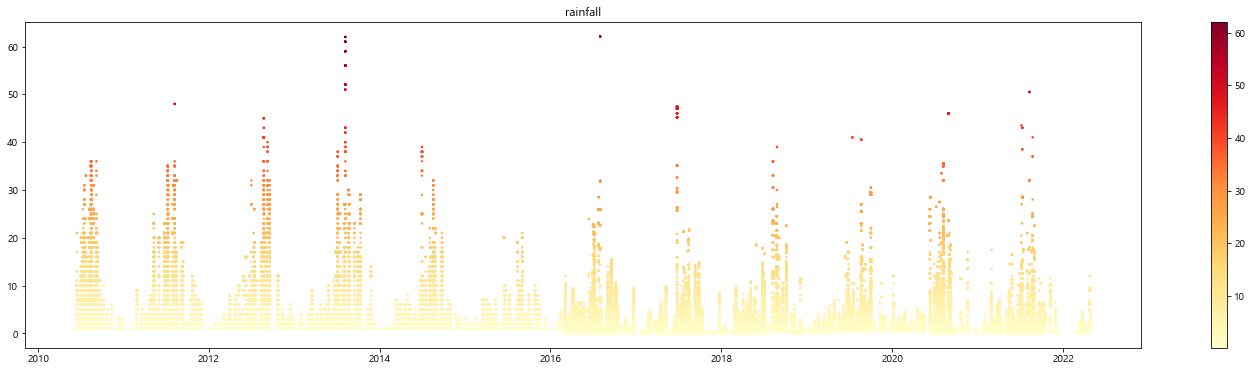

강우량의 0을 제외한 최소값 : 0.1 mm
강우량의 최댓값 : 62.099998 mm


In [45]:
# 강수량에 대한 데이터를 그래프에 점을 찍어 표현
# X축:날짜,시간  Y축:강수량
fig = plt.figure(figsize=(25,6))
temp = df_pre[(df_pre['rainfall'] != 0) & (df_pre['rainfall'] != -1)]
plt.scatter(temp['datetime'], temp['rainfall'], s=2, c=temp['rainfall'], cmap='YlOrRd')
plt.colorbar()
plt.title('rainfall')
plt.show()
print('강우량의 0을 제외한 최소값 :',temp['rainfall'].min(),'mm')
print('강우량의 최댓값 :',temp['rainfall'].max(),'mm')

#### 6-1. rainfall preprocessing
요약
- 앞, 뒤에서 측정한 경우
    - 앞, 뒤의 평균으로 강수량을 계산
- 연속적으로 측정하지 않은 경우
    - 바로 직전과 직후의 강우량이 0이라면 비가 오지 않았을 확률이 매우 높음 -> 0으로 변경
    - 바로 직전과 직후에 비가 왔다면 어떤식으로 데이터를 변경할지 고민해봐야함
        - 해당 경우는 없는 것으로 확인됨

In [27]:
# 강수량을 측정하지 않은 시간대의 index
a = list(df_pre[df_pre['rainfall'] == -1].index)

list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i

2701


In [28]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [29]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        df_pre.loc[i,'rainfall'] = (df_pre.loc[i-1,'rainfall'] + df_pre.loc[i+1,'rainfall']) / 2

In [30]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    # 직전, 직후가 0인 경우
    if (df_pre.loc[i[0]-1,'rainfall'] == 0) & (df_pre.loc[i[-1]+1,'rainfall'] == 0):
        for j in i:
            df_pre.loc[j,'rainfall'] = 0
    # 직전 또는 직후가 0이 아닌 경우
    else:
        print(i)

# 직전 또는 직후에 비가 온 case는 존재하지 않음

In [31]:
# rainfall이 -1인 경우가 남아있는지 확인
(df_pre['rainfall'] == -1).sum()

0

#### 7. tempreture
요약
- -50, -1 은 결측치로 생각됨
- 0은 어떤 값인지 확인이 필요 (가장 많은 count를 보유 -> 의미가 있을 것)
- 최고기온 : 40.4℃
- 최저기온 : -16℃

In [32]:
# csv파일을 불러오면서 ±0.00001 정도의 오차가 발생한 경우가 있어 반올림
df_pre['temp'] = df_pre['temp'].round(1)

c:\git_project\Team_Project\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


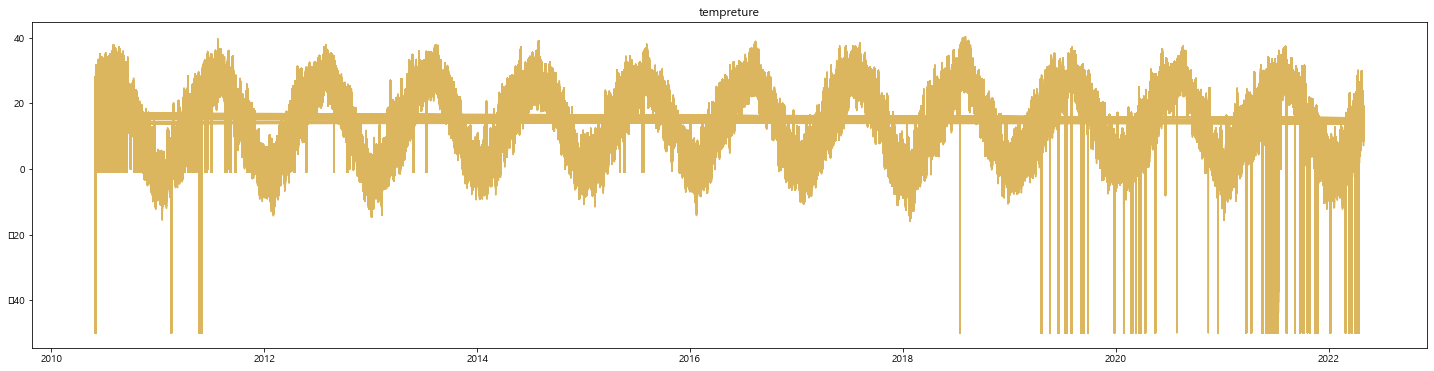

In [33]:
# 시간에 따른 기온을 그래프로 표현
# -50과 -1~0의 비정상적인 값들이 많이 보임
# 그래프 가운데 발생하는 선은 무시해도 됨
#      -> 각각의 읍/면/동에 대해 기온 그래프를 생성한 뒤 다음 읍/면/동으로 넘어가면서 발생하는 선 
fig = plt.figure(figsize=(25,6))
plt.plot(df_pre.datetime, df_pre.temp, color='#DBB65E')
plt.title('tempreture')
plt.show()

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


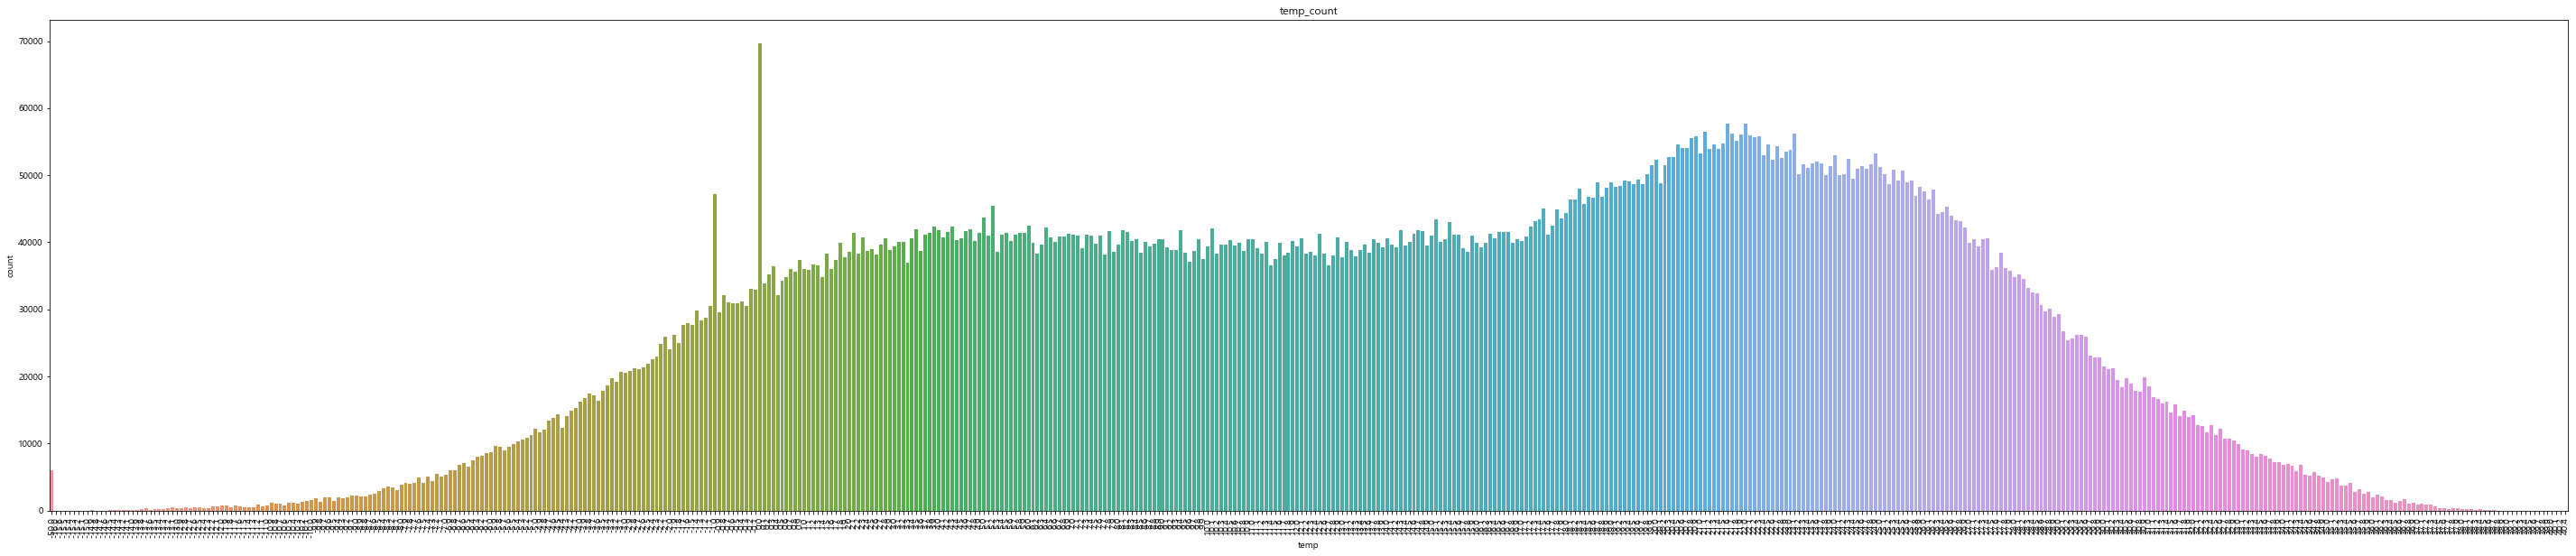

In [34]:
# 각각의 기온별로 데이터의 수를 그래프로 표현
# -50, -1, 0 의 값들이 튀는 것을 확인할 수 있음

fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [35]:
# 각각의 이상값에 대해 데이터 수를 확인
print('-50 : ',df_pre[df_pre['temp'] == -50].shape[0])
print('-1  : ',df_pre[df_pre['temp'] == -1].shape[0])
print('0  : ',df_pre[df_pre['temp'] == 0].shape[0])

-50 :  6062
-1  :  47171
0  :  69673


In [36]:
print('최저 기온 : ',df_pre[(df_pre['temp'] != -50) & (df_pre['temp'] != -1)]['temp'].min())
print('최고 기온 : ',df_pre['temp'].max())

최저 기온 :  -16.0
최고 기온 :  40.4


#### 7-1. tempreture preprocessing
요약
- 결측치 혹은 잘못된 값은 -50, -8.1, -1, 0 으로 4가지 경우가 존재
- 해결방법
    - 4가지 경우가 연속으로 존재하는 경우를 확인
        - 한가지 경우가 있었으며 -1만 고치는 방향으로 결정
    - 각각의 경우가 연속해서 존재할 경우 전, 후 값을 선형으로 연결
    - 연속해서 -1 혹은 0이 존재할 경우
        - 전후 값과의 차이가 3도 이하일 경우 정상적인 값으로 판단

In [42]:
# 결측치에 해당하는 부분의 인덱스 추출
list_50 = list(df_pre[df_pre['temp'] == -50].index)
list_1 = list(df_pre[df_pre['temp'] == -1].index)
list_0 = list(df_pre[df_pre['temp'] == 0].index)

list_temp = list_50+list_1+list_0

# 결측치가 연속으로 나오는 부분 추출
list_series = []
for i in list_temp:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) == 0) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) == 0) :
        list_series.append(i)

# -1도를 기준으로 전후와 3도 이상 차이나면 잘못된 값으로 판단
list_real1 = []
for i in list_1:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
        list_real1.append(i)

# 0도를 기준으로 전후와 3도 이상 차이나면 잘못된 값으로 판다
list_real0 = []
for i in list_0:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
        list_real1.append(i)

In [43]:
# 위에서 추출한 인덱스를 하나의 리스트로 합친 뒤 정렬
a = list_50 + list_real0 + list_real1 +list_series
list(set(a)).sort()

In [44]:
# 연속적으로 측정하지 않은 시간대의 index
j=-1
list_temp=[]
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i

In [45]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    elif temp2 != []:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [46]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 3) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 3) :
            df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 0)

In [47]:
# 연속적으로 측정하지 않은 경우 전후를 선형으로 연결
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'temp']
    end = df_pre.loc[i[-1]+1,'temp']
    c = (end - start)/(n+1)
    start = start + c
    for j in i:
        df_pre.loc[j,'temp'] = round(start,0)
        start = start + c

In [48]:
# -50도의 결측값이 없어진 것을 확인
df_pre[df_pre['temp']==-50]

Empty DataFrame
Columns: [day, hour, rainfall, temp, lightning, humidity, wind_speed, wind_direction, condition, month, year, region]
Index: []

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


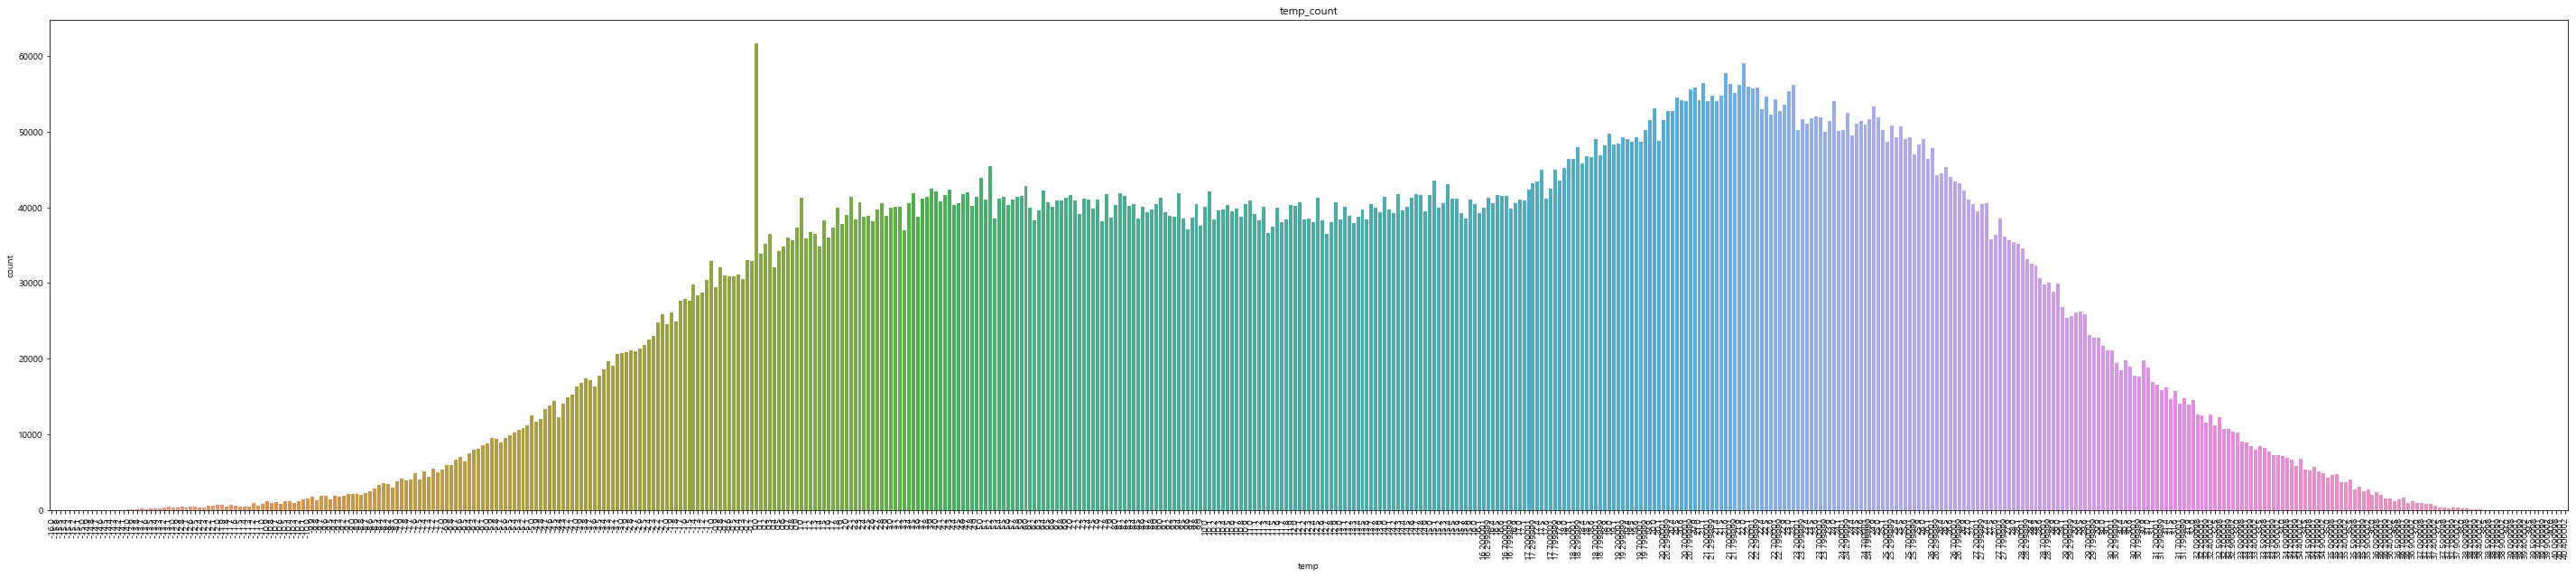

In [61]:
# 결측치 값이 많이 죽어든 것을 그래프로 확인
# 여전히 0인 경우가 많음
fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [50]:
df_pre[df_pre['temp'] == 0]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
4287       26    15       0.0   0.0         -1      32.0        53.0   
4336       28    16       0.0   0.0         -1      37.0        53.0   
4579        8    19       0.0   0.0         -1      55.0         3.7   
4609       10     1       0.0   0.0         -1      50.0         0.4   
4645       11    13       0.0   0.0         -1      22.0         3.1   
...       ...   ...       ...   ...        ...       ...         ...   
14830198    2    22       0.0   0.0         -1      71.0         0.9   
14830216    3    16       0.0   0.0         -1      71.0         0.4   
14830291    6    19       0.0   0.0         -1      52.0         2.0   
14830338    8    18       0.0   0.0         -1      75.0         0.0   
14830700   23    20       0.0   0.0         -1      98.0         0.3   

          wind_direction  condition  month  year region  
4287               390.0          1     11  2010    동인동  
4336               390.0          1     11  2010    동인동  
4579               273.0          1     12  2010    동인동  
4609                 0.0          3     12  2010    동인동  
4645               279.0          1     12  2010    동인동  
...                  ...        ...    ...   ...    ...  
14830198           358.0         -1      3  2022    구지면  
14830216           148.0         -1      3  2022    구지면  
14830291             7.0         -1      3  2022    구지면  
14830338             0.0         -1      3  2022    구지면  
14830700           196.0         -1      3  2022    구지면  

[65963 rows x 12 columns]

In [55]:
# 하나의 예시를 추출했는데 온도가 약 0.6~0.7로 나와야 정상적인 상황
i = 4287
df_pre.loc[i-2:i+2,"temp"]

4285    2.6
4286    1.6
4287    0.0
4288   -0.3
4289   -1.0
Name: temp, dtype: float64

In [56]:
# 0을 기준으로 전후값의 부호가 반대면 평균값을 대입
list_0 = list(df_pre[df_pre['temp'] == 0].index)
for i in list_0:
    if df_pre.loc[i-1,'temp'] * df_pre.loc[i+1,'temp'] < 0:
        df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 0)

c:\git_project\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


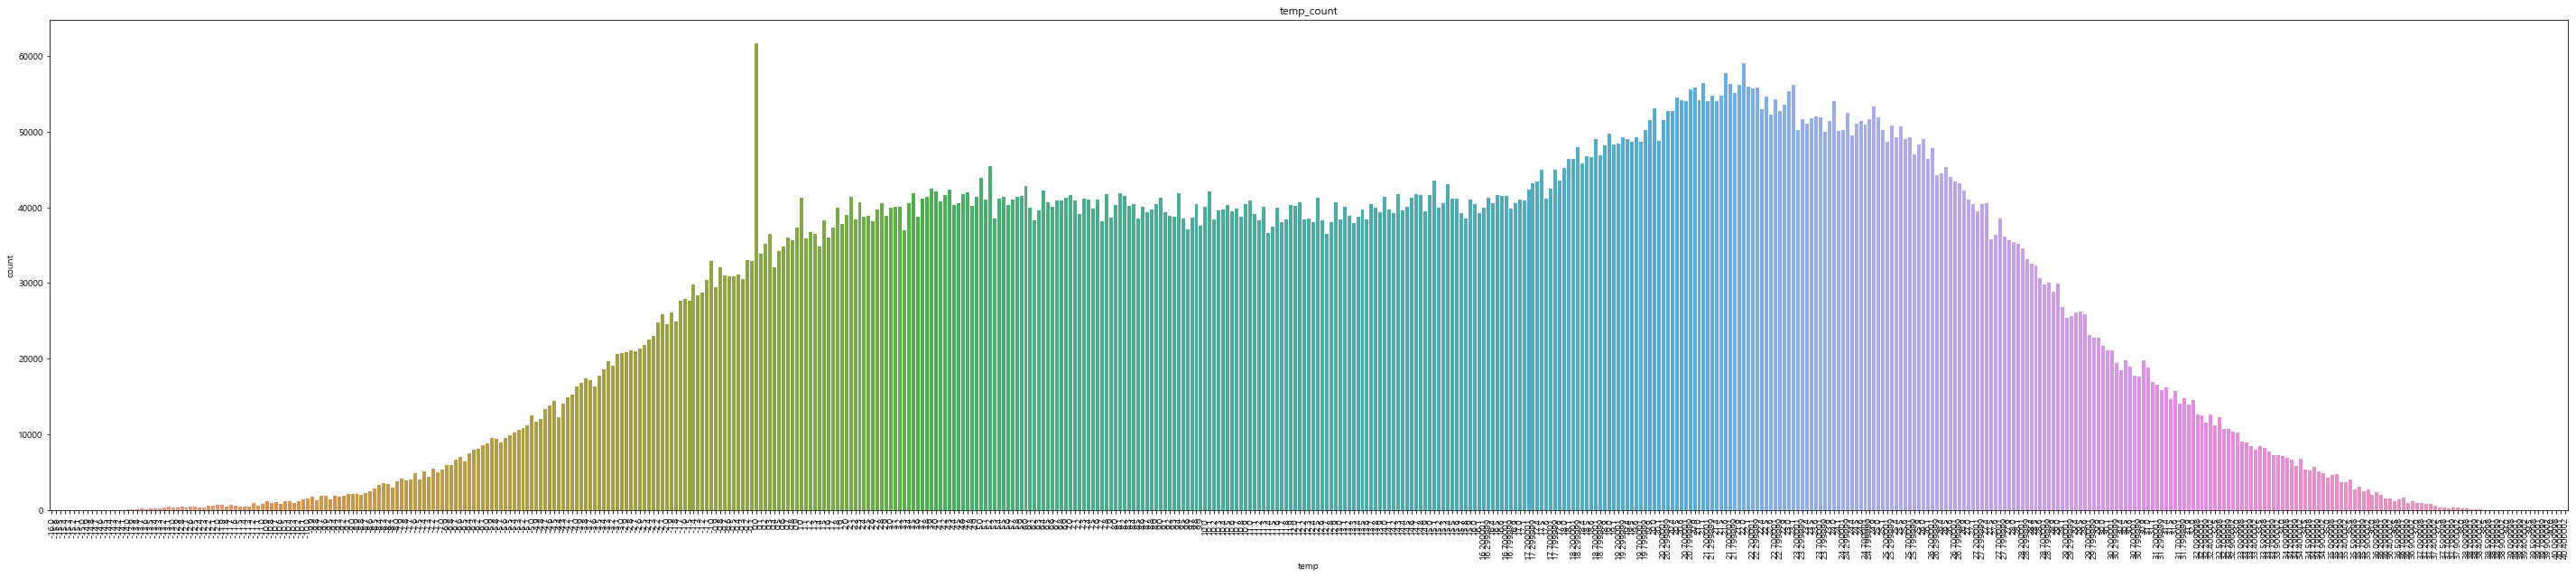

In [62]:
# 다시 그래프를 그려서 확인
# 조금 줄긴 했음...
fig = plt.figure(figsize=(50,10))
ax = sns.countplot(df_pre['temp'])
plt.title('temp_count')
plt.xticks(rotation=90)
plt.show()

In [64]:
print('0℃인 데이터 수 :',df_pre[df_pre['temp'] == 0].shape[0])

0℃인 데이터 수 : 61679


In [59]:
# -8.1℃ 에서도 잘못된 값이 있다는 제보를 받음
# 값이 크게 차이나는 부분을 평균값으로 대체

list_temp = list(df_pre[df_pre['temp'] == -8.1].index)

list_8 = []
for i in list_temp:
    if (abs(df_pre.loc[i,'temp'] - df_pre.loc[i-1,'temp']) > 5) | (abs(df_pre.loc[i,'temp'] - df_pre.loc[i+1,'temp']) > 5):
        list_8.append(i)

for i in list_8:
    df_pre.loc[i,'temp'] = round((df_pre.loc[i-1,'temp'] + df_pre.loc[i+1,'temp']) / 2, 1)

In [60]:
# -8.1℃에서 다른 값으로 바뀐것을 확인
df_pre.loc[list_8,:]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
14293060   20     4       0.0  26.4         -1      59.0         0.7   
14501956   20     4       0.0  26.4         -1      59.0         0.7   
14815300   20     4       0.0  26.4         -1      59.0         0.7   

          wind_direction  condition  month  year region  
14293060            16.0         -1      6  2020    유가읍  
14501956            16.0         -1      6  2020    현풍읍  
14815300            16.0         -1      6  2020    구지면

#### 8. lightning
요약
- 2018년 10월까지만 제공
- 전체 데이터 중 약 37.86%는 데이터가 없는 상태
- 추가적인 데이터를 찾지 않는 이상 사용하기 애매함?

In [53]:
# 존재하는 항목 확인
df_pre['lightning'].unique()

array([-1,  0,  1])

In [54]:
print('결측된 데이터 비율 :', round(df_pre[(df_pre['lightning'] == -1)].shape[0]/df_pre.shape[0]*100,2), '%')

결측된 데이터 비율 : 37.86 %


#### 9. humidity
요약
- 0~100까지의 비율(%)로 값들이 존재
- -1은 결측값
- 습도가 0인 경우가 많음
    - 습도가 0일 가능성이 거의 없으므로 이 중 대부분은 결측치일것
    - 습도가 0%인 경우가 682개
    - 습도가 1%인 경우가 42개

In [55]:
# 존재하는 값 확인
df_pre['humidity'].sort_values().unique()

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100.])

In [56]:
# 결측치 및 이상값 확인
# 0%의 경우 일어나기가 힘든데 1%보다 많음
print('-1 :',df_pre[df_pre['humidity'] == -1].shape[0])
print('0 :',df_pre[df_pre['humidity'] == 0].shape[0])
print('1 :',df_pre[df_pre['humidity'] == 1].shape[0])
print('2 :',df_pre[df_pre['humidity'] == 2].shape[0])
print('3 :',df_pre[df_pre['humidity'] == 3].shape[0])

-1 : 30222
0 : 682
1 : 42
2 : 66
3 : 238


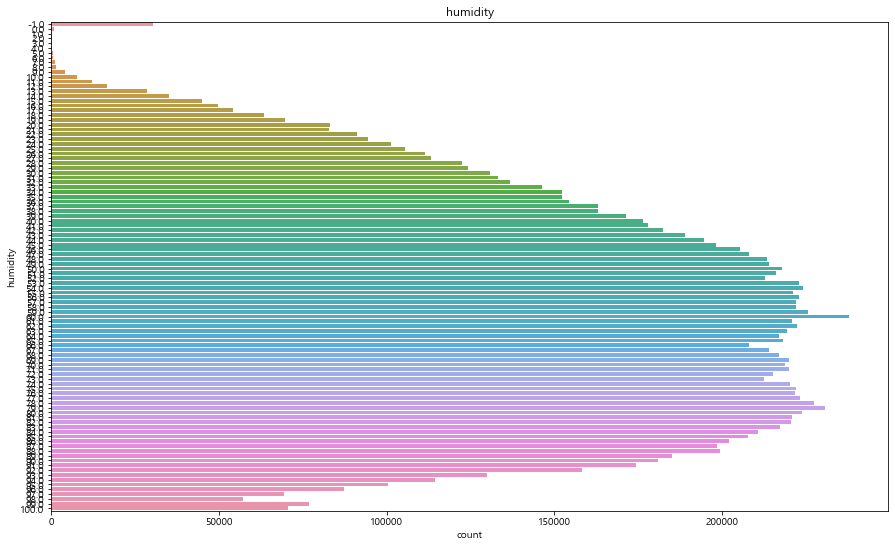

In [57]:
# 습도를 그래프로 표현
fig = plt.figure(figsize=(15,9))
sns.countplot(data=df_pre, y='humidity')
plt.title('humidity')
plt.show()

#### 9-1. humidity preprocessing
요약
- 0일 경우
    - 0일 가능성이 거의 없지만 실제로 있을 수도 있음
    - 0일 경우의 전후 1시간을 비교했을때 차이가 거의 없는 경우가 2가지 존재
    - 그외의 경우는 모두 큰 차이가 나는 결측값으로 확인됨
    - 전후 습도의 평균으로 계산
- -1일 경우
    - 전후로 -1이 아닌 경우들을 선형으로 값을 설정


In [125]:
# 습도가 -1 혹은 0인 경우의 인덱스를 저장
list_1 = list(df_pre[(df_pre['humidity'] == -1)].index)
list_0 = list(df_pre[(df_pre['humidity'] == 0)].index)

In [126]:
# 0이 연속으로 나오는 경우를 확인
j = 0
for i in list_0:
    if i-j==1:
        print(j,i)
    j=i

In [127]:
# -1이 연속으로 나오는 경우를 확인
j = 0
for i in list_1:
    if (i-j)==1:
        print(j,i)
    j=i

54 55
170 171
171 172
172 173
173 174
12488 12489
43581 43582
43582 43583
43583 43584
43584 43585
96423 96424
103936 103937
104502 104503
104618 104619
104619 104620
104620 104621
104621 104622
116936 116937
148029 148030
148030 148031
148031 148032
148032 148033
200871 200872
208384 208385
208950 208951
209066 209067
209067 209068
209068 209069
209069 209070
221384 221385
252477 252478
252478 252479
252479 252480
252480 252481
305319 305320
312832 312833
313398 313399
313514 313515
313515 313516
313516 313517
313517 313518
325832 325833
356925 356926
356926 356927
356927 356928
356928 356929
409767 409768
417280 417281
417846 417847
417962 417963
417963 417964
417964 417965
417965 417966
430280 430281
461373 461374
461374 461375
461375 461376
461376 461377
514215 514216
521728 521729
522294 522295
522410 522411
522411 522412
522412 522413
522413 522414
534728 534729
565821 565822
565822 565823
565823 565824
565824 565825
618663 618664
626176 626177
626742 626743
626858 626859
626859 6

In [128]:
# -1과 0이 연속으로 나오는 경우를 확인
# 아래의 한가지 경우만 존재
for i in list_1:
    if i-1 in list_0:
        print(i-1, i)
    if i+1 in list_0:
        print(i, i+1)

14690309 14690310


In [129]:
# 위의 케이스를 확인
# -1만 수정하면 될것으로 생각됨
df_pre.loc[14690307:14690311,:]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
14690307   15     3       0.0   8.3          0       4.0         0.8   
14690308   15     4       0.0   9.3          0       2.0         2.5   
14690309   15     5       0.0   9.2          0      -1.0         3.3   
14690310   15     6       0.0   9.1          0       0.0         2.7   
14690311   15     7       0.0   8.3          0       2.0         2.9   

          wind_direction  condition  month  year region  
14690307           353.0          2      2  2018    하빈면  
14690308           348.0          2      2  2018    하빈면  
14690309           346.0          3      2  2018    하빈면  
14690310           327.0          3      2  2018    하빈면  
14690311           314.0          3      2  2018    하빈면

In [130]:
# 습도가 0인 경우에 전후값과의 차이를 확인
# 전후 값과의 차가 3, 6은 가능성이 있다고 판단
a = []
for i in list_0:
    a.append(abs(df_pre.loc[i-1,'humidity'] - df_pre.loc[i,'humidity']) + abs(df_pre.loc[i+1,'humidity'] - df_pre.loc[i,'humidity']))
set(a)

{3.0,
 6.0,
 87.0,
 88.0,
 90.0,
 91.0,
 92.0,
 95.0,
 96.0,
 97.0,
 99.0,
 100.0,
 101.0,
 104.0,
 106.0,
 108.0,
 110.0,
 113.0,
 115.0,
 117.0,
 118.0,
 119.0,
 120.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 128.0,
 129.0,
 132.0,
 133.0,
 135.0,
 137.0,
 141.0,
 155.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 171.0,
 172.0,
 173.0,
 174.0,
 175.0,
 179.0,
 181.0}

In [131]:
# 위의 3과 6을 제외하고 나머지 인덱스를 리스트 a에 저장
a = []
for i in list_0:
    if abs(df_pre.loc[i-1,'humidity'] - df_pre.loc[i,'humidity']) + abs(df_pre.loc[i+1,'humidity'] - df_pre.loc[i,'humidity']) > 10:
        a.append(i)

# 리스트 a의 인덱스에 위치한 0들을 전후값의 평균으로 대체
for i in a:
    df_pre.loc[i,'humidity'] = round(( df_pre.loc[i-1,'humidity'] + df_pre.loc[i+1,'humidity'] ) /2 , 1)

In [132]:
# 0의 경우 처음에 본 두가지 경우만 남음
df_pre[df_pre['humidity']==0]

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
14689853   27     5       0.0   1.8          0       0.0         0.9   
14690310   15     6       0.0   9.1          0       0.0         2.7   

          wind_direction  condition  month  year region  
14689853           180.0          1      1  2018    하빈면  
14690310           327.0          3      2  2018    하빈면

In [134]:
# -1이 연속적으로 측정하지 않은 시간대의 index
j=-1
list_temp=[]
for i in list_1:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i

In [135]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    elif temp2 != []:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [136]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in list_1:
    if i not in list_temp:
        df_pre.loc[i,'humidity'] = round((df_pre.loc[i-1,'humidity'] + df_pre.loc[i+1,'humidity']) / 2, 0)


In [137]:
# 연속적으로 측정하지 않은 경우 전후를 선형으로 연결
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'humidity']
    end = df_pre.loc[i[-1]+1,'humidity']
    c = (end - start)/(n+1)
    start = start + c
    for j in i:
        df_pre.loc[j,'humidity'] = round(start,0)
        start = start + c

In [138]:
# -1이라는 결측치 데이터가 다른 값으로 대체된 것을 확인
df_pre[df_pre['humidity'] == -1]

Empty DataFrame
Columns: [day, hour, rainfall, temp, lightning, humidity, wind_speed, wind_direction, condition, month, year, region]
Index: []

#### 10. wind
요약
- 풍속과 풍향의 데이터가 2010년 12월 6일 6시 까지의 데이터가 이상함
- None 이 되도록 수정

<details><summary>풍력 등급표 (click시 열림)</summary>

|등급|10분간 평균풍속(10m/s)|상세설명|
|---|---|---|
|0|0.3미만|연기가 똑바로 올라간다.|
|1|0.3~1.6미만|연기가 옆으로 쓰러진다.|
|2|1.6~3.4미만|얼굴에 바람기를 느끼고 나뭇잎이 쓰러진다.|
|3|3.4~5.5미만|나뭇잎이나 가느다란 가지가 끊임없이 흔들린다.|
|4|5.5~8.0미만|먼지가 일고 종이 조각이 날아오르며 작은 나뭇가지가 흔들린다.|
|5|8.0~10.8미만|연못의 수면에 잔물결이 일며 나무가 흔들리는 것이 눈에 보인다.|
|6|10.8~13.9미만|큰 가지가 움직이고,우산을 쓰기 어려우며 전선이 운다.|
|7|13.9~17.2미만|수목 전체가 흔들린다.|
|8|17.2~20.8미만|작은 가지가 부러지며,바람을 향해 걸을 수 없다.|
|9|20.8~24.5미만|인가에 약간의 피해를 준다.|
|10|24.5~28.5미만|수목의 뿌리가 뽑히며 인가에 큰 피해가 발생한다.|
- 출처 : http://hosting.weatherimc.co.kr/con/forecast/wind.html?jijum_code=53
</details>

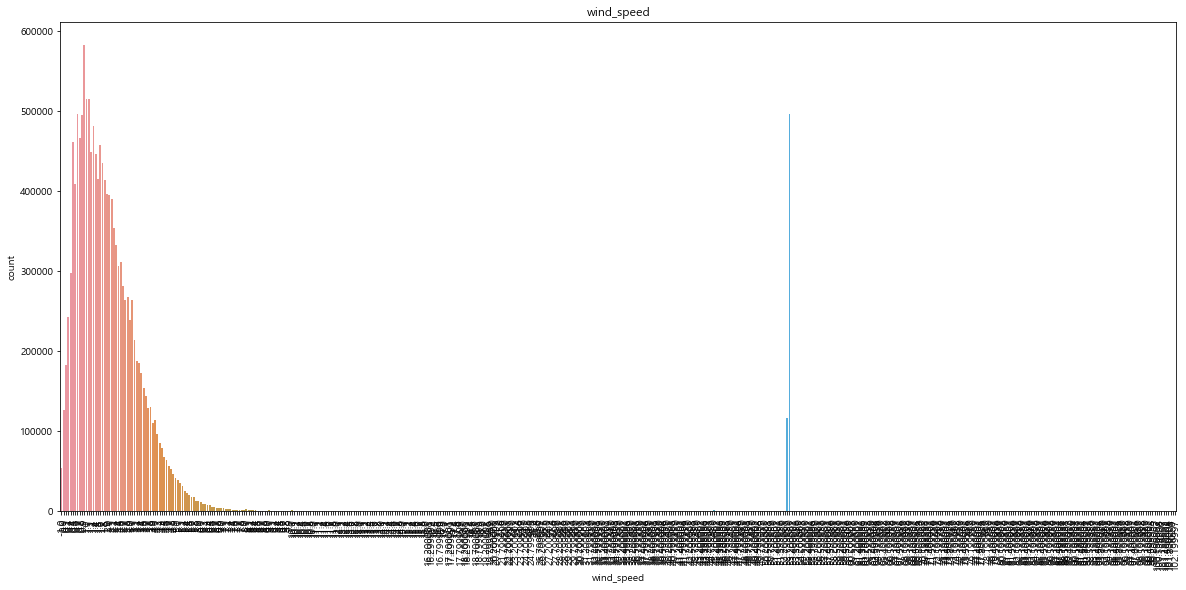

In [71]:
# 풍속 데이터를 그래프로 표현
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_speed')
plt.xticks(rotation=90)
plt.title('wind_speed')
plt.show()

풍속에 말도 안되는 값들이 많이 존재
데이터를 살펴보니 2010년 12월 6일 6시까지의 데이터가 이상함
    -> none값을 가지도록 수정

In [ ]:
# 풍속에 말도 안되는 값들이 많이 존재
# 데이터를 살펴보니 2010년 12월 6일 6시까지의 데이터가 이상함
#     -> none값을 가지도록 수정

df_pre['datetime'] = pd.to_datetime((df_pre['year']*1000000 + df_pre['month']*10000 + df_pre['day']*100 + df_pre['hour']).astype(str), format='%Y%m%d%H')

list_temp = list(df_pre[df_pre['datetime'] < datetime.datetime(2010,12,6,7)].index)
df_pre.loc[list_temp,['wind_speed','wind_direction']] = None
df_pre

#### 10-1. wind_speed
요약
- 최고 풍속 : 18.9 m/s
- 평균 풍속 : 4m/s
- 결측치는 -1 로 표현

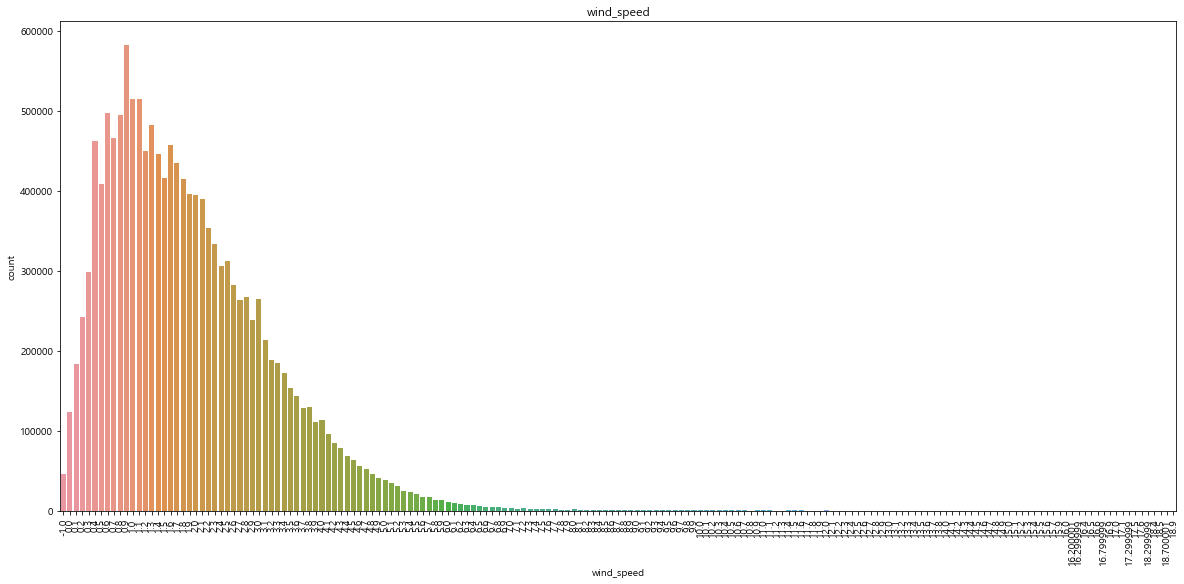

In [74]:
# 이상한 데이터를 지운 풍속 그래프를 표현
# 그래프가 많이 깔끔해짐
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_speed')
plt.xticks(rotation=90)
plt.title('wind_speed')
plt.show()

In [75]:
print('최고 풍속 :',df_pre['wind_speed'].max(), 'm/s')
print('평균 풍속 :',df_pre[df_pre['wind_speed'] != -1]['wind_speed'].mean(), 'm/s')

최고 풍속 : 18.9 m/s
평균 풍속 : 1.8921555349644361 m/s


#### 10-2. wind_direction
요약
- 0 ~ 360의 각도 형식으로 표현
- 360'가 북쪽을 나타냄
- 결측치는 -1 로 표현

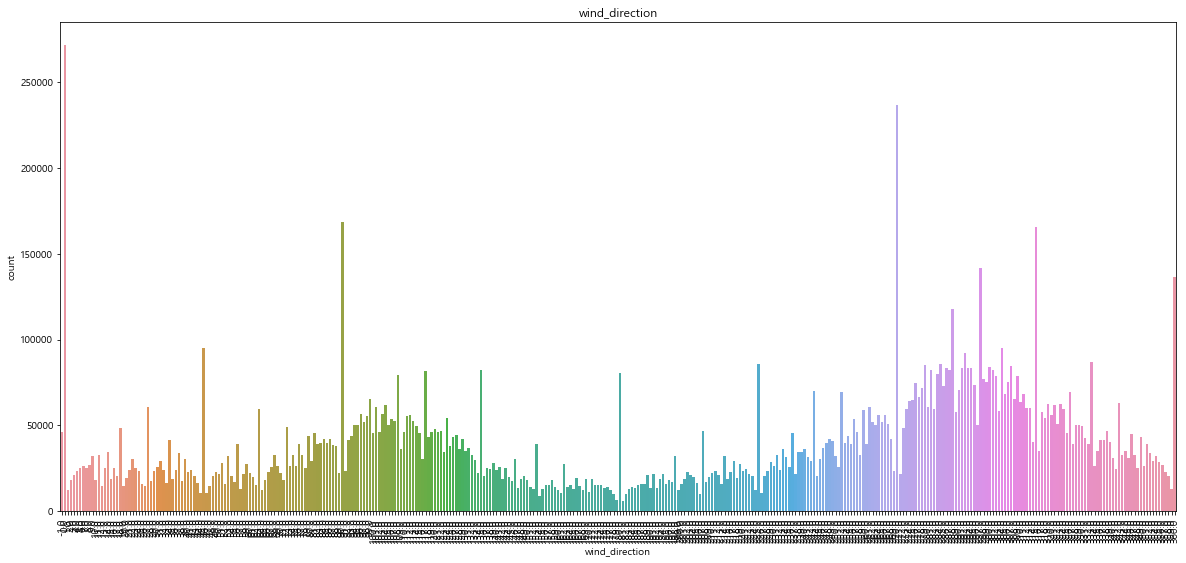

In [76]:
# 풍향을 그래프로 표현
fig = plt.figure(figsize=(20,9))
sns.countplot(data=df_pre, x='wind_direction')
plt.xticks(rotation=90)
plt.title('wind_direction')
plt.show()

In [77]:
# 존재하는 데이터의 값들을 확인
df_pre['wind_direction'].sort_values().unique()

array([ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 14

In [78]:
print(' -1 : ',df_pre[df_pre['wind_direction'] == -1].shape[0])
print('  0 : ',df_pre[df_pre['wind_direction'] == 0].shape[0])
print('360 : ',df_pre[df_pre['wind_direction'] == 360].shape[0])

 -1 :  46129
  0 :  271489
360 :  136388


In [79]:
df_pre[df_pre['wind_direction'] == 360]['wind_speed'].sort_values().unique()

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.2,  7.3,  7.4,  7.5,  7.7,  7.8,  7.9,
        8. ,  8.2,  9.3, 10. , 10.5, 11.1, 12. , 12.3, 14.5])

<AxesSubplot:xlabel='wind_direction', ylabel='Count'>

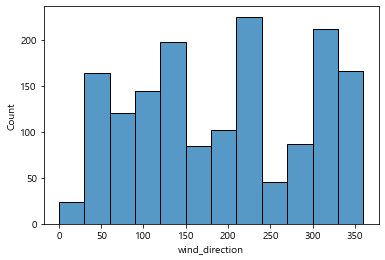

In [80]:
sns.histplot(data=df_pre[df_pre['wind_speed'] > 10.8]['wind_direction'])

#### 10-3. wind_preprocessing 공사중
요약
- 풍속의 경우
    - 풍향이 순간적으로 급하게 변화할 가능성은 적다고 가정
    - 결측치는 직전, 직후 값을 선형적으로 구현
- 풍향의 경우
    - 0 ~ 360의 값을 가지며 큰 폭으로 변화할 수 있음
    - 그렇다면 전처리를 어떻게 해야하는가?

In [81]:
# 결측치의 수를 체크
print((df_pre['wind_speed'] == -1).sum())
print((df_pre['wind_direction'] == -1).sum())

45703
46129


In [82]:
# 풍속이 -1인 경우의 인덱스를 저장
a = list(df_pre[df_pre['wind_speed'] == -1]['wind_speed'].index)
list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in a:
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i
print(len(list_temp))

31529


In [83]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in a:
    if i not in list_temp:
        df_pre.loc[i,'wind_speed'] = (df_pre.loc[i-1,'wind_speed'] + df_pre.loc[i+1,'wind_speed']) / 2

In [84]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [85]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    n = len(i)
    start = df_pre.loc[i[0]-1,'wind_speed']
    end = df_pre.loc[i[-1]+1,'wind_speed']
    a = (end - start)/(n+1)

    for j in i:
        df_pre.loc[j,'wind_speed'] = df_pre.loc[j-1,'wind_speed'] + a


#### 11. condition
요약
- 결측치 값이 약 30퍼로 매우 많음
- 이것을 계속 사용하려면 추가적인 데이터 보급이 필요

In [86]:
df_pre['condition'].unique()

array([ 1,  2, -1,  4,  3])

In [87]:
print('결측된 데이터 비율 :',df_pre[df_pre['condition'] == -1].shape[0]/df_pre.shape[0] * 100, '%')

결측된 데이터 비율 : 29.851217830882355 %


# <hr>

# Preprocessing 3

> ###### made by ssj

#### Period
- 2022.05.09 ~ 2022.05.11

<h4><details><summary>Index</summary><h6>

1. [Heat Index](#1-heat-index)

2. [Discomfort Index](#2-discomfort-index)

3. [column rename](#3-column-rename)
</h6></details></h4>

###### [이전 파트로](#eda--preprocessing-2)
###### [다음 파트로](#eda-2)

## 1. Heat Index
- 열지수 : 기온과 습도에 따라 사람이 실제로 느끼는 더위를 지수화한 것
<details><summary>계산 식 흐름 표 (click시 열림)</summary>

![](./img/HI.jpg)
- 출처 : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3801457/#r39
- T is temperature in degrees F
- RH is relative humidity in percent</details>
<br>
<details><summary>열 지수별 증상표 (click시 열림)</summary>
<br>

|단계|지수 범위|설명|
|---|---|---|
|매우 높음|54이상|보통 사람이 열에 지속적으로 노출될 경우, 열사·일사병 위험이 매우 높음|
|높음|41 ~ 54 미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 일사병·열경련·일피폐 위험이 높음|
|보통|32 ~ 41미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동 시 열사병·열경련·열피폐 가능성이 있음|
|낮음|32미만|보통 사람이 열에 지속적으로 노출될 경우, 신체활동시 피로 위험 높음|
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_04.jsp

</details>

In [88]:
# 화씨 온도로 변환
df_pre['temp_F'] = df_pre['temp'] * 1.8 + 32

# B 계산
df_pre['HI'] =  -42.379 + 2.04901523*df_pre['temp_F'] + 10.14333127*df_pre['humidity'] - .22475541*df_pre['temp_F']*df_pre['humidity'] - .00683783*df_pre['temp_F']*df_pre['temp_F'] - .05481717*df_pre['humidity']*df_pre['humidity'] + .00122874*df_pre['temp_F']*df_pre['temp_F']*df_pre['humidity'] + .00085282*df_pre['temp_F']*df_pre['humidity']*df_pre['humidity'] - .00000199*df_pre['temp_F']*df_pre['temp_F']*df_pre['humidity']*df_pre['humidity']

# 습도가 13%이하, 화씨온도가 80이상 112이하일때 값 조정
index = list(df_pre[(df_pre['humidity'] <= 13) & (df_pre['temp_F'] >= 80) & (df_pre['temp_F'] <= 112)].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'HI'] - ((13 - df_pre.loc[index,'humidity']) / 4) * ((17 - abs(df_pre.loc[index,'temp_F'] - 95)) / 17) ** 0.5

# 습도가 85%이상, 화씨온도가 80이상 87이하일때 값 조정
index = list(df_pre[(df_pre['humidity'] > 85) & (df_pre['temp_F'] >= 80) & (df_pre['temp_F'] <= 87)].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'HI'] + 0.02 * (df_pre.loc[index,'humidity'] - 85) * (87 - df_pre.loc[index,'temp_F'])

# A 계산
df_pre['A'] = -10.3 + 1.1 * df_pre['temp_F'] + 0.047 * df_pre['humidity']
index = list(df_pre.loc[df_pre['A'] < 79].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'A']

# 화씨온도가 40이하일 경우
index = list(df_pre.loc[df_pre['temp_F'] < 40].index)
df_pre.loc[index,'HI'] = df_pre.loc[index,'temp_F']

#최종적으로 출력된 결과를 섭씨온도로 조정
df_pre.drop(columns = ['A'], axis=1, inplace=True)
df_pre.drop(columns = 'temp_F', axis=1, inplace=True)
df_pre['HI'] = (df_pre['HI'] - 32) / 1.8
df_pre

C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1973395505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['temp_F'] = df_pre['temp'] * 1.8 + 32
C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1973395505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['HI'] =  -42.379 + 2.04901523*df_pre['temp_F'] + 10.14333127*df_pre['humidity'] - .22475541*df_pre['temp_F']*df_pre['humidity'] - .00683783*df_pre['temp_F']*df_pre['temp_F'] - .05481717*df_pre['humidity']*df_pre['humidity'] + .00122

day  hour  rainfall  temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.5         -1      53.0         NaN   
1           1     1       0.0  18.1         -1      49.0         NaN   
2           1     2       0.0  19.7         -1      46.0         NaN   
3           1     3       0.0  20.8         -1      41.0         NaN   
4           1     4       0.0  22.2         -1      36.0         NaN   
...       ...   ...       ...   ...        ...       ...         ...   
14831611   30    19       0.0  10.7         -1      71.0         2.1   
14831612   30    20       0.0  11.0         -1      65.0         2.2   
14831613   30    21       0.0  11.9         -1      61.0         2.2   
14831614   30    22       0.0  13.4         -1      53.0         2.0   
14831615   30    23       0.0  15.1         -1      41.0         2.1   

          wind_direction  condition  month  year region            datetime  \
0                    NaN          1      6  2010    동인동 2010-06-01 00:00:00   
1                    NaN          1      6  2010    동인동 2010-06-01 01:00:00   
2                    NaN          1      6  2010    동인동 2010-06-01 02:00:00   
3                    NaN          1      6  2010    동인동 2010-06-01 03:00:00   
4                    NaN          2      6  2010    동인동 2010-06-01 04:00:00   
...                  ...        ...    ...   ...    ...                 ...   
14831611           335.0         -1      4  2022    구지면 2022-04-30 19:00:00   
14831612           339.0         -1      4  2022    구지면 2022-04-30 20:00:00   
14831613           338.0         -1      4  2022    구지면 2022-04-30 21:00:00   
14831614           351.0         -1      4  2022    구지면 2022-04-30 22:00:00   
14831615             5.0         -1      4  2022    구지면 2022-04-30 23:00:00   

                 HI  
0         15.589444  
1         17.245000  
2         18.926667  
3         20.006111  
4         21.415556  
...             ...  
14831611   9.679444  
14831612   9.852778  
14831613  10.738333  
14831614  12.179444  
14831615  13.736111  

[14831616 rows x 14 columns]

## 2. Discomfort Index
- 불쾌지수 
- 기온과 습도의 조합으로 사람이 느끼는 온도를 표현한 것으로 온습도지수(THI)라고도 함
- 여름철 실내의 무더위의 기준으로서만 사용되고 있을 뿐, 복사나 바람 조건은 포함되어 있지 않기 때문에 그 적정한 사용에는 한계가 있다는 점에 유의
- 불쾌지수 값에 따라 불쾌감을 느끼는 정도도 개인에 따라 약간의 차이가 있음
- 출처 : http://web.kma.go.kr/HELP/basic/help_01_05.jsp
- ![](./img/DI.gif)

<details><summary>불쾌지수별 증상표 (click시 열림)</summary><br>

|단계|지수 범위|설명|
|---|---|---|
|매우 높음|80이상|전원 불쾌감|
|높음|75~ 80 미만|50% 정도의 불쾌감|
|보통|68 ~ 75미만|불쾌감을 느낌|
|낮음68미만|전원 쾌적함|
</details>

In [89]:
df_pre = df_pre[:]
df_pre['DI'] = df_pre['temp'] * 1.8 - ( 0.55 * ( 1 - df_pre['humidity'] / 100 ) * ( df_pre['temp'] * 1.8 - 26 )) + 32
df_pre

C:\Users\popcorn\AppData\Local\Temp\ipykernel_4612\1195829807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['DI'] = df_pre['temp'] * 1.8 - ( 0.55 * ( 1 - df_pre['humidity'] / 100 ) * ( df_pre['temp'] * 1.8 - 26 )) + 32


day  hour  rainfall  temp  lightning  humidity  wind_speed  \
0           1     0       0.0  16.5         -1      53.0         NaN   
1           1     1       0.0  18.1         -1      49.0         NaN   
2           1     2       0.0  19.7         -1      46.0         NaN   
3           1     3       0.0  20.8         -1      41.0         NaN   
4           1     4       0.0  22.2         -1      36.0         NaN   
...       ...   ...       ...   ...        ...       ...         ...   
14831611   30    19       0.0  10.7         -1      71.0         2.1   
14831612   30    20       0.0  11.0         -1      65.0         2.2   
14831613   30    21       0.0  11.9         -1      61.0         2.2   
14831614   30    22       0.0  13.4         -1      53.0         2.0   
14831615   30    23       0.0  15.1         -1      41.0         2.1   

          wind_direction  condition  month  year region            datetime  \
0                    NaN          1      6  2010    동인동 2010-06-01 00:00:00   
1                    NaN          1      6  2010    동인동 2010-06-01 01:00:00   
2                    NaN          1      6  2010    동인동 2010-06-01 02:00:00   
3                    NaN          1      6  2010    동인동 2010-06-01 03:00:00   
4                    NaN          2      6  2010    동인동 2010-06-01 04:00:00   
...                  ...        ...    ...   ...    ...                 ...   
14831611           335.0         -1      4  2022    구지면 2022-04-30 19:00:00   
14831612           339.0         -1      4  2022    구지면 2022-04-30 20:00:00   
14831613           338.0         -1      4  2022    구지면 2022-04-30 21:00:00   
14831614           351.0         -1      4  2022    구지면 2022-04-30 22:00:00   
14831615             5.0         -1      4  2022    구지면 2022-04-30 23:00:00   

                 HI        DI  
0         15.589444  60.74355  
1         17.245000  62.73431  
2         18.926667  64.65038  
3         20.006111  65.72772  
4         21.415556  67.04608  
...             ...       ...  
14831611   9.679444  52.33503  
14831612   9.852778  52.99350  
14831613  10.738333  54.40241  
14831614  12.179444  56.60598  
14831615  13.736111  58.79709  

[14831616 rows x 15 columns]

## 3. column rename

In [90]:
df_final = df_pre[['year','month','day','hour','datetime','temp','rainfall','lightning','humidity','wind_speed','wind_direction','condition','region','HI','DI']]
df_final.rename(columns={'datetime':'date'})
df_final.to_csv('./output/daegu_final.csv', index=False)

# <hr>

# EDA 2

#### Period
- 2022.05.06 ~ ???

<h4><details><summary>Index</summary><h6>

1. [겨울에 따뜻하면 여름에 폭염이 나타난다.](#1-겨울에-따뜻하면-여름에-폭염이-나타난다)
>###### LNH : 2022.05.06 ~ 2022.05.12
2. [인구밀도가 높은 지역은 상대적으로 열지수가 높다.](#2-인구밀도가-높은-지역은-상대적으로-열지수가-높다)
>###### KHW : 2022.05.06 ~ 
3. [지역용도에 따라 열지수의 차이가 나타난다. (공단,상업,주거,산지,빌딩숲 등)](#3-지역용도에-따라-열지수의-차이가-나타난다-공단상업주거산지빌딩숲-등)
>###### LEH : 2022.05.11 ~ 
4. [바람이 북서풍일때 열지수가 높다.](#4-바람이-북서풍일때-열지수가-높다)
>###### KMJ : 2022.05.19 ~ 2022.05.20
5. [대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.](#5-대구의-지형-특징상분지-열섬현상이-자주-발생한다)
>###### PJW : 2022.05.09 ~ 2022.05.13
6. [겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.](#6-겨울에-추우면-전력-소비량과-온실-가스-배출량이-늘어-여름에-덥다)
>###### ??? : 
7. [교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다.](#7-교통량이-많으면-엔진의-열배출이-기온에-영향을-미친다)
>###### ??? : 
8. [비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)](#8-비가-온-날이-많으면-폭염기간에-열지수가-높다-폭염과-습도의-관계)
>###### KMJ : 2022.05.09 ~ 2022.05.16
9. [대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)](#9-대기중의-미세먼지-농도가-높으면-온도가-높다미세먼지가-많으면-통풍이-잘-안된다-속설-검증)
>###### KMJ : 2022.06.17 ~ 2022.05.20
10. [나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)](#10-나무를-많이-심으면-온도가-떨어진다-대구-녹지사업-참고)
>###### LEH : 2022.05.06 ~ 

</h6></details></h4>

###### [이전 파트로](#preprocessing-3)
###### [제일 위로](#※-필요한-패키지-및-데이터-불러오기)

## 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
>###### made by LNH

#### Period
- 2022.05.06 ~ 2022.05.12

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 데이터 확인

2. 겨울과 여름의 데이터 비교

3. 작년 겨울의 한파시간과 올해 여름의 폭염시간의 상관관계

4. 결론
</h6></details></h4>

### 0. 필요한 패키지 및 데이터 불러오기

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
df_final=pd.read_csv('output/daegu_final.csv')

### 1. 데이터 확인

In [4]:
# df_final 데이터 확인

df_final.head()

year  month  day  hour             datetime  temp  rainfall  lightning  \
0  2010      6    1     0  2010-06-01 00:00:00  16.5       0.0         -1   
1  2010      6    1     1  2010-06-01 01:00:00  18.1       0.0         -1   
2  2010      6    1     2  2010-06-01 02:00:00  19.7       0.0         -1   
3  2010      6    1     3  2010-06-01 03:00:00  20.8       0.0         -1   
4  2010      6    1     4  2010-06-01 04:00:00  22.2       0.0         -1   

   humidity  wind_speed  wind_direction  condition region         HI        DI  
0      53.0         NaN             NaN          1    동인동  15.589444  60.74355  
1      49.0         NaN             NaN          1    동인동  17.245000  62.73431  
2      46.0         NaN             NaN          1    동인동  18.926667  64.65038  
3      41.0         NaN             NaN          1    동인동  20.006111  65.72772  
4      36.0         NaN             NaN          2    동인동  21.415556  67.04608

In [5]:
# 날짜와 지역 상대습도와 온도 열지수만 있는 데이터프레임을 만듦

temp_pre=df_final.loc[:,['year','month','day','hour','region','humidity','temp','HI']]

In [6]:
temp_pre.isna().any()

year        False
month       False
day         False
hour        False
region      False
humidity    False
temp        False
HI          False
dtype: bool

### 2. 겨울과 여름의 데이터 비교

#### 1. X년도의 겨울, (X+1)년도의 여름 평균기온의 그래프

In [7]:
# 중복코드 치환
mo=temp_pre['month']
ye=temp_pre['year']

In [8]:
# 겨울의 매년 월평균 기온들을 리스트로 만들어주는 함수
def winter(y):
    wt1=temp_pre.loc[(mo==12)&(ye==y),:]
    wt2=temp_pre.loc[(mo==1)&(ye==y+1),:]
    wt3=temp_pre.loc[(mo==2)&(ye==y+1),:]

    winter1=[]
    for i in range(1,32):
        a=wt1.loc[(wt1['day']==i),:]
        b=a['temp'].mean()
        winter1.append(round(b,2))

    winter2=[]
    for i in range(1,32):
        a=wt2.loc[(wt2['day']==i),:]
        b=a['temp'].mean()
        winter2.append(round(b,2))

    winter3=[]
    for i in range(1,29):
        a=wt3.loc[(wt3['day']==i),:]
        b=a['temp'].mean()
        winter3.append(round(b,2))

    return winter1+winter2+winter3

In [9]:
# 여름의 매년 월평균 기온들을 리스트로 만들어주는 함수
def summer(y):
    sm1=temp_pre.loc[(mo==6)&(ye==y),:]
    sm2=temp_pre.loc[(mo==7)&(ye==y),:]
    sm3=temp_pre.loc[(mo==8)&(ye==y),:]

    summer1=[]
    for i in range(3,31):
        a=sm1.loc[(sm1['day']==i),:]
        b=a['temp'].mean()
        summer1.append(round(b,2))

    summer2=[]
    for i in range(1,32):
        a=sm2.loc[(sm2['day']==i),:]
        b=a['temp'].mean()
        summer2.append(round(b,2))

    summer3=[]
    for i in range(1,32):
        a=sm3.loc[(sm3['day']==i),:]
        b=a['temp'].mean()
        summer3.append(round(b,2))

    return summer1+summer2+summer3

In [10]:
# 여름과 겨울의 매년 월평균 기온을 받아서 한 그래프 위에 그려주고 이미지로 저장해주는 함수
def win_sum_graph(y1,y2):
    xs=list(range(1,91))
    ys_winter=winter(y1)
    ys_summer=summer(y2)


    plt.figure(figsize=(55,8)) #그래프 크기 지정

    plt.plot(xs,ys_winter,'o-',ms=3,lw=1,label=str(y1)+'winter')
    plt.plot(xs,ys_summer,'o-',ms=3,lw=1,label=str(y2)+'summer')
    plt.xlabel('Date') #그래프 x축 이름(label) 지정 
    plt.ylabel('Temp')
    plt.ylim(-15,35)
    plt.legend()

    for i in range(len(xs)):
        height=ys_summer[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)
    for i in range(len(xs)):
        height=ys_winter[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)

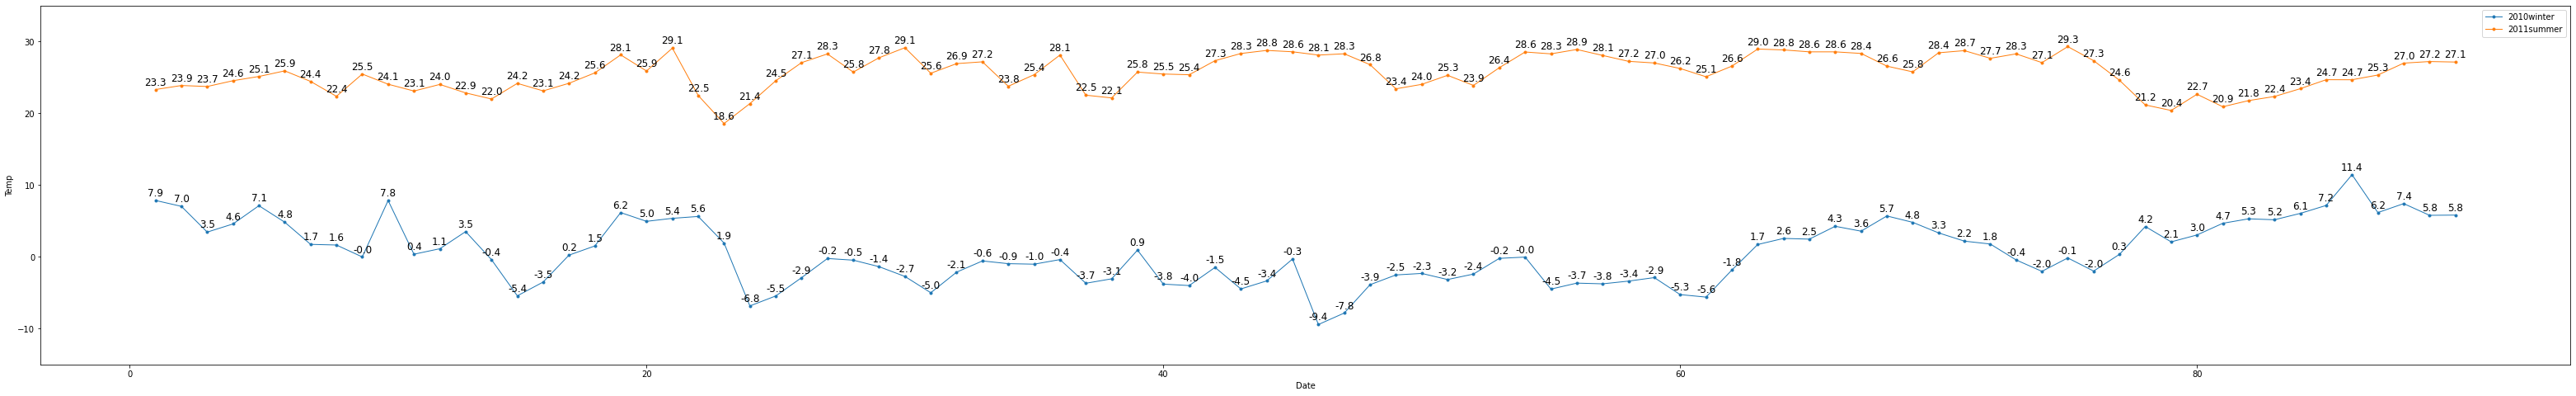

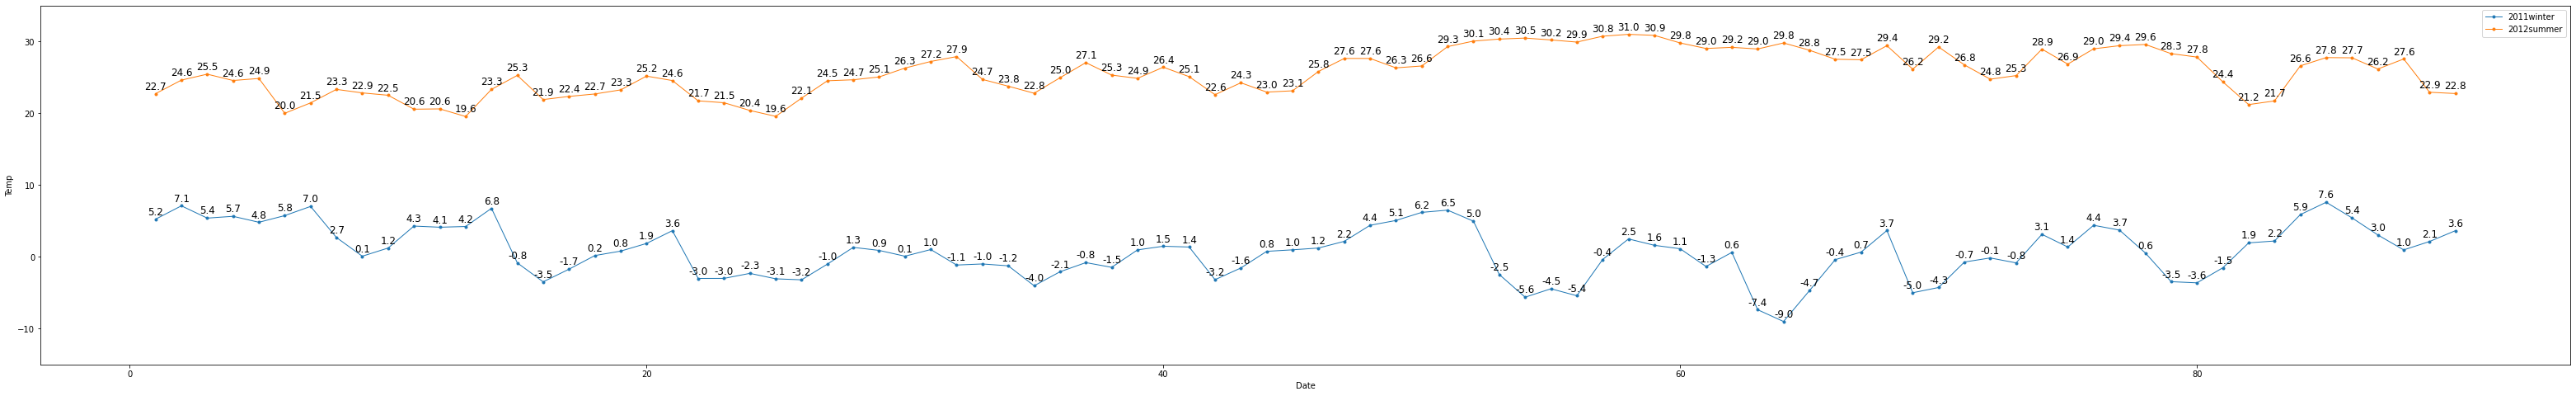

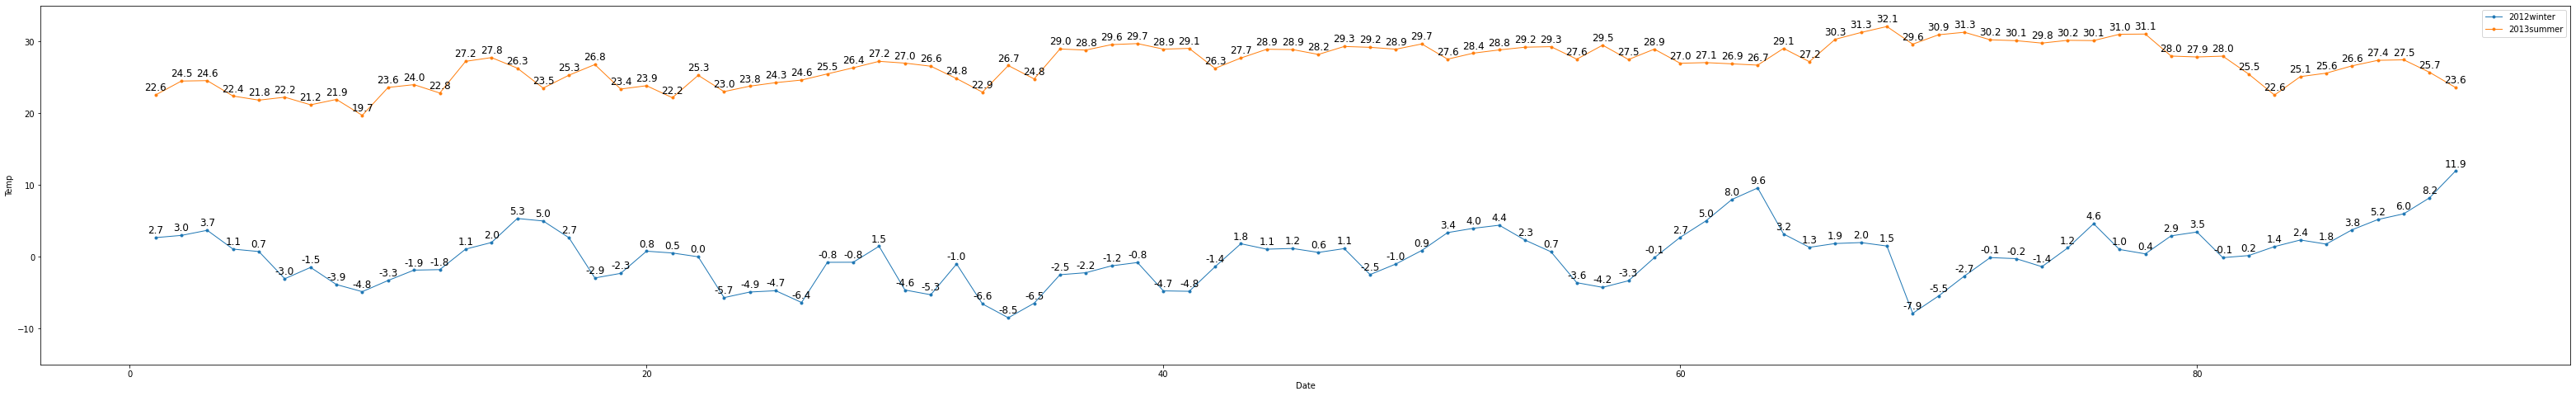

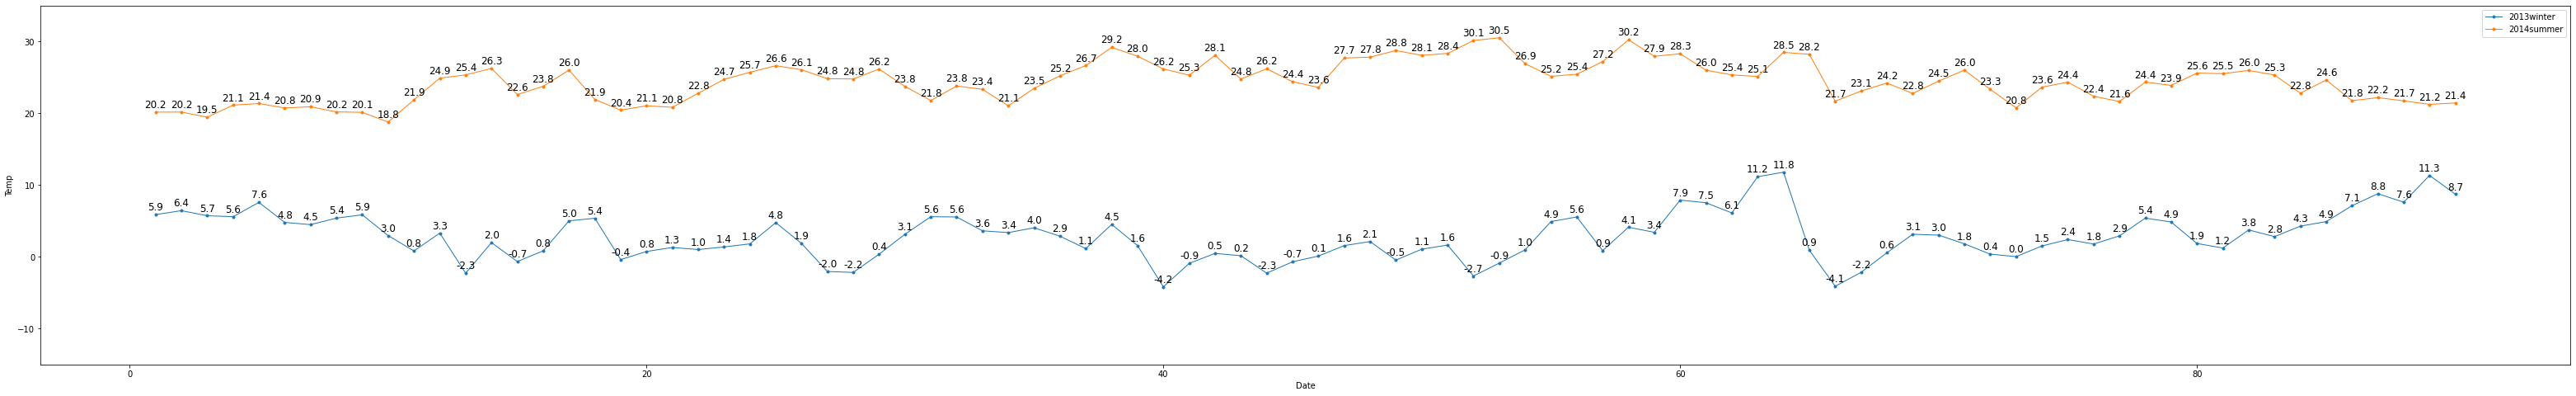

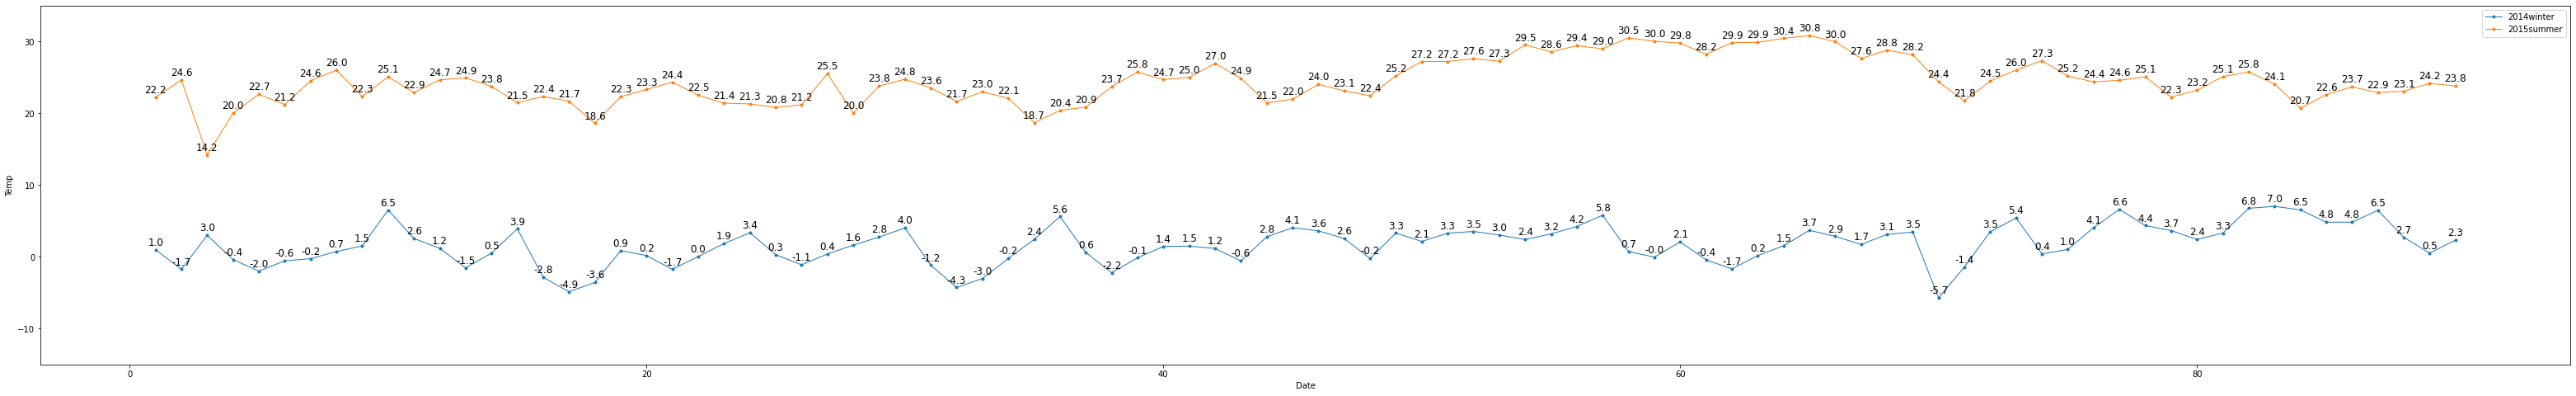

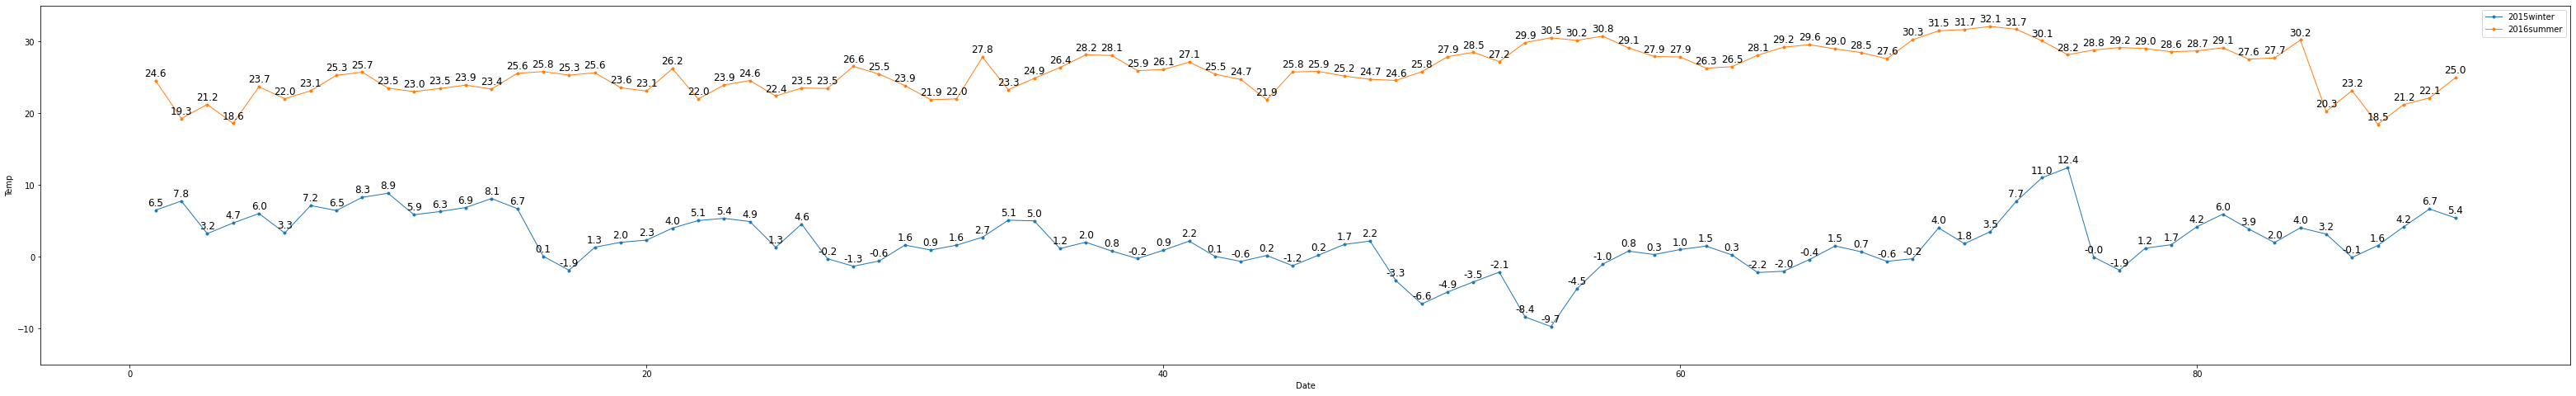

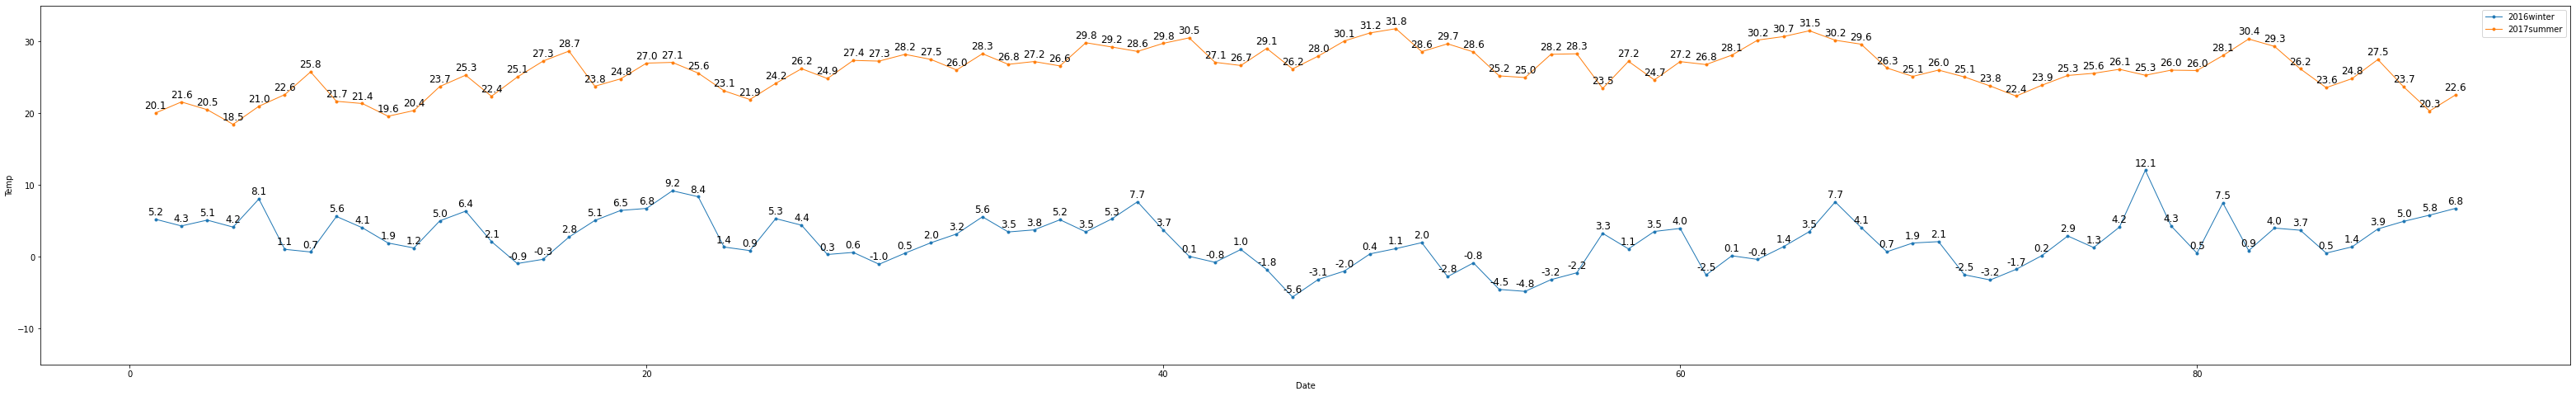

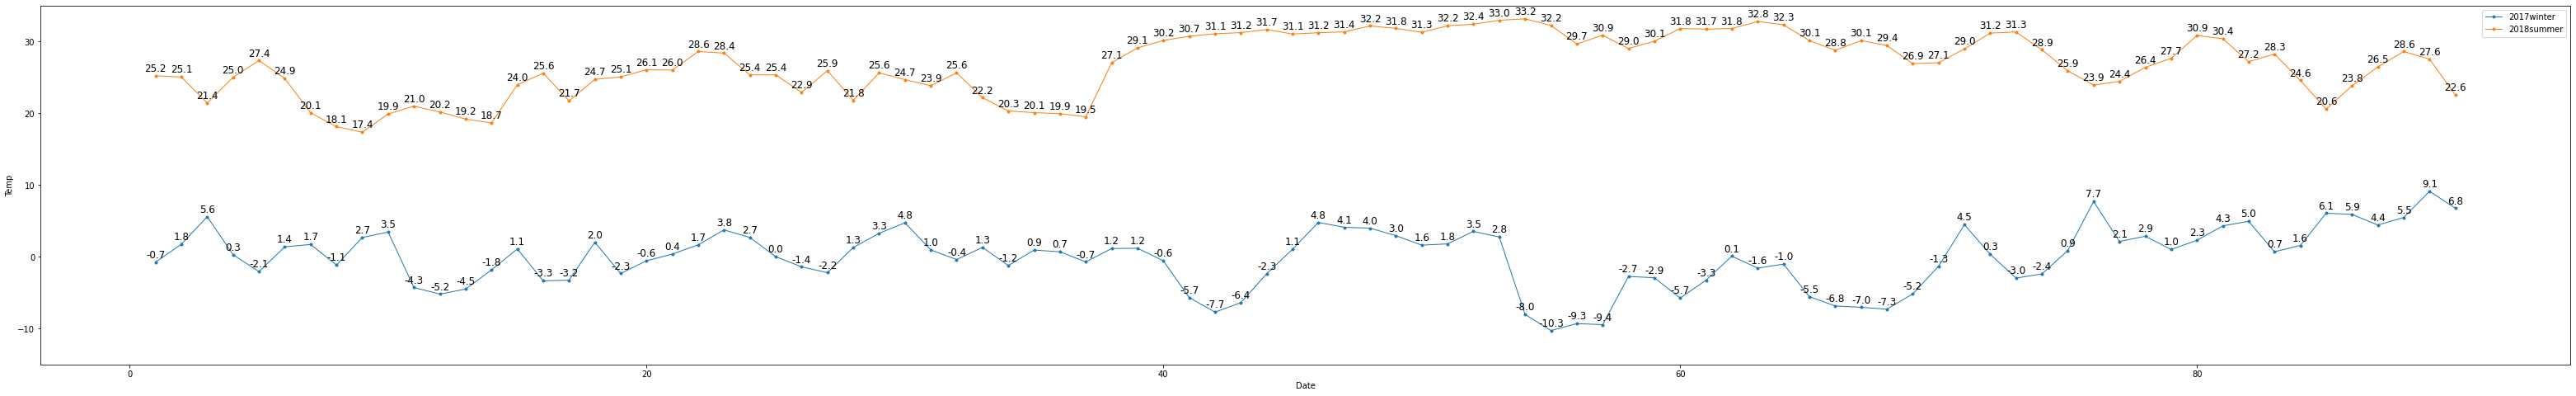

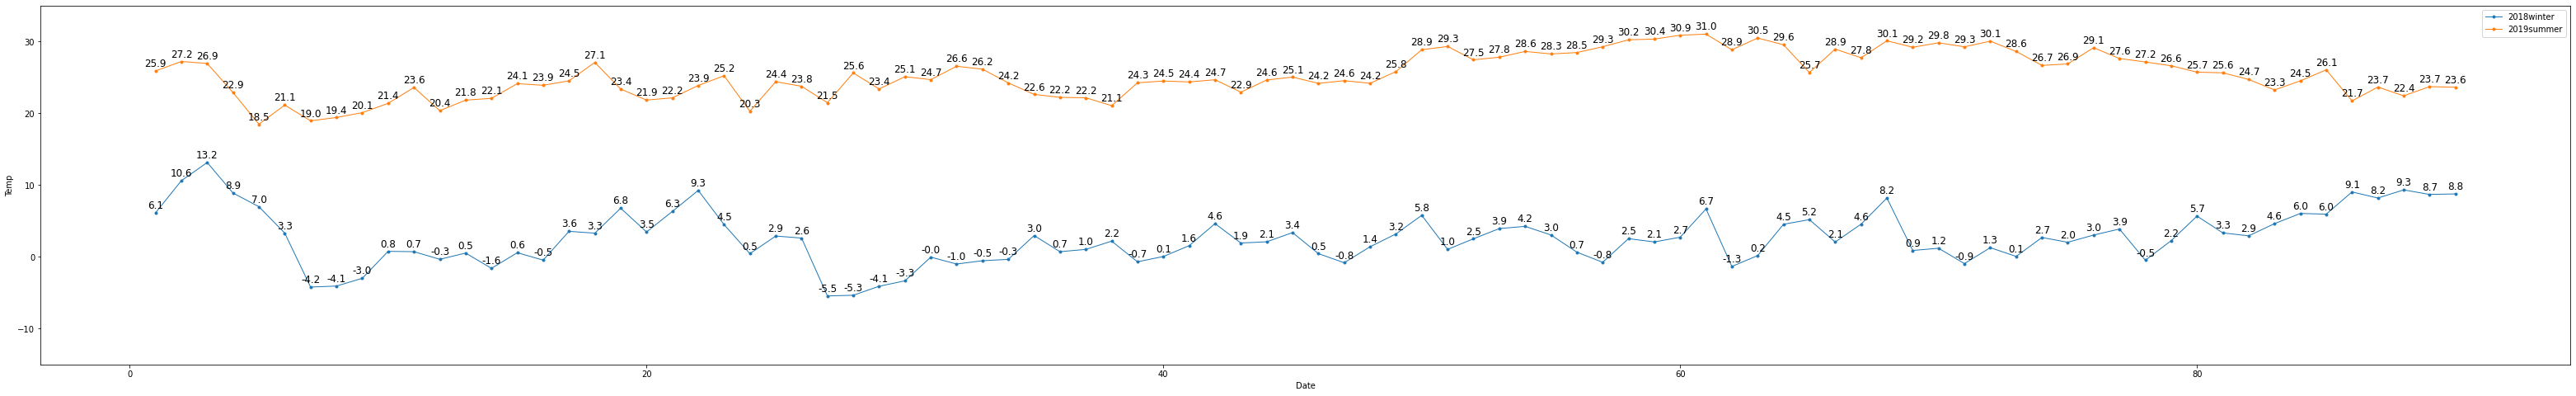

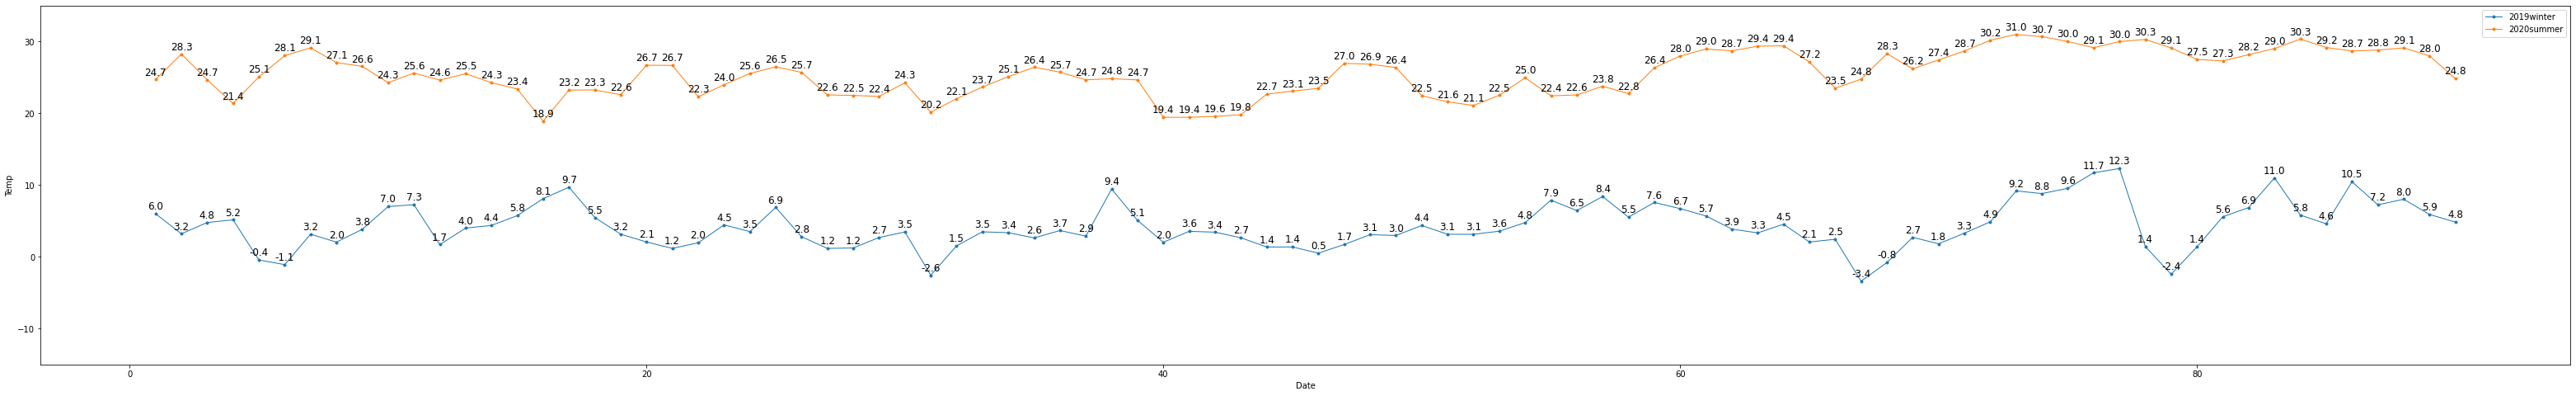

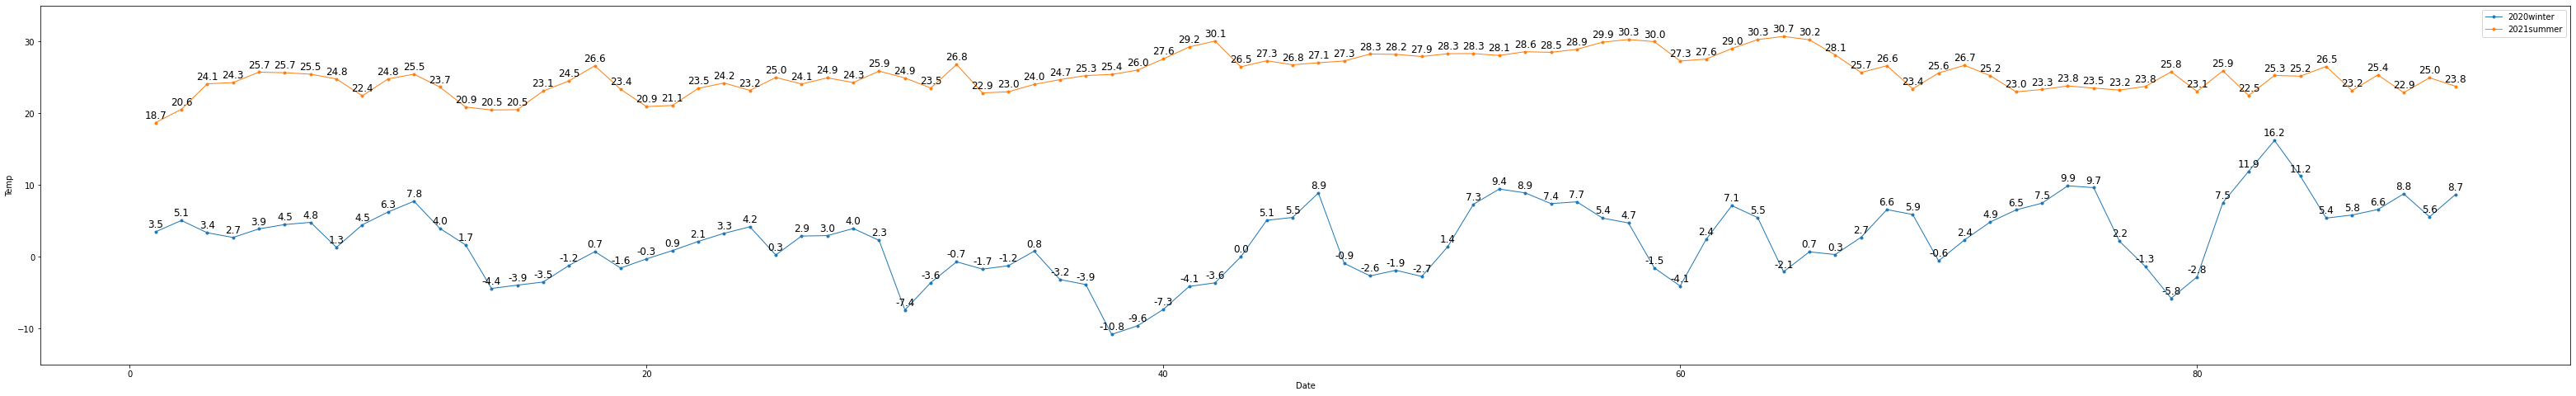

In [11]:
# 2011년부터 10년치의 여름과 겨울의 평균기온 비교 그래프를 보여주고 그림으로 저장
for i in range(2010,2021):
    win_sum_graph(i,i+1)

#### 2. X년도의 겨울, (X+1)년도의 여름 HI 그래프

1. 필요한 column 불러오기 및 EDA

In [12]:
# 필요한 열지수 정보만 가져온다.
HI=temp_pre.loc[:,['year','month','day','hour','HI','region']]
HI.head()

year  month  day  hour         HI region
0  2010      6    1     0  15.589444    동인동
1  2010      6    1     1  17.245000    동인동
2  2010      6    1     2  18.926667    동인동
3  2010      6    1     3  20.006111    동인동
4  2010      6    1     4  21.415556    동인동

In [13]:
# 폭염의 기준인 체감온도 33도 이상인 시간대만 따로 데이터프레임으로 만듬
index=list(HI[(HI['HI']>=33)].index)
HIGH=HI.loc[index,:]
# HIGH[HIGH['month']==5].count()
HIGH.count()

year      603964
month     603964
day       603964
hour      603964
HI        603964
region    603964
dtype: int64

In [14]:
# 각각의 달에서 HI가 33 이상인 시간대를 세어봄
for i in range(3):
    print('{0}월 총 폭염 시간 수: '.format((i+6))+str(len(HIGH[HIGH['month']==(i+6)]))+'시간',end='\n')

6월 총 폭염 시간 수: 13506시간
7월 총 폭염 시간 수: 261820시간
8월 총 폭염 시간 수: 311003시간


In [15]:
# 2010년부터 2021년 까지 각각의 달에서 HI가 33 이상인 시간대를 세어봄
for j in range(2010,2022):
    temp_HIGH=HIGH[HIGH['year']==j]
    for i in range(3):
        print('{0}년 {1}월 총 폭염 시간 수: '.format(j,(i+6))+str(len(temp_HIGH[temp_HIGH['month']==(i+6)]))+'시간',end='\n')
    print()

2010년 6월 총 폭염 시간 수: 1762시간
2010년 7월 총 폭염 시간 수: 19740시간
2010년 8월 총 폭염 시간 수: 42378시간

2011년 6월 총 폭염 시간 수: 3177시간
2011년 7월 총 폭염 시간 수: 18735시간
2011년 8월 총 폭염 시간 수: 19734시간

2012년 6월 총 폭염 시간 수: 40시간
2012년 7월 총 폭염 시간 수: 22656시간
2012년 8월 총 폭염 시간 수: 25951시간

2013년 6월 총 폭염 시간 수: 1072시간
2013년 7월 총 폭염 시간 수: 33611시간
2013년 8월 총 폭염 시간 수: 39455시간

2014년 6월 총 폭염 시간 수: 105시간
2014년 7월 총 폭염 시간 수: 16945시간
2014년 8월 총 폭염 시간 수: 5070시간

2015년 6월 총 폭염 시간 수: 5시간
2015년 7월 총 폭염 시간 수: 11987시간
2015년 8월 총 폭염 시간 수: 12389시간

2016년 6월 총 폭염 시간 수: 121시간
2016년 7월 총 폭염 시간 수: 17797시간
2016년 8월 총 폭염 시간 수: 32981시간

2017년 6월 총 폭염 시간 수: 1968시간
2017년 7월 총 폭염 시간 수: 31345시간
2017년 8월 총 폭염 시간 수: 21243시간

2018년 6월 총 폭염 시간 수: 1143시간
2018년 7월 총 폭염 시간 수: 48215시간
2018년 8월 총 폭염 시간 수: 34892시간

2019년 6월 총 폭염 시간 수: 301시간
2019년 7월 총 폭염 시간 수: 12623시간
2019년 8월 총 폭염 시간 수: 22858시간

2020년 6월 총 폭염 시간 수: 3528시간
2020년 7월 총 폭염 시간 수: 2780시간
2020년 8월 총 폭염 시간 수: 41096시간

2021년 6월 총 폭염 시간 수: 284시간
2021년 7월 총 폭염 시간 수: 25386시간
2021년 8월 총 폭염 시간 수: 12956시간



2-1. 매년 폭염인 달의 시간대를 시각화 하는 함수

In [16]:
def HI_graph(m,y):
    xs=[str(i+6)+'th month' for i in range(3)]
    ys=y


    plt.figure(figsize=(10,6)) #그래프 크기 지정

    plt.plot(xs,ys,'o-',ms=3,lw=1)
    # plt.xlabel('Month') #그래프 x축 이름(label) 지정
    plt.title('{0}th year summer HI count'.format(m))
    plt.ylabel('HI')
    plt.ylim(0,50000)
    # plt.legend()

    for i in range(len(xs)):
        height=ys[i]
        plt.text(xs[i],height+0.25,'%.f hour'%height,ha='center',va='bottom',size=12)

    # plt.savefig(str(j)+'년도 여름 열지수')

2-2. 매년 폭염인 달의 시간대를 시각화 하는 코드

In [17]:
for j in range(2010,2022):
    HI_temp=[]
    temp_HIGH=HIGH[HIGH['year']==j]
    # print('{0}년 폭염 시간 수: '.format(j))
    for i in range(3):
        HI_temp.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))
    # HI_graph(j,HI_temp)
    # print(HI_temp)
    # print()

3-1. HI가 -10 이하인 한파인 시간대를 찾아봄

In [18]:
# 한파인 날을 따로 모은 데이터프레임을 만든다
index=list(HI[(HI['HI']<=-10)].index)
LOW=HI.loc[index,:]
# LOW[LOW['month']==1].count()
LOW.count()

year      27080
month     27080
day       27080
hour      27080
HI        27080
region    27080
dtype: int64

In [19]:
# 한파인 시간대가 있는 달을 찾아봄
LOW['month'].unique()

array([ 1,  2, 12], dtype=int64)

In [20]:
# 월별로 한파인 시간대를 세어봄
for i in range(1):
    print('{0}월 총 한파 시간 수: '.format((i+12))+str(len(LOW[LOW['month']==(i+12)]))+'시간',end='\n')

for i in range(2):
    print('{0}월 총 한파 시간 수: '.format((i+1))+str(len(LOW[LOW['month']==(i+1)]))+'시간',end='\n')

12월 총 한파 시간 수: 2069시간
1월 총 한파 시간 수: 19087시간
2월 총 한파 시간 수: 5924시간


In [21]:
for j in range(2010,2022):
    temp_LOW=LOW[LOW['year']==j]
    for i in range(1):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+12))+str(len(temp_LOW[temp_LOW['month']==(i+12)]))+'시간',end='\n')
    for i in range(2):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+1))+str(len(temp_LOW[temp_LOW['month']==(i+1)]))+'시간',end='\n')
    print()

2010년 12월 총 한파 시간 수: 293시간
2010년 1월 총 한파 시간 수: 0시간
2010년 2월 총 한파 시간 수: 0시간

2011년 12월 총 한파 시간 수: 0시간
2011년 1월 총 한파 시간 수: 2597시간
2011년 2월 총 한파 시간 수: 0시간

2012년 12월 총 한파 시간 수: 796시간
2012년 1월 총 한파 시간 수: 144시간
2012년 2월 총 한파 시간 수: 2260시간

2013년 12월 총 한파 시간 수: 0시간
2013년 1월 총 한파 시간 수: 1765시간
2013년 2월 총 한파 시간 수: 1453시간

2014년 12월 총 한파 시간 수: 0시간
2014년 1월 총 한파 시간 수: 0시간
2014년 2월 총 한파 시간 수: 0시간

2015년 12월 총 한파 시간 수: 0시간
2015년 1월 총 한파 시간 수: 5시간
2015년 2월 총 한파 시간 수: 65시간

2016년 12월 총 한파 시간 수: 0시간
2016년 1월 총 한파 시간 수: 3159시간
2016년 2월 총 한파 시간 수: 0시간

2017년 12월 총 한파 시간 수: 153시간
2017년 1월 총 한파 시간 수: 22시간
2017년 2월 총 한파 시간 수: 0시간

2018년 12월 총 한파 시간 수: 11시간
2018년 1월 총 한파 시간 수: 7209시간
2018년 2월 총 한파 시간 수: 2127시간

2019년 12월 총 한파 시간 수: 0시간
2019년 1월 총 한파 시간 수: 0시간
2019년 2월 총 한파 시간 수: 0시간

2020년 12월 총 한파 시간 수: 258시간
2020년 1월 총 한파 시간 수: 0시간
2020년 2월 총 한파 시간 수: 0시간

2021년 12월 총 한파 시간 수: 558시간
2021년 1월 총 한파 시간 수: 4170시간
2021년 2월 총 한파 시간 수: 0시간



3-2. X년의 한파시간대와 (X+1)년의 폭염 시간대를 비교하여 시각화 하는 함수

In [22]:
# 시각화 한 후 저장까지 함
def HI_graph(m,H,L):
    xs=[1,2,3]
    y1=H
    y2=L


    fig,ax1=plt.subplots(figsize=(15,6))
    ax1.set_ylabel('Heat Wave')
    ax1.set_xticks([1,2,3])
    ax1.set_ylim([0,50000])
    ax1.set_title(str(m+1)+' year Heat_Index comparision',size=24,family='fantasy')
    line1=ax1.plot(xs,y1,color='red',label=str(m+1)+' Summer')

    ax2=ax1.twinx()
    ax2.set_ylabel('Cold Wave')
    ax2.set_ylim([0,7500])
    line2=ax2.plot(xs,y2,color='blue',label=str(m)+' Winter')

    lines=line1+line2
    labels=[l.get_label() for l in lines]
    prop = dict(
        # family='fantasy', # 글씨체
        style='italic', # 글씨 형식 - 이탤릭형식
        size=18 # 글씨 크기
    )
    
    config_legend=dict(## 범례 설정
        loc='upper left', # 범례 위치 설정
        prop=prop # 범례 폰트 속성
    )
    ax1.legend(lines,labels,**config_legend)

    for i in range(len(xs)):
        height=y1[i]
        ax1.text(xs[i],height+0.7,'%.f hour'%height,ha='center',va='bottom',size=12)
            
    for i in range(len(xs)):
        height=y2[i]
        ax2.text(xs[i],height+0.15,'%.f hour'%height,ha='center',va='bottom',size=12)

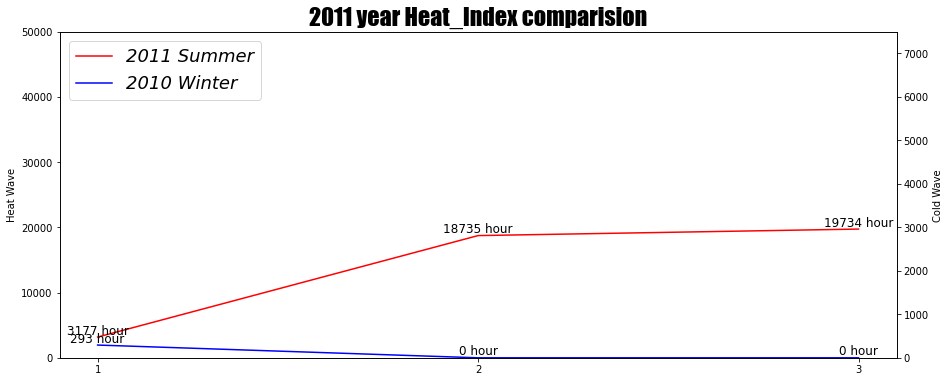

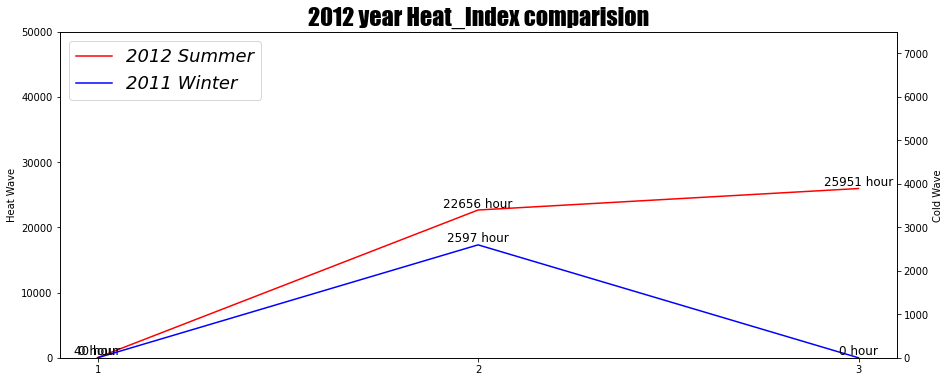

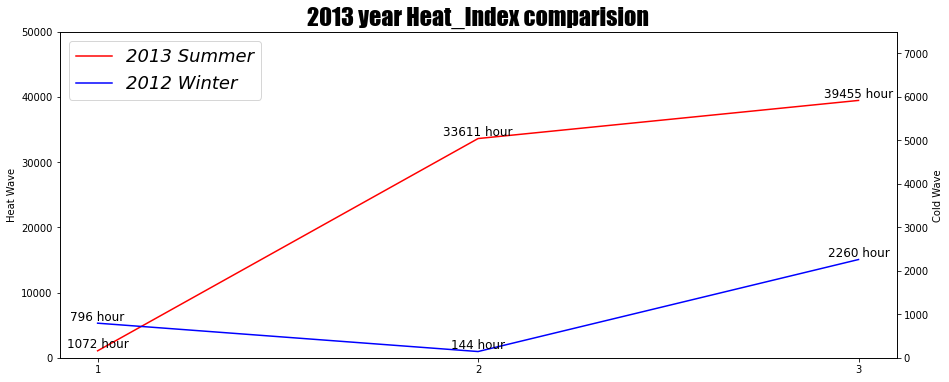

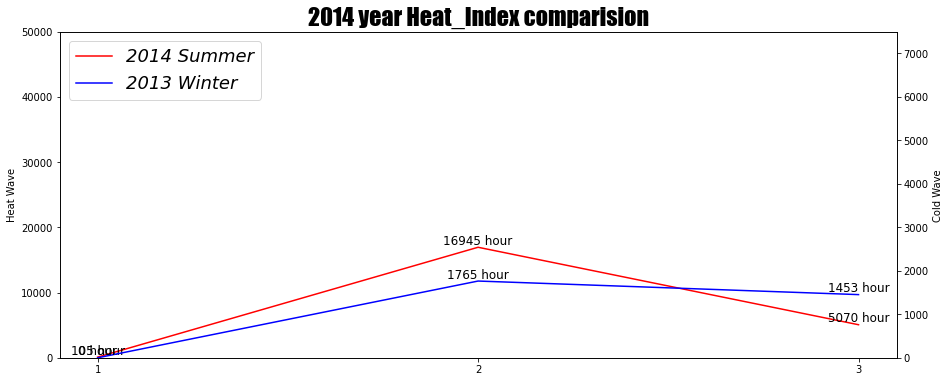

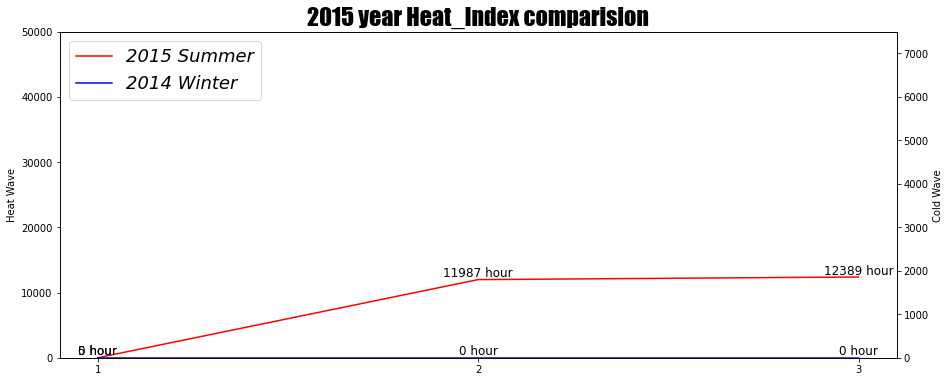

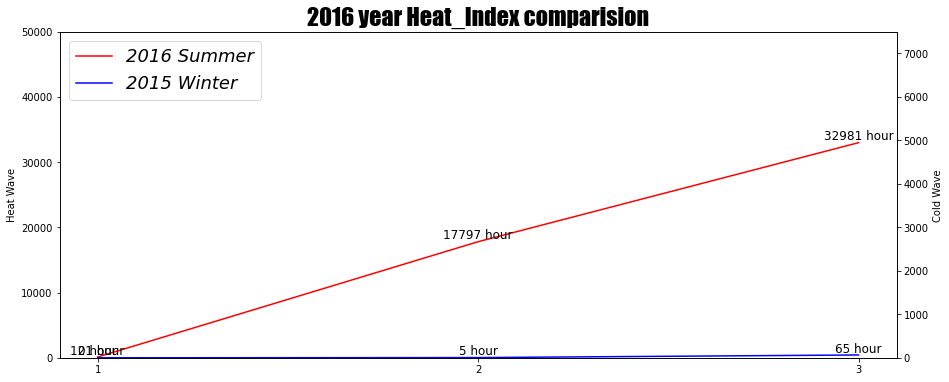

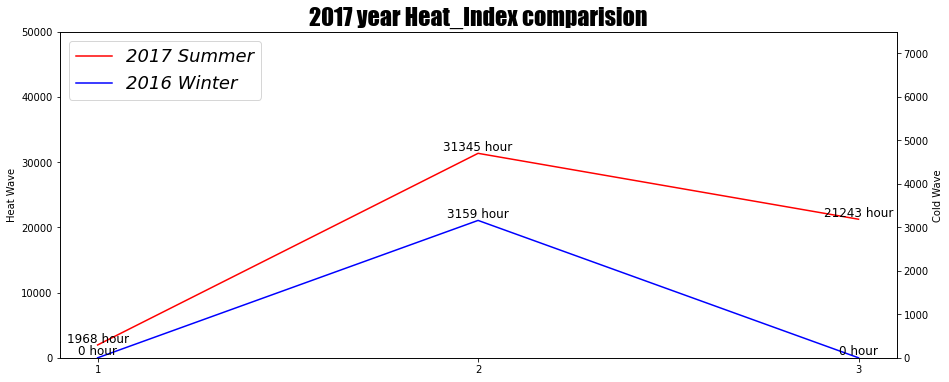

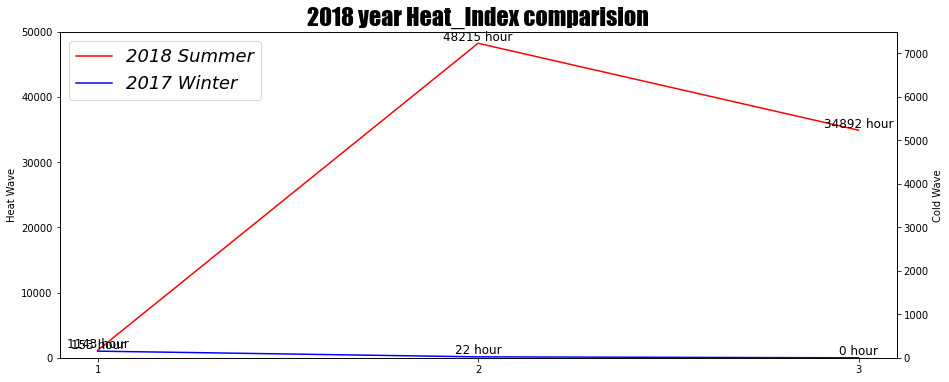

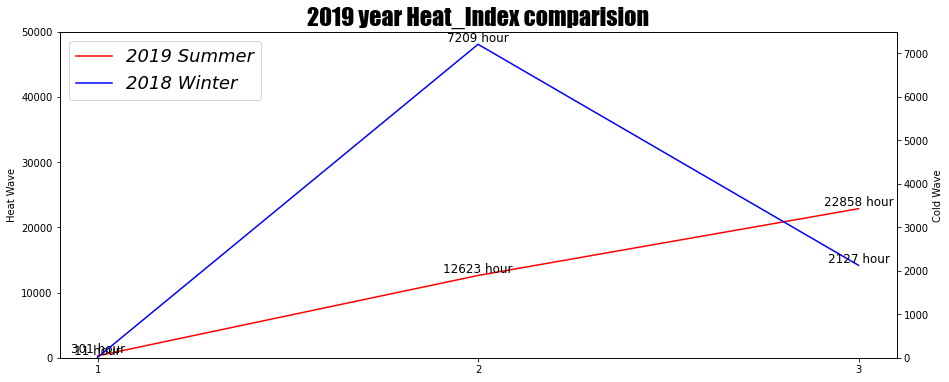

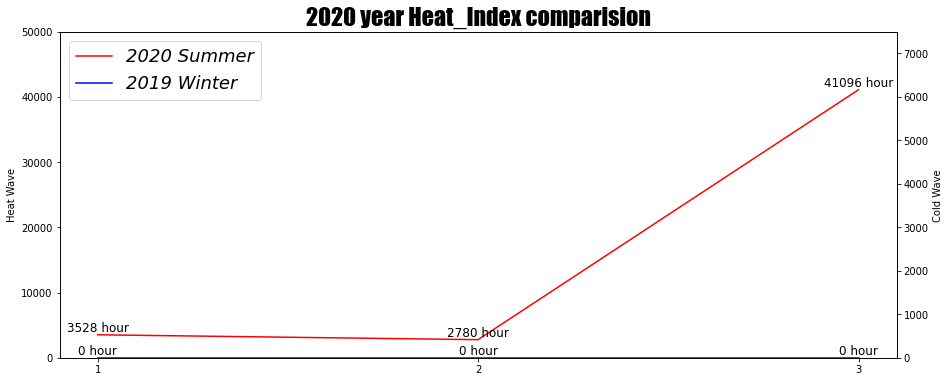

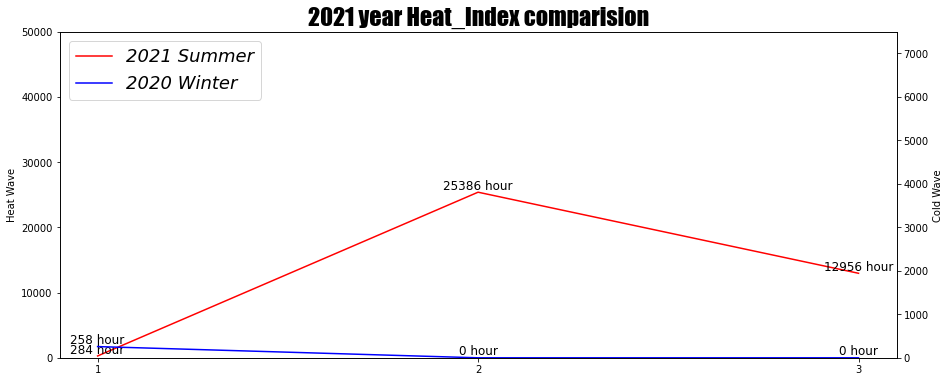

In [23]:
# 2011년 부터 2021년까지를 비교하여 시각화한 것을 저장하는 코드
for j in range(2010,2021):
    temp_HIGH=HIGH[HIGH['year']==j+1]
    summer_high=[]
    for i in range(3):
        summer_high.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))

    temp_LOW=LOW[LOW['year']==j]
    winter_low=[]
    for i in range(1):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+12)]))
    for i in range(2):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+1)]))
    
    HI_graph(j,summer_high,winter_low)

4-1 작년 겨울과 올해 여름의 4달간 기록을 비교하여 시각화

In [24]:
# 열지수 33 이상인 시간대만 추출
index=list(HI[(HI['HI']>=33)].index)
HIGH=HI.loc[index,:]
# HIGH[HIGH['month']==5].count()
HIGH.count()

year      603964
month     603964
day       603964
hour      603964
HI        603964
region    603964
dtype: int64

In [25]:
# 열지수 -10이하인 시간대만 추출
index=list(HI[(HI['HI']<=-10)].index)
LOW=HI.loc[index,:]
# LOW[LOW['month']==1].count()
LOW.count()

year      27080
month     27080
day       27080
hour      27080
HI        27080
region    27080
dtype: int64

In [26]:
# 겨울과 여름의 시작부터 4달간의 열지수 시간대 그래프
# 시각화 한 후 저장까지 함
def HI_graph(m,H,L):
    xs=[1,2,3,4]
    y1=H
    y2=L

    fig,ax1=plt.subplots(figsize=(15,6))
    ax1.set_ylabel('Heat Wave')
    ax1.set_xticks([1,2,3,4])
    ax1.set_ylim([0,50000])
    ax1.set_title(str(m+1)+' year Heat_Index comparison',size=24,family='fantasy')
    line1=ax1.plot(xs,y1,color='red',label=str(m+1)+' Summer')

    ax2=ax1.twinx()
    ax2.set_ylabel('Cold Wave')
    ax2.set_ylim([0,8000])
    line2=ax2.plot(xs,y2,color='blue',label=str(m)+' Winter')

    lines=line1+line2
    labels=[l.get_label() for l in lines]
    prop = dict(
        # family='fantasy', # 글씨체
        style='italic', # 글씨 형식 - 이탤릭형식
        size=18 # 글씨 크기
    )
    
    config_legend=dict(## 범례 설정
        loc='upper left', # 범례 위치 설정
        prop=prop # 범례 폰트 속성
    )
    ax1.legend(lines,labels,**config_legend)

    for i in range(len(xs)):
        height=y1[i]
        ax1.text(xs[i],height+0.7,'%.f hour'%height,ha='center',va='bottom',size=12)
            
    for i in range(len(xs)):
        height=y2[i]
        ax2.text(xs[i],height+0.15,'%.f hour'%height,ha='center',va='bottom',size=12)

    plt.savefig(str(m)+'년도 겨울과 여름의 열지수')

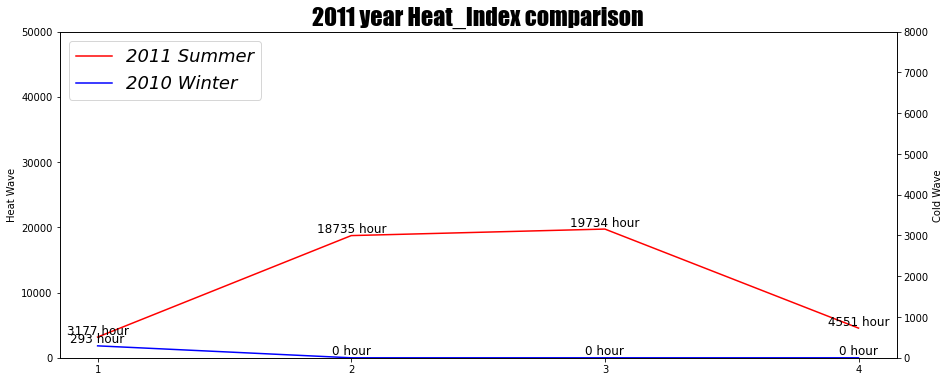

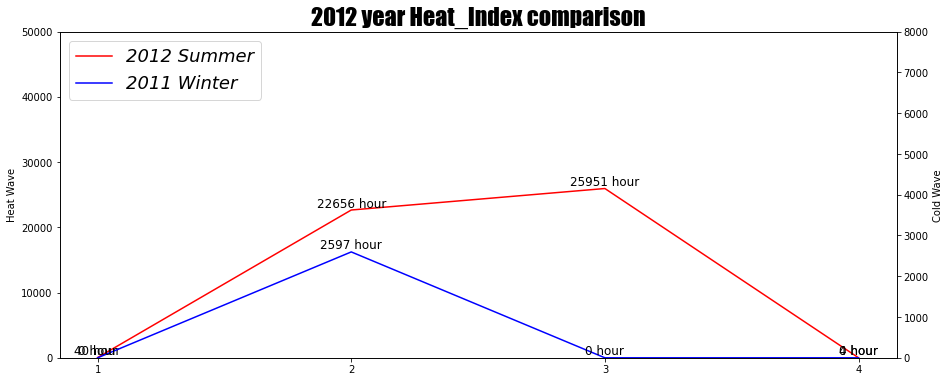

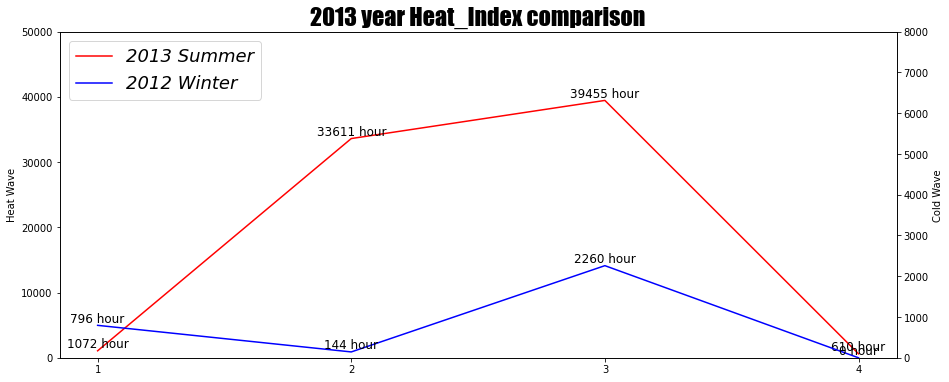

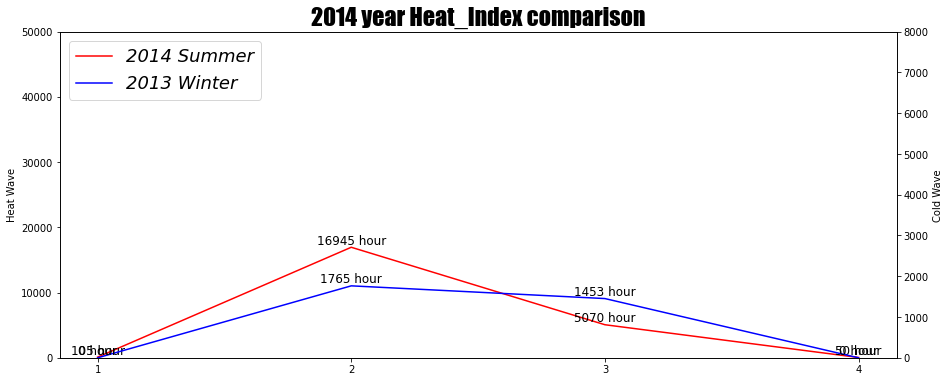

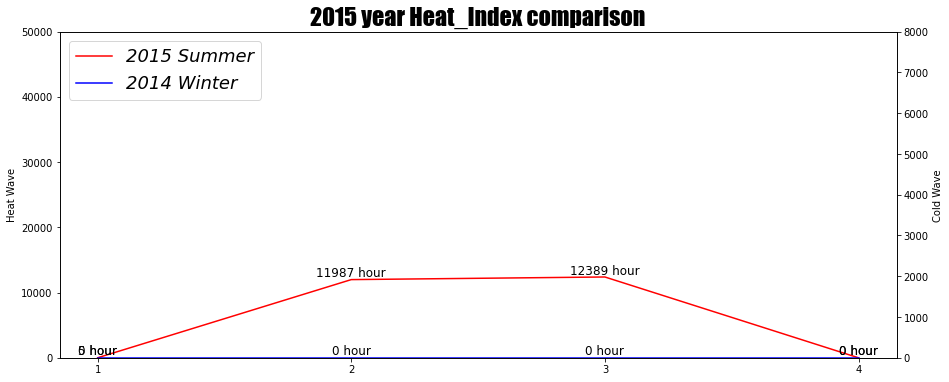

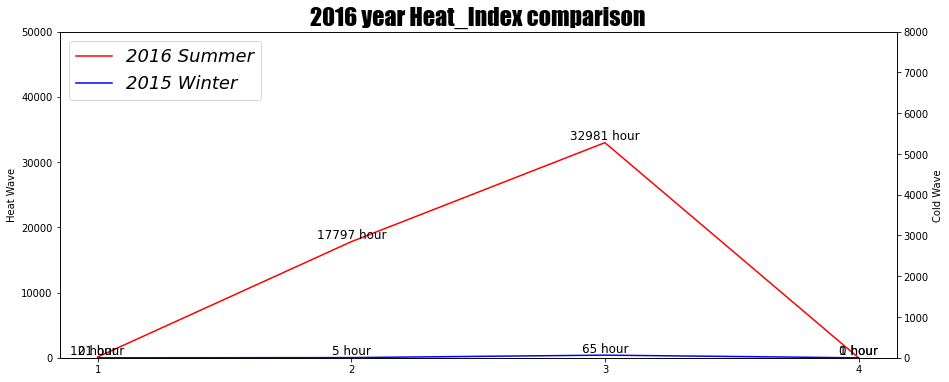

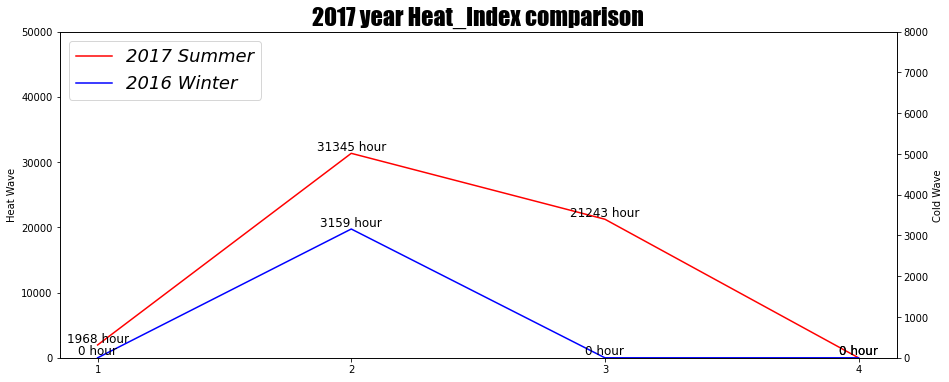

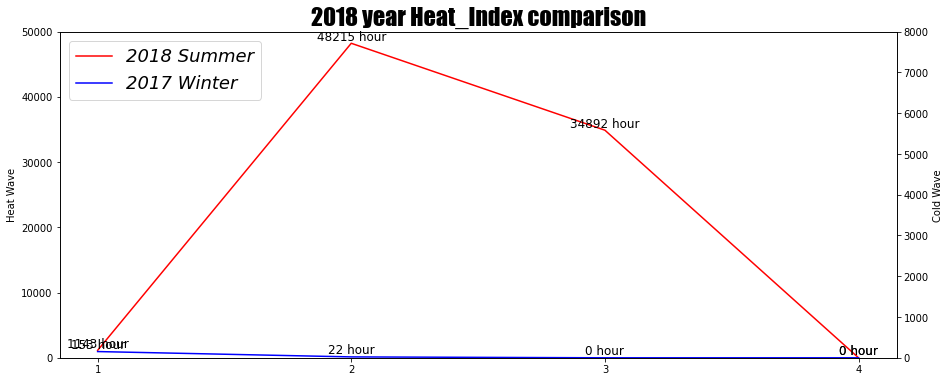

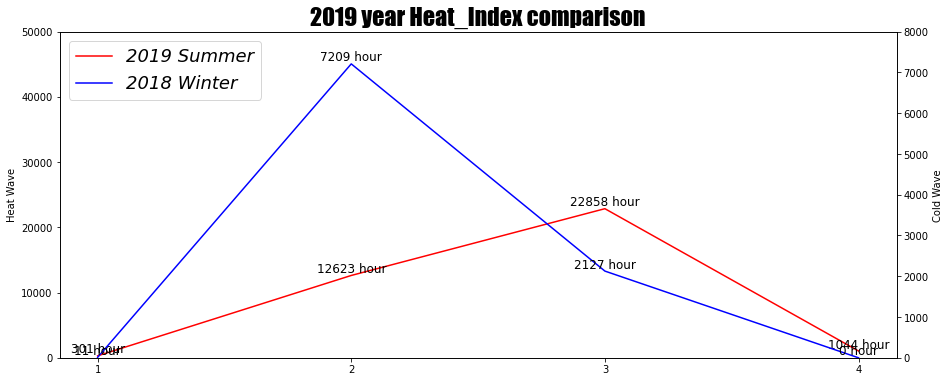

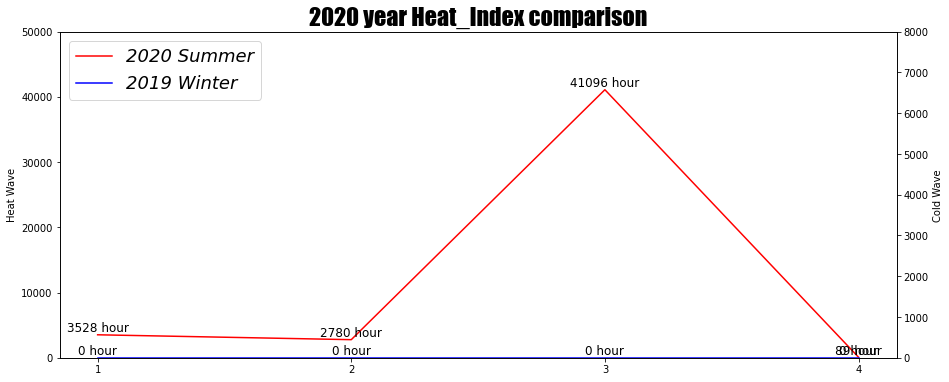

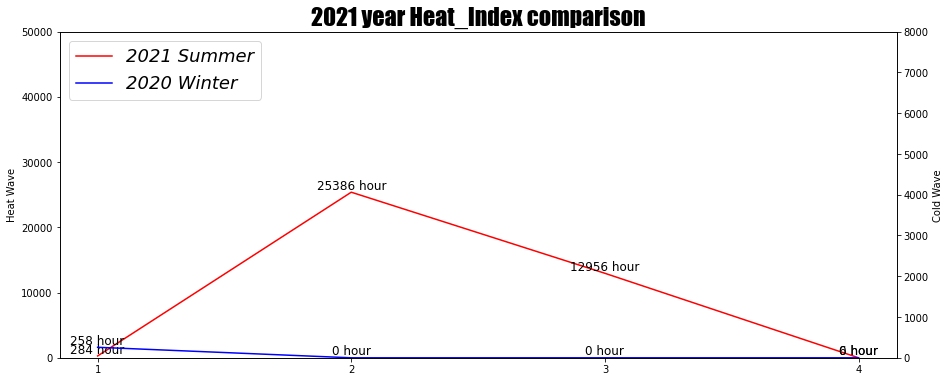

In [27]:
# 2011년 부터 2021년까지를 비교하여 시각화한 것을 저장하는 코드
for j in range(2010,2021):
    temp_HIGH=HIGH[HIGH['year']==j+1]
    summer_high=[]
    for i in range(4):
        summer_high.append(len(temp_HIGH[temp_HIGH['month']==(i+6)]))

    temp_LOW=LOW[LOW['year']==j]
    winter_low=[]
    for i in range(1):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+12)]))
    for i in range(3):
        winter_low.append(len(temp_LOW[temp_LOW['month']==(i+1)]))
    
    HI_graph(j,summer_high,winter_low)

그래프 관찰결과
>2012년이나 2014년 그래프를 보면 2018년 그래프에 비하여 대체로 한파인 시간대가 많음.  
>2018년 그래프는 지정한 그래프보다 대체로 폭염인 시간대가 많음.  
>
>따라서 겨울에 한파인 시간대가 적으면 대체로 여름에 폭염인 시간대가 늘어남을 알 수 있음.

### 3. 작년 겨울의 한파시간과 올해 여름의 폭염시간의 상관관계

RAW 데이터의 상관관계 히트맵

<AxesSubplot:>

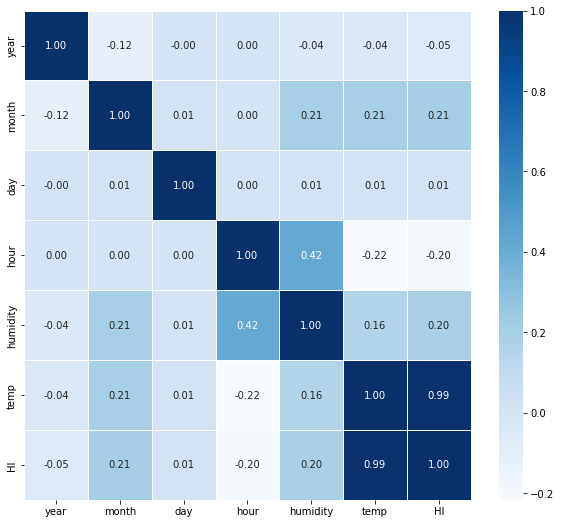

In [30]:
plt.figure(figsize=(10,9))
sns.heatmap(data = temp_pre.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

폭염 혹은 한파인 시간대를 카운팅

In [31]:
# 열지수가 25이상인 시간대를 카운팅
index=list(HI[(HI['HI']>=25)].index)
HIGH=HI.loc[index,:]
HIGH.count()

year      2713597
month     2713597
day       2713597
hour      2713597
HI        2713597
region    2713597
dtype: int64

In [32]:
# 열지수가 -3이하인 시간대를 카운팅
index=list(HI[(HI['HI']<=-3)].index)
LOW=HI.loc[index,:]
LOW.count()

year      600495
month     600495
day       600495
hour      600495
HI        600495
region    600495
dtype: int64

In [33]:
# 연도별로 폭염 시간대를 카운팅
for j in range(2010,2022):
    temp_HIGH=HIGH[HIGH['year']==j]
    for i in range(4):
        print('{0}년 {1}월 총 폭염 시간 수: '.format(j,(i+6))+str(len(temp_HIGH[temp_HIGH['month']==(i+6)]))+'시간',end='\n')
    print()

2010년 6월 총 폭염 시간 수: 46910시간
2010년 7월 총 폭염 시간 수: 69538시간
2010년 8월 총 폭염 시간 수: 99143시간
2010년 9월 총 폭염 시간 수: 41093시간

2011년 6월 총 폭염 시간 수: 45249시간
2011년 7월 총 폭염 시간 수: 78336시간
2011년 8월 총 폭염 시간 수: 72693시간
2011년 9월 총 폭염 시간 수: 32153시간

2012년 6월 총 폭염 시간 수: 26689시간
2012년 7월 총 폭염 시간 수: 75353시간
2012년 8월 총 폭염 시간 수: 84745시간
2012년 9월 총 폭염 시간 수: 14729시간

2013년 6월 총 폭염 시간 수: 38608시간
2013년 7월 총 폭염 시간 수: 94365시간
2013년 8월 총 폭염 시간 수: 89365시간
2013년 9월 총 폭염 시간 수: 23698시간

2014년 6월 총 폭염 시간 수: 27132시간
2014년 7월 총 폭염 시간 수: 69167시간
2014년 8월 총 폭염 시간 수: 45736시간
2014년 9월 총 폭염 시간 수: 21602시간

2015년 6월 총 폭염 시간 수: 26674시간
2015년 7월 총 폭염 시간 수: 57188시간
2015년 8월 총 폭염 시간 수: 60065시간
2015년 9월 총 폭염 시간 수: 13183시간

2016년 6월 총 폭염 시간 수: 34969시간
2016년 7월 총 폭염 시간 수: 68570시간
2016년 8월 총 폭염 시간 수: 80038시간
2016년 9월 총 폭염 시간 수: 19598시간

2017년 6월 총 폭염 시간 수: 39578시간
2017년 7월 총 폭염 시간 수: 90051시간
2017년 8월 총 폭염 시간 수: 70466시간
2017년 9월 총 폭염 시간 수: 21867시간

2018년 6월 총 폭염 시간 수: 35206시간
2018년 7월 총 폭염 시간 수: 80653시간
2018년 8월 총 폭염 시간 수: 85484시간
2018년 9월 총 폭

In [34]:
# 연도별로 한파 시간대를 카운팅
for j in range(2010,2022):
    temp_LOW=LOW[LOW['year']==j]
    for i in range(1):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+12))+str(len(temp_LOW[temp_LOW['month']==(i+12)]))+'시간',end='\n')
    for i in range(3):
        print('{0}년 {1}월 총 한파 시간 수: '.format(j,(i+1))+str(len(temp_LOW[temp_LOW['month']==(i+1)]))+'시간',end='\n')
    print()

2010년 12월 총 한파 시간 수: 23287시간
2010년 1월 총 한파 시간 수: 0시간
2010년 2월 총 한파 시간 수: 0시간
2010년 3월 총 한파 시간 수: 0시간

2011년 12월 총 한파 시간 수: 15582시간
2011년 1월 총 한파 시간 수: 50453시간
2011년 2월 총 한파 시간 수: 4890시간
2011년 3월 총 한파 시간 수: 563시간

2012년 12월 총 한파 시간 수: 31658시간
2012년 1월 총 한파 시간 수: 23757시간
2012년 2월 총 한파 시간 수: 22975시간
2012년 3월 총 한파 시간 수: 979시간

2013년 12월 총 한파 시간 수: 6419시간
2013년 1월 총 한파 시간 수: 31415시간
2013년 2월 총 한파 시간 수: 11370시간
2013년 3월 총 한파 시간 수: 334시간

2014년 12월 총 한파 시간 수: 16739시간
2014년 1월 총 한파 시간 수: 13328시간
2014년 2월 총 한파 시간 수: 6055시간
2014년 3월 총 한파 시간 수: 196시간

2015년 12월 총 한파 시간 수: 4852시간
2015년 1월 총 한파 시간 수: 12874시간
2015년 2월 총 한파 시간 수: 6073시간
2015년 3월 총 한파 시간 수: 1678시간

2016년 12월 총 한파 시간 수: 4982시간
2016년 1월 총 한파 시간 수: 27772시간
2016년 2월 총 한파 시간 수: 10898시간
2016년 3월 총 한파 시간 수: 407시간

2017년 12월 총 한파 시간 수: 24573시간
2017년 1월 총 한파 시간 수: 23792시간
2017년 2월 총 한파 시간 수: 10189시간
2017년 3월 총 한파 시간 수: 366시간

2018년 12월 총 한파 시간 수: 19111시간
2018년 1월 총 한파 시간 수: 38487시간
2018년 2월 총 한파 시간 수: 25095시간
2018년 3월 총 한파 시간 수: 691시간

2019년 1

폭염과 한파인 시간을 카운팅 한 데이터프레임을 생성

In [38]:
# 월별로 연도별 카운팅값 저장
summer_high1=[]
summer_high2=[]
summer_high3=[]
summer_high4=[]
winter_low1=[]
winter_low2=[]
winter_low3=[]
winter_low4=[]
for j in range(2010,2021):
    temp_HIGH=HIGH[HIGH['year']==j+1]
    summer_high1.append(len(temp_HIGH[temp_HIGH['month']==(6)]))
    summer_high2.append(len(temp_HIGH[temp_HIGH['month']==(7)]))
    summer_high3.append(len(temp_HIGH[temp_HIGH['month']==(8)]))
    summer_high4.append(len(temp_HIGH[temp_HIGH['month']==(9)]))

    temp_LOW=LOW[LOW['year']==j]
    winter_low1.append(len(temp_LOW[temp_LOW['month']==(12)]))
    winter_low2.append(len(temp_LOW[temp_LOW['month']==(1)]))
    winter_low3.append(len(temp_LOW[temp_LOW['month']==(2)]))
    winter_low4.append(len(temp_LOW[temp_LOW['month']==(3)]))


summer_high=summer_high1+summer_high2+summer_high3+summer_high4
winter_low=winter_low1+winter_low2+winter_low3+winter_low4
summer_high.sort()
winter_low.sort(reverse=True)
# random.shuffle(summer_high)
a=winter_low[5:35]
random.shuffle(a)
winter_low[5:35]=a
# random.shuffle(winter_low)
print(summer_high)
print(winter_low)

[13183, 14729, 16286, 17730, 18175, 19598, 21602, 21867, 23698, 26674, 26689, 27132, 31523, 31627, 32153, 32224, 33931, 34969, 35206, 38608, 39578, 45249, 45736, 46722, 57188, 59108, 60065, 64194, 68570, 69167, 70466, 72693, 75353, 78171, 78336, 80038, 80346, 80653, 84745, 85484, 89365, 90051, 94365, 98463]
[50453, 38487, 31658, 31415, 27772, 23287, 23757, 979, 6073, 25095, 13328, 3001, 888, 19111, 8915, 10189, 22975, 691, 6055, 10898, 6419, 12874, 4852, 16739, 17009, 24573, 15582, 1678, 563, 11370, 23792, 5089, 4816, 4890, 4982, 407, 366, 334, 196, 40, 8, 0, 0, 0]


In [39]:
# 카운팅한 값을 합하여 데이터프레임을 생성
season_HI=pd.DataFrame({'HI_summer':summer_high,
                        'HI_winter':winter_low})
season_HI.head(10)

HI_summer  HI_winter
0      13183      50453
1      14729      38487
2      16286      31658
3      17730      31415
4      18175      27772
5      19598      23287
6      21602      23757
7      21867        979
8      23698       6073
9      26674      25095

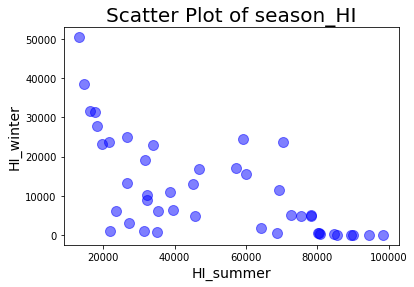

In [40]:
# 생성한 데이터프레임으로 산점도 표현
plt.plot('HI_summer',  # x
         'HI_winter',  # y
         data=season_HI,
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)

plt.title('Scatter Plot of season_HI', fontsize=20)
plt.xlabel('HI_summer', fontsize=14)
plt.ylabel('HI_winter', fontsize=14)

plt.show()

<AxesSubplot:>

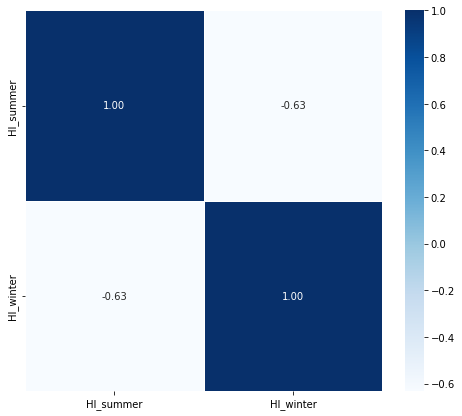

In [41]:
# 생성한 데이터프레임으로 상관계수 히트맵을 그림
plt.figure(figsize=(8,7))
sns.heatmap(data=season_HI.corr(),annot=True,fmt='.2f',linewidths=.5,cmap='Blues')

### 4. 결론
* 겨울에 한파인 시간과 여름에 폭염인 시간은 대체로 반비례하는 관계

## <hr>

## 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
>###### made by KHW

#### Period
- 2022.05.0? ~ 2022.05.!?

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 데이터 확인

2. 겨울과 여름의 데이터 비교

3. 작년 겨울의 한파시간과 올해 여름의 폭염시간의 상관관계

4. 결론
</h6></details></h4>

### 0. 

In [ ]:
# 모듈 선언
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib

In [ ]:
df_dens = pd.read_csv('./output/Daegu_density.csv', index_col=0)

df_dens

## <hr>

## 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
>###### made by KHW, LEH

#### Period
- 2022.05.13 ~ 2022.05.27

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기



4. 결론
</h6></details></h4>

### 1. 필요한 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import random
import seaborn as sns
import matplotlib

최초 1회만 실행  
파일 병합을 위한 코드

In [2]:
# import glob
# import openpyxl

# concat_list = []

# try:
#     path = './dataset/electrocity/'
#     files = glob.glob(path + "*.xlsx")

#     for file_name in files:
#         df = pd.read_excel(file_name)
#         df = pd.DataFrame(df)
#         concat_list.append(df)

# except Exception as ex:
#     print('error' + str(ex))

# df1 = pd.concat(concat_list)
# elect_daegu = df1[df1['시도'] == '대구광역시']
# elect_daegu.to_csv('./output/elec_daegu.csv')

In [3]:
# 파일 불러오기
elec_daegu = pd.read_csv('./output/elec_daegu.csv', index_col=0)
elec_daegu

C:\Users\popcorn\AppData\Local\Temp\ipykernel_19928\2716137089.py:2: DtypeWarning: Columns (5,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  elec_daegu = pd.read_csv('./output/elec_daegu.csv', index_col=0)


년도  월     시도 시군구 읍면동(행정동) 계약종별    고객호수          판매량          판매요금  \
5309   2022  1  대구광역시  남구     송현2동  가로등   62447    5486690.0  3.219613e+08   
5310   2022  1  대구광역시  남구     송현2동  교육용  632214  166331209.0  2.015713e+10   
5311   2022  1  대구광역시  남구     송현2동  농사용     176     231066.0  9.040889e+06   
5312   2022  1  대구광역시  남구     송현2동  산업용    2662    7105615.0  8.271090e+08   
5313   2022  1  대구광역시  남구     송현2동   심야   21571   26705734.0  1.933639e+09   
...     ... ..    ...  ..      ...  ...     ...          ...           ...   
20421  2022  2  대구광역시  중구      NaN  일반용    5473          NaN           NaN   
20422  2022  2  대구광역시  중구      NaN  주택용    7905          NaN           NaN   
20423  2022  2  대구광역시  중구      NaN  일반용    9136          NaN           NaN   
20424  2022  2  대구광역시  중구      NaN  주택용    9824          NaN           NaN   
20425  2022  2  대구광역시  중구      NaN  주택용   25784          NaN           NaN   

        행정동         사용량          전기요금 행정동코드   호수  전력사용량  
5309    NaN         NaN           NaN   NaN  NaN    NaN  
5310    NaN         NaN           NaN   NaN  NaN    NaN  
5311    NaN         NaN           NaN   NaN  NaN    NaN  
5312    NaN         NaN           NaN   NaN  NaN    NaN  
5313    NaN         NaN           NaN   NaN  NaN    NaN  
...     ...         ...           ...   ...  ...    ...  
20421  성내3동  16725392.0  2.214401e+09   NaN  NaN    NaN  
20422  대봉2동   4518507.0  5.833351e+08   NaN  NaN    NaN  
20423  남산4동  21528292.0  2.816247e+09   NaN  NaN    NaN  
20424  성내3동   5313300.0  6.625160e+08   NaN  NaN    NaN  
20425  남산4동  18313188.0  2.207009e+09   NaN  NaN    NaN  

[188321 rows x 15 columns]

In [24]:
daegu_final = pd.read_csv('./output/daegu_final.csv')

# 상관관계 분석에 필요한 column들만 추출
daegu_final = daegu_final[['year','month','region','HI']]

# 일별로 나누어진 데이터를 월별 평균값으로 groupby
df_month_HI = daegu_final.groupby(['year','month', 'region']).mean().reset_index()

### 2. 전처리

column  
- 판매량 = 사용량 = 전력사용량  
- 판매요금 = 전기요금  
- 읍면동(행정동) = 행정동  
- 고객호수 = 호수

판매요금, 전기요금 : 더 직관적인 전력사용량 column이 있기때문에 제거  
시도 : 사용하지 않는 column

In [20]:
elec_daegu.drop(columns=['판매요금','전기요금','시도'], inplace=True)

판매량, 사용량, 전력사용량

In [4]:
print('판매량 not null 값 수 :', elec_daegu['판매량'].notnull().sum())
print('사용량 not null 값 수 :', elec_daegu['사용량'].notnull().sum())
print('전력사용량 not null 값 수 :', elec_daegu['전력사용량'].notnull().sum())

판매량 not null 값 수 : 15913
사용량 not null 값 수 : 11087
전력사용량 not null 값 수 : 129481


* 겹치는 경우가 있는지 확인 => 겹친다면 완전히 분리된 column이 아니기 때문에 합칠 수 없다

In [5]:
print(elec_daegu[elec_daegu['판매량'].notnull() & elec_daegu['전력사용량'].notnull()].shape[0])
print(elec_daegu[elec_daegu['판매량'].notnull() & elec_daegu['사용량'].notnull()].shape[0])
print(elec_daegu[elec_daegu['사용량'].notnull() & elec_daegu['전력사용량'].notnull()].shape[0])

0
0
0


* 전력사용량 column에 다른 column의 값을 채워준다

In [6]:
# 전력사용량 값이 없는 row에 사용량 값을 채워줌 
elec_daegu.loc[elec_daegu['전력사용량'].isnull() & elec_daegu['사용량'].notnull(), '전력사용량'] = elec_daegu.loc[elec_daegu['사용량'].notnull(), '사용량']

# 전력사용량 값이 없는 row에 판매량 값을 채워줌
elec_daegu.loc[elec_daegu['전력사용량'].isnull() & elec_daegu['판매량'].notnull(), '전력사용량'] = elec_daegu.loc[elec_daegu['판매량'].notnull(), '판매량']

In [7]:
print('판매량 not null 값 수 :', elec_daegu['판매량'].notnull().sum())
print('사용량 not null 값 수 :', elec_daegu['사용량'].notnull().sum())
print('전력사용량 not null 값 수 :', elec_daegu['전력사용량'].notnull().sum())

판매량 not null 값 수 : 15913
사용량 not null 값 수 : 11087
전력사용량 not null 값 수 : 156481


* 전력사용량 외 다른 column 제거 (이미 값을 채워줬기 때문에)

In [8]:
elec_daegu.drop(columns= ['판매량','사용량'], inplace=True)

읍면동(행정동), 행정동, 행정동코드

In [10]:
print('읍면동(행정동) not null 값 수 :', elec_daegu['읍면동(행정동)'].notnull().sum())
print('행정동 not null 값 수 :', elec_daegu['행정동'].notnull().sum())
print('행정동코드 not null 값 수 :', elec_daegu['행정동코드'].notnull().sum())

읍면동(행정동) not null 값 수 : 18721
행정동 not null 값 수 : 2765
행정동코드 not null 값 수 : 166835


* 겹치는 경우가 있는지 확인

In [11]:
elec_daegu[elec_daegu['읍면동(행정동)'].notnull() & elec_daegu['행정동'].notnull()].shape[0]

0

* 행정동 column에 다른 column의 값을 채워준다

In [12]:
elec_daegu.loc[elec_daegu['행정동'].isnull() & elec_daegu['읍면동(행정동)'].notnull(), '행정동'] = elec_daegu.loc[elec_daegu['읍면동(행정동)'].notnull(), '읍면동(행정동)']
elec_daegu.loc[elec_daegu['행정동'].isnull() & elec_daegu['행정동코드'].notnull(), '행정동'] = elec_daegu.loc[elec_daegu['행정동코드'].notnull(), '행정동코드']

In [13]:
print('행정동 not null 값 수 :', elec_daegu['행정동'].notnull().sum())

행정동 not null 값 수 : 188321


* 행정동 외 다른 column 제거

In [14]:
elec_daegu.drop(columns= ['읍면동(행정동)','행정동코드'], inplace=True)

고객호수, 호수

In [15]:
print('고객호수 not null 값 수 :', elec_daegu['고객호수'].notnull().sum())
print('호수 not null 값 수 :', elec_daegu['호수'].notnull().sum())

고객호수 not null 값 수 : 31868
호수 not null 값 수 : 156453


* 겹치는 경우가 있는지 확인

In [16]:
elec_daegu[elec_daegu['고객호수'].notnull() & elec_daegu['호수'].notnull()].shape[0]

0

* 호수 column에 다른 column의 값을 채워준다

In [17]:
elec_daegu.loc[elec_daegu['호수'].isnull() & elec_daegu['고객호수'].notnull(), '호수'] = elec_daegu.loc[elec_daegu['고객호수'].notnull(), '고객호수']

In [18]:
print('호수 not null 값 수 :', elec_daegu['호수'].notnull().sum())

호수 not null 값 수 : 188321


* 호수 외 다른 column 제거

In [19]:
elec_daegu.drop(columns= ['고객호수'], inplace=True)

In [21]:
# 확인
elec_daegu

년도  월 시군구 계약종별   행정동      호수        전력사용량
5309   2022  1  남구  가로등  송현2동   62447    5486690.0
5310   2022  1  남구  교육용  송현2동  632214  166331209.0
5311   2022  1  남구  농사용  송현2동     176     231066.0
5312   2022  1  남구  산업용  송현2동    2662    7105615.0
5313   2022  1  남구   심야  송현2동   21571   26705734.0
...     ... ..  ..  ...   ...     ...          ...
20421  2022  2  중구  일반용  성내3동    5473   16725392.0
20422  2022  2  중구  주택용  대봉2동    7905    4518507.0
20423  2022  2  중구  일반용  남산4동    9136   21528292.0
20424  2022  2  중구  주택용  성내3동    9824    5313300.0
20425  2022  2  중구  주택용  남산4동   25784   18313188.0

[188321 rows x 7 columns]

In [22]:
elec_daegu.rename(columns= {'년도':'year','월':'month', '시군구':'city', '행정동':'region', '계약종별':'type', '호수':'unitcount', '전력사용량':'elecusage'}, inplace=True)
elec_daegu

year  month city type region unitcount    elecusage
5309   2022      1   남구  가로등   송현2동     62447    5486690.0
5310   2022      1   남구  교육용   송현2동    632214  166331209.0
5311   2022      1   남구  농사용   송현2동       176     231066.0
5312   2022      1   남구  산업용   송현2동      2662    7105615.0
5313   2022      1   남구   심야   송현2동     21571   26705734.0
...     ...    ...  ...  ...    ...       ...          ...
20421  2022      2   중구  일반용   성내3동      5473   16725392.0
20422  2022      2   중구  주택용   대봉2동      7905    4518507.0
20423  2022      2   중구  일반용   남산4동      9136   21528292.0
20424  2022      2   중구  주택용   성내3동      9824    5313300.0
20425  2022      2   중구  주택용   남산4동     25784   18313188.0

[188321 rows x 7 columns]

열지수 데이터 불러오기

In [25]:
df_month_HI

year  month region         HI
0      2010      6    가창면  23.305656
1      2010      6    감삼동  25.102999
2      2010      6    검단동  24.829993
3      2010      6   고산1동  24.365673
4      2010      6   고산2동  24.365673
...     ...    ...    ...        ...
20301  2022      4    화원읍  14.314315
20302  2022      4   황금1동  15.073297
20303  2022      4   황금2동  15.306008
20304  2022      4   효목1동  15.072408
20305  2022      4   효목2동  15.072408

[20306 rows x 4 columns]

In [26]:
# 월별로 잘 합쳐졌는지 확인
df_month_HI[df_month_HI['region']=='감삼동']

year  month region         HI
1      2010      6    감삼동  25.102999
143    2010      7    감삼동  29.032874
285    2010      8    감삼동  32.861411
427    2010      9    감삼동  24.275275
569    2010     10    감삼동  15.627973
...     ...    ...    ...        ...
19597  2021     12    감삼동   2.280273
19739  2022      1    감삼동   0.474498
19881  2022      2    감삼동   0.969430
20023  2022      3    감삼동   8.498826
20165  2022      4    감삼동  14.795064

[143 rows x 4 columns]

join하기

In [27]:
df_join = pd.merge(df_month_HI, elec_daegu, left_on=['region','year','month'], right_on = ['region','year','month'], how='outer')
df_join

year  month    region         HI city type unitcount   elecusage
0       2010      6       가창면  23.305656  NaN  NaN       NaN         NaN
1       2010      6       감삼동  25.102999  NaN  NaN       NaN         NaN
2       2010      6       검단동  24.829993  NaN  NaN       NaN         NaN
3       2010      6      고산1동  24.365673  NaN  NaN       NaN         NaN
4       2010      6      고산2동  24.365673  NaN  NaN       NaN         NaN
...      ...    ...       ...        ...  ...  ...       ...         ...
197311  2022      2  다사읍서재출장소        NaN  달성군  농사용       122     62876.0
197312  2022      2  다사읍서재출장소        NaN  달성군  가로등       842    426872.0
197313  2022      2  다사읍서재출장소        NaN  달성군  산업용      1134  35268918.0
197314  2022      2  다사읍서재출장소        NaN  달성군  일반용      3614   7394266.0
197315  2022      2  다사읍서재출장소        NaN  달성군  주택용      5128   9964474.0

[197316 rows x 8 columns]

null 값 확인

In [28]:
# join한 데이터의 열지수 null 값 확인
df_join.loc[df_join['HI'].isnull(), 'region'].unique()

array(['유천동', '논공읍공단출장소', '다사읍서재출장소', '옥포면', '유가면', '현풍면', '대명7동', '대명8동',
       '이천2동', '대명2,8동', '대명3,7동', '대곡동', '이곡동', '두류1동', '두류2동', '성당1동',
       '성당2동', '성서1동', '성서3동', '구지면 내리', '구지면 징리', '구지면 창리', '논공읍 남리',
       '논공읍 북리', '논공읍 상리', '논공읍 하리', '유가읍 금리', '유가읍 봉리', '유가읍 상리',
       '유가읍 양리', '유가읍 용리', '유가읍 음리', '하빈면 묘리', '현풍읍 대리', '현풍읍 부리',
       '현풍읍 상리', '현풍읍 중리', '현풍읍 지리', '현풍읍 하리', '가창면 냉천리', '가창면 단산리',
       '가창면 대일리', '가창면 삼산리', '가창면 상원리', '가창면 오동리', '가창면 옥분리', '가창면 용계리',
       '가창면 우록리', '가창면 정대리', '가창면 주동리', '가창면 행정리', '구지면 가천리', '구지면 고봉리',
       '구지면 대암리', '구지면 도동리', '구지면 목단리', '구지면 수리리', '구지면 예현리', '구지면 오설리',
       '구지면 유산리', '구지면 응암리', '구지면 평촌리', '구지면 화산리', '논공읍 금포리', '논공읍 노이리',
       '논공읍 본리리', '논공읍 삼리리', '논공읍 위천리', '다사읍 달천리', '다사읍 매곡리', '다사읍 문산리',
       '다사읍 문양리', '다사읍 박곡리', '다사읍 방천리', '다사읍 부곡리', '다사읍 서재리', '다사읍 세천리',
       '다사읍 이천리', '다사읍 죽곡리', '옥포읍 간경리', '옥포읍 강림리', '옥포읍 교항리', '옥포읍 기세리',
       '옥포읍 김흥리', '옥포읍 반송리', '옥포읍 본리리', '옥포읍 송촌리', '옥포읍 신당리', '유가읍 

두 테이블 사이에 안 겹치는 region 확인

In [29]:
# 열지수 데이터에는 있지만 전력사용량 데이터에는 없는 지역들
set(df_month_HI['region'].unique()) - set(elec_daegu['region'].unique())

{'구암동',
 '내당2.3동',
 '대명2동',
 '대명3동',
 '대신동',
 '동촌동',
 '비산2.3동',
 '수성1가동',
 '신천1.2동',
 '안심3.4동',
 '용산1동',
 '이곡1동',
 '태전1동'}

In [30]:
# 전력사용량 데이터에는 있지만 열지수 데이터에는 없는 지역들
set(elec_daegu['region'].unique()) - set(df_month_HI['region'].unique())

{'가창면 냉천리',
 '가창면 단산리',
 '가창면 대일리',
 '가창면 삼산리',
 '가창면 상원리',
 '가창면 오동리',
 '가창면 옥분리',
 '가창면 용계리',
 '가창면 우록리',
 '가창면 정대리',
 '가창면 주동리',
 '가창면 행정리',
 '검사1동',
 '검사동',
 '공산1동',
 '공산2동',
 '구지면 가천리',
 '구지면 고봉리',
 '구지면 내리',
 '구지면 대암리',
 '구지면 도동리',
 '구지면 목단리',
 '구지면 수리리',
 '구지면 예현리',
 '구지면 오설리',
 '구지면 유산리',
 '구지면 응암리',
 '구지면 징리',
 '구지면 창리',
 '구지면 평촌리',
 '구지면 화산리',
 '내당2,3동',
 '노곡동',
 '노원1,2동',
 '노원3동',
 '논공읍 금포리',
 '논공읍 남리',
 '논공읍 노이리',
 '논공읍 본리리',
 '논공읍 북리',
 '논공읍 삼리리',
 '논공읍 상리',
 '논공읍 위천리',
 '논공읍 하리',
 '논공읍공단출장소',
 '다사읍 달천리',
 '다사읍 매곡리',
 '다사읍 문산리',
 '다사읍 문양리',
 '다사읍 박곡리',
 '다사읍 방천리',
 '다사읍 부곡리',
 '다사읍 서재리',
 '다사읍 세천리',
 '다사읍 이천리',
 '다사읍 죽곡리',
 '다사읍서재출장소',
 '달성군',
 '대곡동',
 '대명2,8동',
 '대명3,7동',
 '대명7동',
 '대명8동',
 '대신1동',
 '대신2동',
 '도동',
 '동인1,2,4가동',
 '두류1동',
 '두류2동',
 '둔산동',
 '둔산부동',
 '매호동',
 '봉무동',
 '불로동',
 '비산2,3동',
 '비산3동',
 '성당1동',
 '성당2동',
 '성서1동',
 '성서3동',
 '송정동',
 '수성동1가',
 '수성동2가',
 '수성동3가',
 '수성동4가',
 '신천1동',
 '신천2동',
 '신평동',
 '옥포면',
 '옥포읍 간경리',
 '옥포읍 강림리',
 '옥포읍 교항리',
 '옥포읍 기세리',
 '옥

* 테이블별로 전체 region 확인

In [31]:
# 전력사용량 테이블 region
elec_daegu['region'].unique()

array(['송현2동', '이천동', '도원동', '본리동', '성당동', '신당동', '용산2동', '유천동', '이곡2동',
       '장기동', '죽전동', '진천동', '가창면', '구지면', '논공읍', '논공읍공단출장소', '다사읍',
       '다사읍서재출장소', '옥포면', '옥포읍', '유가면', '유가읍', '하빈면', '현풍면', '현풍읍', '화원읍',
       '공산동', '도평동', '불로.봉무동', '신암5동', '신천4동', '안심2동', '안심3동', '안심4동',
       '지저동', '해안동', '혁신동', '효목2동', '고성동', '관문동', '관음동', '국우동', '노원동',
       '동천동', '무태조야동', '산격2동', '산격3동', '산격4동', '읍내동', '칠성동', '침산1동',
       '침산3동', '태전2동', '두류1.2동', '상중이동', '원대동', '평리6동', '고산1동', '고산2동',
       '고산3동', '만촌3동', '범물2동', '상동', '수성2.3가동', '수성4가동', '중동', '지산2동',
       '파동', '황금1동', '황금2동', '남산4동', '대봉2동', '동인동', '삼덕동', '성내1동', '성내2동',
       '성내3동', '대명1동', '대명4동', '대명5동', '대명6동', '대명7동', '대명8동', '대명9동',
       '봉덕1동', '봉덕2동', '봉덕3동', '이천2동', '대명10동', '대명11동', '대명2,8동',
       '대명3,7동', '본동', '감삼동', '대곡동', '이곡동', '두류1동', '두류2동', '두류3동',
       '상인1동', '상인2동', '상인3동', '성당1동', '성당2동', '성서1동', '성서3동', '송현1동',
       '월성1동', '월성2동', '구지면 내리', '구지면 징리', '구지면 창리', '논공읍 남리', '논공읍 북리',
     

In [32]:
# 열지수 테이블 region
df_month_HI['region'].unique()

array(['가창면', '감삼동', '검단동', '고산1동', '고산2동', '고산3동', '고성동', '공산동', '관문동',
       '관음동', '구암동', '구지면', '국우동', '남산1동', '남산2동', '남산3동', '남산4동', '내당1동',
       '내당2.3동', '내당4동', '노원동', '논공읍', '다사읍', '대명10동', '대명11동', '대명1동',
       '대명2동', '대명3동', '대명4동', '대명5동', '대명6동', '대명9동', '대봉1동', '대봉2동',
       '대신동', '대현동', '도원동', '도평동', '동인동', '동천동', '동촌동', '두류1.2동', '두류3동',
       '두산동', '만촌1동', '만촌2동', '만촌3동', '무태조야동', '방촌동', '범물1동', '범물2동',
       '범어1동', '범어2동', '범어3동', '범어4동', '복현1동', '복현2동', '본동', '본리동',
       '봉덕1동', '봉덕2동', '봉덕3동', '불로.봉무동', '비산1동', '비산2.3동', '비산4동', '비산5동',
       '비산6동', '비산7동', '산격1동', '산격2동', '산격3동', '산격4동', '삼덕동', '상동',
       '상인1동', '상인2동', '상인3동', '상중이동', '성내1동', '성내2동', '성내3동', '성당동',
       '송현1동', '송현2동', '수성1가동', '수성2.3가동', '수성4가동', '신당동', '신암1동', '신암2동',
       '신암3동', '신암4동', '신암5동', '신천1.2동', '신천3동', '신천4동', '안심1동', '안심2동',
       '안심3.4동', '안심3동', '안심4동', '옥포읍', '용산1동', '용산2동', '원대동', '월성1동',
       '월성2동', '유가읍', '읍내동', '이곡1동', '이곡2동', '이천동', '장기동', '죽전동',

* 리로 세분화되어 있는 region은 읍면으로 통일

In [33]:
ri_list = ['구지면 내리', '구지면 징리', '구지면 창리', '논공읍 남리',
       '논공읍 북리', '논공읍 상리', '논공읍 하리', '유가읍 금리', '유가읍 봉리', '유가읍 상리',
       '유가읍 양리', '유가읍 용리', '유가읍 음리', '하빈면 묘리', '현풍읍 대리', '현풍읍 부리',
       '현풍읍 상리', '현풍읍 중리', '현풍읍 지리', '현풍읍 하리', '가창면 냉천리', '가창면 단산리',
       '가창면 대일리', '가창면 삼산리', '가창면 상원리', '가창면 오동리', '가창면 옥분리', '가창면 용계리',
       '가창면 우록리', '가창면 정대리', '가창면 주동리', '가창면 행정리', '구지면 가천리', '구지면 고봉리',
       '구지면 대암리', '구지면 도동리', '구지면 목단리', '구지면 수리리', '구지면 예현리', '구지면 오설리',
       '구지면 유산리', '구지면 응암리', '구지면 평촌리', '구지면 화산리', '논공읍 금포리', '논공읍 노이리',
       '논공읍 본리리', '논공읍 삼리리', '논공읍 위천리', '다사읍 달천리', '다사읍 매곡리', '다사읍 문산리',
       '다사읍 문양리', '다사읍 박곡리', '다사읍 방천리', '다사읍 부곡리', '다사읍 서재리', '다사읍 세천리',
       '다사읍 이천리', '다사읍 죽곡리', '옥포읍 간경리', '옥포읍 강림리', '옥포읍 교항리', '옥포읍 기세리',
       '옥포읍 김흥리', '옥포읍 반송리', '옥포읍 본리리', '옥포읍 송촌리', '옥포읍 신당리', '유가읍 가태리',
       '유가읍 도의리', '유가읍 본말리', '유가읍 쌍계리', '유가읍 유곡리', '유가읍 초곡리', '유가읍 한정리',
       '하빈면 감문리', '하빈면 기곡리', '하빈면 대평리', '하빈면 동곡리', '하빈면 무등리', '하빈면 봉촌리',
       '하빈면 하산리', '하빈면 현내리', '현풍읍 성하리', '현풍읍 신기리', '현풍읍 오산리', '현풍읍 원교리',
       '현풍읍 자모리', '화원읍 구라리', '화원읍 명곡리', '화원읍 본리리', '화원읍 설화리', '화원읍 성산리',
       '화원읍 천내리']

for i in range(len(ri_list)):
    elec_daegu.loc[(elec_daegu['region'] == ri_list[i]), 'region'] = ri_list[i][:3]

전처리 해야할 것  


1. 내당2,3동을 '내당2.3동'으로 변경  
1. 신천1동과 2동을 '신천1.2동'으로 통합  
1. 안심3동과 4동을 2020년 7월 이전까지 '안심3.4동'으로 통합  
1. 대명2,8동을 '대명2동'으로 변경  
1. 대명3,7동을 '대명3동'으로 변경  
1. 대신1동과 2동을 '대신동'으로 통합  
1. 비산2,3동을 '비산2.3동'으로 변경  
1. 수성동1가를 '수성1가동'으로 변경  
1. 수성동2가와 수성동3가를 '수성2.3가동'으로 통합  
1. 수성동4가를 '수성4가동'로 변경  
1. 이곡2동을 '이곡동'으로 변경  
1. 태전동을 '태전1동'으로 변경  
1. 검사동,검사1동,입석동을 '동촌동'으로 통합  
1. 칠곡1동을 '구암동'으로 변경  
1. 칠곡2동을 '관문동'으로 변경
1. 칠곡3동을 '국우동'으로 변경
1. 불로동과 봉무동을 '불로.봉무동'으로 통합
1. 논공읍공단출장소를 '논공읍'으로 변경
1. 다사읍서재출장소를 '다사읍'으로 변경
1. 공산1동과 공산2동을 '공산동'으로 통합
1. 현풍면을 '현풍읍'으로 변경
1. 옥포면을 '옥포읍'으로 변경
1. 노원1,2동과 노원3동을 '노원동'으로 통합
1. 동인1,2,4가동을 '동인동'으로 변경
1. 두류1동과 두류2동을 '두류1.2동'으로 통합
1. 성당1동과 성당2동을 '성당동'으로 통합  
1. 노곡동을 '관문동'으로 변경  
1. 대곡동을 '성내동'으로 변경  
1. 도동을 '도평동'으로 변경  
1. 매호동을 '고산3동'으로 변경  
1. 송정동을 '공산동'으로 변경  
1. 신편동을 '해안동'으로 변경  
1. 유가면을 '유가읍'으로 변경  
1. 이천2동을 '이천동'으로 변경  
1. 평광동을 '도평동'으로 변경  
1. 비산3동을 '비산2.3동'으로 변경  
1. 유천동을 '월성1동'으로 변경  
1. 둔산동과 둔산부동을 제거  
1. 대명8동을 '대명2동'으로 변경  
1. 대명7동을 '대명3동'으로 변경  
1. 달성군을 '구지면'으로 변경  
1. 성서1동을 '용산동'으로 변경
1. 성서3동을 '이곡동'으로 변경
1. 용산2동을 '용산동'으로 변경
1. 성내1동과 성내2동과 성내3동을 '성내동'으로 통합

In [34]:
# 변경
elec_daegu.loc[elec_daegu['region'] == '내당2,3동', 'region'] = '내당2.3동'
elec_daegu.loc[elec_daegu['region'] == '대명2,8동', 'region'] = '대명2동'
elec_daegu.loc[elec_daegu['region'] == '대명3,7동', 'region'] = '대명3동'
elec_daegu.loc[elec_daegu['region'] == '비산2,3동', 'region'] = '비산2.3동'
elec_daegu.loc[elec_daegu['region'] == '수성동1가', 'region'] = '수성1가동'
elec_daegu.loc[elec_daegu['region'] == '수성동4가', 'region'] = '수성4가동'
elec_daegu.loc[elec_daegu['region'] == '이곡2동', 'region'] = '이곡동'
elec_daegu.loc[elec_daegu['region'] == '태전동', 'region'] = '태전1동'
elec_daegu.loc[elec_daegu['region'] == '칠곡1동', 'region'] = '구암동'
elec_daegu.loc[elec_daegu['region'] == '칠곡3동', 'region'] = '국우동'
elec_daegu.loc[elec_daegu['region'] == '칠곡2동', 'region'] = '관문동'
elec_daegu.loc[elec_daegu['region'] == '논공읍공단출장소', 'region'] = '논공읍'
elec_daegu.loc[elec_daegu['region'] == '다사읍서재출장소', 'region'] = '다사읍'
elec_daegu.loc[elec_daegu['region'] == '동인1,2,4가동', 'region'] = '동인동'
elec_daegu.loc[elec_daegu['region'] == '노곡동', 'region'] = '관문동'
elec_daegu.loc[elec_daegu['region'] == '대곡동', 'region'] = '성내동'
elec_daegu.loc[elec_daegu['region'] == '도동', 'region'] = '도평동'
elec_daegu.loc[elec_daegu['region'] == '매호동', 'region'] = '고산3동'
elec_daegu.loc[elec_daegu['region'] == '송정동', 'region'] = '공산동'
elec_daegu.loc[elec_daegu['region'] == '신평동', 'region'] = '해안동'
elec_daegu.loc[elec_daegu['region'] == '유가면', 'region'] = '유가읍'
elec_daegu.loc[elec_daegu['region'] == '옥포면', 'region'] = '옥포읍'
elec_daegu.loc[elec_daegu['region'] == '현풍면', 'region'] = '현풍읍'
elec_daegu.loc[elec_daegu['region'] == '이천2동', 'region'] = '이천동'
elec_daegu.loc[elec_daegu['region'] == '평광동', 'region'] = '도평동'
elec_daegu.loc[elec_daegu['region'] == '비산3동', 'region'] = '비산2.3동'
elec_daegu.loc[elec_daegu['region'] == '유천동', 'region'] = '월성1동'
elec_daegu.loc[elec_daegu['region'] == '대명8동', 'region'] = '대명2동'
elec_daegu.loc[elec_daegu['region'] == '대명7동', 'region'] = '대명3동'
elec_daegu.loc[elec_daegu['region'] == '달성군', 'region'] = '구지면'
elec_daegu.loc[elec_daegu['region'] == '성서1동', 'region'] = '용산동'
elec_daegu.loc[elec_daegu['region'] == '성서3동', 'region'] = '이곡동'
elec_daegu.loc[elec_daegu['region'] == '용산2동', 'region'] = '용산동'


# 통합
elec_daegu.loc[(elec_daegu['region'] == '신천1동') | (elec_daegu['region'] == '신천2동'), 'region'] = '신천1.2동'
elec_daegu.loc[((elec_daegu['region'] == '안심3동') | (elec_daegu['region'] == '안심4동')) & (((elec_daegu['year'] == 2020) & (elec_daegu['month'] < 7)) | (elec_daegu['year'] < 2020)), 'region'] = '안심3.4동'
elec_daegu.loc[(elec_daegu['region'] == '대신1동') | (elec_daegu['region'] == '대신2동'), 'region'] = '대신동'
elec_daegu.loc[(elec_daegu['region'] == '검사동') | (elec_daegu['region'] == '검사1동') | (elec_daegu['region'] == '입석동'), 'region'] = '동촌동'
elec_daegu.loc[(elec_daegu['region'] == '불로동') | (elec_daegu['region'] == '봉무동'), 'region'] = '불로.봉무동'
elec_daegu.loc[(elec_daegu['region'] == '공산1동') | (elec_daegu['region'] == '공산2동'), 'region'] = '공산동'
elec_daegu.loc[(elec_daegu['region'] == '노원1,2동') | (elec_daegu['region'] == '노원3동'), 'region'] = '노원동'
elec_daegu.loc[(elec_daegu['region'] == '수성동2가') | (elec_daegu['region'] == '수성동3가'), 'region'] = '수성2.3가동'
elec_daegu.loc[(elec_daegu['region'] == '두류1동') | (elec_daegu['region'] == '두류2동'), 'region'] = '두류1.2동'
elec_daegu.loc[(elec_daegu['region'] == '성당1동') | (elec_daegu['region'] == '성당2동'), 'region'] = '성당동'
elec_daegu.loc[(elec_daegu['region'] == '성내1동') | (elec_daegu['region'] == '성내2동') | (elec_daegu['region'] == '성내3동'), 'region'] = '성내동'


In [35]:
elec_daegu = elec_daegu[(elec_daegu['region'] != '둔산동') & (elec_daegu['region'] != '둔산부동')]

겹치지 않는 부분은 df_month_HI 테이블 전처리

1. 용산1동과 용산2동을 '용산동'으로 통합  
2. 이곡1동과 이곡2동을 '이곡동'으로 통합  
1. 성내1동과 성내2동과 성내3동을 '성내동'으로 통합

In [36]:
df_month_HI.loc[(df_month_HI['region'] == '용산1동') | (df_month_HI['region'] == '용산2동'), 'region'] = '용산동'
df_month_HI.loc[(df_month_HI['region'] == '이곡1동') | (df_month_HI['region'] == '이곡2동'), 'region'] = '이곡동'
df_month_HI.loc[(df_month_HI['region'] == '성내1동') | (df_month_HI['region'] == '성내2동') | (df_month_HI['region'] == '성내3동'), 'region'] = '성내동'

겹치는 부분 재확인

In [37]:
# 열지수 데이터엔 있지만 전력사용량 데이터엔 없는 지역명
set(df_month_HI['region'].unique()) - set(elec_daegu['region'].unique())

set()

In [38]:
# 전력사용량 데이터엔 있지만 열지수 데이터엔 없는 지역명
list[set(elec_daegu['region'].unique()) - set(df_month_HI['region'].unique())]

list[set()]

In [39]:
# 전체 기간이 다 있는지 확인
df_month_HI[df_month_HI['region']=='이천동']

year  month region         HI
112    2010      6    이천동  24.966123
254    2010      7    이천동  28.148359
396    2010      8    이천동  32.147946
538    2010      9    이천동  23.713136
680    2010     10    이천동  15.378028
...     ...    ...    ...        ...
19708  2021     12    이천동   2.645491
19850  2022      1    이천동   0.894067
19992  2022      2    이천동   1.323821
20134  2022      3    이천동   8.744601
20276  2022      4    이천동  15.306008

[143 rows x 4 columns]

전처리 과정에서 중복된 지역명을 기준으로 통합
* df_month_HI 테이블

In [40]:
df_month_HI = df_month_HI.groupby(["region","year","month"]).mean().reset_index()

df_month_HI

region  year  month         HI
0        가창면  2010      6  23.305656
1        가창면  2010      7  26.223425
2        가창면  2010      8  29.701307
3        가창면  2010      9  22.066710
4        가창면  2010     10  14.002856
...      ...   ...    ...        ...
19729   효목2동  2021     12   2.357998
19730   효목2동  2022      1   0.478563
19731   효목2동  2022      2   1.146696
19732   효목2동  2022      3   8.569070
19733   효목2동  2022      4  15.072408

[19734 rows x 4 columns]

join할 데이터의 기간을 맞추기 위해 df_month_HI 테이블의 2013년 이전 row 제거

In [41]:
df_month_HI = df_month_HI[((df_month_HI['year'] > 2012) & (df_month_HI['year'] < 2022)) | ((df_month_HI['year'] == 2022) & (df_month_HI['month'] < 4))]

### 가장 많은 비율을 차지하는 용도를 그 지역의 용도로 설정
made by EH

In [42]:
# 테이블 확인
elec_daegu

year  month city type region unitcount    elecusage
5309   2022      1   남구  가로등   송현2동     62447    5486690.0
5310   2022      1   남구  교육용   송현2동    632214  166331209.0
5311   2022      1   남구  농사용   송현2동       176     231066.0
5312   2022      1   남구  산업용   송현2동      2662    7105615.0
5313   2022      1   남구   심야   송현2동     21571   26705734.0
...     ...    ...  ...  ...    ...       ...          ...
20421  2022      2   중구  일반용    성내동      5473   16725392.0
20422  2022      2   중구  주택용   대봉2동      7905    4518507.0
20423  2022      2   중구  일반용   남산4동      9136   21528292.0
20424  2022      2   중구  주택용    성내동      9824    5313300.0
20425  2022      2   중구  주택용   남산4동     25784   18313188.0

[186715 rows x 7 columns]

In [43]:
# 위에서 지역명 전처리를 완료한 elec_daegu 테이블을 합으로 groupby
e_group=elec_daegu.groupby(['year', 'month', 'region', 'type'], as_index=False)['unitcount', 'elecusage'].sum()

e_group

C:\Users\popcorn\AppData\Local\Temp\ipykernel_19928\3688322386.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  e_group=elec_daegu.groupby(['year', 'month', 'region', 'type'], as_index=False)['unitcount', 'elecusage'].sum()


year  month region type  elecusage
0       2013      1    가창면  가로등   238587.0
1       2013      1    가창면  교육용        0.0
2       2013      1    가창면  농사용   302963.0
3       2013      1    가창면  산업용  7629701.0
4       2013      1    가창면   심야  1894274.0
...      ...    ...    ...  ...        ...
105874  2022      3   효목2동  농사용      368.0
105875  2022      3   효목2동  산업용   217092.0
105876  2022      3   효목2동   심야   690840.0
105877  2022      3   효목2동  일반용  8661038.0
105878  2022      3   효목2동  주택용  6092628.0

[105879 rows x 5 columns]

In [44]:
# 년도, 월 읍면동, 계약종을 기준으로 하여 전기사용량 합 구하기 -1
use_sum = elec_daegu.groupby(['year', 'month', 'region', 'type'])['elecusage'].sum()

use_sum

year  month  region  type
2013  1      가창면     가로등      238587.0
                     교육용           0.0
                     농사용      302963.0
                     산업용     7629701.0
                     심야      1894274.0
                               ...    
2022  3      효목2동    농사용         368.0
                     산업용      217092.0
                     심야       690840.0
                     일반용     8661038.0
                     주택용     6092628.0
Name: elecusage, Length: 105879, dtype: float64

In [45]:
# 년도, 월 읍면동을 기준으로 하여 전기사용량 합 구하기 -2 
region_sum=  elec_daegu.groupby(['year', 'month', 'region'])['elecusage'].sum()
region_sum

year  month  region
2013  1      가창면        12725055.0
             감삼동        11416379.0
             검단동        17750384.0
             고산1동       15776474.0
             고산2동        9078256.0
                          ...     
2022  3      현풍읍        98787041.0
             화원읍        17809026.0
             황금1동       32720742.0
             황금2동      153127018.0
             효목2동       16346760.0
Name: elecusage, Length: 14425, dtype: float64

In [46]:
# 년도/월별/계약종별/지역별 전기사용량 비율 (1/2)*100
s = use_sum/region_sum*100
s.head(6)

year  month  region  type
2013  1      가창면     가로등      1.874939
                     교육용      0.000000
                     농사용      2.380838
                     산업용     59.958098
                     심야      14.886175
                     일반용     14.236520
Name: elecusage, dtype: float64

In [47]:
# 비율 인덱스 리셋
s.reset_index()

year  month region type  elecusage
0       2013      1    가창면  가로등   1.874939
1       2013      1    가창면  교육용   0.000000
2       2013      1    가창면  농사용   2.380838
3       2013      1    가창면  산업용  59.958098
4       2013      1    가창면   심야  14.886175
...      ...    ...    ...  ...        ...
105874  2022      3   효목2동  농사용   0.002251
105875  2022      3   효목2동  산업용   1.328043
105876  2022      3   효목2동   심야   4.226159
105877  2022      3   효목2동  일반용  52.983209
105878  2022      3   효목2동  주택용  37.271166

[105879 rows x 5 columns]

In [48]:
len(s.values)

105879

In [49]:
# 비율 값 전기 데이터프레임에 넣기
e_group['type_ratio'] = s.values

e_group

year  month region type  elecusage  type_ratio
0       2013      1    가창면  가로등   238587.0    1.874939
1       2013      1    가창면  교육용        0.0    0.000000
2       2013      1    가창면  농사용   302963.0    2.380838
3       2013      1    가창면  산업용  7629701.0   59.958098
4       2013      1    가창면   심야  1894274.0   14.886175
...      ...    ...    ...  ...        ...         ...
105874  2022      3   효목2동  농사용      368.0    0.002251
105875  2022      3   효목2동  산업용   217092.0    1.328043
105876  2022      3   효목2동   심야   690840.0    4.226159
105877  2022      3   효목2동  일반용  8661038.0   52.983209
105878  2022      3   효목2동  주택용  6092628.0   37.271166

[105879 rows x 6 columns]

In [50]:
# 년도/월/읍면동별 최대 사용비율인 용도 추출
elec_daegu = e_group.loc[e_group.groupby(['year', 'month', 'region'])['type_ratio'].idxmax()]

elec_daegu

year  month region type   elecusage  type_ratio
3       2013      1    가창면  산업용   7629701.0   59.958098
12      2013      1    감삼동  일반용   5799313.0   50.798182
18      2013      1    검단동  산업용  15566819.0   87.698491
28      2013      1   고산1동  일반용   6542568.0   41.470407
36      2013      1   고산2동  일반용   4378827.0   48.234231
...      ...    ...    ...  ...         ...         ...
105847  2022      3    현풍읍  산업용  74894708.0   75.814304
105857  2022      3    화원읍  주택용   6148540.0   34.524853
105863  2022      3   황금1동  일반용  16639845.0   50.854119
105870  2022      3   황금2동  일반용  77517869.0   50.623247
105877  2022      3   효목2동  일반용   8661038.0   52.983209

[14425 rows x 6 columns]

다시 join

In [51]:
df_join = pd.merge(df_month_HI, elec_daegu, left_on=['region','year','month'], right_on = ['region','year','month'], how='outer')

df_join.sort_values(by=['year','month'])

region  year  month        HI type   elecusage  type_ratio
0        가창면  2013      1 -2.116829  산업용   7629701.0   59.958098
111      감삼동  2013      1 -1.087097  일반용   5799313.0   50.798182
222      검단동  2013      1 -0.256282  산업용  15566819.0   87.698491
333     고산1동  2013      1 -1.111609  일반용   6542568.0   41.470407
444     고산2동  2013      1 -1.111609  일반용   4378827.0   48.234231
...      ...   ...    ...       ...  ...         ...         ...
14873    화원읍  2022      3  8.090075  주택용   6148540.0   34.524853
14984   황금1동  2022      3  8.570569  일반용  16639845.0   50.854119
15095   황금2동  2022      3  8.744601  일반용  77517869.0   50.623247
15206   효목1동  2022      3  8.569070  NaN         NaN         NaN
15317   효목2동  2022      3  8.569070  일반용   8661038.0   52.983209

[15318 rows x 7 columns]

열지수와 전력사용량이 둘 다 있는 경우만 추출

In [52]:
df_join = df_join.loc[df_join['HI'].notnull() & df_join['elecusage'].notnull()]

df_join.sort_values(by=['region','year','month'])

region  year  month         HI type   elecusage  type_ratio
0        가창면  2013      1  -2.116829  산업용   7629701.0   59.958098
1        가창면  2013      2   0.174625  산업용   6728242.0   57.694119
2        가창면  2013      3   6.378839  산업용   7377543.0   64.403801
3        가창면  2013      4   8.979282  산업용   7111920.0   65.962355
4        가창면  2013      5  17.713501  산업용   7482582.0   69.370934
...      ...   ...    ...        ...  ...         ...         ...
15313   효목2동  2021     11   8.320766  일반용   9730038.0   52.592779
15314   효목2동  2021     12   2.357998  일반용   8826406.0   52.555143
15315   효목2동  2022      1   0.478563  일반용  10200612.0   53.576252
15316   효목2동  2022      2   1.146696  일반용   9914520.0   52.717454
15317   효목2동  2022      3   8.569070  일반용   8661038.0   52.983209

[14425 rows x 7 columns]

* null 값 확인

In [53]:
df_join.isnull().sum()

region        0
year          0
month         0
HI            0
type          0
elecusage     0
type_ratio    0
dtype: int64

index 재정렬

In [54]:
df_join = df_join.reset_index(drop=True)

df_join

region  year  month         HI type   elecusage  type_ratio
0        가창면  2013      1  -2.116829  산업용   7629701.0   59.958098
1        가창면  2013      2   0.174625  산업용   6728242.0   57.694119
2        가창면  2013      3   6.378839  산업용   7377543.0   64.403801
3        가창면  2013      4   8.979282  산업용   7111920.0   65.962355
4        가창면  2013      5  17.713501  산업용   7482582.0   69.370934
...      ...   ...    ...        ...  ...         ...         ...
14420   효목2동  2021     11   8.320766  일반용   9730038.0   52.592779
14421   효목2동  2021     12   2.357998  일반용   8826406.0   52.555143
14422   효목2동  2022      1   0.478563  일반용  10200612.0   53.576252
14423   효목2동  2022      2   1.146696  일반용   9914520.0   52.717454
14424   효목2동  2022      3   8.569070  일반용   8661038.0   52.983209

[14425 rows x 7 columns]

### 2. EDA

### 1. 그래프

In [55]:
# matplotlib 폰트설정
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

['Malgun Gothic']


그래프에 시계열 축으로 사용할 date column 생성

In [56]:
for i in range(len(df_join)):
    if len(str(df_join.loc[i, 'month'])) == 1:
        df_join.loc[i, 'date'] = str(df_join.loc[i, 'year']) + '-0' + str(df_join.loc[i, 'month'])
    else:
        df_join.loc[i, 'date'] = str(df_join.loc[i, 'year']) + '-' + str(df_join.loc[i, 'month'])

df_join

region  year  month         HI type   elecusage  type_ratio     date
0        가창면  2013      1  -2.116829  산업용   7629701.0   59.958098  2013-01
1        가창면  2013      2   0.174625  산업용   6728242.0   57.694119  2013-02
2        가창면  2013      3   6.378839  산업용   7377543.0   64.403801  2013-03
3        가창면  2013      4   8.979282  산업용   7111920.0   65.962355  2013-04
4        가창면  2013      5  17.713501  산업용   7482582.0   69.370934  2013-05
...      ...   ...    ...        ...  ...         ...         ...      ...
14420   효목2동  2021     11   8.320766  일반용   9730038.0   52.592779  2021-11
14421   효목2동  2021     12   2.357998  일반용   8826406.0   52.555143  2021-12
14422   효목2동  2022      1   0.478563  일반용  10200612.0   53.576252  2022-01
14423   효목2동  2022      2   1.146696  일반용   9914520.0   52.717454  2022-02
14424   효목2동  2022      3   8.569070  일반용   8661038.0   52.983209  2022-03

[14425 rows x 8 columns]

data type 변경

In [57]:
pd.to_datetime(df_join.date)

0       2013-01-01
1       2013-02-01
2       2013-03-01
3       2013-04-01
4       2013-05-01
           ...    
14420   2021-11-01
14421   2021-12-01
14422   2022-01-01
14423   2022-02-01
14424   2022-03-01
Name: date, Length: 14425, dtype: datetime64[ns]

2021년 11월 이후의 데이터는 행정동의 통합/분리로 인해 전력사용량이 균일하지 못함  
=> 2021년 11월 이전의 데이터만 사용

In [58]:
# 2021년 11월 이전의 데이터만 테이블에 다시 저장
df_join = df_join[(df_join['year'] < 2021) | ((df_join['year'] == 2021) & (df_join['month'] < 11))]

df_join

region  year  month         HI type  elecusage  type_ratio     date
0        가창면  2013      1  -2.116829  산업용  7629701.0   59.958098  2013-01
1        가창면  2013      2   0.174625  산업용  6728242.0   57.694119  2013-02
2        가창면  2013      3   6.378839  산업용  7377543.0   64.403801  2013-03
3        가창면  2013      4   8.979282  산업용  7111920.0   65.962355  2013-04
4        가창면  2013      5  17.713501  산업용  7482582.0   69.370934  2013-05
...      ...   ...    ...        ...  ...        ...         ...      ...
14415   효목2동  2021      6  23.257631  일반용  1815247.0   55.557300  2021-06
14416   효목2동  2021      7  28.243597  일반용  2063967.0   57.243673  2021-07
14417   효목2동  2021      8  26.717702  일반용  2481716.0   54.377221  2021-08
14418   효목2동  2021      9  22.271067  일반용  2153565.0   56.552723  2021-09
14419   효목2동  2021     10  16.038304  일반용  1969316.0   58.276408  2021-10

[14008 rows x 8 columns]

### **전체 추세를 관찰하기 위한 그래프**

In [59]:
# 열지수와 전력사용량의 상관관계에 필요한 column만 포함
df_all = df_join.drop(columns=['region', 'type'])

df_all

year  month         HI  elecusage  type_ratio     date
0      2013      1  -2.116829  7629701.0   59.958098  2013-01
1      2013      2   0.174625  6728242.0   57.694119  2013-02
2      2013      3   6.378839  7377543.0   64.403801  2013-03
3      2013      4   8.979282  7111920.0   65.962355  2013-04
4      2013      5  17.713501  7482582.0   69.370934  2013-05
...     ...    ...        ...        ...         ...      ...
14415  2021      6  23.257631  1815247.0   55.557300  2021-06
14416  2021      7  28.243597  2063967.0   57.243673  2021-07
14417  2021      8  26.717702  2481716.0   54.377221  2021-08
14418  2021      9  22.271067  2153565.0   56.552723  2021-09
14419  2021     10  16.038304  1969316.0   58.276408  2021-10

[14008 rows x 6 columns]

In [60]:
# 전체 지역의 평균 추세이기 때문에 date를 기준으로 groupby
df_all = df_all.groupby('date').mean().reset_index(0)

df_all

date    year  month         HI     elecusage  type_ratio
0    2013-01  2013.0    1.0  -0.807026  6.895753e+06   53.620019
1    2013-02  2013.0    2.0   1.445032  6.335847e+06   53.441305
2    2013-03  2013.0    3.0   7.672596  6.016811e+06   54.083007
3    2013-04  2013.0    4.0  10.395145  6.117073e+06   54.756149
4    2013-05  2013.0    5.0  19.112189  5.949231e+06   55.643087
..       ...     ...    ...        ...           ...         ...
101  2021-06  2021.0    6.0  23.635506  6.041135e+06   57.007950
102  2021-07  2021.0    7.0  29.014857  6.485151e+06   57.086493
103  2021-08  2021.0    8.0  27.012739  6.720005e+06   56.416858
104  2021-09  2021.0    9.0  22.305746  6.185716e+06   56.554202
105  2021-10  2021.0   10.0  16.021340  5.674690e+06   56.788278

[106 rows x 6 columns]

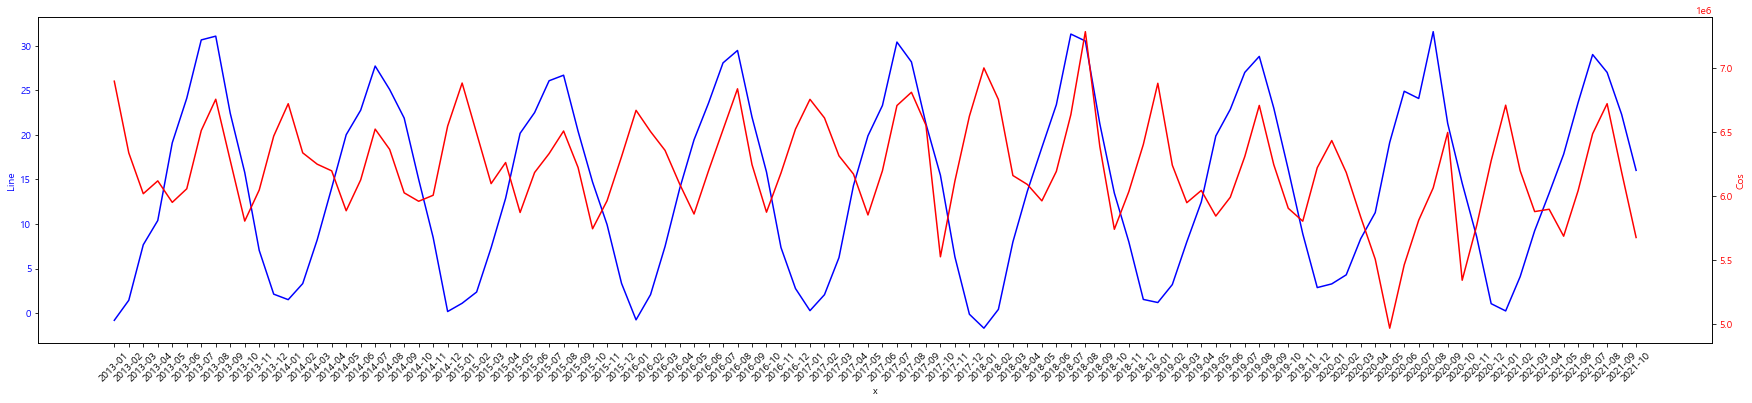

In [61]:
y1 = list(df_all['elecusage'])
y2 = list(df_all['HI'])
x = list(df_all['date'])

fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
plt.xticks(rotation=45)
 
color1 = 'b'
ax1.plot(x, y2, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(x, y1, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

* 전체 추세의 상관관계 분석

In [62]:
df_all_corr = df_all.corr()

df_all_corr

year     month        HI  elecusage  type_ratio
year        1.000000 -0.044222  0.039831  -0.196738    0.047798
month      -0.044222  1.000000  0.270377  -0.189236    0.464360
HI          0.039831  0.270377  1.000000  -0.091972    0.843868
elecusage  -0.196738 -0.189236 -0.091972   1.000000   -0.178422
type_ratio  0.047798  0.464360  0.843868  -0.178422    1.000000

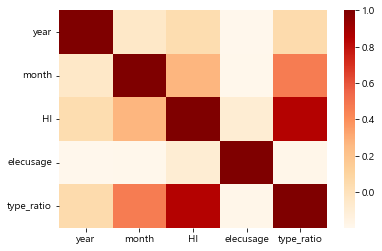

In [63]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(df_all_corr, cmap='OrRd')
plt.show()

# 열지수와 전력 사용량의 유의미한 상관관계를 관찰하기 어렵다.

### **5,6,7,8,9월의 전체 추세 그래프**

In [64]:
# 열지수와 전력 사용량만 있는 df_all 테이블에서 5,6,7,8,9월 기간만 다른 테이블으로 분리
df_summer = df_all[(df_all['month'] > 4) & (df_all['month'] < 10)]

df_summer

date    year  month         HI     elecusage  type_ratio
4    2013-05  2013.0    5.0  19.112189  5.949231e+06   55.643087
5    2013-06  2013.0    6.0  24.116313  6.055299e+06   57.055453
6    2013-07  2013.0    7.0  30.656301  6.510325e+06   57.567366
7    2013-08  2013.0    8.0  31.079638  6.754776e+06   56.920162
8    2013-09  2013.0    9.0  22.425981  6.276699e+06   56.894666
16   2014-05  2014.0    5.0  20.015459  5.883720e+06   56.522796
17   2014-06  2014.0    6.0  22.773004  6.124807e+06   57.515984
18   2014-07  2014.0    7.0  27.726040  6.521361e+06   58.109226
19   2014-08  2014.0    8.0  25.088558  6.362734e+06   57.636200
20   2014-09  2014.0    9.0  21.891071  6.023793e+06   57.850256
28   2015-05  2015.0    5.0  20.180682  5.870187e+06   56.627210
29   2015-06  2015.0    6.0  22.506339  6.182498e+06   57.646776
30   2015-07  2015.0    7.0  26.074811  6.329988e+06   58.077302
31   2015-08  2015.0    8.0  26.697965  6.506589e+06   57.312032
32   2015-09  2015.0    9.0  20.406606  6.221483e+06   57.689221
40   2016-05  2016.0    5.0  19.451292  5.858162e+06   56.720238
41   2016-06  2016.0    6.0  23.568205  6.195810e+06   57.602190
42   2016-07  2016.0    7.0  28.080873  6.516686e+06   57.960579
43   2016-08  2016.0    8.0  29.474425  6.836349e+06   57.084878
44   2016-09  2016.0    9.0  21.996330  6.244128e+06   57.157569
52   2017-05  2017.0    5.0  19.896799  5.850820e+06   57.006442
53   2017-06  2017.0    6.0  23.302314  6.196470e+06   57.648280
54   2017-07  2017.0    7.0  30.417318  6.705551e+06   57.625588
55   2017-08  2017.0    8.0  28.188921  6.809073e+06   57.147994
56   2017-09  2017.0    9.0  21.254651  6.552165e+06   57.645995
64   2018-05  2018.0    5.0  18.586512  5.960968e+06   57.060515
65   2018-06  2018.0    6.0  23.394152  6.191548e+06   57.567648
66   2018-07  2018.0    7.0  31.314281  6.634483e+06   57.672681
67   2018-08  2018.0    8.0  30.534243  7.282573e+06   56.671068
68   2018-09  2018.0    9.0  21.225986  6.384368e+06   57.104613
76   2019-05  2019.0    5.0  19.878361  5.842257e+06   56.711554
77   2019-06  2019.0    6.0  22.868446  5.989107e+06   57.416672
78   2019-07  2019.0    7.0  27.012272  6.307054e+06   57.664678
79   2019-08  2019.0    8.0  28.808285  6.706453e+06   56.596922
80   2019-09  2019.0    9.0  23.015691  6.243810e+06   56.650223
88   2020-05  2020.0    5.0  19.162213  4.966357e+06   56.139584
89   2020-06  2020.0    6.0  24.897390  5.460698e+06   56.740038
90   2020-07  2020.0    7.0  24.086006  5.809491e+06   56.914938
91   2020-08  2020.0    8.0  31.582645  6.062087e+06   56.454546
92   2020-09  2020.0    9.0  21.290180  6.495490e+06   56.239715
100  2021-05  2021.0    5.0  17.829352  5.684952e+06   56.617954
101  2021-06  2021.0    6.0  23.635506  6.041135e+06   57.007950
102  2021-07  2021.0    7.0  29.014857  6.485151e+06   57.086493
103  2021-08  2021.0    8.0  27.012739  6.720005e+06   56.416858
104  2021-09  2021.0    9.0  22.305746  6.185716e+06   56.554202

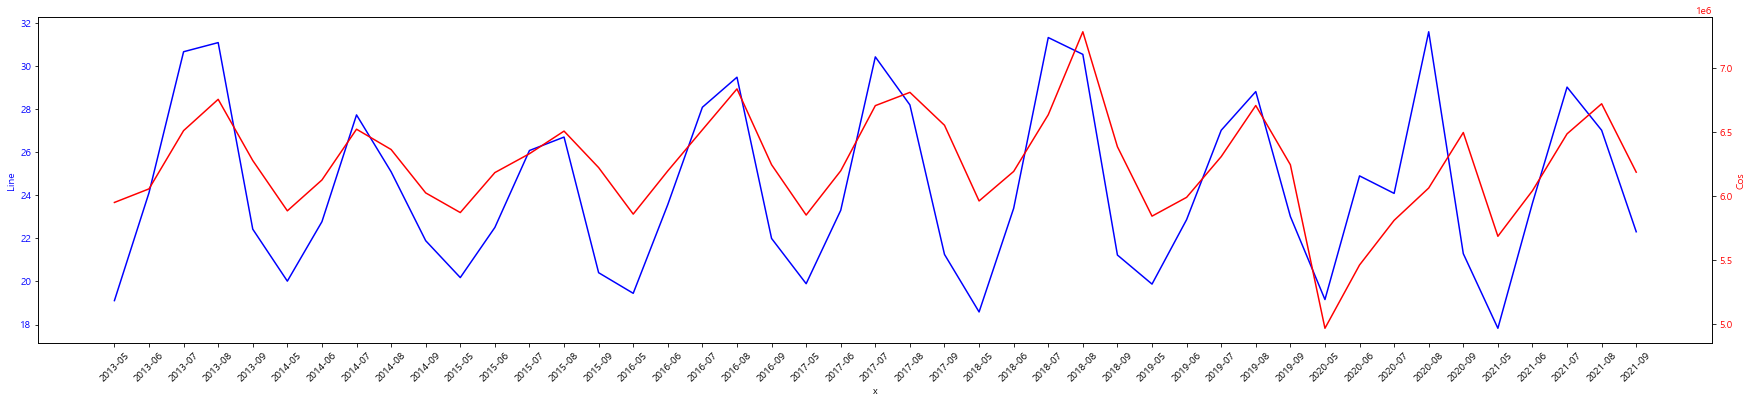

In [65]:
y1 = list(df_summer['elecusage'])
y2 = list(df_summer['HI'])
x = list(df_summer['date'])

fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
plt.xticks(rotation=45)
 
color1 = 'b'
ax1.plot(x, y2, color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('Line', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(x, y1, color=color2)
ax2.set_ylabel('Cos', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

* 5,6,7,8,9월의 전체 상관관계 분석

In [66]:
df_summer_corr = df_summer.corr()

df_summer_corr

year         month        HI  elecusage  type_ratio
year        1.000000e+00  6.551201e-15 -0.012835  -0.156865   -0.344842
month       6.551201e-15  1.000000e+00  0.361974   0.591315    0.157080
HI         -1.283530e-02  3.619738e-01  1.000000   0.695558    0.284978
elecusage  -1.568646e-01  5.913147e-01  0.695558   1.000000    0.300164
type_ratio -3.448425e-01  1.570804e-01  0.284978   0.300164    1.000000

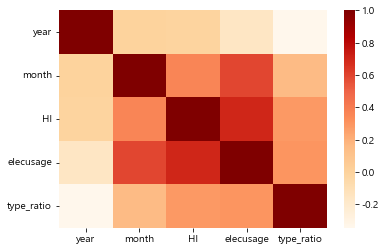

In [67]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(df_summer_corr, cmap='OrRd')
plt.show()

# 열지수와 전력 사용량의 상관관계가 0.70 정도로 유의미하다

### **특정 동을 관찰하기 위한 그래프**

In [68]:
# join한 원본 테이블에서 unique한 region 확인 후 리스트에 저장
regions = df_join['region'].unique()

print(regions)

print('\n region의 수 :', len(regions))

['가창면' '감삼동' '검단동' '고산1동' '고산2동' '고산3동' '고성동' '공산동' '관문동' '관음동' '구암동'
 '구지면' '국우동' '남산1동' '남산2동' '남산3동' '남산4동' '내당1동' '내당2.3동' '내당4동' '노원동'
 '논공읍' '다사읍' '대명10동' '대명11동' '대명1동' '대명2동' '대명3동' '대명4동' '대명5동' '대명6동'
 '대명9동' '대봉1동' '대봉2동' '대신동' '대현동' '도원동' '도평동' '동인동' '동촌동' '두류1.2동' '두류3동'
 '두산동' '만촌1동' '만촌2동' '만촌3동' '무태조야동' '방촌동' '범물1동' '범물2동' '범어1동' '범어2동'
 '범어3동' '범어4동' '복현1동' '복현2동' '본동' '본리동' '봉덕1동' '봉덕2동' '봉덕3동' '불로.봉무동'
 '비산1동' '비산2.3동' '비산4동' '비산5동' '비산6동' '비산7동' '산격1동' '산격2동' '산격3동' '산격4동'
 '삼덕동' '상동' '상인1동' '상인2동' '상인3동' '상중이동' '성내동' '성당동' '송현1동' '송현2동' '수성1가동'
 '수성2.3가동' '수성4가동' '신당동' '신암1동' '신암2동' '신암3동' '신암4동' '신암5동' '신천1.2동'
 '신천3동' '신천4동' '안심1동' '안심2동' '안심3.4동' '안심3동' '안심4동' '옥포읍' '용산동' '원대동'
 '월성1동' '월성2동' '유가읍' '이곡동' '이천동' '장기동' '죽전동' '중동' '지산1동' '지산2동' '지저동'
 '진천동' '칠성동' '침산1동' '침산2동' '침산3동' '태전1동' '파동' '평리1동' '평리2동' '평리3동' '평리4동'
 '평리5동' '평리6동' '하빈면' '해안동' '현풍읍' '화원읍' '황금1동' '황금2동' '효목1동' '효목2동']

 region의 수 : 134


134개를 다 보기엔 힘드므로 랜덤으로 10개를 추출해서 그래프 확인

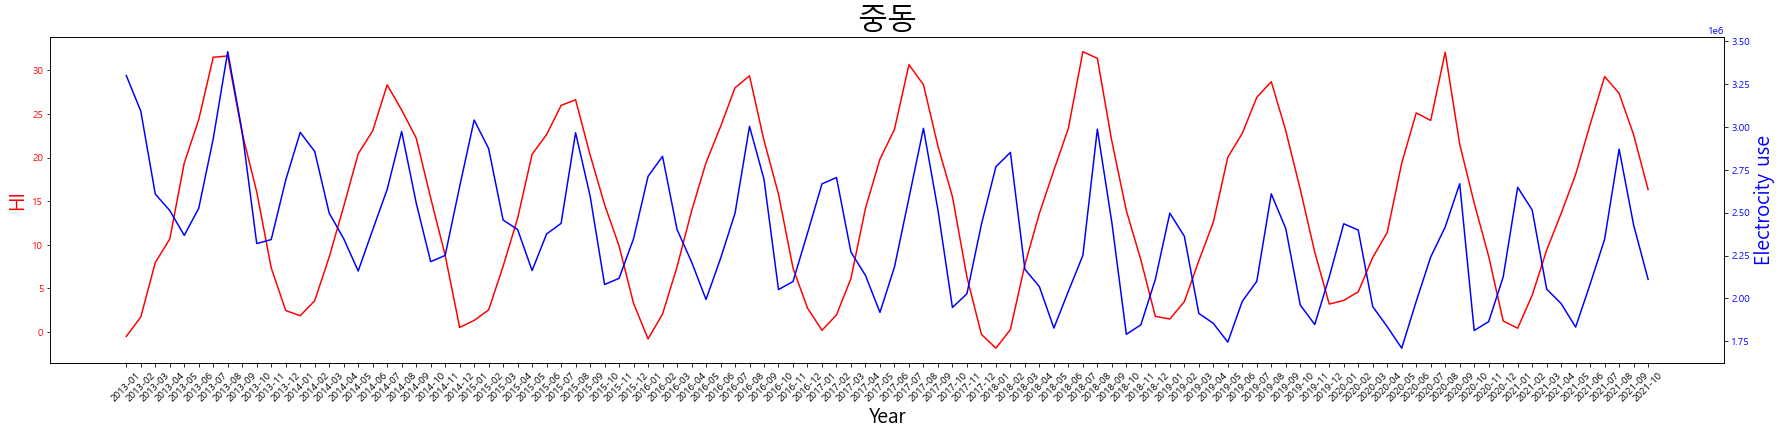

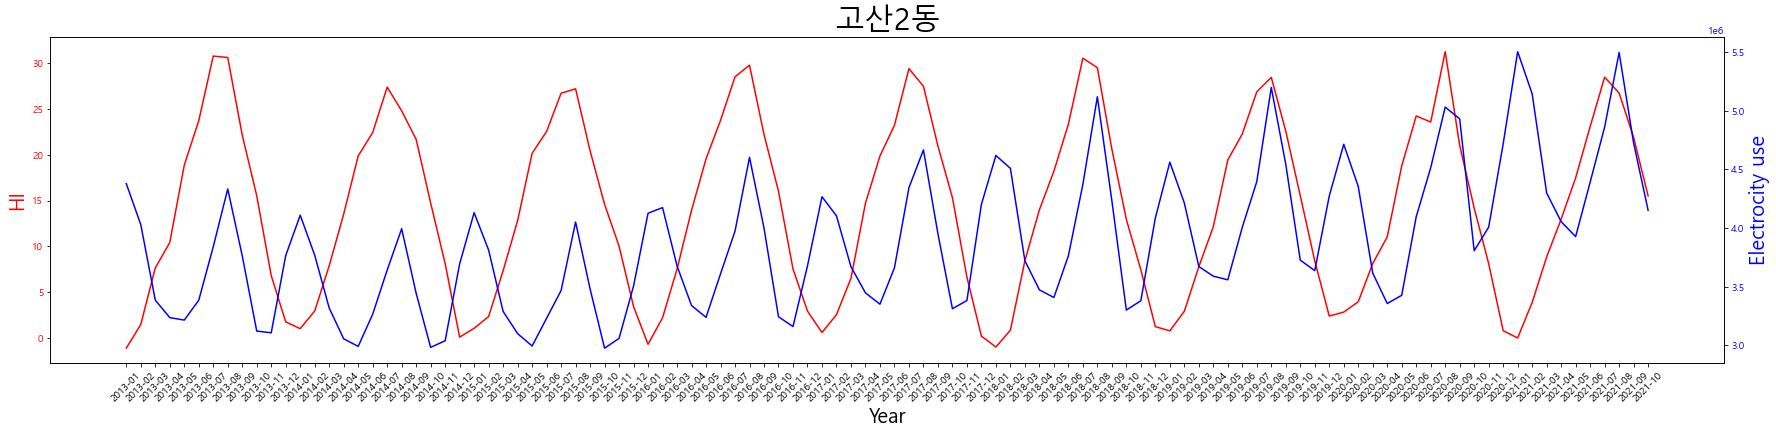

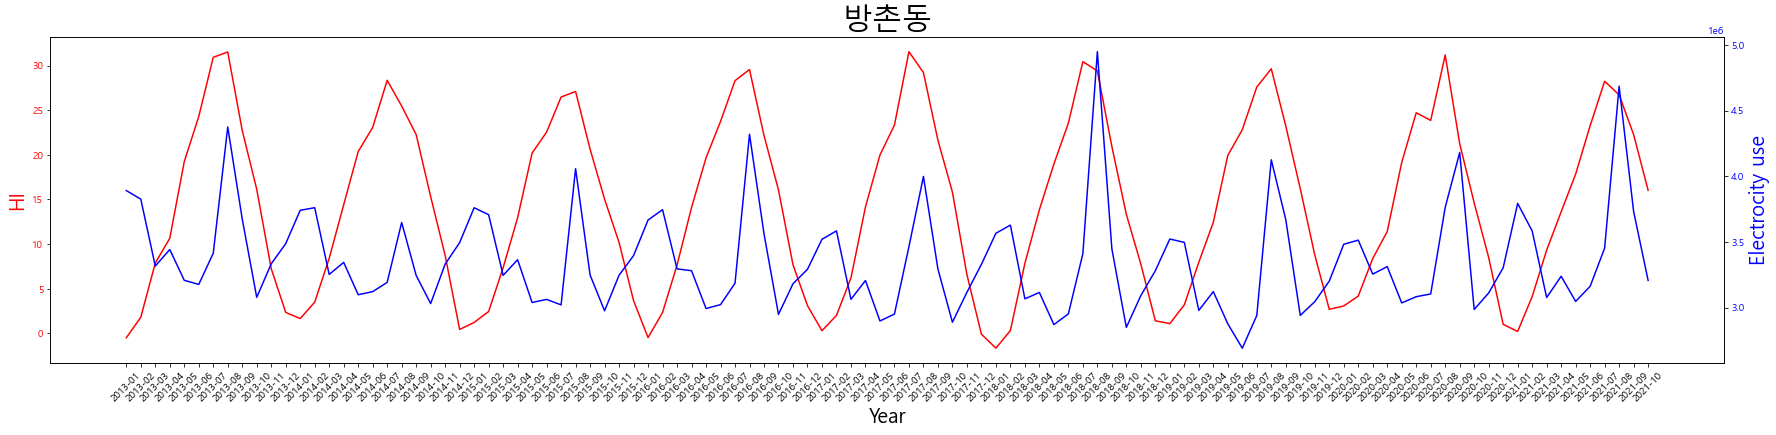

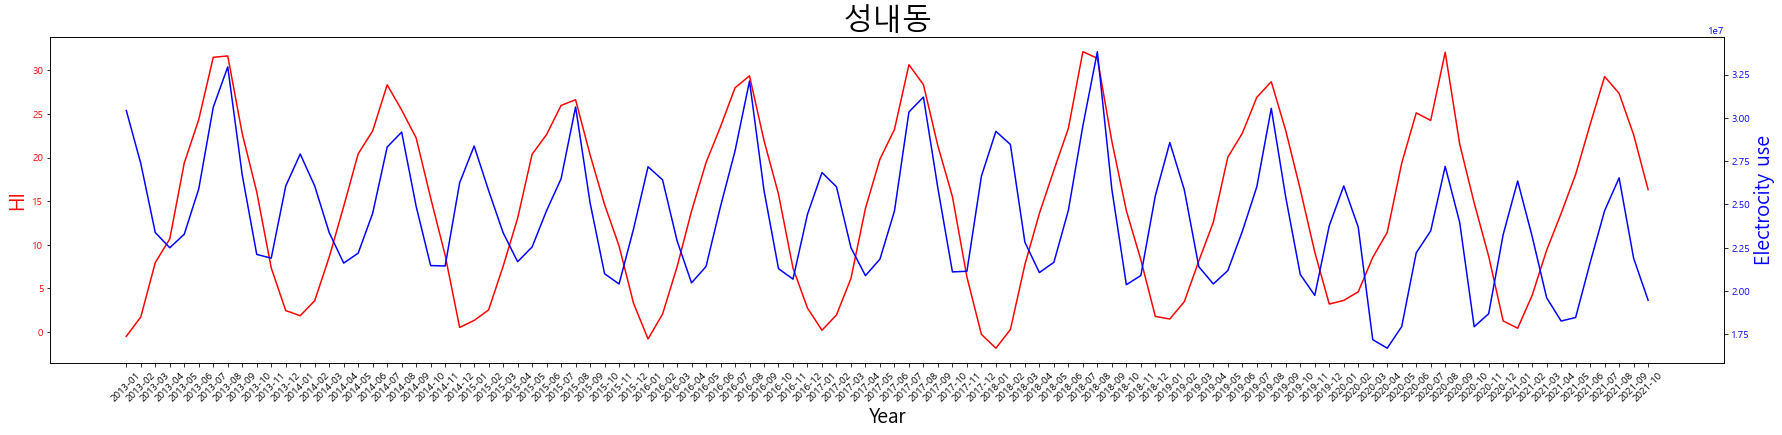

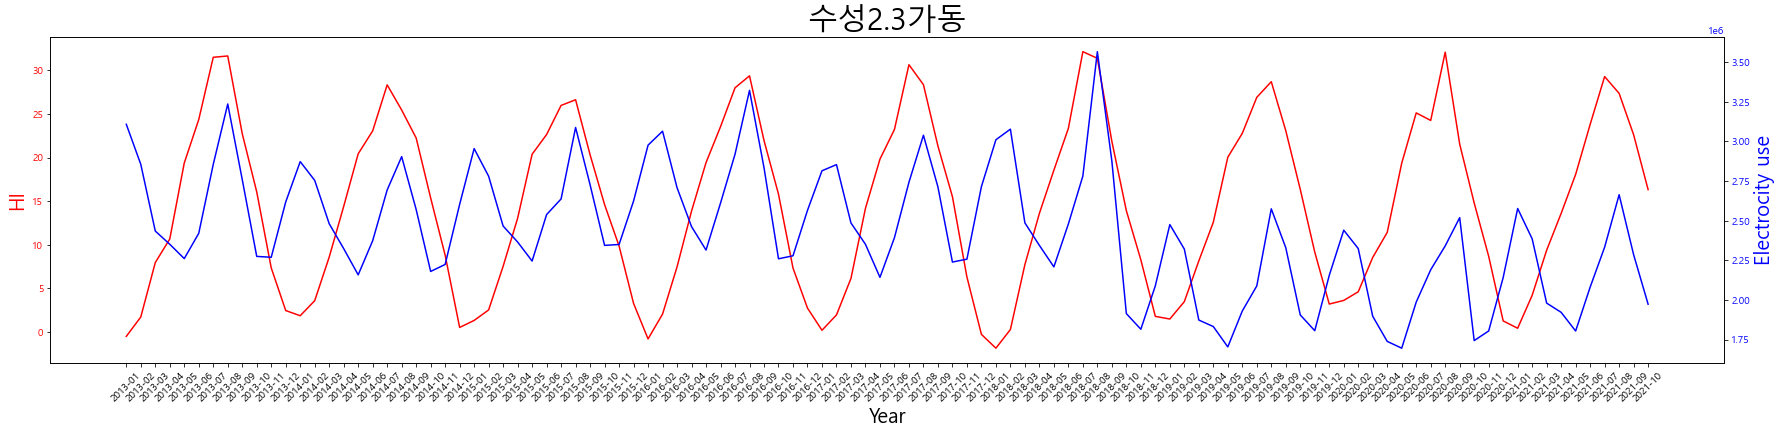

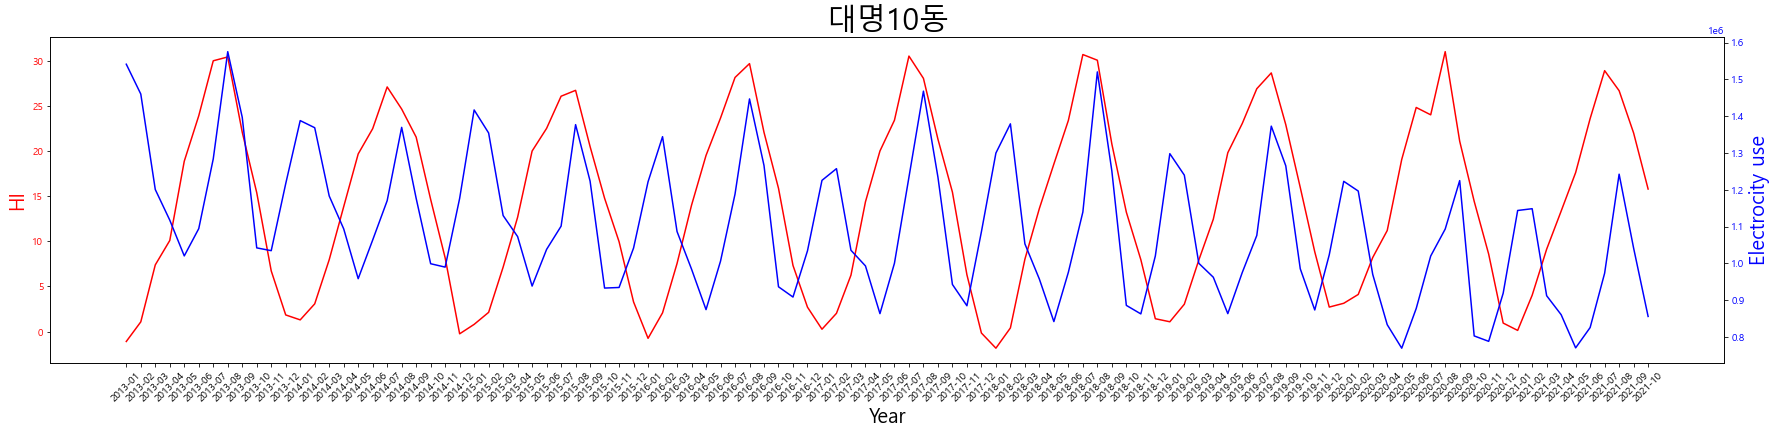

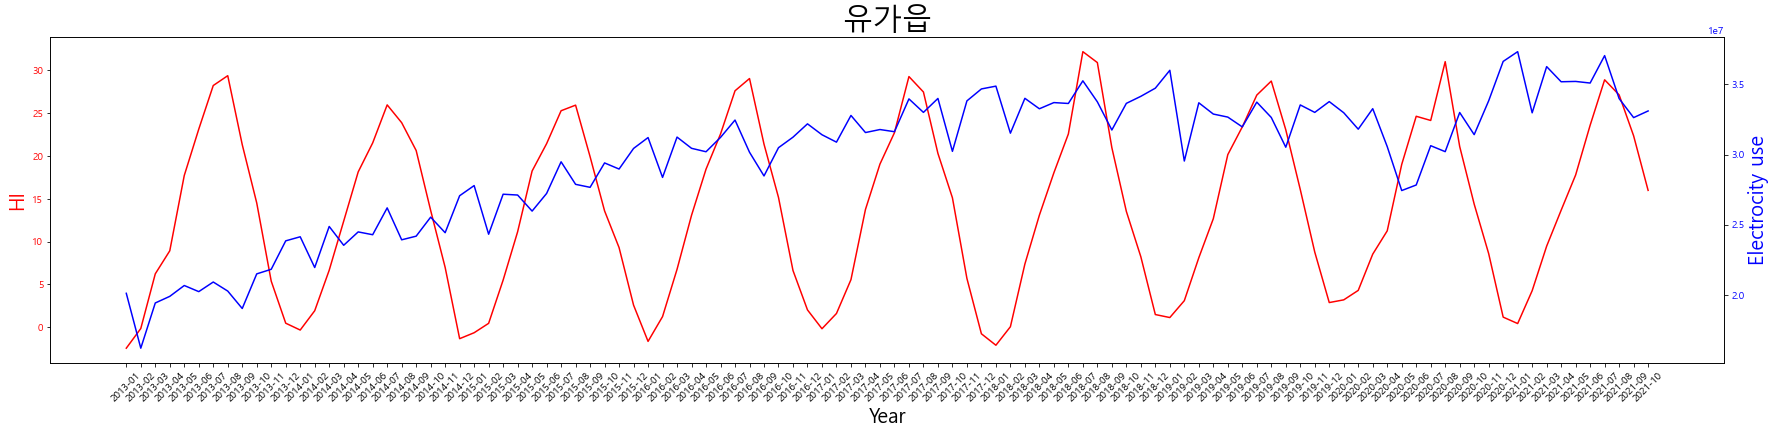

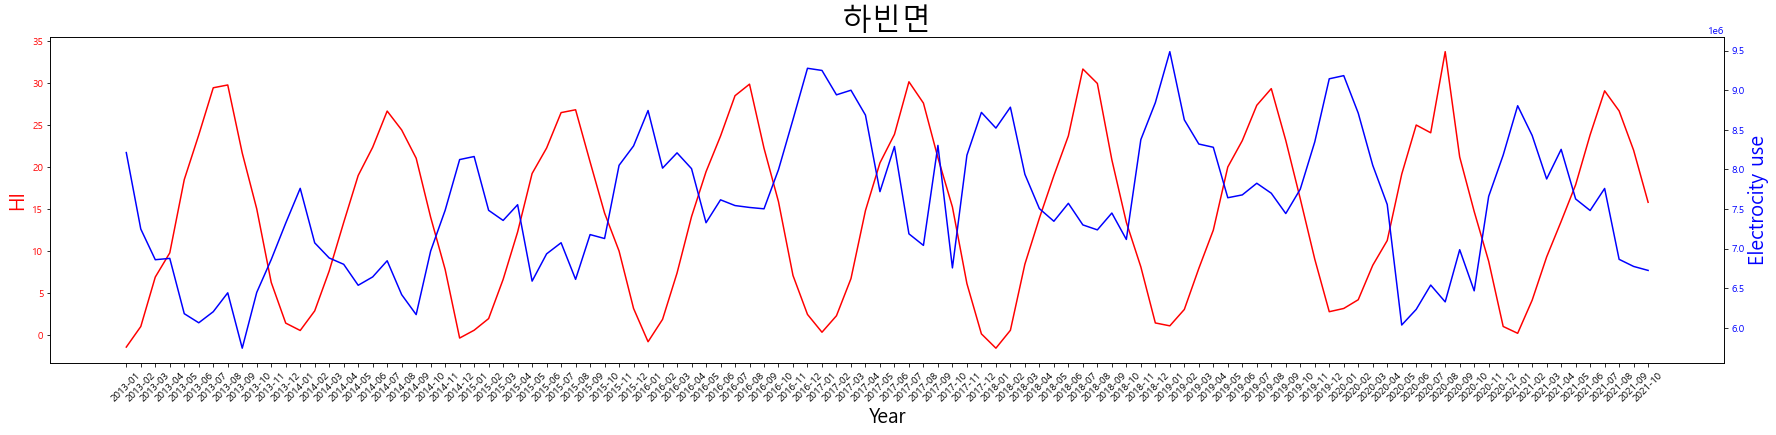

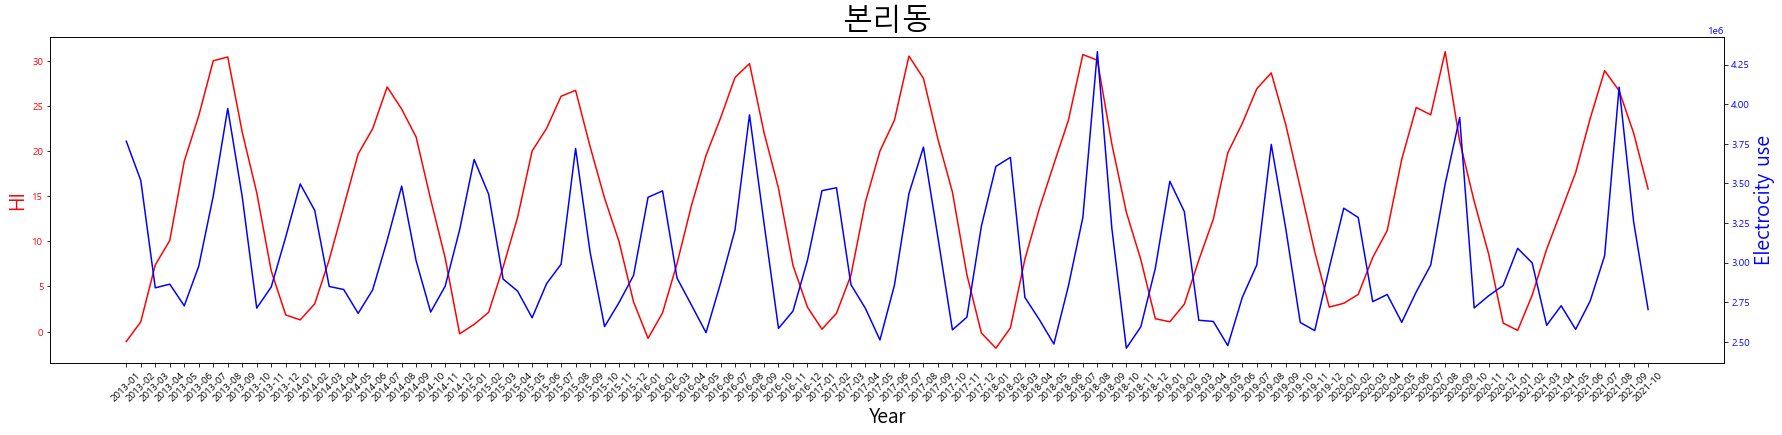

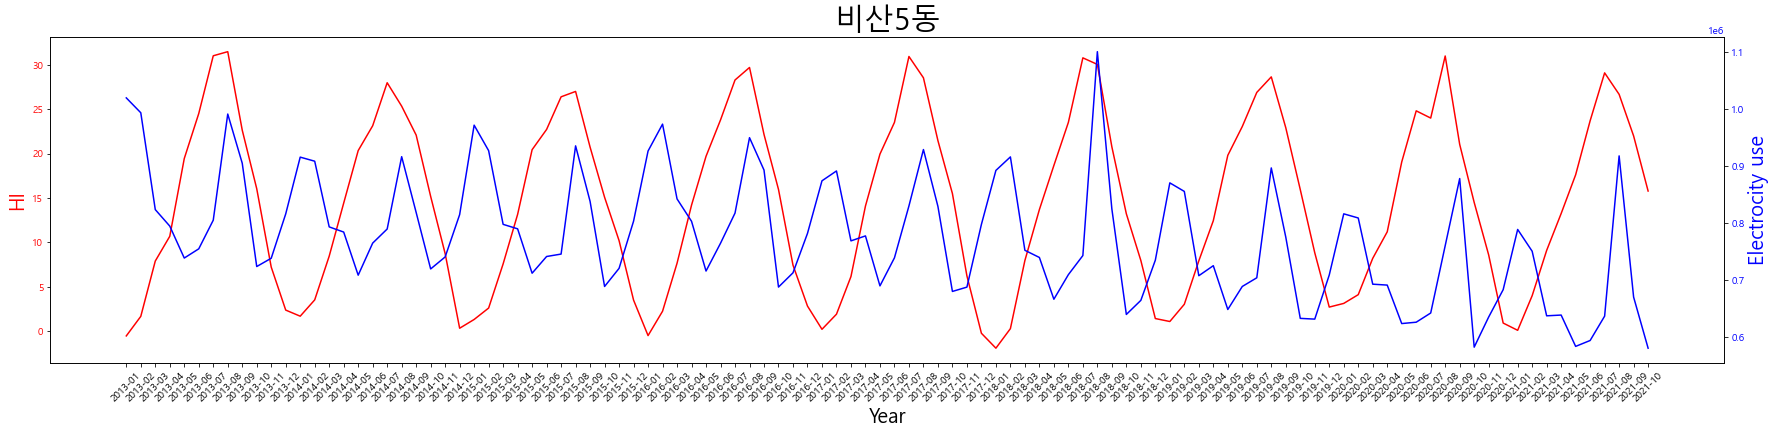

In [69]:
random.shuffle(regions) # unique한 region 리스트에서 랜덤으로 10개 추출

for i in range(10):

    y1 = list(df_join.loc[df_join['region'] == regions[i], 'elecusage'])
    y2 = list(df_join.loc[df_join['region'] == regions[i], 'HI'])
    x = list(df_join.loc[df_join['region'] == regions[i], 'date'])

    fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=45)
    
    color1 = 'r'
    ax1.plot(x, y2, color=color1)
    ax1.set_xlabel('Year', fontsize = 20)
    ax1.set_ylabel('HI', color=color1, fontsize = 20)
    ax1.set_title(regions[i], fontsize = 30)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    color2 = 'b'
    ax2 = ax1.twinx()
    ax2.plot(x, y1, color=color2)
    ax2.set_ylabel('Electrocity use', color=color2, fontsize = 20)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.show()

----
그래프가 행정구역별로 상이해 특정 패턴을 발견하기 힘들다

### **지역용도별로 열지수와 전력 사용량의 관계 그래프**  
  
전체 기간

In [70]:
# 지역용도가 포함된 테이블이 필요하기 때문에 join했던 원본 테이블을 지역용도를 기준으로 groupby
df_type = df_join.groupby(['type','year','month','date']).mean().reset_index()

df_type

type  year  month     date         HI     elecusage  type_ratio
0    교육용  2013      1  2013-01  -0.256282  5.074385e+06   47.145143
1    교육용  2013      2  2013-02   1.977468  4.536513e+06   45.501293
2    교육용  2013      3  2013-03   8.244469  3.522628e+06   44.424844
3    교육용  2013      4  2013-04  10.932059  3.802360e+06   46.805334
4    교육용  2013      5  2013-05  19.709338  3.400621e+06   46.447047
..   ...   ...    ...      ...        ...           ...         ...
333  주택용  2021      6  2021-06  23.634897  2.320325e+06   50.898135
334  주택용  2021      7  2021-07  28.997015  2.600523e+06   51.640871
335  주택용  2021      8  2021-08  26.987247  3.429251e+06   52.903156
336  주택용  2021      9  2021-09  22.287274  2.740310e+06   51.252698
337  주택용  2021     10  2021-10  15.987029  2.291655e+06   51.142180

[338 rows x 7 columns]

In [71]:
# unique한 타입 확인 후 리스트에 저장
types = list(df_join['type'].unique())

types

['산업용', '일반용', '주택용', '교육용']

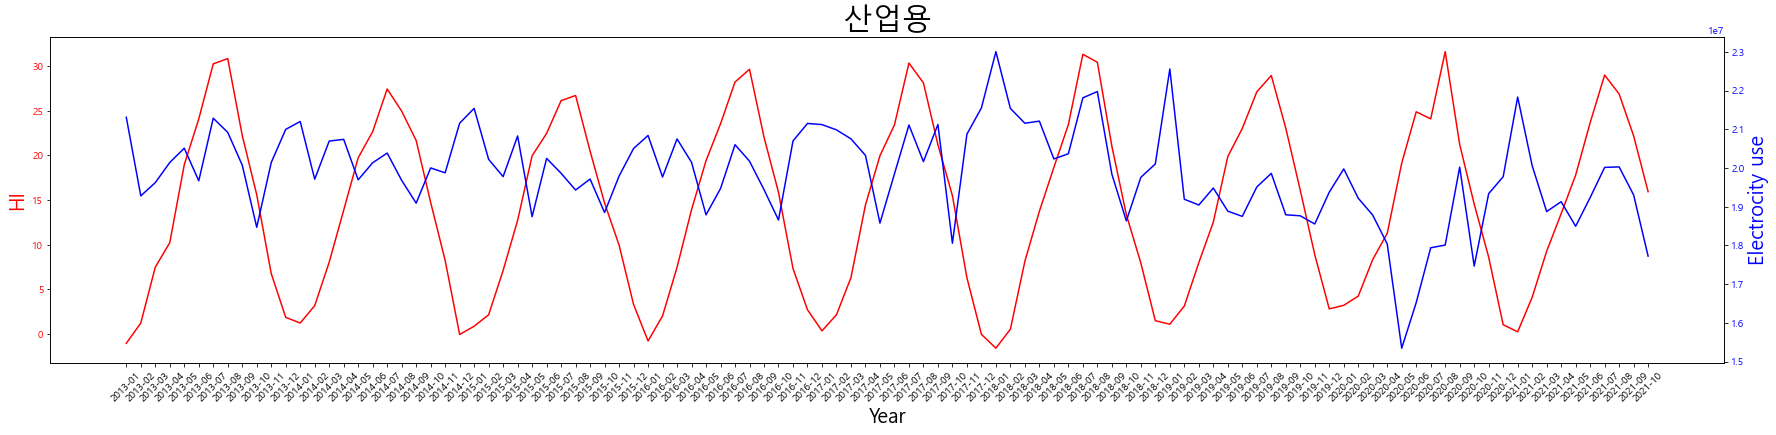

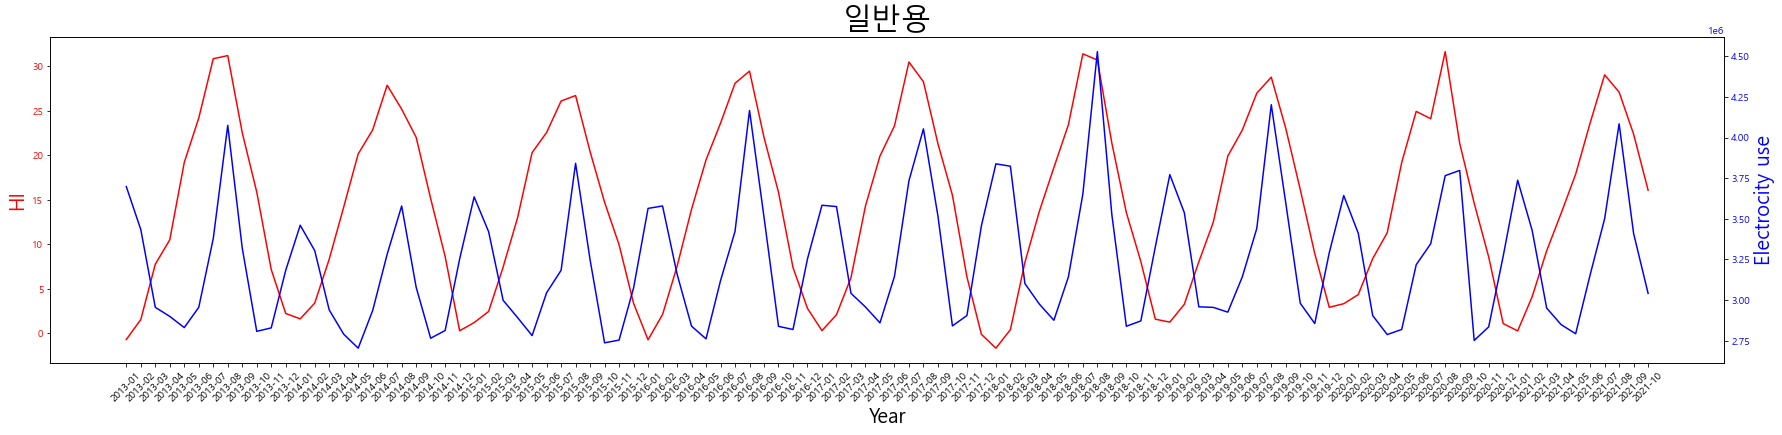

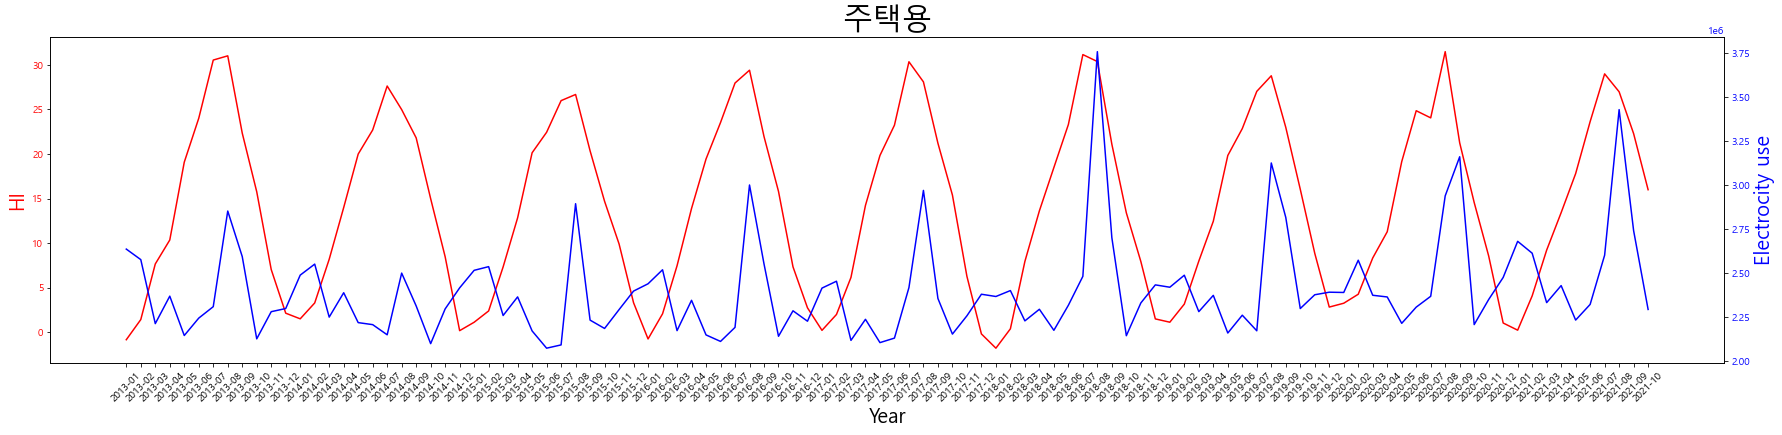

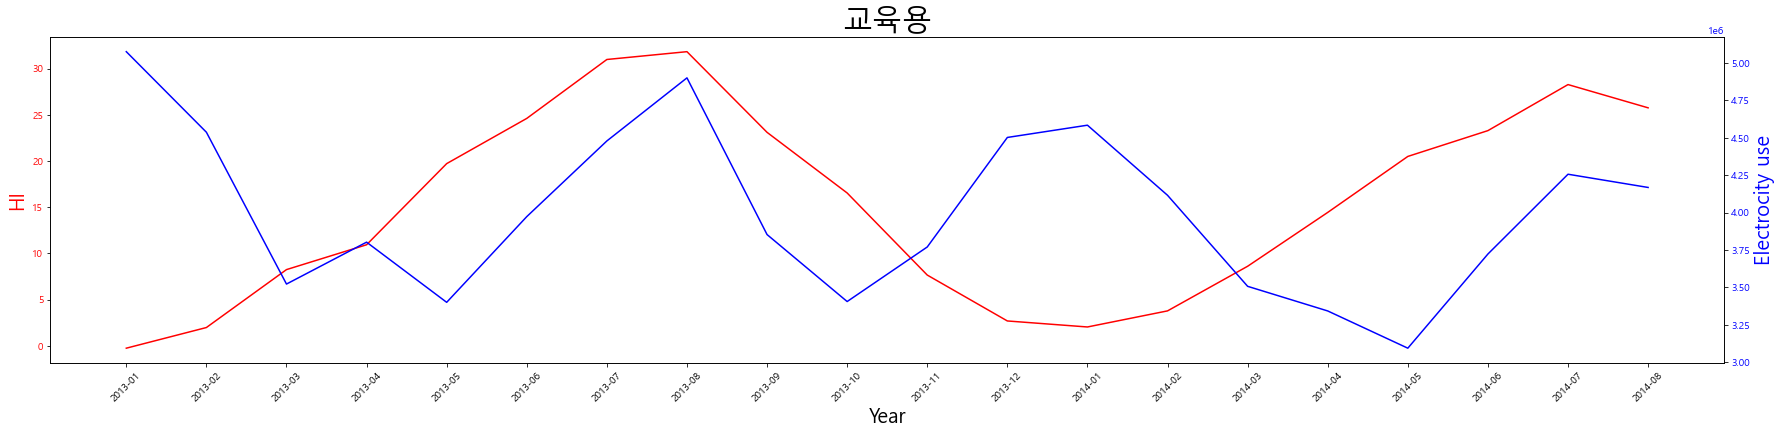

In [72]:
for i in range(len(types)):

    y1 = list(df_type.loc[df_type['type'] == types[i], 'elecusage'])
    y2 = list(df_type.loc[df_type['type'] == types[i], 'HI'])
    x = list(df_type.loc[df_type['type'] == types[i], 'date'])

    fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=45)
    
    color1 = 'r'
    ax1.plot(x, y2, color=color1)
    ax1.set_xlabel('Year', fontsize = 20)
    ax1.set_ylabel('HI', color=color1, fontsize = 20)
    ax1.set_title(types[i], fontsize = 30)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    color2 = 'b'
    ax2 = ax1.twinx()
    ax2.plot(x, y1, color=color2)
    ax2.set_ylabel('Electrocity use', color=color2, fontsize = 20)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.show()

### **지역용도별 5,6,7,8,9월 그래프**

In [73]:
# 지역용도별 데이터의 5,6,7,8,9월만 다른 테이블에 저장
df_type_summer = df_type[(df_type['month'] > 4) & (df_type['month'] < 10)]

df_type_summer

type  year  month     date         HI     elecusage  type_ratio
4    교육용  2013      5  2013-05  19.709338  3.400621e+06   46.447047
5    교육용  2013      6  2013-06  24.601262  3.972934e+06   49.703619
6    교육용  2013      7  2013-07  30.974885  4.478229e+06   50.213790
7    교육용  2013      8  2013-08  31.820490  4.899448e+06   48.180841
8    교육용  2013      9  2013-09  23.093166  3.853090e+06   45.100881
..   ...   ...    ...      ...        ...           ...         ...
332  주택용  2021      5  2021-05  17.795659  2.231171e+06   51.767838
333  주택용  2021      6  2021-06  23.634897  2.320325e+06   50.898135
334  주택용  2021      7  2021-07  28.997015  2.600523e+06   51.640871
335  주택용  2021      8  2021-08  26.987247  3.429251e+06   52.903156
336  주택용  2021      9  2021-09  22.287274  2.740310e+06   51.252698

[144 rows x 7 columns]

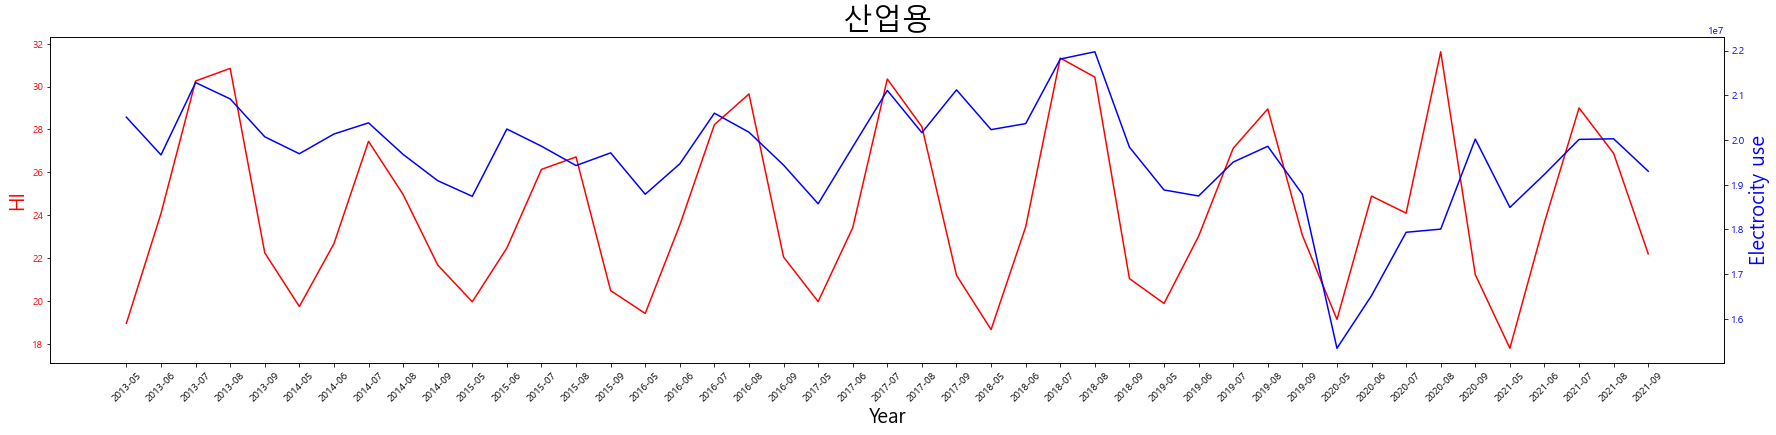

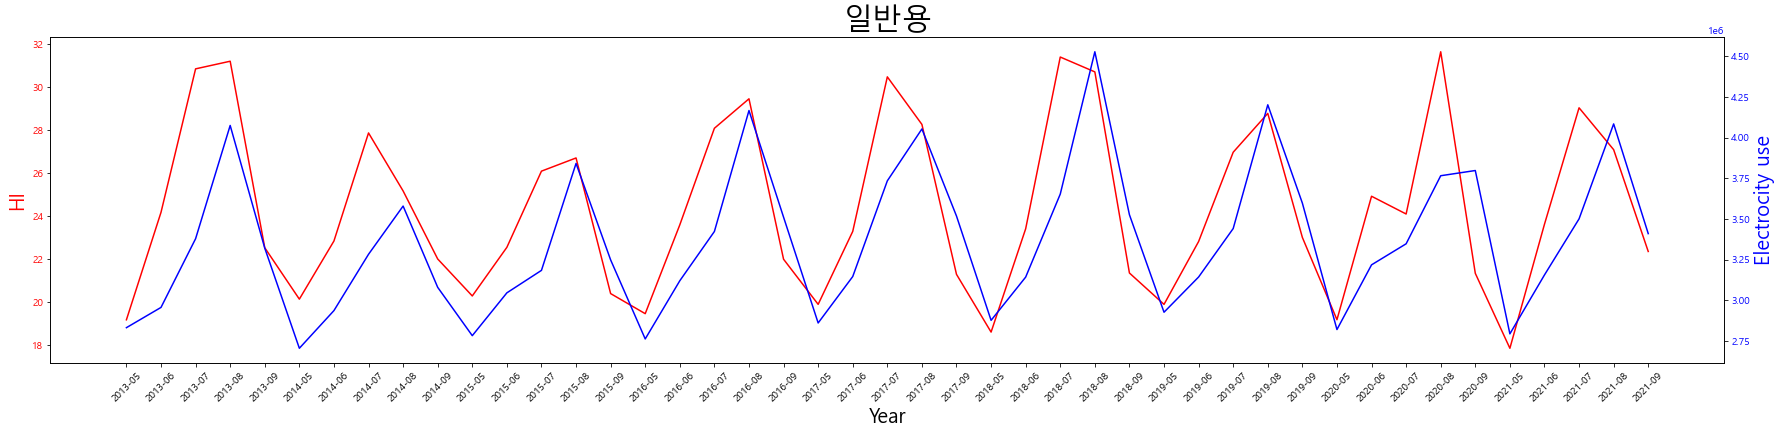

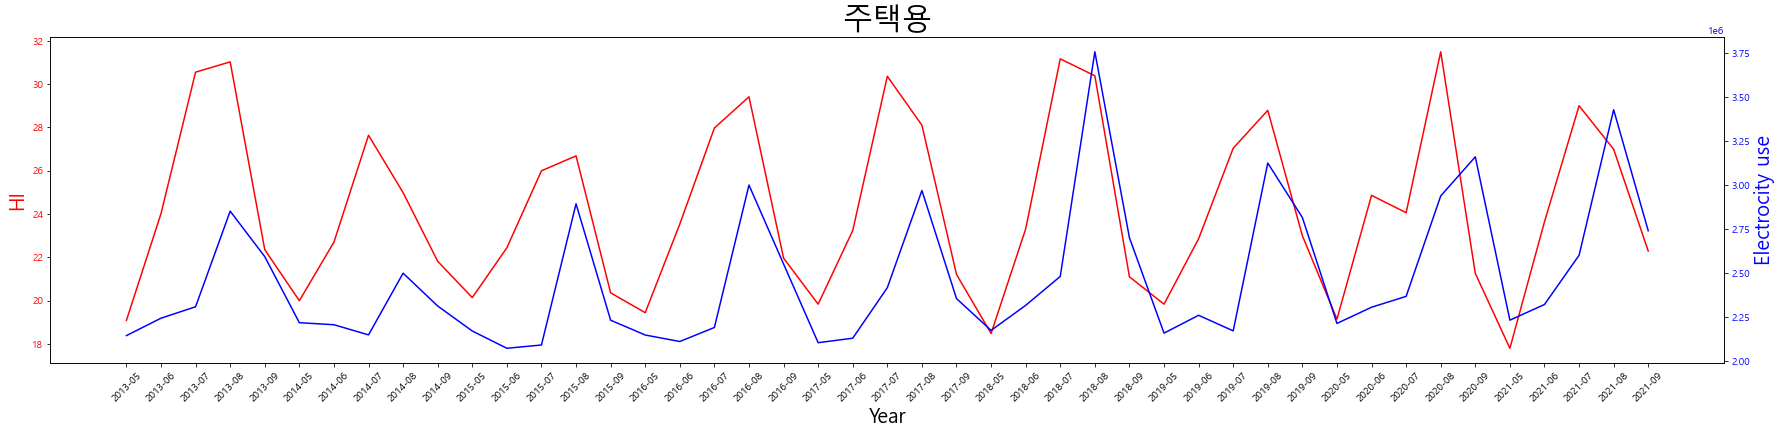

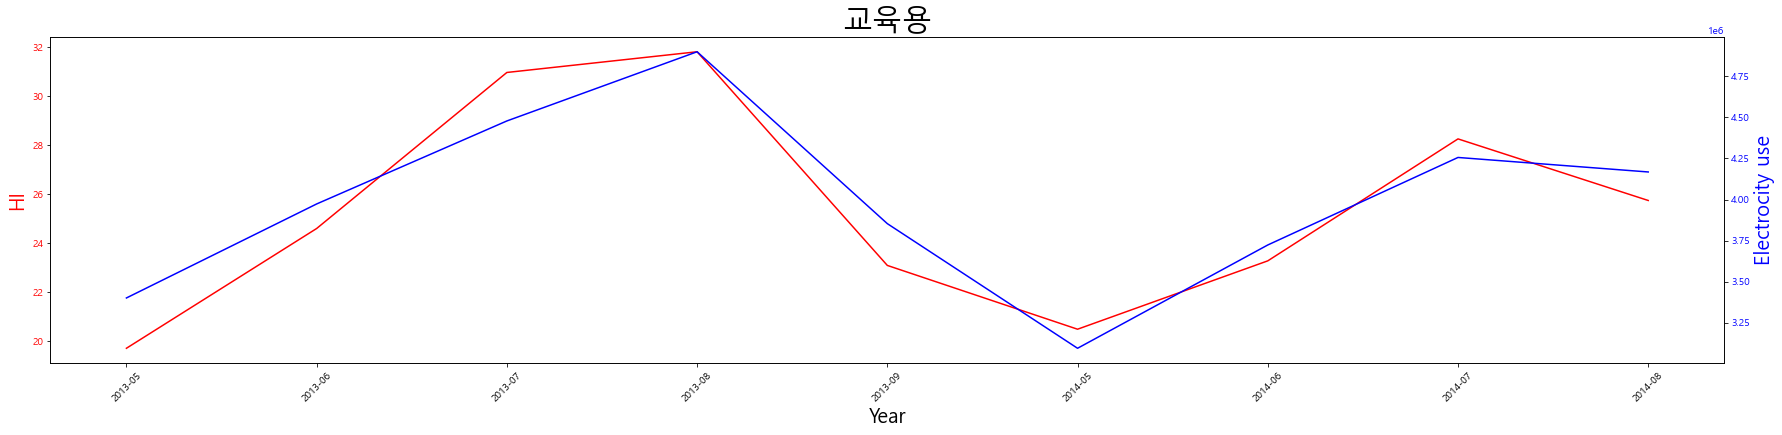

In [74]:
for i in range(len(types)):

    y1 = list(df_type_summer.loc[df_type_summer['type'] == types[i], 'elecusage'])
    y2 = list(df_type_summer.loc[df_type_summer['type'] == types[i], 'HI'])
    x = list(df_type_summer.loc[df_type_summer['type'] == types[i], 'date'])

    fig = plt.figure(figsize=(30,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=45)
    
    color1 = 'r'
    ax1.plot(x, y2, color=color1)
    ax1.set_xlabel('Year', fontsize = 20)
    ax1.set_ylabel('HI', color=color1, fontsize = 20)
    ax1.set_title(types[i], fontsize = 30)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    color2 = 'b'
    ax2 = ax1.twinx()
    ax2.plot(x, y1, color=color2)
    ax2.set_ylabel('Electrocity use', color=color2, fontsize = 20)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.show()

* 상관관계 분석

                    year         month        HI  elecusage  type_ratio
year        1.000000e+00  6.551201e-15  0.001319  -0.385635   -0.830264
month       6.551201e-15  1.000000e+00  0.359594   0.292236   -0.341041
HI          1.318955e-03  3.595943e-01  1.000000   0.422598   -0.259661
elecusage  -3.856352e-01  2.922363e-01  0.422598   1.000000    0.310228
type_ratio -8.302636e-01 -3.410405e-01 -0.259661   0.310228    1.000000


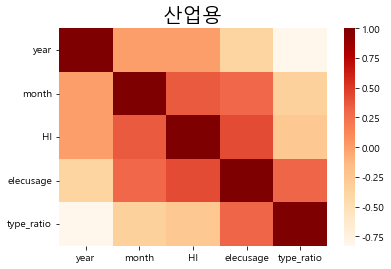

------------------------------------------------------------------------------------------------------------------------------------------------------
                    year         month        HI  elecusage  type_ratio
year        1.000000e+00  6.551201e-15 -0.018806   0.171202    0.341599
month       6.551201e-15  1.000000e+00  0.362887   0.701978    0.524047
HI         -1.880608e-02  3.628871e-01  1.000000   0.746695    0.479210
elecusage   1.712021e-01  7.019783e-01  0.746695   1.000000    0.474248
type_ratio  3.415993e-01  5.240474e-01  0.479210   0.474248    1.000000


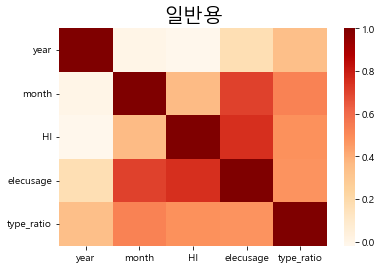

------------------------------------------------------------------------------------------------------------------------------------------------------
                    year         month        HI  elecusage  type_ratio
year        1.000000e+00  6.551201e-15 -0.009512   0.289313    0.318870
month       6.551201e-15  1.000000e+00  0.361690   0.616602    0.266108
HI         -9.512244e-03  3.616898e-01  1.000000   0.489122    0.302354
elecusage   2.893132e-01  6.166025e-01  0.489122   1.000000    0.661982
type_ratio  3.188695e-01  2.661083e-01  0.302354   0.661982    1.000000


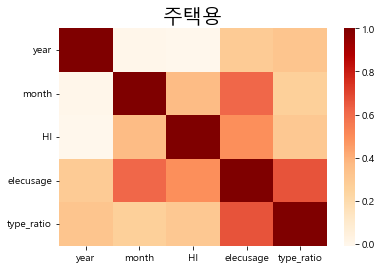

------------------------------------------------------------------------------------------------------------------------------------------------------
                year     month        HI  elecusage  type_ratio
year        1.000000 -0.188982 -0.195898  -0.298385   -0.023929
month      -0.188982  1.000000  0.545618   0.662328   -0.061795
HI         -0.195898  0.545618  1.000000   0.956646    0.658770
elecusage  -0.298385  0.662328  0.956646   1.000000    0.569897
type_ratio -0.023929 -0.061795  0.658770   0.569897    1.000000


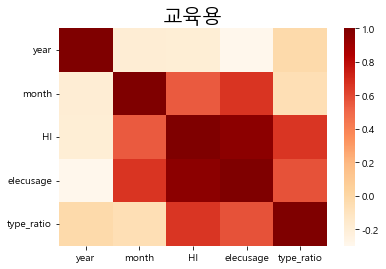

------------------------------------------------------------------------------------------------------------------------------------------------------


In [75]:
for i in range(len(types)):
    df_type_temp = df_type_summer[df_type_summer['type'] == types[i]]

    df_type_temp_corr = df_type_temp.corr()
    
    print(df_type_temp_corr)
    
    matplotlib.rcParams['axes.unicode_minus'] = False
    sns.heatmap(df_type_temp_corr, cmap='OrRd')

    plt.title(types[i], fontsize = 20)
    plt.show()

    print('-----'*30)

---
열지수와 전력 사용량의 가장 큰 상관관계가 나타나는 지역용도는 '교육용'이다

In [76]:
print('산업용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '산업용']))
print('일반용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '일반용']))
print('주택용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '주택용']))
print('교육용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '교육용']))

산업용으로 분류된 경우 수 :  2707
일반용으로 분류된 경우 수 :  7257
주택용으로 분류된 경우 수 :  4024
교육용으로 분류된 경우 수 :  20


그러나 교육용으로 분류된 경우가 극히 소수이므로 편향된 결과일 수 있다.

### **열지수 상위 100개의 경우 지역용도의 분포**

In [77]:
df_top_HI = df_join.sort_values(by='HI', ascending=False).head(100)

df_top_HI

region  year  month         HI type   elecusage  type_ratio     date
13627    하빈면  2020      8  33.738278  산업용   6325782.0   75.815961  2020-08
2497     다사읍  2020      8  33.738278  산업용  23090062.0   49.454146  2020-08
2386     논공읍  2020      8  32.707299  산업용  78821245.0   90.744583  2020-08
13965    화원읍  2020      8  32.685176  주택용   6052972.0   39.764850  2020-08
10656    옥포읍  2020      8  32.685176  산업용   4484756.0   39.613262  2020-08
...      ...   ...    ...        ...  ...         ...         ...      ...
11985   지산2동  2020      8  32.099886  주택용   1160142.0   57.052975  2020-08
3789     대신동  2020      8  32.099886  일반용   2889088.0   63.362668  2020-08
3571    대봉1동  2020      8  32.099886  일반용   3312349.0   62.096139  2020-08
6501    봉덕2동  2020      8  32.099886  주택용   1020646.0   56.011590  2020-08
11767     중동  2020      8  32.099886  일반용   2416013.0   55.075351  2020-08

[100 rows x 8 columns]

In [78]:
# 열지수 상위 100개의 경우
print('산업용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '산업용']))
print('일반용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '일반용']))
print('주택용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '주택용']))
print('교육용으로 분류된 경우 수 : ',len(df_top_HI[df_top_HI['type'] == '교육용']))

산업용으로 분류된 경우 수 :  17
일반용으로 분류된 경우 수 :  60
주택용으로 분류된 경우 수 :  23
교육용으로 분류된 경우 수 :  0


---
열지수 상위 100개의 경우 '일반용' 지역이 가장 많다.

In [79]:
# 전체의 경우
print('산업용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '산업용']))
print('일반용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '일반용']))
print('주택용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '주택용']))
print('교육용으로 분류된 경우 수 : ',len(df_join[df_join['type'] == '교육용']))

산업용으로 분류된 경우 수 :  2707
일반용으로 분류된 경우 수 :  7257
주택용으로 분류된 경우 수 :  4024
교육용으로 분류된 경우 수 :  20


---
그러나 전체 데이터의 경우에도 '일반용' 지역이 가장 많다.

### 2. 결론

**용도별 지역분류 중 '일반용'이 가장 많으며 열지수 상위 100개의 경우도 '일반용' 지역이 다른 용도보다 많다.**   


**5,6,7,8,9월의 경우 전력사용량과 열지수가 높은 상관관계를 보인다.** 
* 0.422598 산업용
* 0.746695 일반용
* 0.489122 주택용
* 0.956646 교육용    


* 산업용과 주택용의 경우는 일반용과 교육용에 비해 상관관계가 낮다.
* 교육용의 경우 상관관계가 높지만 표본이 20개밖에 되지 않는다.
  
  

**지역 용도에 따른 열지수의 유의미한 차이는 관찰할 수 없다.**

## <hr>

## 4. 바람이 북서풍일때 열지수가 높다.
>###### made by KMJ

#### Period
- 2022.05.19 ~ 2022.05.20

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 시각화 : 북서풍과 남동풍으로 범위를 제한하여 전체 열지수를 시각화

2. 시각화 : 6~9월로 범위를 제한하여 전체 열지수를 시각화

3. 시각화 : 열지수 구성비율로 플롯

4. 결론
</h6></details></h4>

### 0. 필요한 패키지 및 데이터 불러오기

In [16]:
import pandas as pd
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes

In [2]:
# 복사본으로 작업
EDAset = df_final.copy()
EDAset['datetime'] = pd.to_datetime(EDAset['datetime'])

In [3]:
# 미세먼지를 측정한 대구지방기상청의 소재지인 효목1동 기준으로 데이터를 선택
condregion = EDAset['region'] == '효목1동'
dfHM = EDAset[condregion]

In [4]:
# 2010년 6월~ 12월 6일까지의 풍향데이터가 없는 것을 확인
wd = dfHM[dfHM['wind_direction'].isna()]
wd.tail()

year  month  day  hour            datetime  temp  rainfall  \
2093474  2010     12    6     2 2010-12-06 02:00:00   7.3       0.0   
2093475  2010     12    6     3 2010-12-06 03:00:00   9.3       0.0   
2093476  2010     12    6     4 2010-12-06 04:00:00  11.7       0.0   
2093477  2010     12    6     5 2010-12-06 05:00:00  12.6       0.0   
2093478  2010     12    6     6 2010-12-06 06:00:00  12.8       0.0   

         lightning  humidity  wind_speed  wind_direction  condition region  \
2093474         -1      66.0         NaN             NaN          4   효목1동   
2093475         -1      57.0         NaN             NaN          2   효목1동   
2093476         -1      52.0         NaN             NaN          3   효목1동   
2093477         -1      48.0         NaN             NaN          3   효목1동   
2093478         -1      38.0         NaN             NaN          3   효목1동   

                HI        DI  
2093474   5.808889  47.54482  
2093475   7.773889  50.92999  
2093476  10.283333  54.36416  
2093477  11.168889  55.62952  
2093478  11.127778  56.04936

In [5]:
# 결측치가 존재하는 데이터를 삭제하고 인덱스를 리셋함
noWD = wd.index
pre_wdset = dfHM.drop(index=noWD).reset_index()
pre_wdset.head()

index  year  month  day  hour            datetime  temp  rainfall  \
0  2093479  2010     12    6     7 2010-12-06 07:00:00  11.7       0.0   
1  2093480  2010     12    6     8 2010-12-06 08:00:00  10.0       0.0   
2  2093481  2010     12    6     9 2010-12-06 09:00:00   9.0       0.0   
3  2093482  2010     12    6    10 2010-12-06 10:00:00   7.2       0.0   
4  2093483  2010     12    6    11 2010-12-06 11:00:00   5.1       0.0   

   lightning  humidity  wind_speed  wind_direction  condition region  \
0         -1      31.0         3.7           319.0          3   효목1동   
1         -1      35.0         3.1           306.0          3   효목1동   
2         -1      38.0         3.1           335.0          3   효목1동   
3         -1      36.0         3.5           320.0          4   효목1동   
4         -1      45.0         2.2           300.0          2   효목1동   

         HI        DI  
0  9.735000  54.93473  
1  7.969444  52.86000  
2  6.947778  51.54180  
3  4.915556  49.55008  
4  2.840556  46.26805

In [7]:
# 북서풍의 기준을 서북서 (292.5°) ~ 북북서 (337.5°)로 설정
cond3 = (pre_wdset['wind_direction'] <= 337.5) & (pre_wdset['wind_direction'] >= 292.5)
NWset = pre_wdset.loc[cond3,:]
NWset.head(3)

index  year  month  day  hour            datetime  temp  rainfall  \
0  2093479  2010     12    6     7 2010-12-06 07:00:00  11.7       0.0   
1  2093480  2010     12    6     8 2010-12-06 08:00:00  10.0       0.0   
2  2093481  2010     12    6     9 2010-12-06 09:00:00   9.0       0.0   

   lightning  humidity  wind_speed  wind_direction  condition region  \
0         -1      31.0         3.7           319.0          3   효목1동   
1         -1      35.0         3.1           306.0          3   효목1동   
2         -1      38.0         3.1           335.0          3   효목1동   

         HI        DI  
0  9.735000  54.93473  
1  7.969444  52.86000  
2  6.947778  51.54180

In [8]:
# 폭염에 영향을 끼치는 6~9월로 범위 제한
cond4 = (NWset['month'] <= 9) & (NWset['month'] >= 6)
NW = NWset.loc[cond4,:]

In [9]:
# 비교군으로 남동풍 선택
# 남남동 (157.5) ~ 동남동 (112.5)
cond5 = (pre_wdset['wind_direction'] <= 157.5) & (pre_wdset['wind_direction'] >= 112.5)
SEset = pre_wdset.loc[cond5,:]

# 폭염에 영향을 끼치는 6~9월로 범위 제한하여 데이터프레임으로 저장
cond6 = (SEset['month'] <= 9) & (SEset['month'] >= 6)
SE = SEset.loc[cond6,:]
SE.head(3)

index  year  month  day  hour            datetime  temp  rainfall  \
4250  2097729  2011      6    1     9 2011-06-01 09:00:00  22.8       0.0   
4256  2097735  2011      6    1    15 2011-06-01 15:00:00  16.1       0.0   
4260  2097739  2011      6    1    19 2011-06-01 19:00:00  15.9       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4250          0      65.0         0.6           129.0          4   효목1동   
4256          0      95.0         1.7           121.0          3   효목1동   
4260          0      97.0         2.1           115.0          3   효목1동   

             HI        DI  
4250  22.832778  70.14480  
4256  16.246111  60.89805  
4260  16.078333  60.57677

### 1. 시각화 : 북서풍과 남동풍으로 범위를 제한하여 전체 열지수를 시각화

In [11]:
# 6~9월, 북서풍과 남동풍의 데이터를 결합하여 데이터프레임으로 저장
windset = pd.concat([NW, SE], ignore_index=True)
windset.head(3)

index  year  month  day  hour            datetime  temp  rainfall  \
0  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   
1  2097724  2011      6    1     4 2011-06-01 04:00:00  22.2       0.0   
2  2097773  2011      6    3     5 2011-06-03 05:00:00  27.9       0.0   

   lightning  humidity  wind_speed  wind_direction  condition region  \
0          0      67.0         2.2           317.0          4   효목1동   
1          0      64.0         2.4           327.0          4   효목1동   
2          0      28.0         1.8           308.0          1   효목1동   

          HI        DI  
0  20.245000  66.77432  
1  22.146667  69.19592  
2  26.937085  72.62888

In [13]:
# 시각화를 위한 색을 지정
cmap = cm.autumn
cmap_reversed = cm.get_cmap('autumn_r')

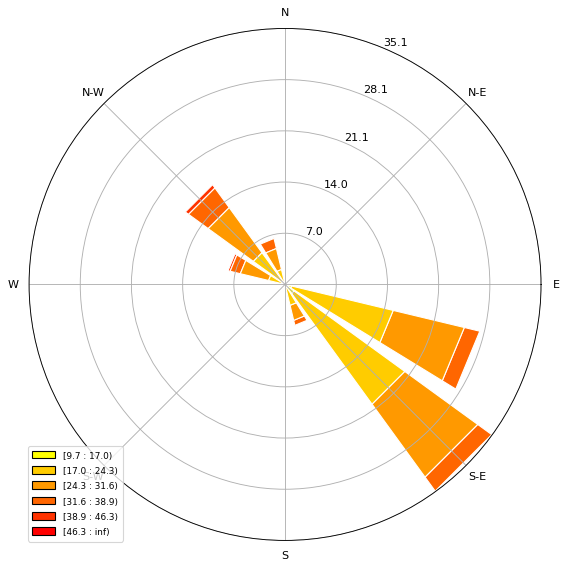

In [17]:
# 윈드로즈 다이어그램으로 시각화
ax = WindroseAxes.from_ax()
ax.bar(windset.wind_direction, windset.HI, normed=True, opening=0.8, edgecolor='white', cmap=cmap_reversed)
ax.set_legend()

- 여름계절풍인 남동풍의 빈도가 현저하게 많다.
- 열지수가 높은 바람은 주로 북서풍에서 비롯된다.

### 2. 시각화 : 6~9월로 범위를 제한하여 전체 열지수를 시각화

In [18]:
# 전체 풍향 데이터 중폭염에 영향을 끼치는 6~9월로 범위 제한하여 데이터프레임 저장
mask1 = (pre_wdset['month'] <= 9) & (pre_wdset['month'] >= 6)
junsep = pre_wdset.loc[mask1,:]
junsep.head()

index  year  month  day  hour            datetime  temp  rainfall  \
4241  2097720  2011      6    1     0 2011-06-01 00:00:00  18.8       0.0   
4242  2097721  2011      6    1     1 2011-06-01 01:00:00  20.3       0.0   
4243  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   
4244  2097723  2011      6    1     3 2011-06-01 03:00:00  20.6       0.0   
4245  2097724  2011      6    1     4 2011-06-01 04:00:00  22.2       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4241          0      72.0         1.4            86.0          4   효목1동   
4242          0      68.0         1.6            68.0          4   효목1동   
4243          0      67.0         2.2           317.0          4   효목1동   
4244          0      67.0         0.4             0.0          4   효목1동   
4245          0      64.0         2.4           327.0          4   효목1동   

             HI        DI  
4241  18.615556  64.63264  
4242  20.161111  66.68496  
4243  20.245000  66.77432  
4244  20.465000  67.06898  
4245  22.146667  69.19592

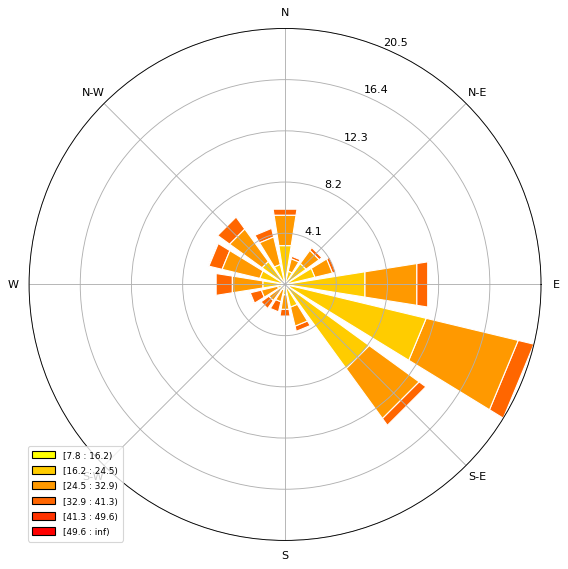

In [19]:
# 윈드로즈 다이어그램으로 시각화
axset = WindroseAxes.from_ax()
axset.bar(junsep.wind_direction, junsep.HI, normed=True, opening=0.8, edgecolor='white', cmap=cmap_reversed)
axset.set_legend()

- 차이가 잘 드러나지 않는다.

### 3. 시각화 : 열지수 구성비율로 플롯 (feat.Tableau)

In [20]:
# 풍향과 열지수를 4분위로 구분하기 위하여 데이터를 요약해서 확인
junsep[['wind_direction','HI']].describe()

wind_direction            HI
count    32208.000000  32208.000000
mean       164.172783     25.694933
std         97.461339      5.701477
min         -1.000000      7.818889
25%        100.000000     21.615556
50%        127.000000     24.902222
75%        262.000000     29.262852
max        360.000000     49.626872

In [21]:
# 열지수를 4분위로 구간 나누기
bins = list(range(7,50,4))
bins_labels = [str(x)+"미만" for x in bins[1:]]
junsep['HI_bin'] = pd.cut(junsep['HI'], bins, right=False, labels=bins_labels[:])
junsep.head(3)

C:\Users\popcorn\AppData\Local\Temp\ipykernel_3036\3015767669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junsep['HI_bin'] = pd.cut(junsep['HI'], bins, right=False, labels=bins_labels[:])


index  year  month  day  hour            datetime  temp  rainfall  \
4241  2097720  2011      6    1     0 2011-06-01 00:00:00  18.8       0.0   
4242  2097721  2011      6    1     1 2011-06-01 01:00:00  20.3       0.0   
4243  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4241          0      72.0         1.4            86.0          4   효목1동   
4242          0      68.0         1.6            68.0          4   효목1동   
4243          0      67.0         2.2           317.0          4   효목1동   

             HI        DI HI_bin  
4241  18.615556  64.63264   19미만  
4242  20.161111  66.68496   23미만  
4243  20.245000  66.77432   23미만

In [22]:
# 바람방향을 4분위로 구간 나누기
bins = list(range(0,360,10))
bins_labels = [str(x)+"미만" for x in bins[1:]]
junsep['wd_bin'] = pd.cut(junsep['wind_direction'], bins, right=False, labels=bins_labels[:])
junsep.head(3)

C:\Users\popcorn\AppData\Local\Temp\ipykernel_3036\1479703230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junsep['wd_bin'] = pd.cut(junsep['wind_direction'], bins, right=False, labels=bins_labels[:])


index  year  month  day  hour            datetime  temp  rainfall  \
4241  2097720  2011      6    1     0 2011-06-01 00:00:00  18.8       0.0   
4242  2097721  2011      6    1     1 2011-06-01 01:00:00  20.3       0.0   
4243  2097722  2011      6    1     2 2011-06-01 02:00:00  20.4       0.0   

      lightning  humidity  wind_speed  wind_direction  condition region  \
4241          0      72.0         1.4            86.0          4   효목1동   
4242          0      68.0         1.6            68.0          4   효목1동   
4243          0      67.0         2.2           317.0          4   효목1동   

             HI        DI HI_bin wd_bin  
4241  18.615556  64.63264   19미만   90미만  
4242  20.161111  66.68496   23미만   70미만  
4243  20.245000  66.77432   23미만  320미만

In [24]:
# 파일로 저장한 뒤 태블로를 통해 시각화
junsep.to_csv('./output/junsep.csv', encoding='cp949')

![](./img/WDHI.png)
- 가로축은 북쪽에서부터 시계방향으로 풍향을 측정한 것이며 열지수의 범위에 해당하는 값들의 비율을 시각화 한 그래프.
- 서쪽(210도~300도)에서 열지수가 가장 높았던 바람의 비율이 증가함을 알 수 있다.
- 즉, 대구의 서쪽에서 불어오는 바람일수록 열지수가 높다는 가설은 타당하다.

### 4. 결론
대구 서쪽에서 비롯된 바람은 열지수가 높은 것으로 나타남

## <hr>

## 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
>###### made by PJW

#### Priod
- 2022.05.09 ~ 2022.05.13

<h4><details><summary>Index</summary><h6>

0. 
</h6></details></h4>

<h4><details><summary>reference</summary><h6>

* 대구와 **비슷한** 지역 기후 탐색  
* HI(열 지수)를 체감 온도로 보고 진행  
* 폭염 기준 : 주의보 체감 온도 33℃ 이상 / 경보 35℃ 이상  
* 체감 온도: 기온에 습도, 바람 등의 영향이 더해져 사람이 느끼는 더위나 추위를 정량적으로 나타낸 온도  
* 습도 10% 증가 시마다 체감온도 1도 가량 증가하는 특징  
* 참조자료 - 열섬현상 설명(https://m.blog.naver.com/kma_131/220392671501)
* 낮의 기온은 도심이나 시골 지역이나 큰 차이가 나지 않음  
* 오히려 밤에 온도 차이가 많이 발생하여 열섬을 확인하기 더 뚜렷함  
* 시간대를 20:00 ~ 05:00 으로 제한한 데이터로 새로운 기온 탐색  
</h6></details></h4>

### 0. 필요한 패키지 및 데이터 불러오기

In [ ]:
# 기본 모듈 선언
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 각 도시 데이터 호출
daegu = pd.read_csv("output/Daegu_final.csv")
daegu['datetime'] = pd.to_datetime(daegu['datetime'])

# 각각의 데이터는 download_date.ipynb를 통해 대구와 동일하게 다운로드 한 뒤
# ***_combine.ipynb를 통해 하나의 파일로 합침
# 이후 EDA_base.ipynb를 그대로 사용하여 전처리를 한 파일임
daejeon = pd.read_csv("output/Daejeon_final.csv")
daejeon['datetime'] = pd.to_datetime(daejeon['datetime'])

cheongju = pd.read_csv("output/Cheongju_final.csv")
cheongju['datetime'] = pd.to_datetime(cheongju['datetime'])

chuncheon = pd.read_csv("output/Chuncheon_final.csv")
chuncheon['datetime'] = pd.to_datetime(chuncheon['datetime'])

### 1. 대구

각 리스트에 모여진 (수치들의 합 / 리스트 크기) 값을 평균 폭염 발생일로 지정 

In [ ]:
# 조건에 맞는 결과값을 뽑아서 따로 저장하기 위한 리스트 선언
daegu_result = []

for i in range(2010,2023):
    # 조건(각 연도에 HI가 35, DI가 80 이상인 기간) 지정
    daegu_sample = daegu[(daegu['year'] == i) & (daegu['HI'] >= 35) & (daegu['DI'] >= 80)]
    # 해당 기간에 대한 고유값만 모아서 저장
    daegu_result.append(len(daegu_sample['ymd'].unique()))

print("대구 지역 매년 폭염 발생일" )
print(daegu_result)

sum = 0

# 매년 발생한 폭염 발생일 평균 구하기
for i in range(len(daegu_result)):
    sum += daegu_result[i]

daegu_mean = sum / len(daegu_result)

print("대구 지역 폭염 발생일 평균 : ",round(daegu_mean,2))

열대야 / 열섬 분석
* 열섬 현상은 낮보다 밤에 더 뚜렷하게 나타남
* 측정 시간은 매 시 정각이므로 시간대를 20 ~ 05 시까지 제한하고 진행

In [ ]:
# 시간대 조정
heat_daegu = daegu[(daegu['time'] >= '20:00:00') | (daegu['time'] <= '05:00:00')]

In [ ]:
# 대구의 열대야 발생일 카운트를 담을 리스트 선언
heat_daegu_result = []

for i in range(2010,2023):
    # 조건(각 연도와 밤 시간대에 HI가 35, DI가 80 이상인 기간) 지정
    daegu_sample = heat_daegu[(heat_daegu['year'] == i) & (heat_daegu['HI'] >= 35) & (heat_daegu['DI'] >= 80)]
    # 해당 기간에 대한 고유값만 모아서 저장
    heat_daegu_result .append(len(daegu_sample['ymd'].unique()))

print("대구 지역 매년 열대야 발생일 수" )
print(heat_daegu_result )

# 매년 발생한 폭염 발생일 평균 구하기
sum = 0
for i in range(len(heat_daegu_result)):
    sum += heat_daegu_result [i]

heat_daegu_mean = sum / len(heat_daegu_result )

print("대구 지역 열대야 발생일 평균 : ",round(heat_daegu_mean,2))

### 2. 대전

In [ ]:
daejeon_result = []

for i in range(2010,2023):
    daejeon_sample = daejeon[(daejeon['year'] == i) & (daejeon['HI'] >= 35) & (daejeon['DI'] >= 80)]
    daejeon_result.append(len(daejeon_sample['ymd'].unique()))

print("대전 지역 매년 폭염 발생일 수" )
print(daejeon_result)

sum = 0
for i in range(len(daejeon_result)):
    sum += daejeon_result[i]

daejeon_mean = sum / len(daejeon_result)


print("대전 지역 폭염 발생일 평균 : ",round(daejeon_mean,2))

In [ ]:
# 시간대 조정
heat_daejeon = daejeon[(daejeon['time'] >= '20:00:00') | (daejeon['time'] <= '05:00:00')]

heat_daejeon_result = []

for i in range(2010,2023):
    daejeon_sample = heat_daejeon[(heat_daejeon['year'] == i) & (heat_daejeon['HI'] >= 35) & (heat_daejeon['DI'] >= 80)]
    heat_daejeon_result.append(len(daejeon_sample['ymd'].unique()))

print("대전 지역 매년 열대야 발생일 수" )
print(heat_daejeon_result)

sum = 0
for i in range(len(heat_daejeon_result)):
    sum += heat_daejeon_result[i]

heat_daejeon_mean = sum / len(heat_daejeon_result)


print("대전 지역 열대야 발생일 평균 : ",round(heat_daejeon_mean,1))

### 3. 청주

In [ ]:
cheongju_result = []

for i in range(2010,2023):
    cheongju_sample = cheongju[(cheongju['year'] == i) & (cheongju['HI'] >= 35) & (cheongju['DI'] >= 80)]
    cheongju_result.append(len(cheongju_sample['ymd'].unique()))

print("청주 지역 매년 폭염 발생일 수" )
print(cheongju_result)

sum = 0
for i in range(len(cheongju_result)):
    sum += cheongju_result[i]

cheongju_mean = sum / len(cheongju_result)


print("청주 지역 폭염 발생일 평균 : ",round(cheongju_mean,1))

In [ ]:
# 시간대 조정
heat_cheongju = cheongju[(cheongju['time'] >= '20:00:00') | (cheongju['time'] <= '05:00:00')]

heat_cheongju_result = []

for i in range(2010,2023):
    cheongju_sample = heat_cheongju[(heat_cheongju['year'] == i) & (heat_cheongju['HI'] >= 35) & (heat_cheongju['DI'] >= 80)]
    heat_cheongju_result.append(len(cheongju_sample['ymd'].unique()))

print("청주 지역 매년 열대야 발생일 수" )
print(heat_cheongju_result)

sum = 0
for i in range(len(heat_cheongju_result)):
    sum += heat_cheongju_result[i]

heat_cheongju_mean = sum / len(heat_cheongju_result)


print("청주 지역 열대야 발생일 평균 : ",round(heat_cheongju_mean,1))

### 4. 춘천

In [ ]:
chuncheon_sample = chuncheon[(chuncheon['HI'] >= 35) & (chuncheon['DI'] >= 80)]
chuncheon_sample

In [ ]:
chuncheon_result = []

for i in range(2010,2023):
    chuncheon_sample = chuncheon[(chuncheon['year'] == i) & (chuncheon['HI'] >= 35) & (chuncheon['DI'] >= 80)]
    chuncheon_result.append(len(chuncheon_sample['ymd'].unique()))

print("춘천 지역 매년 폭염 발생일 수" )
print(chuncheon_result)

sum = 0
for i in range(len(chuncheon_result)):
    sum += chuncheon_result[i]

chuncheon_mean = sum / len(chuncheon_result)


print("춘천 지역 폭염 발생일 평균 : ",round(chuncheon_mean,2))

In [ ]:
# 시간대 조정
heat_chuncheon = chuncheon[(chuncheon['time'] >= '20:00:00') | (chuncheon['time'] <= '05:00:00')]

heat_chuncheon_result = []

for i in range(2010,2023):
    chuncheon_sample = heat_chuncheon[(heat_chuncheon['year'] == i) & (heat_chuncheon['HI'] >= 35) & (heat_chuncheon['DI'] >= 80)]
    heat_chuncheon_result.append(len(chuncheon_sample['ymd'].unique()))

print("춘천 지역 매년 열대야 발생일 수" )
print(heat_chuncheon_result)

sum = 0
for i in range(len(heat_chuncheon_result)):
    sum += heat_chuncheon_result[i]

heat_chuncheon_mean = sum / len(heat_chuncheon_result)


print("춘천 지역 열대야 발생일 평균 : ",round(heat_chuncheon_mean,2))

### 5. 그래프를 통한 확인

간단한 그래프 확인


In [ ]:
# 각 리스트 출력
print(daegu_result)
print(daejeon_result)
print(cheongju_result)
print(chuncheon_result)

In [ ]:
# 연도 리스트 선언
year_list = []
for i in range(2010,2023):
    year_list.append(i)

print(year_list)

In [ ]:
# 각 도시들의 평균 폭염 발생일 카운트 그래프 생성

#크기 지정
fig = plt.figure(figsize=(15,6))

# 2*2 차트 내 서브 차트 : 대구
plt.subplot(221)
plt.bar(year_list,daegu_result)
plt.xlabel('Year')
plt.ylabel('Count of Daegu')

# 2*2 차트 내 서브 차트 : 대전
plt.subplot(222)
plt.bar(year_list,daejeon_result)
plt.xlabel('Year')
plt.ylabel('Count of Daejeon')

# 2*2 차트 내 서브 차트 : 청주
plt.subplot(223)
plt.bar(year_list,cheongju_result)
plt.xlabel('Year')
plt.ylabel('Count of Cheongju')

# 2*2 차트 내 서브 차트 : 춘천
plt.subplot(224)
plt.bar(year_list,chuncheon_result)
plt.xlabel('Year')
plt.ylabel('Count of Chuncheon')

# 차트 출력
plt.show()

평균 폭염일 수 차트

In [ ]:
# 평균값 담는 간단한 리스트 생성
mean_list = [daegu_mean,daejeon_mean,cheongju_mean,chuncheon_mean]

# 선정했던 도시 리스트
city_list = ['Daegu','Daejeon','Cheongju','Chuncheon']

# 차트 크기 지정
fig = plt.figure(figsize=(15,6))

#차트 형태, x축,y축 이름 달기
plt.bar(city_list,mean_list)
plt.xlabel('City')
plt.ylabel('Mean of Heatwave')

# 차트 출력
plt.show()

열대야 비교

In [ ]:
# 차트 크기 지정
fig = plt.figure(figsize=(15,6))


# 2*2 차트 내 서브 차트 : 대구
plt.subplot(221)
plt.bar(year_list,heat_daegu_result)
plt.xlabel('Year')
plt.ylabel('Count of Daegu')

# 2*2 차트 내 서브 차트 : 대전
plt.subplot(222)
plt.bar(year_list,heat_daejeon_result)
plt.xlabel('Year')
plt.ylabel('Count of Daejeon')

# 2*2 차트 내 서브 차트 : 청주
plt.subplot(223)
plt.bar(year_list,heat_cheongju_result)
plt.xlabel('Year')
plt.ylabel('Count of Cheongju')

# 2*2 차트 내 서브 차트 : 춘천
plt.subplot(224)
plt.bar(year_list,heat_chuncheon_result)
plt.xlabel('Year')
plt.ylabel('Count of Chuncheon')

plt.show()

### 6. 결론 
폭염 발생빈도는 다른 분지 지형에 비해 대구가 유독 높았음  
낮에 있는 폭염과 밤에 있는 열섬현상에서도 뚜렷하게 나타남  

## <hr>

## 6. 고도에 따른 습도와 기온의 영향
- made by 

## <hr>

## 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

## <hr>

## 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
>###### made by KMJ

#### Period
- 2022.05.09 ~ 2022.05.12

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 각 해, 달마다 비가 온 날의 수와 최고 열지수

2. 매년 일일 평균 강수량 + 열지수

3. 습도_기온 상관관계 그래프

4. 년도별 매달 평균 습도 + 평균 기온

5. 모든 날의 평균 강수량 + 평균 기온

6. 결론
</h6></details></h4>


### 0. 필요한 패키지 및 데이터 불러오기

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import platform

In [94]:
# 복사본으로 작업
df_final = pd.read_csv('./output/daegu_final.csv')
EDAset = df_final.copy()
EDAset['datetime'] = pd.to_datetime(EDAset['datetime'])

In [56]:
# 마이너스 부호 출력 오류
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

### 1. 각 해, 달마다 비가 온 날의 수와 최고 열지수

In [57]:
# 2018년, 효목1동 기준 (대구지방기상청 소재지)
condyear = EDAset['year'] == 2018
condregion = EDAset['region'] == '효목1동'
df2011_HM = EDAset[condyear & condregion]
rainfall = df2011_HM.copy()

In [58]:
# 비 온 날 카운트
count_rain = []
max_HI = []
max_hum = []
month = []

for i in range(1,13) :
    rain_temp = rainfall[rainfall['month'] == i]
    # 비 온 날 카운트 리스트
    cond = rain_temp[rain_temp['rainfall'] > 0.0]
    count_rain.append(cond.count())
    # 최고기온 리스트
    max_HI.append(round(rain_temp['HI'].max(),2))
    # 최고습도 리스트
    max_hum.append(rain_temp['humidity'].mean())
    # 데이터 있는 달 리스트
    month.append(i)

# 출력
counts_rain = [i[0] for i in count_rain]

print("측정달", month)
print("우천 발생수 (시간당)", counts_rain)
print("최고 열지수", max_HI)
print("최고 습도", max_hum)

측정달 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
우천 발생수 (시간당) [48, 23, 102, 80, 93, 84, 61, 66, 57, 40, 16, 23]
최고 열지수 [11.34, 12.83, 24.69, 29.01, 33.04, 34.63, 41.33, 40.7, 29.67, 24.82, 19.27, 15.14]
최고 습도 [51.51075268817204, 43.017857142857146, 62.89650537634409, 57.10138888888889, 66.18279569892474, 64.0513888888889, 66.24193548387096, 67.71370967741936, 70.33888888888889, 63.211021505376344, 62.458333333333336, 50.211021505376344]


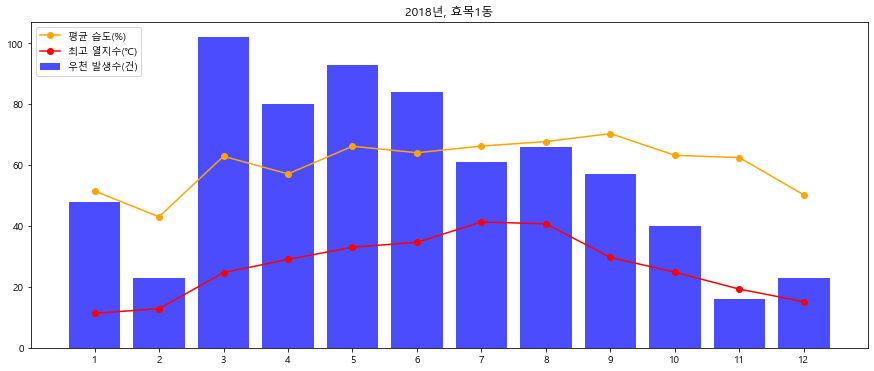

In [59]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('2018년, 효목1동')

plt.plot(month, max_hum, color='orange', marker = 'o', label='평균 습도(%)', linestyle='-')
plt.bar(month, counts_rain, color='blue', label='우천 발생수(건)', alpha=0.7)
plt.plot(month, max_HI, color='red', marker = 'o', label='최고 열지수(℃)', linestyle='-')

plt.legend(loc=2)
plt.xticks(month)
plt.show()

<전체 년도 결과>
* 최고 열지수는 7, 8월경에 최고치를 기록
* 2018년 3월경 강수일이 급증하자 열지수의 증가폭 역시 다른 해에 비해 높음
* 열지수가 최고를 기록한 달 혹은 그 다음 달에 우천일 증가하는 경향
* 열지수가 최고를 기록한 달의 평균습도는 큰 변화가 없음
-> 오히려 우천 발생수에 의존

C:\Users\popcorn\AppData\Local\Temp\ipykernel_11244\311189145.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

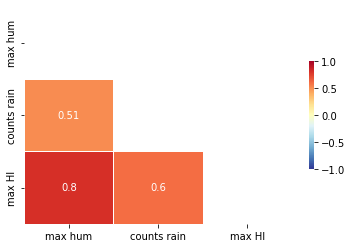

In [51]:
# 최고습도, 비가 온 날의 수, 최고HI 에 대한 값들을 새로운 DF에 저장
df_sum = pd.DataFrame(data = list(zip(max_hum, counts_rain, max_HI)), columns = ['max hum', 'counts rain', 'max HI'])

df_corr = df_sum.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 대각선 기준으로 아래쪽만 표시

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

* 장마기간 외 비가 많이 온 2014년, 가뭄이 심각했던 2016년, 적은 강수일에 비해 강수량이 컸던 2018년, 태풍의 영향을 많이 받았던 2019년을 대상으로 히트맵을 그린 결과
* 최대 열지수와 강수일은 양의 상관관계를 크게 보임
* 2016년 히트맵도 참고하면 열지수와 습도는 관계가 모순되므로 두 변수는 관계가 없음

In [52]:
# 전체 데이터, 연도별 우천일 수
rainset = EDAset.copy()
RS = rainset.groupby('year')['rainfall'].nunique().reset_index()
RS

year  rainfall
0   2010        51
1   2011        42
2   2012        43
3   2013        48
4   2014        39
5   2015        22
6   2016       180
7   2017       161
8   2018       157
9   2019        52
10  2020       127
11  2021       116
12  2022        40

In [53]:
# 연도별 최대 열지수
setmax_HI = []
year = []

for i in range(2010,2023) :
    HI_temp = EDAset[EDAset['year'] == i]
    # 평균 최대 열지수 리스트
    setmax_HI.append(round(HI_temp['HI'].mean(),2))
    # 데이터 있는 연도 리스트
    year.append(i)

# 출력
print("측정연도", year)
print("평균 최대 열지수", setmax_HI)

측정연도 [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
평균 최대 열지수 [18.68, 13.75, 13.3, 14.34, 14.08, 14.02, 14.3, 14.02, 14.1, 14.59, 14.39, 14.53, 6.37]


<AxesSubplot:ylabel='열지수 (℃)'>

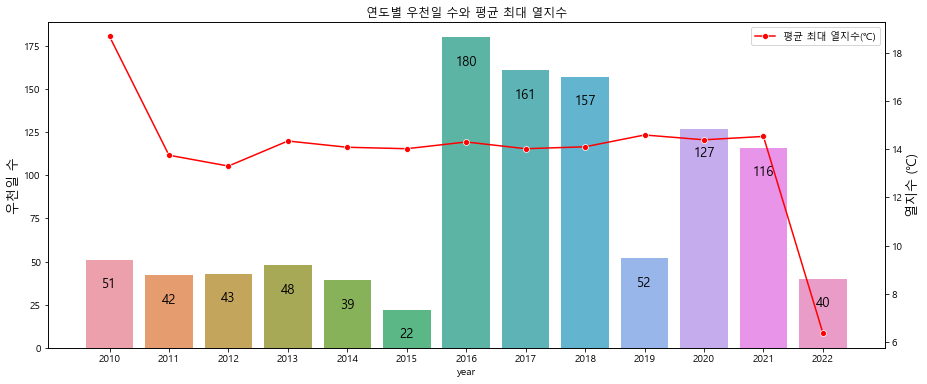

In [60]:
# 연도별 최고 HI에 대한 DF생성
maxHI = pd.DataFrame(data = list(zip(setmax_HI, year)), columns = ['max HI', 'year'])

ax1 = sns.set_style(style=None, rc=None)

# 우천 일 수 막대그래프
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("연도별 우천일 수와 평균 최대 열지수")
sns.barplot(
    data = RS,
    x = "year",
    y = "rainfall",
    alpha=0.9,
    ax=ax1)

# 막대그래프에 값 표시
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 20),
    ha='center', va='center', fontsize=13, color='black', xytext=(0,10),
    textcoords='offset points')
ax1.set_ylabel("우천일 수", fontsize=13)

# HI 선그래프
ax2 = ax1.twinx()  # 축 일치
ax2.set_ylabel("열지수 (℃)", fontsize=13)
sns.lineplot(
    data = maxHI['max HI'],
    marker='o',
    sort = False,
    color='red',
    label='평균 최대 열지수(℃)',
    ax=ax2)

- 데이터가 충분하지 않은 2010년과 2022년은 제외함.
- 평균 최대열지수는 대체로 비슷한 경향을 보이나 그에 반해 우천일 수는 해마다 다양하며 2016~2018년이 이례적으로 급증했다.

<관련 기사>
- (대한뉴스) 2015년은 장마기간에 강수량이 적었다.
- (동아일보) 2016년은 전체적으로 가뭄이 심각한 해다.
- (중앙일보) 2019년은 기상관측 이래 태풍의 영향을 가장 많이 받은 해로, 폭염일수는 적으나 월 평균 기온이 높았다. 또한 겨울에는 눈이 적었다.

### 2. 매년 일일 평균 강수량 + 열지수

In [61]:
# 효목1동 기준
HMdong = EDAset[condregion]
rainheat = HMdong.copy()

In [62]:
# 데이터가 적은 2010년, 2022년은 제외하고 필요한 컬럼만 선택
cond1 = rainheat[rainheat['year'] == 2010].index
cond2 = rainheat[rainheat['year'] == 2022].index

rainheat.drop(cond1, inplace=True)
rainheat.drop(cond2, inplace=True)

rainheat = rainheat.reset_index()

In [65]:
# 필요한 컬럼만 선택
RH = rainheat[['datetime','year','month','day','rainfall','HI']]
RH

datetime  year  month  day  rainfall   HI
0      2011-01-01 00:00:00  2011      1    1       0.0 -5.7
1      2011-01-01 01:00:00  2011      1    1       0.0 -4.6
2      2011-01-01 02:00:00  2011      1    1       0.0 -2.5
3      2011-01-01 03:00:00  2011      1    1       0.0 -0.8
4      2011-01-01 04:00:00  2011      1    1       0.0  0.1
...                    ...   ...    ...  ...       ...  ...
96427  2021-12-31 19:00:00  2021     12   31       0.0 -5.9
96428  2021-12-31 20:00:00  2021     12   31       0.0 -8.4
96429  2021-12-31 21:00:00  2021     12   31       0.0 -8.3
96430  2021-12-31 22:00:00  2021     12   31       0.0 -7.7
96431  2021-12-31 23:00:00  2021     12   31       0.0 -6.3

[96432 rows x 6 columns]

In [66]:
# 일별 평균 강수량과 열지수를 계산한 데이터프레임을 생성
dfRH = RH.groupby(['year','month','day']).mean()
dfRH

rainfall        HI
year month day                    
2011 1     1         0.0 -2.025000
           2         0.0 -0.602755
           3         0.0 -0.654167
           4         0.0 -0.820833
           5         0.0 -0.420833
...                  ...       ...
2021 12    27        0.0  0.016667
           28        0.0  1.455093
           29        0.0  3.362431
           30        0.0 -0.725000
           31        0.0 -3.141667

[4018 rows x 2 columns]

In [67]:
dfRH.describe()

rainfall           HI
count  4018.000000  4018.000000
mean      0.127242    14.226217
std       0.453603    10.479638
min       0.000000   -10.779167
25%       0.000000     4.702980
50%       0.000000    14.405035
75%       0.003125    22.843785
max       8.333333    39.222891

c:\git_project\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


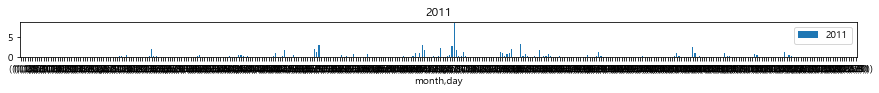

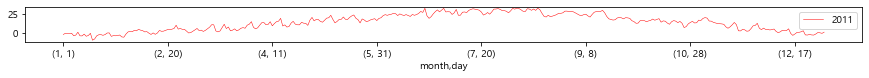

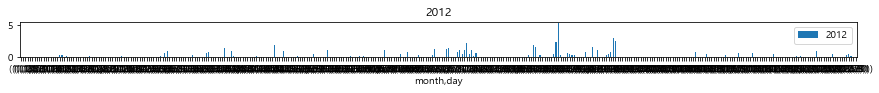

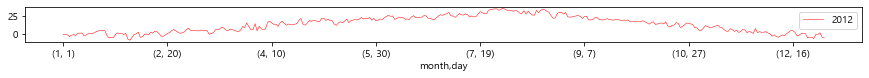

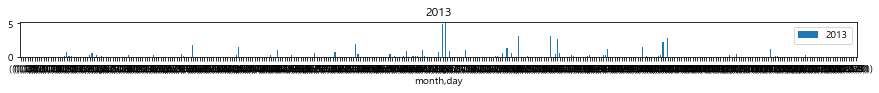

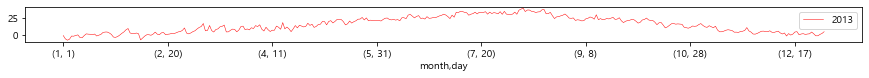

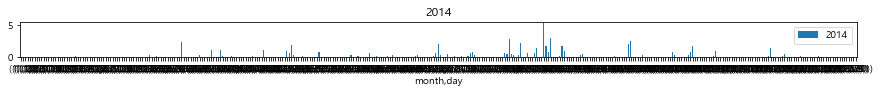

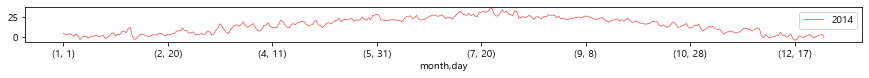

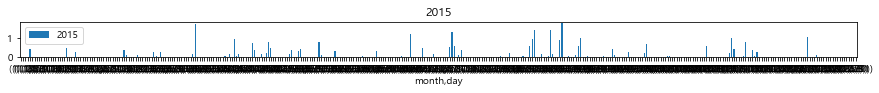

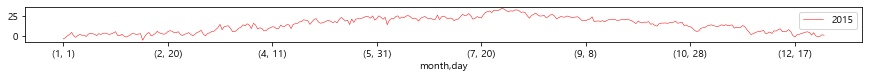

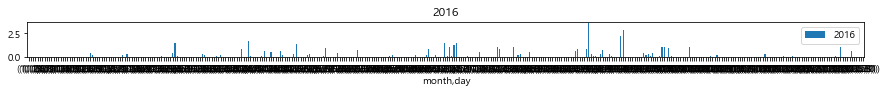

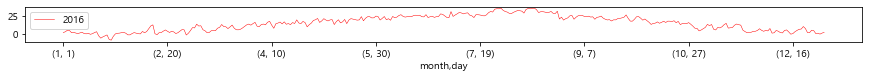

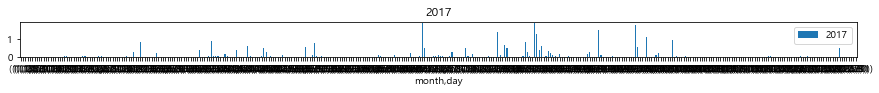

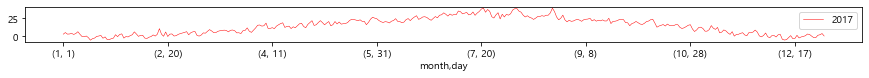

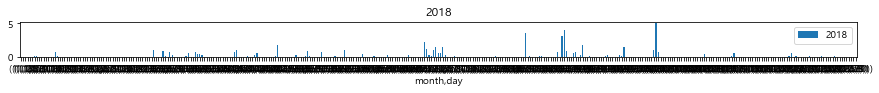

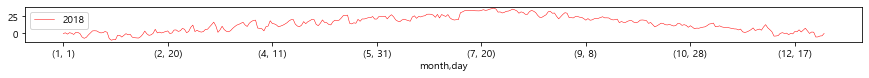

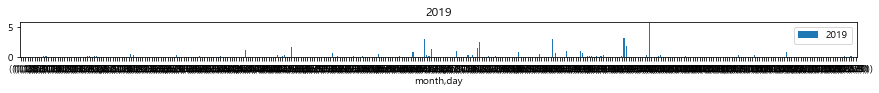

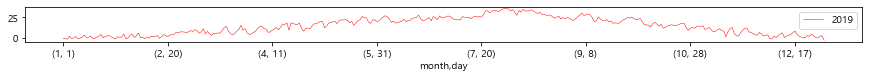

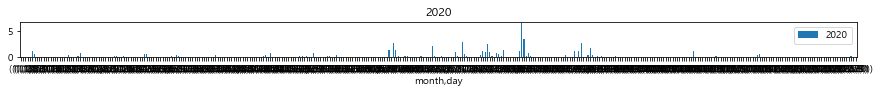

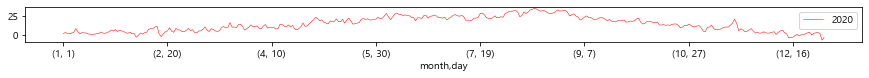

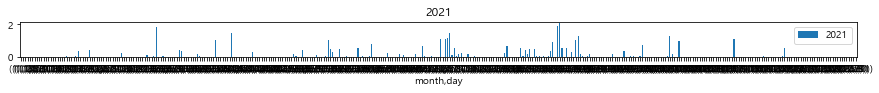

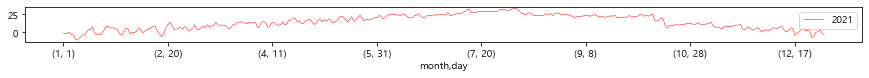

In [68]:
# 연도별 일일 평균 강수량과 평균 열지수
for i in range(2011,2022):
    temp_mean = dfRH.query('year == {0}'.format(i))

    x = temp_mean.query('day >= 1')
    y = temp_mean['rainfall']
    z = temp_mean['HI']

    # 강수량 막대 그래프
    temp_mean.unstack(level=0)['rainfall'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
        )

    # 열지수 꺾은선 그래프
    temp_mean.unstack(level=0)['HI'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
        )

- 매년 강수량과 열지수가 유사한 증감패턴을 보인다
- 열지수와 강수량은 연관이 있다

<예시>
- 2018년, 열지수가 급증하여 유지되고, 여름보다 가을에 우천일이 치우쳐 있으며 강수량이 컸다
-- 장마일과 강수일수가 적은 것에 비해 합계 강수량이 다른 해와 비교하여 평균이었으므로 강수일이 적으나 올 때마다 비가 꽤 내렸다는 분석결과와 맞음
- 2021년, 가을까지 열지수가 높았고, 여름부터 가을까지 강수량은 적었지만 거의 매일 비가 왔었다
-- 2021년은 지각장마가 왔었고, 장마철 외에도 비가 많이 왔다는 기록이 있다

### 3. 습도+기온 상관관계 그래프

In [75]:
# 효목1동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [76]:
# 사용할 데이터만 선택
humheat = humheat[['humidity','temp','HI','datetime']]

corr = humheat.corr()
print(corr)

          humidity      temp        HI
humidity  1.000000  0.138106  0.172603
temp      0.138106  1.000000  0.993401
HI        0.172603  0.993401  1.000000


C:\Users\popcorn\AppData\Local\Temp\ipykernel_11244\3424830007.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

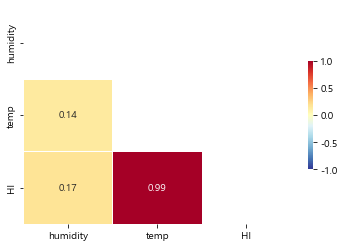

In [77]:
df_corr = humheat.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 삼각형으로 표시

# 상관관계 그래프를 대각선 기준 아래쪽만 표시
sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

- 열지수는 습도보다 기온과 상관성이 높다.
- 습도와 기온은 관련이 적다.
- 습도가 우천발생의 지표가 되지 못하므로 열지수에 영향을 주는 요인으로 파악하기 어렵다.

In [79]:
humetemp = humheat[['humidity','temp','HI','datetime']]

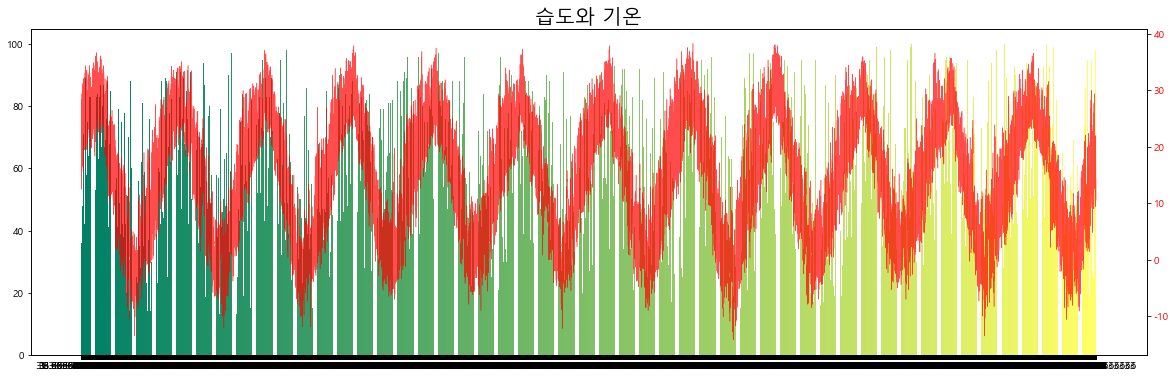

In [81]:
fig = plt.figure(figsize=(20,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sns.color_palette('summer', len(humetemp["datetime"])) ## 바 차트 색상
xtick_label_position = list(range(len(humetemp["datetime"]))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(humetemp["humidity"]) ## x축 눈금 라벨
ax1.bar(xtick_label_position, humetemp["humidity"], color=colors) ## 바차트 출력

color = 'red'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, humetemp["temp"], color=color, linestyle='-', linewidth = 0.5, alpha = 0.7) ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정

plt.title('습도와 기온', fontsize=20)
plt.show()

- 전체적으로 습도의 증가 주기와 기온의 증가 주기가 일치한다.

### 4. 년도별 매달 평균 습도 + 평균 기온

In [82]:
# 동인동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [83]:
# 데이터가 적은 2010년, 2022년은 제외
cond1 = humheat[humheat['year'] == 2010].index
cond2 = humheat[humheat['year'] == 2022].index

humheat.drop(cond1, inplace=True)
humheat.drop(cond2, inplace=True)

# 인덱스 번호 초기화
humheat = humheat.reset_index()

# 필요한 컬럼만 선택
HH = humheat[['datetime','year','month','day','humidity','temp']]

dfHH = HH.groupby(['year','month']).mean()
dfHH

day   humidity       temp
year month                            
2011 1      16.0  39.803763  -2.857661
     2      14.5  54.106399   3.730357
     3      16.0  37.360215   6.442473
     4      15.5  49.460417  13.268750
     5      16.0  60.193548  18.187500
...          ...        ...        ...
2021 8      16.0  73.571237  25.614247
     9      15.5  75.691667  22.019167
     10     16.0  72.375000  16.386694
     11     15.5  62.876389   9.431528
     12     16.0  56.891129   2.997581

[132 rows x 3 columns]

c:\git_project\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


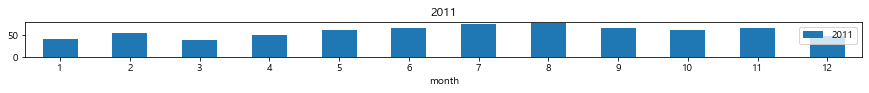

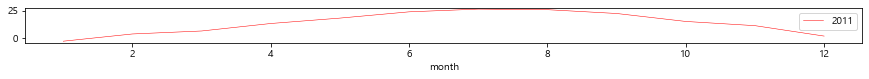

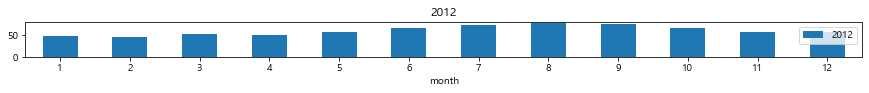

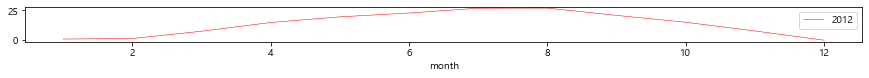

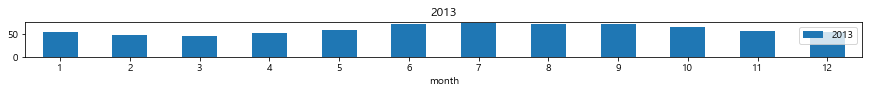

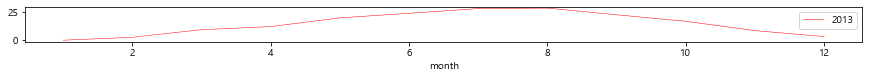

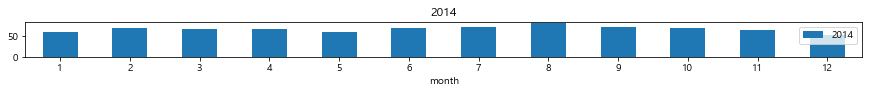

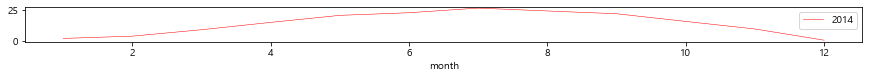

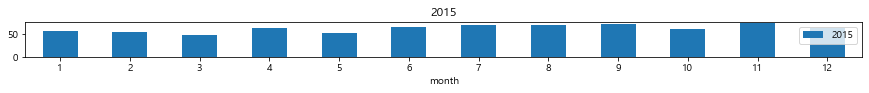

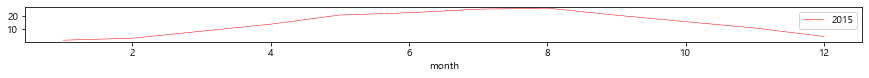

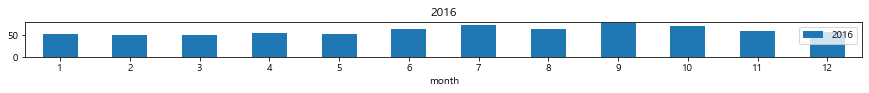

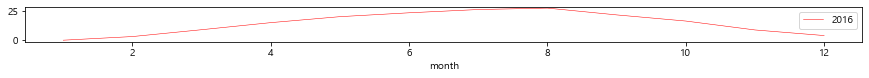

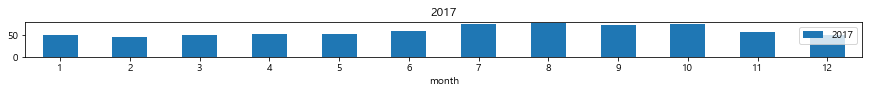

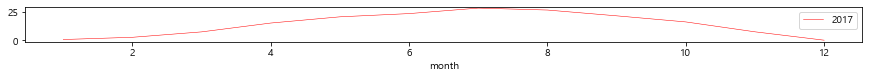

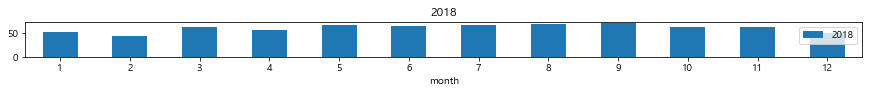

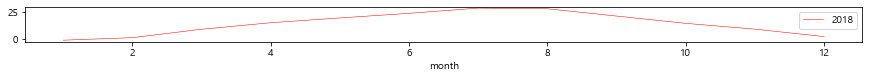

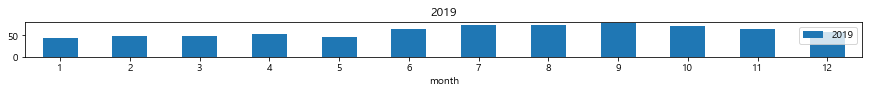

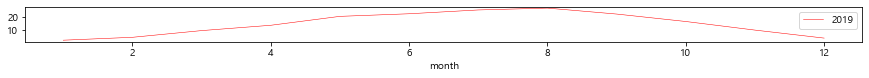

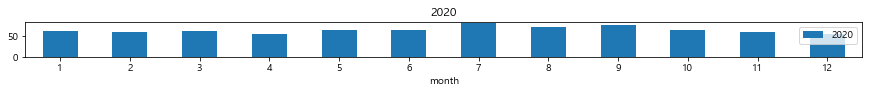

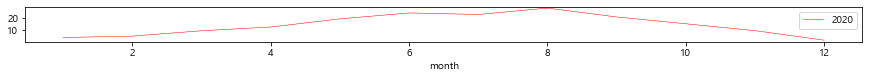

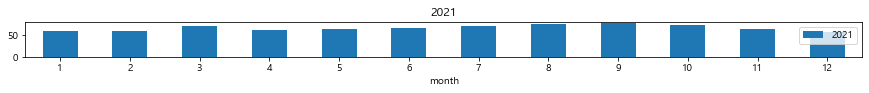

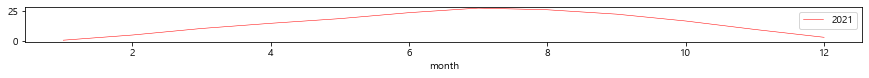

In [84]:
# 연도별 월 평균 습도와 평균 기온

for i in range(2011,2022):
    temp_mean = dfHH.query('year == {0}'.format(i))

    x = temp_mean.query('month >= 1')
    y = temp_mean['humidity']
    z = temp_mean['temp']

    # 습도 막대 그래프
    fig = temp_mean.unstack(level=0)['humidity'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
    )

    # 기온 꺽은선 그래프
    fig = temp_mean.unstack(level=0)['temp'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
    )

- 기온이 1개월 가량 우선적으로 증가한 후 습도가 증가하는 경향이 있다.

### 5. 모든 달의 평균 강수량 + 평균 기온

In [97]:
# 평균계산
temp = []
humd = []
month = []

for i in range(1,13) :
    humd_high = EDAset[EDAset['datetime'].dt.month == i]

    #최고기온 평균
    temp.append(round(humd_high['temp'].mean(),1))

    #강수량 평균
    humd.append(round(humd_high['humidity'].mean(),1))

    month.append(i)

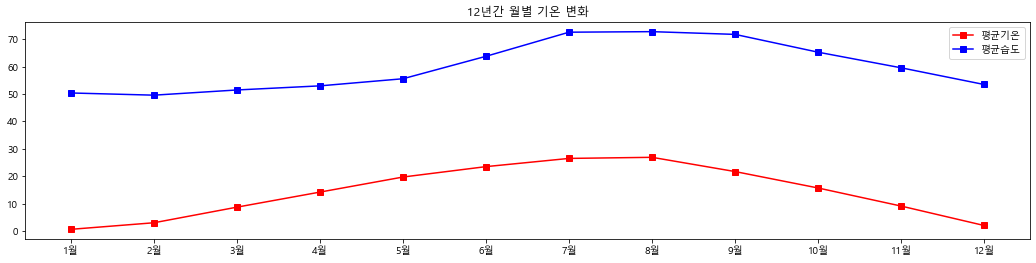

In [98]:
# 그래프 그리기
x_axis = EDAset['datetime'].dt.month.unique()

labels = []
for i in range(1,13):
    labels.append(str(i)+'월')

plt. figure(figsize=(18,4))

plt.title('12년간 월별 기온 변화')
plt.plot(month, temp, color='red', marker = 's', label='평균기온', linestyle='-')
plt.plot(month, humd, color='blue', marker = 's', label='평균습도', linestyle='-')
plt.legend(loc='best')
plt.xticks(month,labels)
plt.show()

- 대체로 평균 강수량의 증가와 평균 기온의 증가 추세가 일치한다.

### 6. 결론
- 열지수가 높으면 비가 올 확률이 매우 높은 것으로 나타남 (가설의 상관관계를 확인)

## <hr>

## 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
>###### made by KMJ

#### Period
- 2022.05.17 ~ 2022.05.20

<h4><details><summary>Index</summary><h6>

0. 필요한 패키지 및 데이터 불러오기

1. 전처리

2. 필요한 컬럼만 가져오기 - datetime, year, month, day, hour, temp

3. 미세먼지 데이터와 조인하기

4. 그래프 그리기

5. 결론
</h6></details></h4>

### 0. 필요한 패키지 및 데이터 불러오기

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform

In [2]:
# 기상 데이터 불러오기
df_final = pd.read_csv('./output/daegu_final.csv')

EDAset = df_final.copy()
EDAset['datetime'] = pd.to_datetime(EDAset['datetime'])

# 미세먼지 데이터 불러오기
orig = pd.read_csv('./dataset/airpollution_daegu.csv', encoding='cp949')
orig

지점 지점명                일시  1시간평균 미세먼지농도(㎍/㎥)
0      143  대구   2010-06-01 0:00                9.5
1      143  대구   2010-06-01 1:00               12.0
2      143  대구   2010-06-01 2:00                9.0
3      143  대구   2010-06-01 3:00                8.0
4      143  대구   2010-06-01 4:00                6.0
...    ...  ..               ...                ...
99569  143  대구  2022-04-30 19:00               23.0
99570  143  대구  2022-04-30 20:00               18.0
99571  143  대구  2022-04-30 21:00               18.0
99572  143  대구  2022-04-30 22:00               15.0
99573  143  대구  2022-04-30 23:00               16.0

[99574 rows x 4 columns]

In [28]:
# 마이너스 부호 출력 오류
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

### 1. 전처리

In [3]:
# 분석용 데이터셋으로 정리
df_airpoll = orig.iloc[:,2:]
df_airpoll.columns = ['date','concentration']
df_airpoll

date  concentration
0       2010-06-01 0:00            9.5
1       2010-06-01 1:00           12.0
2       2010-06-01 2:00            9.0
3       2010-06-01 3:00            8.0
4       2010-06-01 4:00            6.0
...                 ...            ...
99569  2022-04-30 19:00           23.0
99570  2022-04-30 20:00           18.0
99571  2022-04-30 21:00           18.0
99572  2022-04-30 22:00           15.0
99573  2022-04-30 23:00           16.0

[99574 rows x 2 columns]

In [4]:
# date 컬럼의 자료형을 알맞게 변환
df_airpoll['date'] = df_airpoll['date'].astype(str)
df_airpoll['date'] = pd.to_datetime(df_airpoll['date'])

df_airpoll

date  concentration
0     2010-06-01 00:00:00            9.5
1     2010-06-01 01:00:00           12.0
2     2010-06-01 02:00:00            9.0
3     2010-06-01 03:00:00            8.0
4     2010-06-01 04:00:00            6.0
...                   ...            ...
99569 2022-04-30 19:00:00           23.0
99570 2022-04-30 20:00:00           18.0
99571 2022-04-30 21:00:00           18.0
99572 2022-04-30 22:00:00           15.0
99573 2022-04-30 23:00:00           16.0

[99574 rows x 2 columns]

In [5]:
# date 컬럼을 각 요소로 나누기
df_airpoll['year'] = df_airpoll['date'].dt.year
df_airpoll[ 'month'] = df_airpoll['date'].dt.month
df_airpoll['day'] = df_airpoll['date'].dt.day
df_airpoll['hour'] = df_airpoll['date'].dt.hour

df_airpoll

date  concentration  year  month  day  hour
0     2010-06-01 00:00:00            9.5  2010      6    1     0
1     2010-06-01 01:00:00           12.0  2010      6    1     1
2     2010-06-01 02:00:00            9.0  2010      6    1     2
3     2010-06-01 03:00:00            8.0  2010      6    1     3
4     2010-06-01 04:00:00            6.0  2010      6    1     4
...                   ...            ...   ...    ...  ...   ...
99569 2022-04-30 19:00:00           23.0  2022      4   30    19
99570 2022-04-30 20:00:00           18.0  2022      4   30    20
99571 2022-04-30 21:00:00           18.0  2022      4   30    21
99572 2022-04-30 22:00:00           15.0  2022      4   30    22
99573 2022-04-30 23:00:00           16.0  2022      4   30    23

[99574 rows x 6 columns]

In [6]:
# 복사본으로 작업
airpoll = df_airpoll[['date','year','month','day','hour','concentration']]
daegu_final = df_final.copy()

### 2. 필요한 컬럼만 가져오기 - date, year, month, day, hour, temp

In [11]:
# 미세먼지를 측정한 대구지방기상청의 소재지 (효목1동) 데이터만 선택
region = EDAset['region'] == '효목1동'
hmd = EDAset[region].reset_index()
hmd

index  year  month  day  hour            datetime  temp  rainfall  \
0       2088960  2010      6    1     0 2010-06-01 00:00:00  16.8       0.0   
1       2088961  2010      6    1     1 2010-06-01 01:00:00  17.9       0.0   
2       2088962  2010      6    1     2 2010-06-01 02:00:00  19.5       0.0   
3       2088963  2010      6    1     3 2010-06-01 03:00:00  20.9       0.0   
4       2088964  2010      6    1     4 2010-06-01 04:00:00  20.9       0.0   
...         ...   ...    ...  ...   ...                 ...   ...       ...   
104443  2193403  2022      4   30    19 2022-04-30 19:00:00  10.8       0.0   
104444  2193404  2022      4   30    20 2022-04-30 20:00:00  10.5       0.0   
104445  2193405  2022      4   30    21 2022-04-30 21:00:00  12.0       0.0   
104446  2193406  2022      4   30    22 2022-04-30 22:00:00  13.1       0.0   
104447  2193407  2022      4   30    23 2022-04-30 23:00:00  14.4       0.0   

        lightning  humidity  wind_speed  wind_direction  condition region  \
0              -1      53.0         NaN             NaN          1   효목1동   
1              -1      50.0         NaN             NaN          1   효목1동   
2              -1      47.0         NaN             NaN          1   효목1동   
3              -1      40.0         NaN             NaN          1   효목1동   
4              -1      41.0         NaN             NaN          2   효목1동   
...           ...       ...         ...             ...        ...    ...   
104443         -1      63.0         2.0           313.0         -1   효목1동   
104444         -1      66.0         1.5           337.0         -1   효목1동   
104445         -1      60.0         1.4           302.0         -1   효목1동   
104446         -1      50.0         2.3           286.0         -1   효목1동   
104447         -1      46.0         1.9           319.0         -1   효목1동   

               HI        DI  
0       15.919444  61.14396  
1       17.051111  62.50950  
2       18.732778  64.44735  
3       20.090000  65.78540  
4       20.116111  65.84931  
...           ...       ...  
104443   9.580556  52.77496  
104444   9.328889  52.22770  
104445  10.822222  54.56800  
104446  11.771111  56.24550  
104447  13.096667  57.94376  

[104448 rows x 16 columns]

In [13]:
airset = hmd[['datetime','year','month','day','hour','temp']]

### 3. 미세먼지 데이터와 조인하기

In [14]:
# 조인을 위해 date 컬럼 생성
airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])
airset

C:\Users\popcorn\AppData\Local\Temp\ipykernel_9984\552878553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])


datetime  year  month  day  hour  temp                date
0      2010-06-01 00:00:00  2010      6    1     0  16.8 2010-06-01 00:00:00
1      2010-06-01 01:00:00  2010      6    1     1  17.9 2010-06-01 01:00:00
2      2010-06-01 02:00:00  2010      6    1     2  19.5 2010-06-01 02:00:00
3      2010-06-01 03:00:00  2010      6    1     3  20.9 2010-06-01 03:00:00
4      2010-06-01 04:00:00  2010      6    1     4  20.9 2010-06-01 04:00:00
...                    ...   ...    ...  ...   ...   ...                 ...
104443 2022-04-30 19:00:00  2022      4   30    19  10.8 2022-04-30 19:00:00
104444 2022-04-30 20:00:00  2022      4   30    20  10.5 2022-04-30 20:00:00
104445 2022-04-30 21:00:00  2022      4   30    21  12.0 2022-04-30 21:00:00
104446 2022-04-30 22:00:00  2022      4   30    22  13.1 2022-04-30 22:00:00
104447 2022-04-30 23:00:00  2022      4   30    23  14.4 2022-04-30 23:00:00

[104448 rows x 7 columns]

In [15]:
# date 컬럼을 기준으로 조인하기
pollset = pd.merge(airset, airpoll, left_on=['year','month','day','hour','date'], right_on = ['year','month','day','hour','date'], how='outer')
pollset

datetime  year  month  day  hour  temp                date  \
0      2010-06-01 00:00:00  2010      6    1     0  16.8 2010-06-01 00:00:00   
1      2010-06-01 01:00:00  2010      6    1     1  17.9 2010-06-01 01:00:00   
2      2010-06-01 02:00:00  2010      6    1     2  19.5 2010-06-01 02:00:00   
3      2010-06-01 03:00:00  2010      6    1     3  20.9 2010-06-01 03:00:00   
4      2010-06-01 04:00:00  2010      6    1     4  20.9 2010-06-01 04:00:00   
...                    ...   ...    ...  ...   ...   ...                 ...   
104443 2022-04-30 19:00:00  2022      4   30    19  10.8 2022-04-30 19:00:00   
104444 2022-04-30 20:00:00  2022      4   30    20  10.5 2022-04-30 20:00:00   
104445 2022-04-30 21:00:00  2022      4   30    21  12.0 2022-04-30 21:00:00   
104446 2022-04-30 22:00:00  2022      4   30    22  13.1 2022-04-30 22:00:00   
104447 2022-04-30 23:00:00  2022      4   30    23  14.4 2022-04-30 23:00:00   

        concentration  
0                 9.5  
1                12.0  
2                 9.0  
3                 8.0  
4                 6.0  
...               ...  
104443           23.0  
104444           18.0  
104445           18.0  
104446           15.0  
104447           16.0  

[104448 rows x 8 columns]

In [16]:
# 이미 결측치가 처리된 미세먼지 데이터에 반해 airset 데이터는 결측치 처리가 되지 않음
pollset['concentration'].isna().sum()

4874

In [17]:
# 결측치를 3차다항식으로 보간해줌
interpoll = pollset.copy()
interpoll['concentration'] = interpoll['concentration'].interpolate(method='polynomial', limit_direction='both', order=3, limit=10)

In [18]:
interpoll['concentration'].isna().sum()

758

In [19]:
# 특정연도만 선택
test = interpoll[interpoll['year']==2014]

In [20]:
test.reset_index()

index            datetime  year  month  day  hour  temp  \
0     31440 2014-01-01 00:00:00  2014      1    1     0   3.7   
1     31441 2014-01-01 01:00:00  2014      1    1     1   5.7   
2     31442 2014-01-01 02:00:00  2014      1    1     2   7.9   
3     31443 2014-01-01 03:00:00  2014      1    1     3   8.7   
4     31444 2014-01-01 04:00:00  2014      1    1     4   9.9   
...     ...                 ...   ...    ...  ...   ...   ...   
8755  40195 2014-12-31 19:00:00  2014     12   31    19  -5.2   
8756  40196 2014-12-31 20:00:00  2014     12   31    20  -5.6   
8757  40197 2014-12-31 21:00:00  2014     12   31    21  -2.4   
8758  40198 2014-12-31 22:00:00  2014     12   31    22  -3.3   
8759  40199 2014-12-31 23:00:00  2014     12   31    23  -3.7   

                    date  concentration  
0    2014-01-01 00:00:00           82.0  
1    2014-01-01 01:00:00           84.0  
2    2014-01-01 02:00:00           84.0  
3    2014-01-01 03:00:00           93.0  
4    2014-01-01 04:00:00          104.0  
...                  ...            ...  
8755 2014-12-31 19:00:00           16.0  
8756 2014-12-31 20:00:00           13.0  
8757 2014-12-31 21:00:00           14.0  
8758 2014-12-31 22:00:00           19.0  
8759 2014-12-31 23:00:00           18.0  

[8760 rows x 9 columns]

In [21]:
# 연도별 최대 열지수
concen_mean = []
month_mean = []
HI_mean = []

for i in range(1,13) :
    AP_temp = test[test['month'] == i]
    # 평균 미세먼지 농도 리스트
    concen_mean.append(round(AP_temp['concentration'].mean(),2))
    # 최고 기온 리스트
    HI_mean.append(round(AP_temp['temp'].max(),2))
    # 데이터 있는 달 리스트
    month_mean.append(i)

# 출력
print("측정 월", month_mean)
print("평균 미세먼지 농도", concen_mean)
print("최고 기온", HI_mean)

측정 월 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
평균 미세먼지 농도 [50.53, 40.6, 39.78, 42.49, 52.16, 33.14, 29.6, 22.78, 25.8, 29.29, 37.6, 36.91]
최고 기온 [13.7, 19.8, 25.8, 28.1, 36.9, 33.3, 37.5, 33.5, 31.9, 25.1, 20.1, 11.2]


### 4. 그래프 그리기

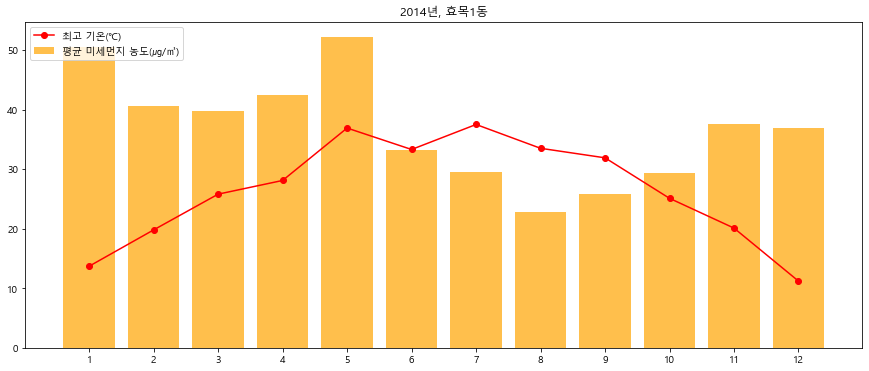

In [29]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('2014년, 효목1동')

plt.bar(month_mean, concen_mean, color='orange', label='평균 미세먼지 농도(㎍/㎥)', alpha=0.7)
plt.plot(month_mean, HI_mean, color='red', marker = 'o', label='최고 기온(℃)', linestyle='-')

plt.legend(loc=2)
month = range(1,13)
plt.xticks(month)
plt.show()

- 그래프 상, 미세먼지와 기온은 반비례 관계로 나타난다.
- 여름에 폭우 영향으로 미세먼지의 농도가 낮아지는 필연적인 현상으로 해석된다.

### 5. 결론
온도가 높으면 강수현상이 발생하므로 미세먼지의 농도가 낮아짐 (가설은 거짓)

## <hr>

## 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
>###### made by LEH

#### Period
- Period : 2022-05-06

#### Index

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import platform

In [2]:
# 마이너스 부호 출력 오류
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

In [3]:
final=pd.read_csv('./output/daegu_final.csv')
final

year  month  day  hour             datetime  temp  rainfall  \
0         2010      6    1     0  2010-06-01 00:00:00  16.5       0.0   
1         2010      6    1     1  2010-06-01 01:00:00  18.1       0.0   
2         2010      6    1     2  2010-06-01 02:00:00  19.7       0.0   
3         2010      6    1     3  2010-06-01 03:00:00  20.8       0.0   
4         2010      6    1     4  2010-06-01 04:00:00  22.2       0.0   
...        ...    ...  ...   ...                  ...   ...       ...   
14831611  2022      4   30    19  2022-04-30 19:00:00  10.7       0.0   
14831612  2022      4   30    20  2022-04-30 20:00:00  11.0       0.0   
14831613  2022      4   30    21  2022-04-30 21:00:00  11.9       0.0   
14831614  2022      4   30    22  2022-04-30 22:00:00  13.4       0.0   
14831615  2022      4   30    23  2022-04-30 23:00:00  15.1       0.0   

          lightning  humidity  wind_speed  wind_direction  condition region  \
0                -1      53.0         NaN             NaN          1    동인동   
1                -1      49.0         NaN             NaN          1    동인동   
2                -1      46.0         NaN             NaN          1    동인동   
3                -1      41.0         NaN             NaN          1    동인동   
4                -1      36.0         NaN             NaN          2    동인동   
...             ...       ...         ...             ...        ...    ...   
14831611         -1      71.0         2.1           335.0         -1    구지면   
14831612         -1      65.0         2.2           339.0         -1    구지면   
14831613         -1      61.0         2.2           338.0         -1    구지면   
14831614         -1      53.0         2.0           351.0         -1    구지면   
14831615         -1      41.0         2.1             5.0         -1    구지면   

                 HI        DI  
0         15.589444  60.74355  
1         17.245000  62.73431  
2         18.926667  64.65038  
3         20.006111  65.72772  
4         21.415556  67.04608  
...             ...       ...  
14831611   9.679444  52.33503  
14831612   9.852778  52.99350  
14831613  10.738333  54.40241  
14831614  12.179444  56.60598  
14831615  13.736111  58.79709  

[14831616 rows x 15 columns]

In [4]:
df_region = pd.read_csv('./dataset/daegu/0 REGION.csv')
df_region

C:\Users\popcorn\AppData\Local\Temp\ipykernel_12284\3853929173.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region = pd.read_csv('./dataset/daegu/0 REGION.csv')


1단계  2단계   3단계
0        대구광역시   중구   동인동
1        대구광역시   중구   삼덕동
2        대구광역시   중구  성내1동
3        대구광역시   중구  성내2동
4        대구광역시   중구  성내3동
...        ...  ...   ...
1044924    NaN  NaN   NaN
1044925    NaN  NaN   NaN
1044926    NaN  NaN   NaN
1044927    NaN  NaN   NaN
1044928    NaN  NaN   NaN

[1044929 rows x 3 columns]

In [5]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']
df_region

region2 region
0        중구    동인동
1        중구    삼덕동
2        중구   성내1동
3        중구   성내2동
4        중구   성내3동
..      ...    ...
137     달성군    옥포읍
138     달성군    현풍읍
139     달성군    가창면
140     달성군    하빈면
141     달성군    구지면

[142 rows x 2 columns]

In [38]:
df_10 = final.merge(df_region, on='region')
df_10

year  month  day  hour             datetime  temp  rainfall  \
0         2010      6    1     0  2010-06-01 00:00:00  16.5       0.0   
1         2010      6    1     1  2010-06-01 01:00:00  18.1       0.0   
2         2010      6    1     2  2010-06-01 02:00:00  19.7       0.0   
3         2010      6    1     3  2010-06-01 03:00:00  20.8       0.0   
4         2010      6    1     4  2010-06-01 04:00:00  22.2       0.0   
...        ...    ...  ...   ...                  ...   ...       ...   
14727163  2022      4   30    19  2022-04-30 19:00:00  10.7       0.0   
14727164  2022      4   30    20  2022-04-30 20:00:00  11.0       0.0   
14727165  2022      4   30    21  2022-04-30 21:00:00  11.9       0.0   
14727166  2022      4   30    22  2022-04-30 22:00:00  13.4       0.0   
14727167  2022      4   30    23  2022-04-30 23:00:00  15.1       0.0   

          lightning  humidity  wind_speed  wind_direction  condition region  \
0                -1      53.0         NaN             NaN          1    동인동   
1                -1      49.0         NaN             NaN          1    동인동   
2                -1      46.0         NaN             NaN          1    동인동   
3                -1      41.0         NaN             NaN          1    동인동   
4                -1      36.0         NaN             NaN          2    동인동   
...             ...       ...         ...             ...        ...    ...   
14727163         -1      71.0         2.1           335.0         -1    구지면   
14727164         -1      65.0         2.2           339.0         -1    구지면   
14727165         -1      61.0         2.2           338.0         -1    구지면   
14727166         -1      53.0         2.0           351.0         -1    구지면   
14727167         -1      41.0         2.1             5.0         -1    구지면   

                 HI        DI region2  
0         15.589444  60.74355      중구  
1         17.245000  62.73431      중구  
2         18.926667  64.65038      중구  
3         20.006111  65.72772      중구  
4         21.415556  67.04608      중구  
...             ...       ...     ...  
14727163   9.679444  52.33503     달성군  
14727164   9.852778  52.99350     달성군  
14727165  10.738333  54.40241     달성군  
14727166  12.179444  56.60598     달성군  
14727167  13.736111  58.79709     달성군  

[14727168 rows x 16 columns]

In [39]:
# 대구 토지지목별데이터 로드(2010' - 2019')
tree=pd.read_csv('./dataset/Daegu/0 토지지목별현황_20220506134728.csv', encoding='cp949')
tree

시점 행정구역(구군)별(1)        과수원       목장용지           임야         공원  \
0   2010           합계  2156770.0  1488152.0  480830711.5  7551595.7   
1   2010           중구          -          -            -   199274.7   
2   2010           동구   682903.0    85214.0  111443374.0   634963.3   
3   2010           서구          -          -    2004065.0    61716.0   
4   2010           남구          -          -    4107091.7  2677733.7   
..   ...          ...        ...        ...          ...        ...   
85  2019           남구          -          -    4093354.4  2676401.9   
86  2019           북구   390927.0   121218.0   45890326.6   947977.6   
87  2019          수성구   388626.0    20232.0   37384116.1   715909.2   
88  2019          달서구    31459.0     4232.0   19195328.1  2309668.4   
89  2019          달성군   628739.4  1126360.9  253770147.1  3052105.8   

         체육용지       유원지  
0   2331544.3  347186.0  
1           -         -  
2    648769.0   24070.0  
3      6687.0         -  
4      3491.0         -  
..        ...       ...  
85     3491.0         -  
86   354315.0         -  
87  1189408.2   23321.0  
88   181439.3         -  
89   323680.7  380075.0  

[90 rows x 8 columns]

In [40]:
# 컬럼명 변경
tree.columns=['year', 'region2', 'orchard', 'pasture', 'forest', 'park', 'sports', 'amusement']
tree

year region2    orchard    pasture       forest       park     sports  \
0   2010      합계  2156770.0  1488152.0  480830711.5  7551595.7  2331544.3   
1   2010      중구          -          -            -   199274.7          -   
2   2010      동구   682903.0    85214.0  111443374.0   634963.3   648769.0   
3   2010      서구          -          -    2004065.0    61716.0     6687.0   
4   2010      남구          -          -    4107091.7  2677733.7     3491.0   
..   ...     ...        ...        ...          ...        ...        ...   
85  2019      남구          -          -    4093354.4  2676401.9     3491.0   
86  2019      북구   390927.0   121218.0   45890326.6   947977.6   354315.0   
87  2019     수성구   388626.0    20232.0   37384116.1   715909.2  1189408.2   
88  2019     달서구    31459.0     4232.0   19195328.1  2309668.4   181439.3   
89  2019     달성군   628739.4  1126360.9  253770147.1  3052105.8   323680.7   

   amusement  
0   347186.0  
1          -  
2    24070.0  
3          -  
4          -  
..       ...  
85         -  
86         -  
87   23321.0  
88         -  
89  380075.0  

[90 rows x 8 columns]

In [41]:
# 컬럼명 확인
tree.columns

Index(['year', 'region2', 'orchard', 'pasture', 'forest', 'park', 'sports',
       'amusement'],
      dtype='object')

In [42]:
# 데이터 확인
print(tree)

    year region2    orchard    pasture       forest       park     sports  \
0   2010      합계  2156770.0  1488152.0  480830711.5  7551595.7  2331544.3   
1   2010      중구          -          -            -   199274.7          -   
2   2010      동구   682903.0    85214.0  111443374.0   634963.3   648769.0   
3   2010      서구          -          -    2004065.0    61716.0     6687.0   
4   2010      남구          -          -    4107091.7  2677733.7     3491.0   
..   ...     ...        ...        ...          ...        ...        ...   
85  2019      남구          -          -    4093354.4  2676401.9     3491.0   
86  2019      북구   390927.0   121218.0   45890326.6   947977.6   354315.0   
87  2019     수성구   388626.0    20232.0   37384116.1   715909.2  1189408.2   
88  2019     달서구    31459.0     4232.0   19195328.1  2309668.4   181439.3   
89  2019     달성군   628739.4  1126360.9  253770147.1  3052105.8   323680.7   

   amusement  
0   347186.0  
1          -  
2    24070.0  
3          -  


In [43]:
# '-'를 0으로 대체
tree.replace('-', 0, inplace=True)
tree

year region2    orchard    pasture       forest       park     sports  \
0   2010      합계  2156770.0  1488152.0  480830711.5  7551595.7  2331544.3   
1   2010      중구          0          0            0   199274.7          0   
2   2010      동구   682903.0    85214.0  111443374.0   634963.3   648769.0   
3   2010      서구          0          0    2004065.0    61716.0     6687.0   
4   2010      남구          0          0    4107091.7  2677733.7     3491.0   
..   ...     ...        ...        ...          ...        ...        ...   
85  2019      남구          0          0    4093354.4  2676401.9     3491.0   
86  2019      북구   390927.0   121218.0   45890326.6   947977.6   354315.0   
87  2019     수성구   388626.0    20232.0   37384116.1   715909.2  1189408.2   
88  2019     달서구    31459.0     4232.0   19195328.1  2309668.4   181439.3   
89  2019     달성군   628739.4  1126360.9  253770147.1  3052105.8   323680.7   

   amusement  
0   347186.0  
1          0  
2    24070.0  
3          0  
4          0  
..       ...  
85         0  
86         0  
87   23321.0  
88         0  
89  380075.0  

[90 rows x 8 columns]

In [44]:
# 컬럼 타입 변환
tree = tree.astype({'orchard':'float64', 'pasture':'float64', 'forest':'float64', 'sports':'float64', 'amusement':'float64'})
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       90 non-null     int64  
 1   region2    90 non-null     object 
 2   orchard    90 non-null     float64
 3   pasture    90 non-null     float64
 4   forest     90 non-null     float64
 5   park       90 non-null     float64
 6   sports     90 non-null     float64
 7   amusement  90 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.8+ KB


In [45]:
# 합계 행 삭제
tree1=tree[tree['region2']!='합계']
tree1

year region2   orchard    pasture       forest       park     sports  \
1   2010      중구       0.0        0.0          0.0   199274.7        0.0   
2   2010      동구  682903.0    85214.0  111443374.0   634963.3   648769.0   
3   2010      서구       0.0        0.0    2004065.0    61716.0     6687.0   
4   2010      남구       0.0        0.0    4107091.7  2677733.7     3491.0   
5   2010      북구  446750.0   173870.0   46315286.0   676553.9   327038.0   
..   ...     ...       ...        ...          ...        ...        ...   
85  2019      남구       0.0        0.0    4093354.4  2676401.9     3491.0   
86  2019      북구  390927.0   121218.0   45890326.6   947977.6   354315.0   
87  2019     수성구  388626.0    20232.0   37384116.1   715909.2  1189408.2   
88  2019     달서구   31459.0     4232.0   19195328.1  2309668.4   181439.3   
89  2019     달성군  628739.4  1126360.9  253770147.1  3052105.8   323680.7   

    amusement  
1         0.0  
2     24070.0  
3         0.0  
4         0.0  
5         0.0  
..        ...  
85        0.0  
86        0.0  
87    23321.0  
88        0.0  
89   380075.0  

[80 rows x 8 columns]

In [46]:
# 0으로 대체된 값 NA로 변경
tree1.replace(0.0, np.nan, inplace=True)
tree1

C:\Users\popcorn\AppData\Local\Temp\ipykernel_12284\1752392076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree1.replace(0.0, np.nan, inplace=True)


year region2   orchard    pasture       forest       park     sports  \
1   2010      중구       NaN        NaN          NaN   199274.7        NaN   
2   2010      동구  682903.0    85214.0  111443374.0   634963.3   648769.0   
3   2010      서구       NaN        NaN    2004065.0    61716.0     6687.0   
4   2010      남구       NaN        NaN    4107091.7  2677733.7     3491.0   
5   2010      북구  446750.0   173870.0   46315286.0   676553.9   327038.0   
..   ...     ...       ...        ...          ...        ...        ...   
85  2019      남구       NaN        NaN    4093354.4  2676401.9     3491.0   
86  2019      북구  390927.0   121218.0   45890326.6   947977.6   354315.0   
87  2019     수성구  388626.0    20232.0   37384116.1   715909.2  1189408.2   
88  2019     달서구   31459.0     4232.0   19195328.1  2309668.4   181439.3   
89  2019     달성군  628739.4  1126360.9  253770147.1  3052105.8   323680.7   

    amusement  
1         NaN  
2     24070.0  
3         NaN  
4         NaN  
5         NaN  
..        ...  
85        NaN  
86        NaN  
87    23321.0  
88        NaN  
89   380075.0  

[80 rows x 8 columns]

In [47]:
# 토지지목 데이터 저장
tree1.to_csv('./dataset/Daegu/Daegu_green_final.csv', encoding='cp949')

In [48]:
# 연도를 기준으로 변수별 합계 그룹화
year=tree1.groupby('year', as_index=False).sum()
year

year    orchard    pasture       forest        park     sports  amusement
0  2010  2156770.0  1488152.0  480830711.5   7551595.7  2331544.3   347186.0
1  2011  2420231.0  1470813.0  479211289.9   7639127.0  2332789.3   347186.0
2  2012  2408839.0  1453865.0  478411593.9   7873855.7  2349163.3   350607.0
3  2013  2396483.0  1451289.0  478250299.9   8140407.5  2343455.3   352083.0
4  2014  2311004.0  1431931.0  476698597.9   9837769.0  2390696.3   352083.0
5  2015  2260609.0  1412923.0  476144003.5  10458100.7  2449127.3   352180.0
6  2016  2227737.4  1401681.0  475110185.3  10638112.3  2658734.4   421715.0
7  2017  2223927.1  1366900.0  473003889.4  11504734.5  2718899.8   424955.0
8  2018  2430977.1  1364563.0  472527272.5  11688471.6  2720243.8   426764.0
9  2019  2294201.4  1336910.9  472346938.2  11944614.9  2714554.8   431356.0

In [49]:
# 연도별 전체 합계 계산
year['total']=year['orchard']+year['pasture']+year['forest']+year['park']+year['sports']+year['amusement']
year

year    orchard    pasture       forest        park     sports  amusement  \
0  2010  2156770.0  1488152.0  480830711.5   7551595.7  2331544.3   347186.0   
1  2011  2420231.0  1470813.0  479211289.9   7639127.0  2332789.3   347186.0   
2  2012  2408839.0  1453865.0  478411593.9   7873855.7  2349163.3   350607.0   
3  2013  2396483.0  1451289.0  478250299.9   8140407.5  2343455.3   352083.0   
4  2014  2311004.0  1431931.0  476698597.9   9837769.0  2390696.3   352083.0   
5  2015  2260609.0  1412923.0  476144003.5  10458100.7  2449127.3   352180.0   
6  2016  2227737.4  1401681.0  475110185.3  10638112.3  2658734.4   421715.0   
7  2017  2223927.1  1366900.0  473003889.4  11504734.5  2718899.8   424955.0   
8  2018  2430977.1  1364563.0  472527272.5  11688471.6  2720243.8   426764.0   
9  2019  2294201.4  1336910.9  472346938.2  11944614.9  2714554.8   431356.0   

         total  
0  494705959.5  
1  493421436.2  
2  492847923.9  
3  492934017.7  
4  493022081.2  
5  493076943.5  
6  492458165.4  
7  491243305.8  
8  491158292.0  
9  491068576.2

<AxesSubplot:xlabel='year', ylabel='total'>

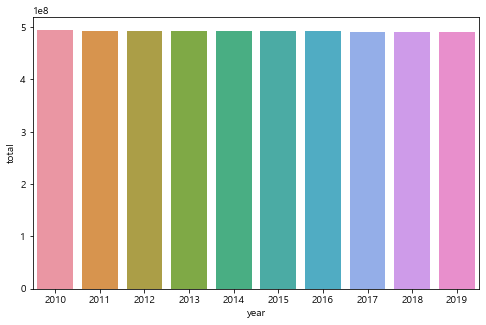

In [50]:
# 연도별 토지지목 넓이 그래프
plt.figure(figsize=(8.0, 5.0))
sns.barplot(data=year, x='year', y='total')

<BarContainer object of 10 artists>

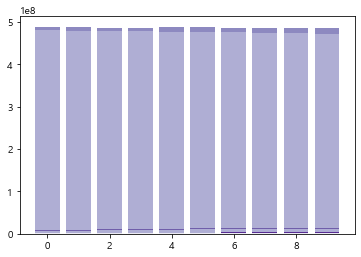

In [51]:
# 연도별 토지 넓이 현황(stacked bar)
plt.bar(range(len(year['year'])), year['orchard'])
plt.bar(range(len(year['year'])), year['pasture'], bottom=year['orchard'])
plt.bar(range(len(year['year'])), year['forest'], bottom=year['pasture'])
plt.bar(range(len(year['year'])), year['park'], bottom=year['forest'])
plt.bar(range(len(year['year'])), year['sports'], bottom=year['park'])
plt.bar(range(len(year['year'])), year['amusement'], bottom=year['sports'])

<AxesSubplot:xlabel='year', ylabel='orchard'>

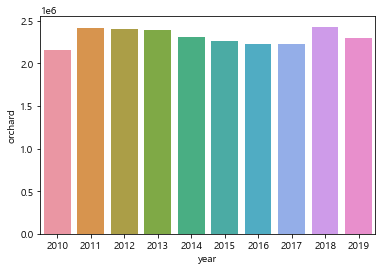

In [52]:
sns.barplot(data=year, x='year', y='orchard')

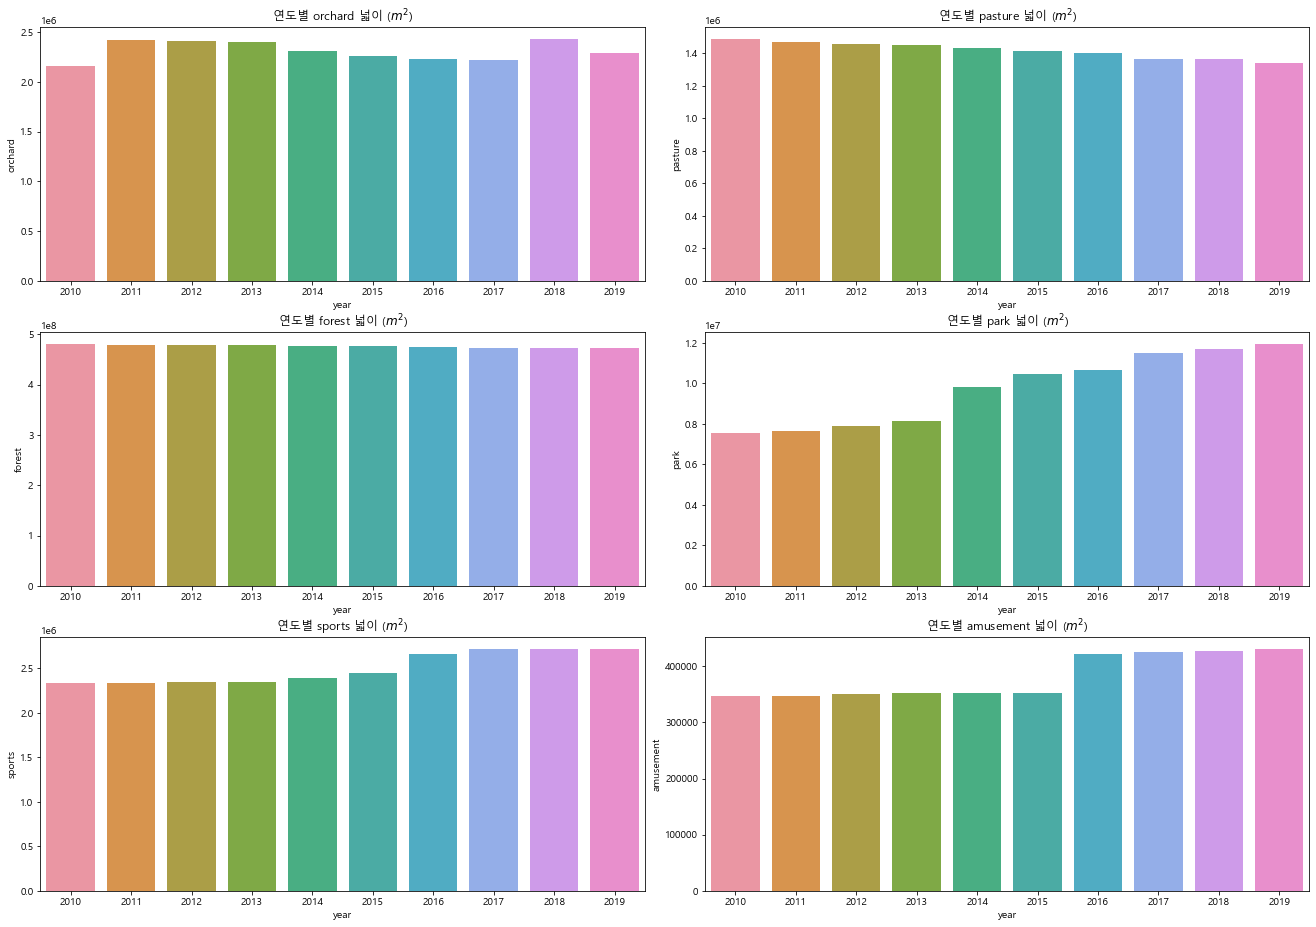

In [53]:
# 연도별 토지지목 넓이 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15.0, 15.0))
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.3, top=0.9, wspace=0.1, hspace=0.2)
sns.set_palette('Purples')
for i in range(1, 7):
    plt.subplot(3, 2, i)
    sns.barplot(data=year, x='year', y=year.iloc[:, i])
    plt.ylabel(year.columns[i])
    plt.xlabel('year')
    plt.title("연도별 {} 넓이 ($m^2$)".format(year.columns[i]))
    
    

In [54]:
# 구별 토지지목 넓이 합계
region=tree1.groupby('region2', as_index=False).sum()
region

region2   year    orchard     pasture        forest        park      sports  \
0      남구  20145        0.0         0.0  4.097431e+07  26766814.6     34910.0   
1     달서구  20145   303444.0     46520.0  1.936816e+08  21567651.0   1888545.0   
2     달성군  20145  6412176.6  11573782.9  2.563438e+09  19534193.9   1834071.1   
3      동구  20145  8286107.4    731820.0  1.106125e+09  13340621.0   6514766.4   
4      북구  20145  4330786.0   1603209.0  4.607247e+08   7832746.1   3399493.0   
5      서구  20145        0.0         0.0  1.973824e+07    740895.3     66870.0   
6     수성구  20145  3798265.0    223696.0  3.778532e+08   5466812.8  11270553.1   
7      중구  20145        0.0         0.0  0.000000e+00   2027054.2         0.0   

   amusement  
0        0.0  
1        0.0  
2  3345026.0  
3   269944.0  
4        0.0  
5        0.0  
6   191145.0  
7        0.0

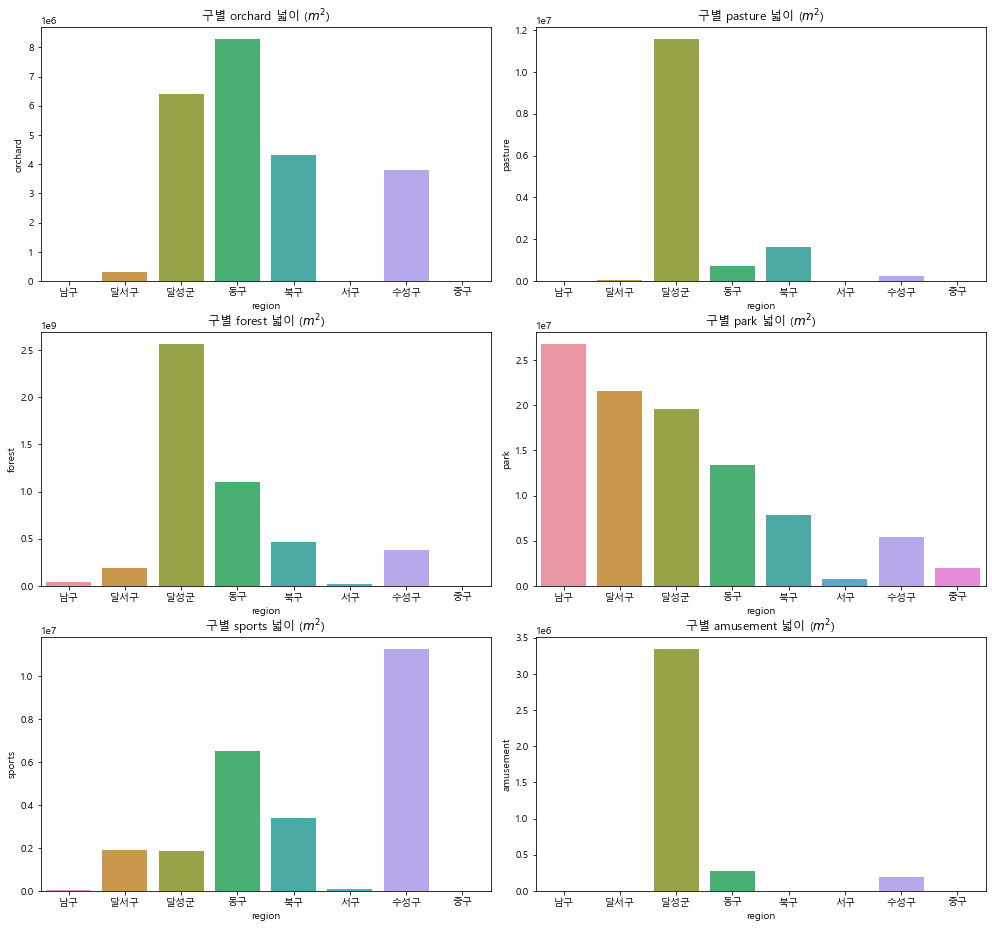

In [55]:
# 구별 토지지목 넓이 그래프
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15.0, 15.0))
plt.subplots_adjust(left=0.125, bottom=0.1, right=1, top=0.9, wspace=0.1, hspace=0.2)
sns.set_palette('Purples')
for i in range(2, 8):
    plt.subplot(3, 2, i-1)
    sns.barplot(data=region, x='region2', y=region.iloc[:, i])
    plt.ylabel(region.columns[i])
    plt.xlabel('region')
    plt.title("구별 {} 넓이 ($m^2$)".format(region.columns[i]))

In [56]:
# 연도별 구별 토지지목 합계
year_region=tree1.groupby(['year', 'region2'], as_index=False).sum()
year_region

year region2   orchard    pasture       forest       park     sports  \
0   2010      남구       0.0        0.0    4107091.7  2677733.7     3491.0   
1   2010     달서구   30283.0     4832.0   19497150.1  2064684.4   188783.3   
2   2010     달성군  629581.0  1189639.0  258971821.5   747991.4    80402.0   
3   2010      동구  682903.0    85214.0  111443374.0   634963.3   648769.0   
4   2010      북구  446750.0   173870.0   46315286.0   676553.9   327038.0   
..   ...     ...       ...        ...          ...        ...        ...   
75  2019      동구  854450.0    64868.0  110057610.9  1948899.4   655533.6   
76  2019      북구  390927.0   121218.0   45890326.6   947977.6   354315.0   
77  2019      서구       0.0        0.0    1956055.0    82240.0     6687.0   
78  2019     수성구  388626.0    20232.0   37384116.1   715909.2  1189408.2   
79  2019      중구       0.0        0.0          0.0   211412.6        0.0   

    amusement  
0         0.0  
1         0.0  
2    306417.0  
3     24070.0  
4         0.0  
..        ...  
75    27960.0  
76        0.0  
77        0.0  
78    23321.0  
79        0.0  

[80 rows x 8 columns]

In [57]:
# 연도별 전체 합계 계산
year_region['total']=year_region['orchard']+year_region['pasture']+year_region['forest']+year_region['park']+year_region['sports']+year_region['amusement']
year_region

year region2   orchard    pasture       forest       park     sports  \
0   2010      남구       0.0        0.0    4107091.7  2677733.7     3491.0   
1   2010     달서구   30283.0     4832.0   19497150.1  2064684.4   188783.3   
2   2010     달성군  629581.0  1189639.0  258971821.5   747991.4    80402.0   
3   2010      동구  682903.0    85214.0  111443374.0   634963.3   648769.0   
4   2010      북구  446750.0   173870.0   46315286.0   676553.9   327038.0   
..   ...     ...       ...        ...          ...        ...        ...   
75  2019      동구  854450.0    64868.0  110057610.9  1948899.4   655533.6   
76  2019      북구  390927.0   121218.0   45890326.6   947977.6   354315.0   
77  2019      서구       0.0        0.0    1956055.0    82240.0     6687.0   
78  2019     수성구  388626.0    20232.0   37384116.1   715909.2  1189408.2   
79  2019      중구       0.0        0.0          0.0   211412.6        0.0   

    amusement        total  
0         0.0    6788316.4  
1         0.0   21785732.8  
2    306417.0  261925851.9  
3     24070.0  113519293.3  
4         0.0   47939497.9  
..        ...          ...  
75    27960.0  113609321.9  
76        0.0   47704764.2  
77        0.0    2044982.0  
78    23321.0   39721612.5  
79        0.0     211412.6  

[80 rows x 9 columns]

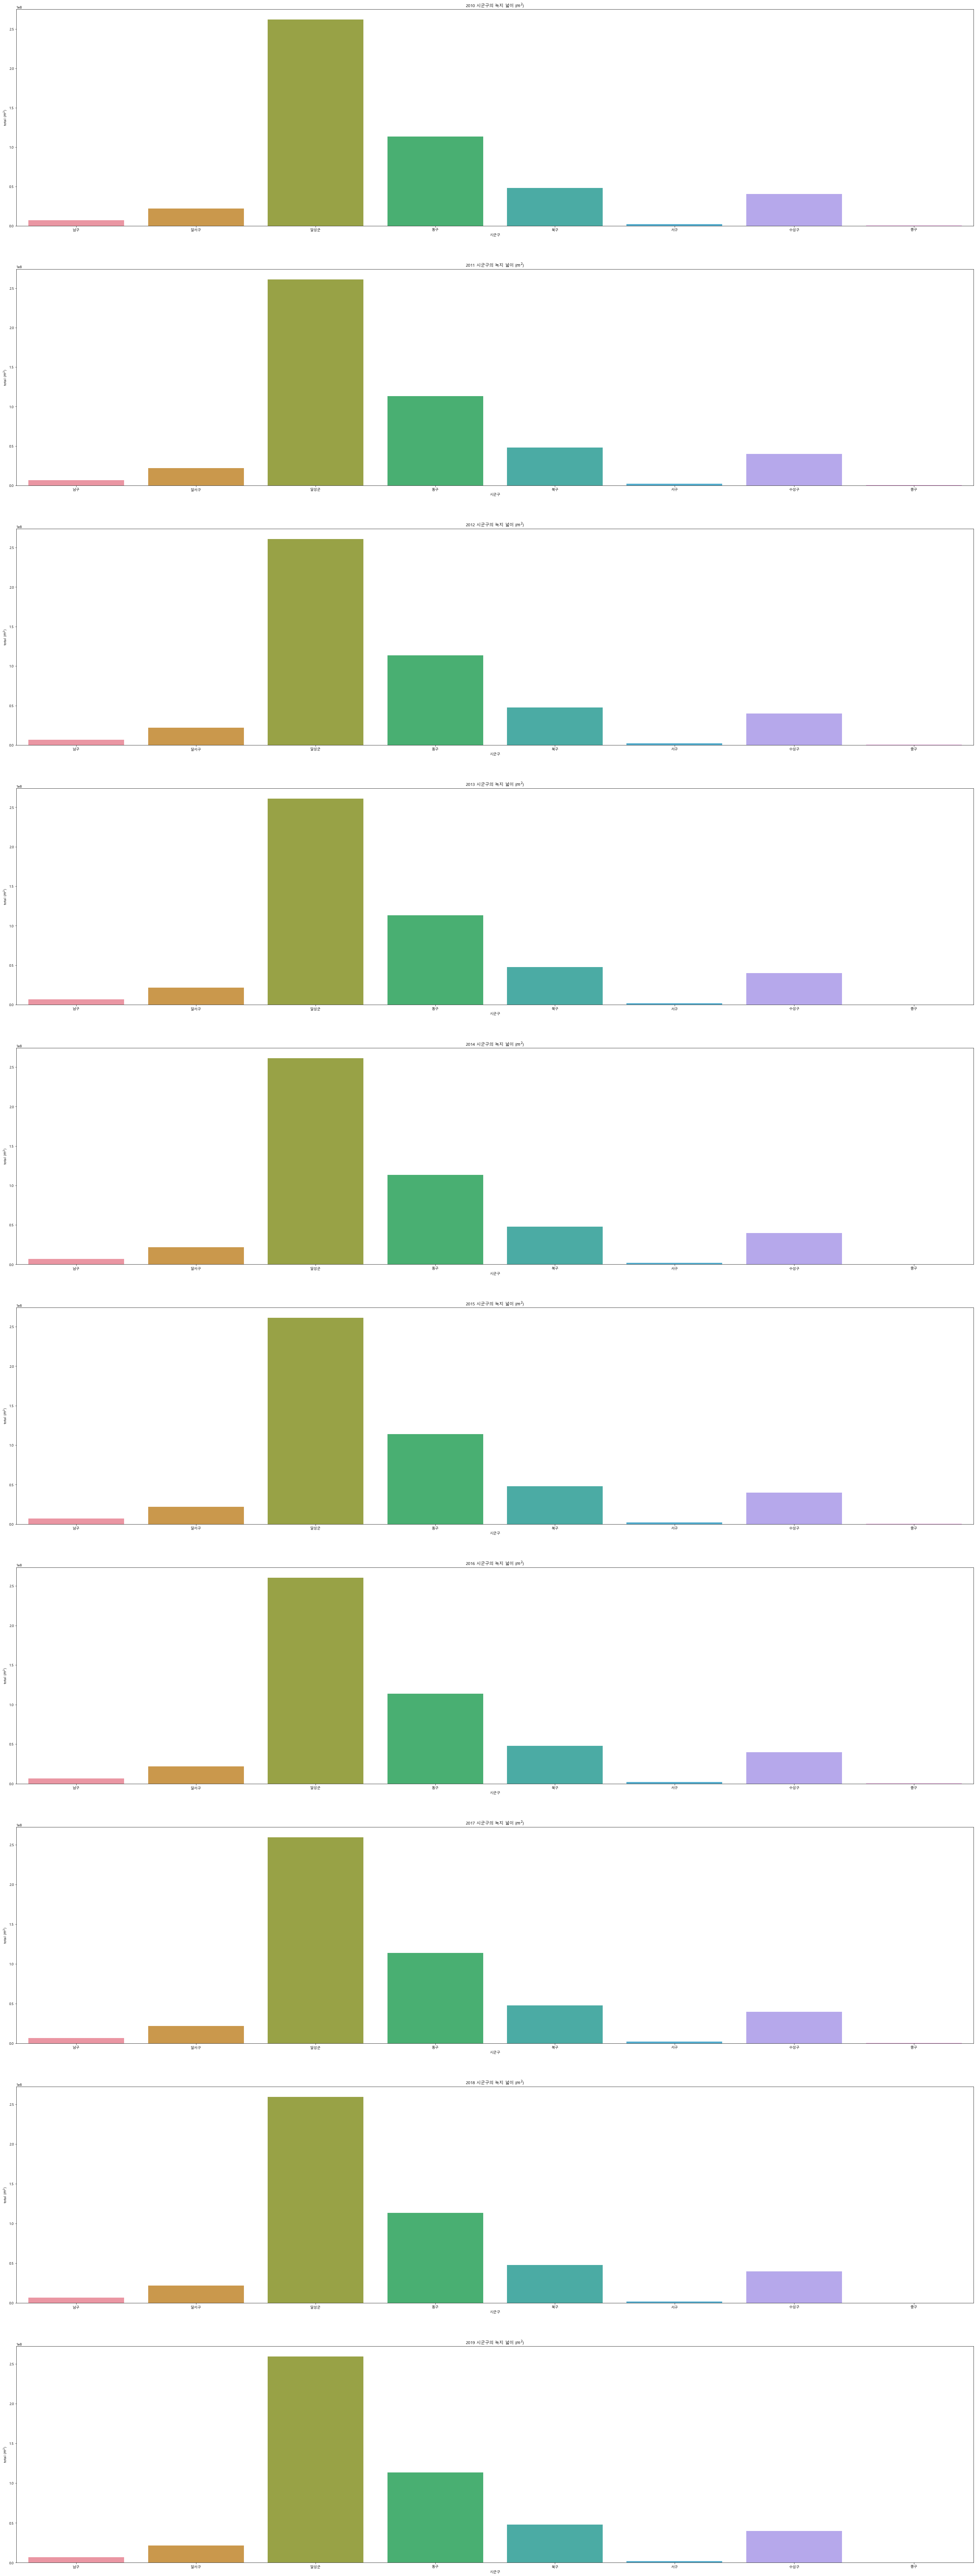

In [58]:
# 연도별 시군구의 토지지목 넓이 그래프
plt.figure(figsize=(20.0, 200.0))
plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=0.6, wspace=0.1, hspace=0.2)
sns.set_palette('Purples')
for i in range(2010, 2020):
    plt.subplot(10, 1, i-2009)
    df = year_region[year_region['year']==i]
    sns.barplot(data=df, x= 'region2', y='total')
    plt.ylabel('total ($m^2$)')
    plt.xlabel('시군구')
    plt.title("{} 시군구의 녹지 넓이 ($m^2$)".format(i))     

In [59]:
# 기상데이터와 공원데이터를 year와 region2 기준으로 병합
df_tree=pd.merge(left=df_10, right=tree1, how='left', on=['year','region2'], sort=False)
df_tree.reset_index(drop=True)
df_tree

year  month  day  hour             datetime  temp  rainfall  \
0         2010      6    1     0  2010-06-01 00:00:00  16.5       0.0   
1         2010      6    1     1  2010-06-01 01:00:00  18.1       0.0   
2         2010      6    1     2  2010-06-01 02:00:00  19.7       0.0   
3         2010      6    1     3  2010-06-01 03:00:00  20.8       0.0   
4         2010      6    1     4  2010-06-01 04:00:00  22.2       0.0   
...        ...    ...  ...   ...                  ...   ...       ...   
14727163  2022      4   30    19  2022-04-30 19:00:00  10.7       0.0   
14727164  2022      4   30    20  2022-04-30 20:00:00  11.0       0.0   
14727165  2022      4   30    21  2022-04-30 21:00:00  11.9       0.0   
14727166  2022      4   30    22  2022-04-30 22:00:00  13.4       0.0   
14727167  2022      4   30    23  2022-04-30 23:00:00  15.1       0.0   

          lightning  humidity  wind_speed  ...  region         HI        DI  \
0                -1      53.0         NaN  ...     동인동  15.589444  60.74355   
1                -1      49.0         NaN  ...     동인동  17.245000  62.73431   
2                -1      46.0         NaN  ...     동인동  18.926667  64.65038   
3                -1      41.0         NaN  ...     동인동  20.006111  65.72772   
4                -1      36.0         NaN  ...     동인동  21.415556  67.04608   
...             ...       ...         ...  ...     ...        ...       ...   
14727163         -1      71.0         2.1  ...     구지면   9.679444  52.33503   
14727164         -1      65.0         2.2  ...     구지면   9.852778  52.99350   
14727165         -1      61.0         2.2  ...     구지면  10.738333  54.40241   
14727166         -1      53.0         2.0  ...     구지면  12.179444  56.60598   
14727167         -1      41.0         2.1  ...     구지면  13.736111  58.79709   

          region2  orchard pasture  forest      park  sports  amusement  
0              중구      NaN     NaN     NaN  199274.7     NaN        NaN  
1              중구      NaN     NaN     NaN  199274.7     NaN        NaN  
2              중구      NaN     NaN     NaN  199274.7     NaN        NaN  
3              중구      NaN     NaN     NaN  199274.7     NaN        NaN  
4              중구      NaN     NaN     NaN  199274.7     NaN        NaN  
...           ...      ...     ...     ...       ...     ...        ...  
14727163      달성군      NaN     NaN     NaN       NaN     NaN        NaN  
14727164      달성군      NaN     NaN     NaN       NaN     NaN        NaN  
14727165      달성군      NaN     NaN     NaN       NaN     NaN        NaN  
14727166      달성군      NaN     NaN     NaN       NaN     NaN        NaN  
14727167      달성군      NaN     NaN     NaN       NaN     NaN        NaN  

[14727168 rows x 22 columns]

In [60]:
# year, region2 기준으로 그룹화 - park_m2 최고값, temp 최고값 계산
group=df_tree.groupby(['year', 'region2'], as_index=False)['temp', 'HI', 'DI', 'humidity', 'orchard', 'pasture', 'forest', 'park', 'sports', 'amusement'].max()
group

C:\Users\popcorn\AppData\Local\Temp\ipykernel_12284\4022949877.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group=df_tree.groupby(['year', 'region2'], as_index=False)['temp', 'HI', 'DI', 'humidity', 'orchard', 'pasture', 'forest', 'park', 'sports', 'amusement'].max()


year region2  temp         HI        DI  humidity   orchard    pasture  \
0    2010      남구  36.6  48.506727  88.25246     100.0       NaN        NaN   
1    2010     달서구  37.9  48.506727  88.25246     100.0   30283.0     4832.0   
2    2010     달성군  37.6  49.921482  88.78464     100.0  629581.0  1189639.0   
3    2010      동구  37.1  44.258759  86.69366     100.0  682903.0    85214.0   
4    2010      북구  37.4  48.782329  88.54480     100.0  446750.0   173870.0   
..    ...     ...   ...        ...       ...       ...       ...        ...   
99   2022      동구  30.0  29.076272  75.83600     100.0       NaN        NaN   
100  2022      북구  29.9  28.698153  75.34099      99.0       NaN        NaN   
101  2022      서구  29.4  28.345637  74.94915      99.0       NaN        NaN   
102  2022     수성구  30.0  29.076272  75.83600     100.0       NaN        NaN   
103  2022      중구  28.8  27.887146  74.37090      95.0       NaN        NaN   

          forest       park    sports  amusement  
0      4107091.7  2677733.7    3491.0        NaN  
1     19497150.1  2064684.4  188783.3        NaN  
2    258971821.5   747991.4   80402.0   306417.0  
3    111443374.0   634963.3  648769.0    24070.0  
4     46315286.0   676553.9  327038.0        NaN  
..           ...        ...       ...        ...  
99           NaN        NaN       NaN        NaN  
100          NaN        NaN       NaN        NaN  
101          NaN        NaN       NaN        NaN  
102          NaN        NaN       NaN        NaN  
103          NaN        NaN       NaN        NaN  

[104 rows x 12 columns]

In [61]:
# 2020년부터 2022년 데이터 삭제
group=group[group['year']<2020]
group

year region2  temp         HI        DI  humidity   orchard    pasture  \
0   2010      남구  36.6  48.506727  88.25246     100.0       NaN        NaN   
1   2010     달서구  37.9  48.506727  88.25246     100.0   30283.0     4832.0   
2   2010     달성군  37.6  49.921482  88.78464     100.0  629581.0  1189639.0   
3   2010      동구  37.1  44.258759  86.69366     100.0  682903.0    85214.0   
4   2010      북구  37.4  48.782329  88.54480     100.0  446750.0   173870.0   
..   ...     ...   ...        ...       ...       ...       ...        ...   
75  2019      동구  36.7  43.105405  86.04238     100.0  854450.0    64868.0   
76  2019      북구  37.1  43.288116  86.25498     100.0  390927.0   121218.0   
77  2019      서구  36.2  42.257394  85.70320     100.0       NaN        NaN   
78  2019     수성구  36.3  43.105405  86.04238     100.0  388626.0    20232.0   
79  2019      중구  35.7  39.685374  84.30970     100.0       NaN        NaN   

         forest       park     sports  amusement  
0     4107091.7  2677733.7     3491.0        NaN  
1    19497150.1  2064684.4   188783.3        NaN  
2   258971821.5   747991.4    80402.0   306417.0  
3   111443374.0   634963.3   648769.0    24070.0  
4    46315286.0   676553.9   327038.0        NaN  
..          ...        ...        ...        ...  
75  110057610.9  1948899.4   655533.6    27960.0  
76   45890326.6   947977.6   354315.0        NaN  
77    1956055.0    82240.0     6687.0        NaN  
78   37384116.1   715909.2  1189408.2    23321.0  
79          NaN   211412.6        NaN        NaN  

[80 rows x 12 columns]

In [62]:
# 토지지목 합계 계산
group['green total']=group.iloc[:, 6:].sum(axis=1)
group

C:\Users\popcorn\AppData\Local\Temp\ipykernel_12284\1079670387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['green total']=group.iloc[:, 6:].sum(axis=1)


year region2  temp         HI        DI  humidity   orchard    pasture  \
0   2010      남구  36.6  48.506727  88.25246     100.0       NaN        NaN   
1   2010     달서구  37.9  48.506727  88.25246     100.0   30283.0     4832.0   
2   2010     달성군  37.6  49.921482  88.78464     100.0  629581.0  1189639.0   
3   2010      동구  37.1  44.258759  86.69366     100.0  682903.0    85214.0   
4   2010      북구  37.4  48.782329  88.54480     100.0  446750.0   173870.0   
..   ...     ...   ...        ...       ...       ...       ...        ...   
75  2019      동구  36.7  43.105405  86.04238     100.0  854450.0    64868.0   
76  2019      북구  37.1  43.288116  86.25498     100.0  390927.0   121218.0   
77  2019      서구  36.2  42.257394  85.70320     100.0       NaN        NaN   
78  2019     수성구  36.3  43.105405  86.04238     100.0  388626.0    20232.0   
79  2019      중구  35.7  39.685374  84.30970     100.0       NaN        NaN   

         forest       park     sports  amusement  green total  
0     4107091.7  2677733.7     3491.0        NaN    6788316.4  
1    19497150.1  2064684.4   188783.3        NaN   21785732.8  
2   258971821.5   747991.4    80402.0   306417.0  261925851.9  
3   111443374.0   634963.3   648769.0    24070.0  113519293.3  
4    46315286.0   676553.9   327038.0        NaN   47939497.9  
..          ...        ...        ...        ...          ...  
75  110057610.9  1948899.4   655533.6    27960.0  113609321.9  
76   45890326.6   947977.6   354315.0        NaN   47704764.2  
77    1956055.0    82240.0     6687.0        NaN    2044982.0  
78   37384116.1   715909.2  1189408.2    23321.0   39721612.5  
79          NaN   211412.6        NaN        NaN     211412.6  

[80 rows x 13 columns]

In [63]:
# 연도, 기온, 열지수, 불쾌지수, 습도, 토지지목 합계 추출
group_1=group[['year', 'temp', 'HI', 'DI', 'humidity', 'green total']]
group_1

year  temp         HI        DI  humidity  green total
0   2010  36.6  48.506727  88.25246     100.0    6788316.4
1   2010  37.9  48.506727  88.25246     100.0   21785732.8
2   2010  37.6  49.921482  88.78464     100.0  261925851.9
3   2010  37.1  44.258759  86.69366     100.0  113519293.3
4   2010  37.4  48.782329  88.54480     100.0   47939497.9
..   ...   ...        ...       ...       ...          ...
75  2019  36.7  43.105405  86.04238     100.0  113609321.9
76  2019  37.1  43.288116  86.25498     100.0   47704764.2
77  2019  36.2  42.257394  85.70320     100.0    2044982.0
78  2019  36.3  43.105405  86.04238     100.0   39721612.5
79  2019  35.7  39.685374  84.30970     100.0     211412.6

[80 rows x 6 columns]

In [64]:
# 연도별 최고온도, 최고 열지수, 최고불쾌지수, 녹지면적 합계
group_1=group_1.groupby('year', as_index=False).agg({'temp':'max', 'HI':'max', 'DI':'max', 'green total':'sum'})
group_1

year  temp         HI         DI  green total
0  2010  37.9  49.921482  88.784640  494705959.5
1  2011  39.5  64.443532  94.294225  493421436.2
2  2012  37.8  45.643516  87.211510  492847923.9
3  2013  37.9  51.811268  89.106400  492934017.7
4  2014  39.1  53.174878  90.370000  493022081.2
5  2015  38.0  45.110682  86.839860  493076943.5
6  2016  38.9  51.442436  89.668000  492458165.4
7  2017  38.4  50.680682  89.538340  491243305.8
8  2018  40.4  53.281230  90.583250  491158292.0
9  2019  37.1  47.465843  87.426130  491068576.2

In [65]:
# 변수별 상관관계 확인
group_1.corr()

year      temp        HI        DI  green total
year         1.000000  0.075260 -0.283330 -0.241107    -0.922325
temp         0.075260  1.000000  0.649480  0.734357    -0.130156
HI          -0.283330  0.649480  1.000000  0.988472     0.147236
DI          -0.241107  0.734357  0.988472  1.000000     0.105233
green total -0.922325 -0.130156  0.147236  0.105233     1.000000

<AxesSubplot:>

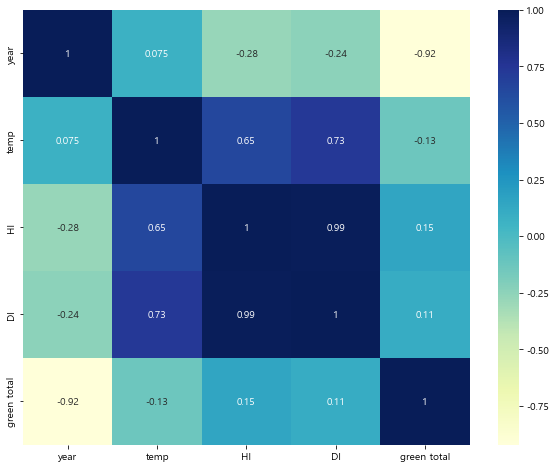

In [66]:
# heatmap으로 상관관계 확인
plt.figure(figsize=(10,8))
sns.heatmap(group_1.corr(), annot=True, cmap='YlGnBu')

- 토지지목(green total) 넓이와 나머지 변수(불쾌지수, 열지수)와의 상관계수가 0.7 이하로 나타나 상관관계가 없음.
- 토지지목과 연도의 상관계수가 -0.92로 나타나 음의 상관관계가 있음을 확인함.

Text(0.5, 1.0, '녹지넓이와 불쾌지수 산점도')

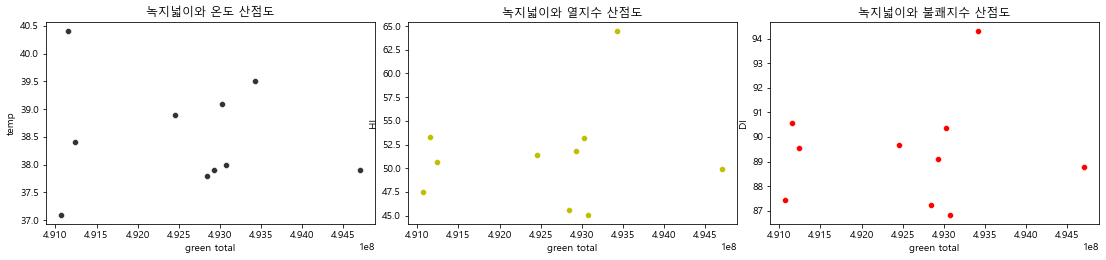

In [67]:
# 녹지넓이와 변수(온도, 열지수, 불쾌지수)와의 산점도
# plt.figure(figsize=(10,10))
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(3,  2))
plt.subplots_adjust(left=0.125, bottom=0.1, right=5, top=1.5, wspace=0.1, hspace=0.2)

# 공원넓이와 온도 산점도
sns.scatterplot(data=group_1, x='green total', y='temp', ax=ax[0], color='.2')
ax[0].set_title('녹지넓이와 온도 산점도')

# 공원 넓이와 열지수 산점도
sns.scatterplot(data=group_1, x='green total', y='HI', ax=ax[1], color='y')
ax[1].set_title('녹지넓이와 열지수 산점도')

# 공원 넓이와 불쾌지수 산점도
sns.scatterplot(data=group_1, x='green total', y='DI', ax=ax[2], color='r')
ax[2].set_title('녹지넓이와 불쾌지수 산점도')

# # 공원 넓이와 습도 산점도
# sns.scatterplot(data=group_1, x='green total', y='humidity', ax=ax[1, 1], color='b')
# ax[1, 1].set_title('녹지넓이와 습도 산점도')

In [68]:
group

year region2  temp         HI        DI  humidity   orchard    pasture  \
0   2010      남구  36.6  48.506727  88.25246     100.0       NaN        NaN   
1   2010     달서구  37.9  48.506727  88.25246     100.0   30283.0     4832.0   
2   2010     달성군  37.6  49.921482  88.78464     100.0  629581.0  1189639.0   
3   2010      동구  37.1  44.258759  86.69366     100.0  682903.0    85214.0   
4   2010      북구  37.4  48.782329  88.54480     100.0  446750.0   173870.0   
..   ...     ...   ...        ...       ...       ...       ...        ...   
75  2019      동구  36.7  43.105405  86.04238     100.0  854450.0    64868.0   
76  2019      북구  37.1  43.288116  86.25498     100.0  390927.0   121218.0   
77  2019      서구  36.2  42.257394  85.70320     100.0       NaN        NaN   
78  2019     수성구  36.3  43.105405  86.04238     100.0  388626.0    20232.0   
79  2019      중구  35.7  39.685374  84.30970     100.0       NaN        NaN   

         forest       park     sports  amusement  green total  
0     4107091.7  2677733.7     3491.0        NaN    6788316.4  
1    19497150.1  2064684.4   188783.3        NaN   21785732.8  
2   258971821.5   747991.4    80402.0   306417.0  261925851.9  
3   111443374.0   634963.3   648769.0    24070.0  113519293.3  
4    46315286.0   676553.9   327038.0        NaN   47939497.9  
..          ...        ...        ...        ...          ...  
75  110057610.9  1948899.4   655533.6    27960.0  113609321.9  
76   45890326.6   947977.6   354315.0        NaN   47704764.2  
77    1956055.0    82240.0     6687.0        NaN    2044982.0  
78   37384116.1   715909.2  1189408.2    23321.0   39721612.5  
79          NaN   211412.6        NaN        NaN     211412.6  

[80 rows x 13 columns]

In [69]:
# 연도별 최고 기온과 녹지면적 합계 그룹화
year_g=group.groupby('year', as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})
year_g

C:\Users\popcorn\AppData\Local\Temp\ipykernel_12284\2701168754.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_g=group.groupby('year', as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})


year  temp  green total
0  2010  37.9  494705959.5
1  2011  39.5  493421436.2
2  2012  37.8  492847923.9
3  2013  37.9  492934017.7
4  2014  39.1  493022081.2
5  2015  38.0  493076943.5
6  2016  38.9  492458165.4
7  2017  38.4  491243305.8
8  2018  40.4  491158292.0
9  2019  37.1  491068576.2

Text(0, 0.5, 'Green Area($m^2$)')

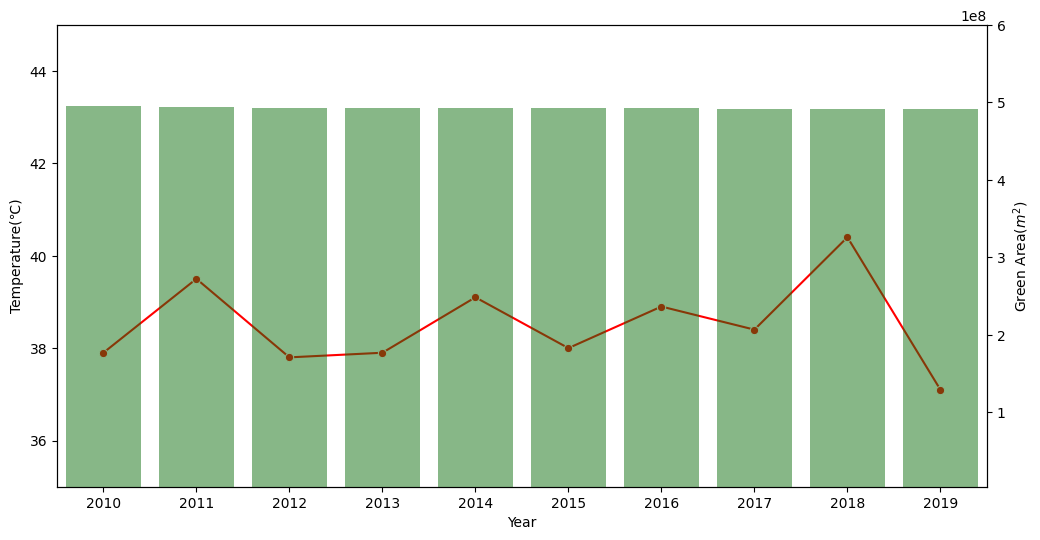

In [70]:
# 연도별 온도와 녹지면적 그래프
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature(℃)')
ax1.set_ylim(35, 45)
sns.lineplot(data = year_g['temp'], marker='o', sort = False, ax=ax1, color='red')
ax2 = ax1.twinx()
sns.barplot(data = year_g, x='year', y='green total', alpha=0.5, ax=ax2, color='green')
ax2.set_ylim(4000000, 600000000)
ax2.set_ylabel('Green Area($m^2$)')

In [71]:
# 연도, 시군구별 최고온도, 녹지면적 합계 그룹화
y_r=group.groupby(['year', 'region2'], as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})
y_r

C:\Users\popcorn\AppData\Local\Temp\ipykernel_12284\3423829001.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y_r=group.groupby(['year', 'region2'], as_index=False)['temp', 'green total'].agg({'temp':'max', 'green total':'sum'})


year region2  temp  green total
0   2010      남구  36.6    6788316.4
1   2010     달서구  37.9   21785732.8
2   2010     달성군  37.6  261925851.9
3   2010      동구  37.1  113519293.3
4   2010      북구  37.4   47939497.9
..   ...     ...   ...          ...
75  2019      동구  36.7  113609321.9
76  2019      북구  37.1   47704764.2
77  2019      서구  36.2    2044982.0
78  2019     수성구  36.3   39721612.5
79  2019      중구  35.7     211412.6

[80 rows x 4 columns]

In [72]:
years = list(y_r['year'].unique())
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

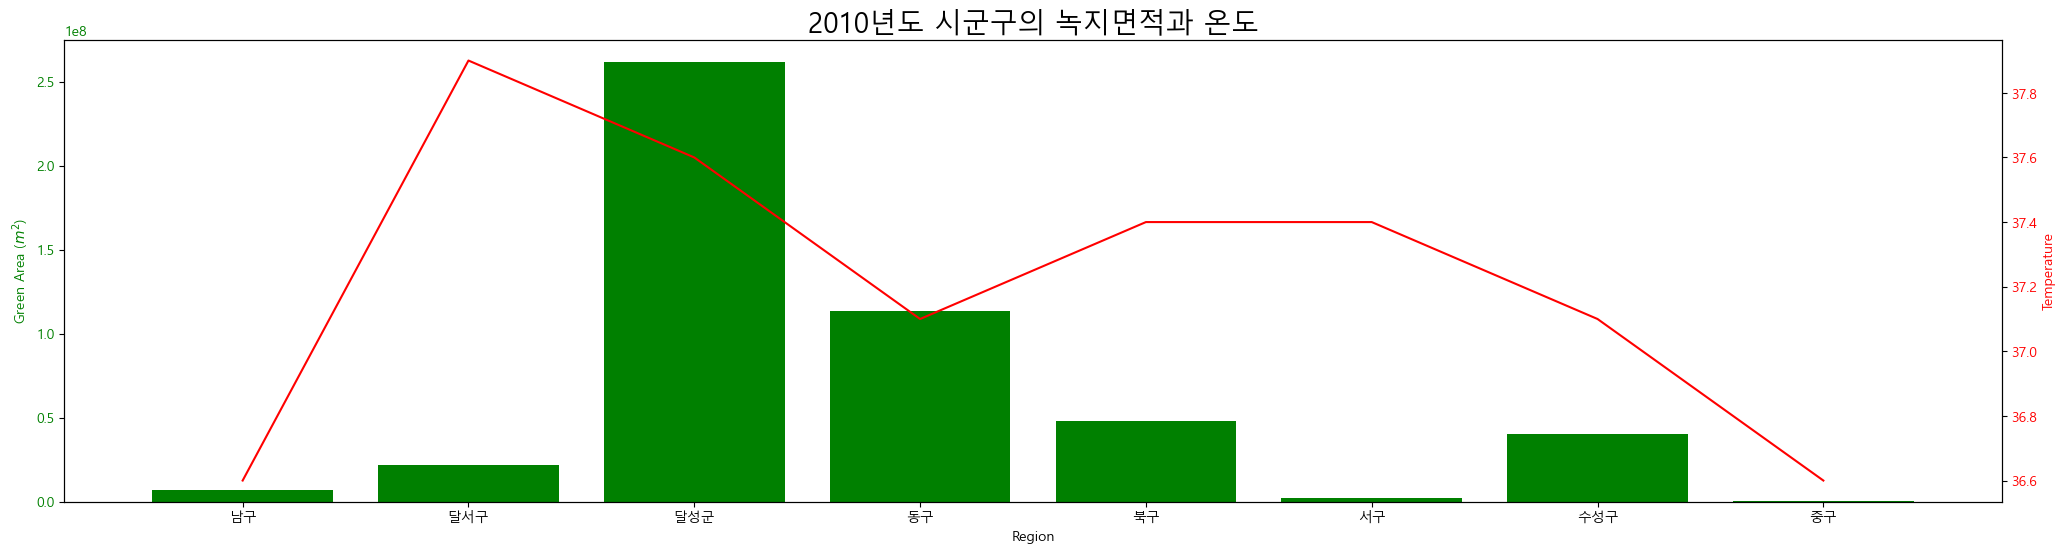

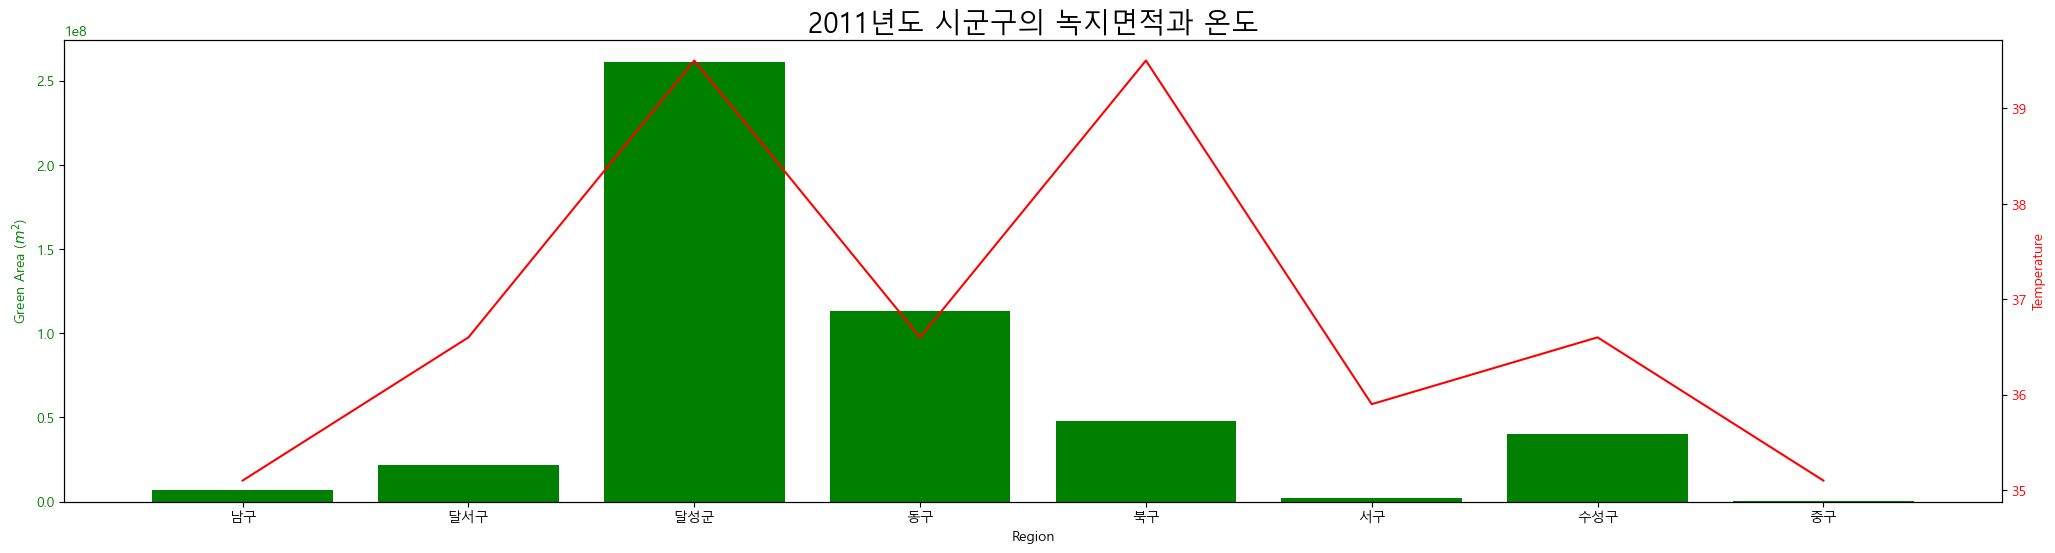

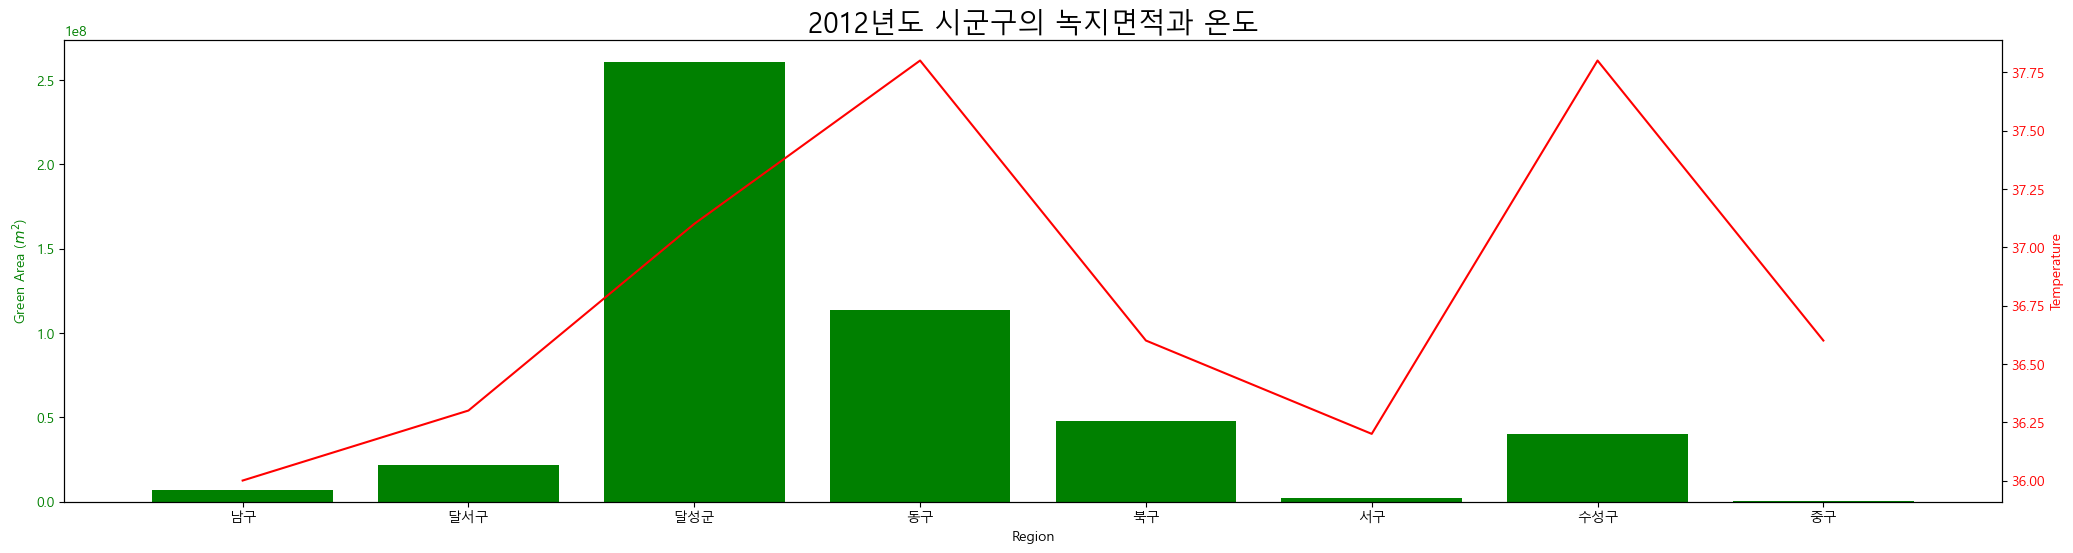

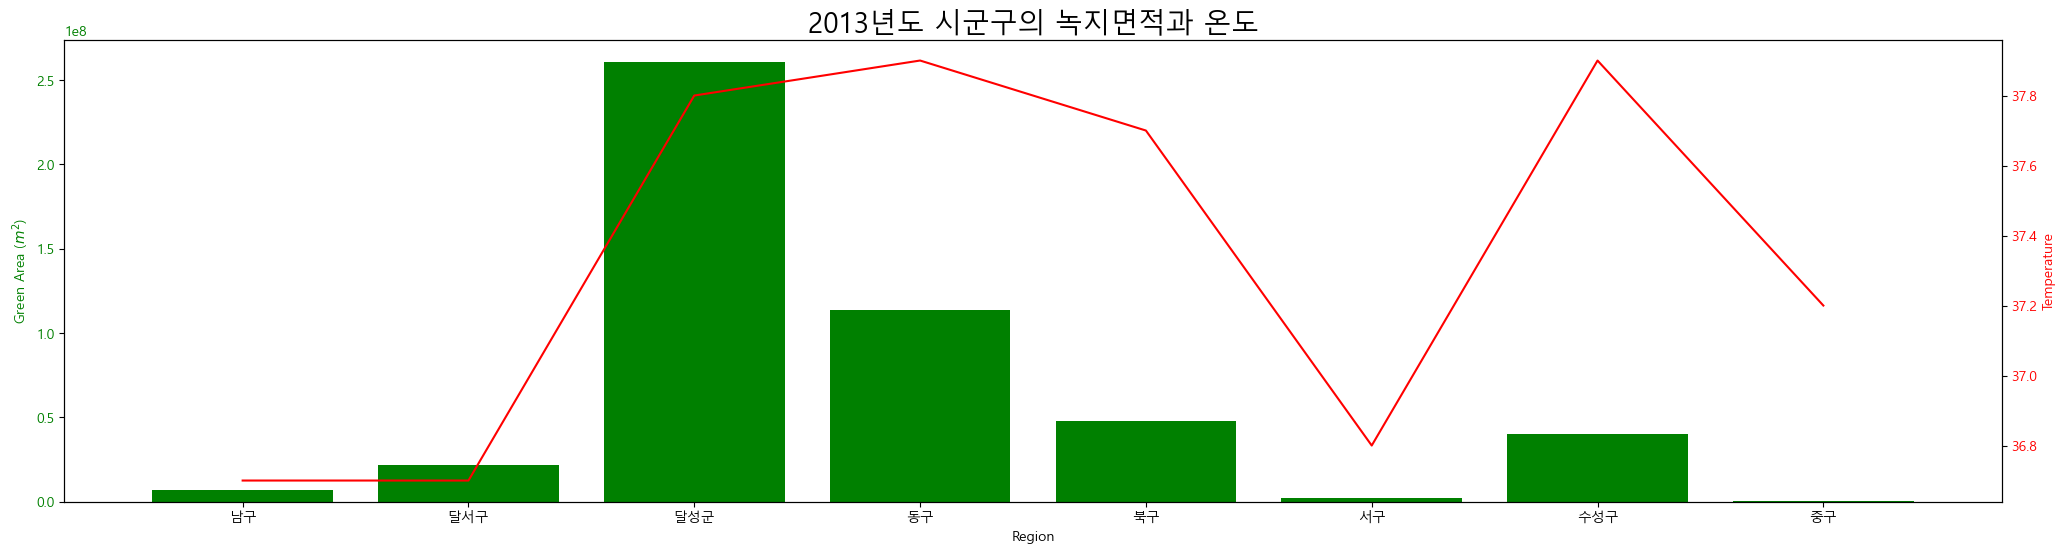

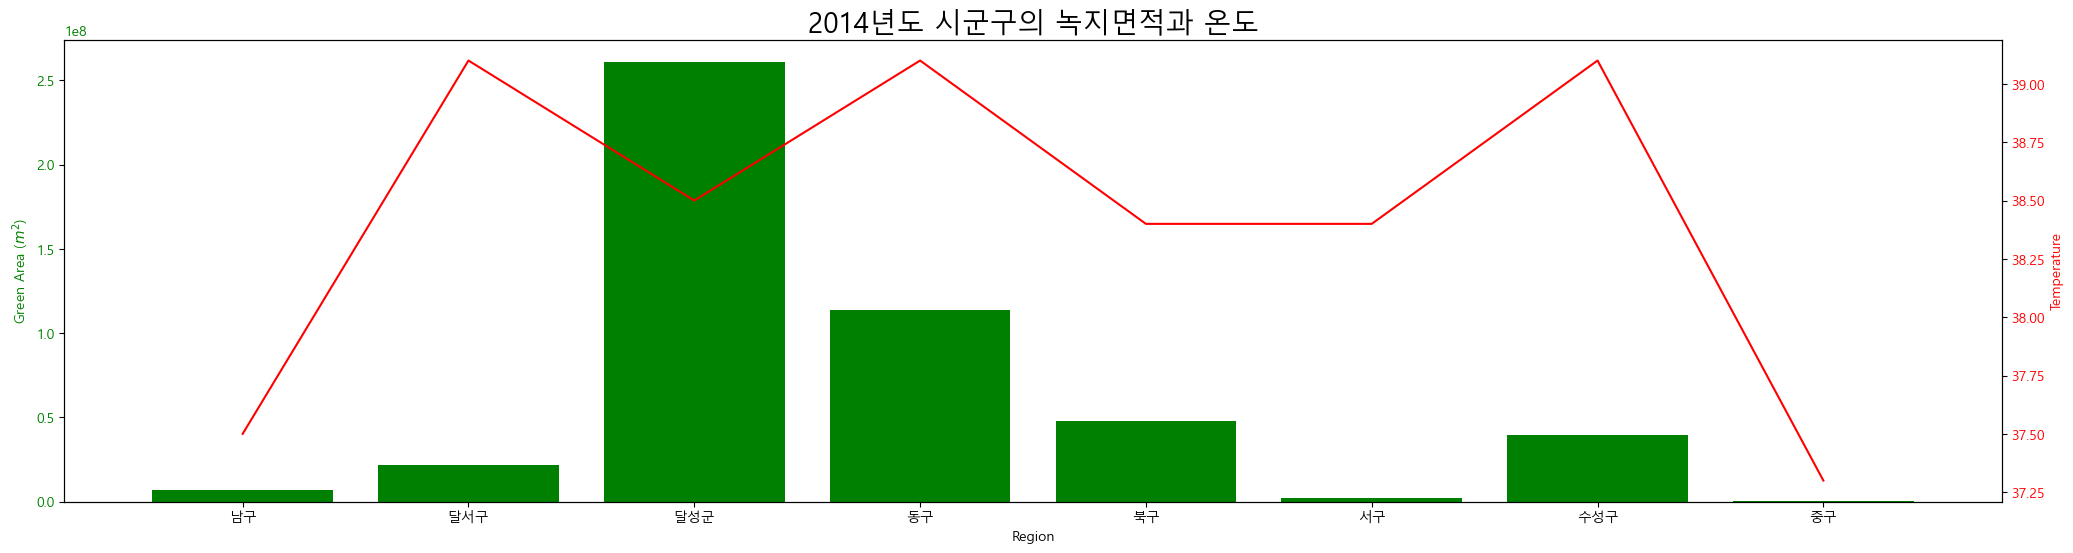

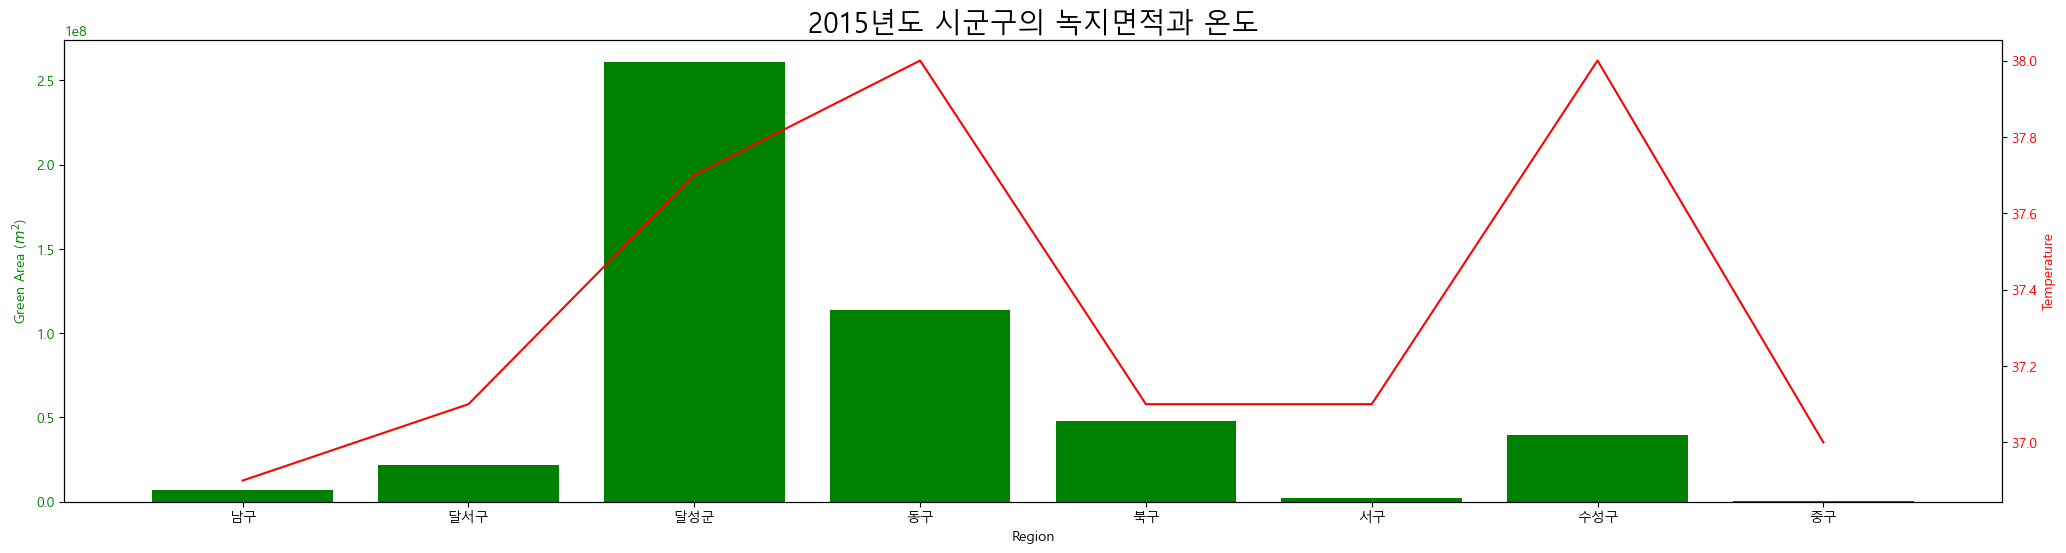

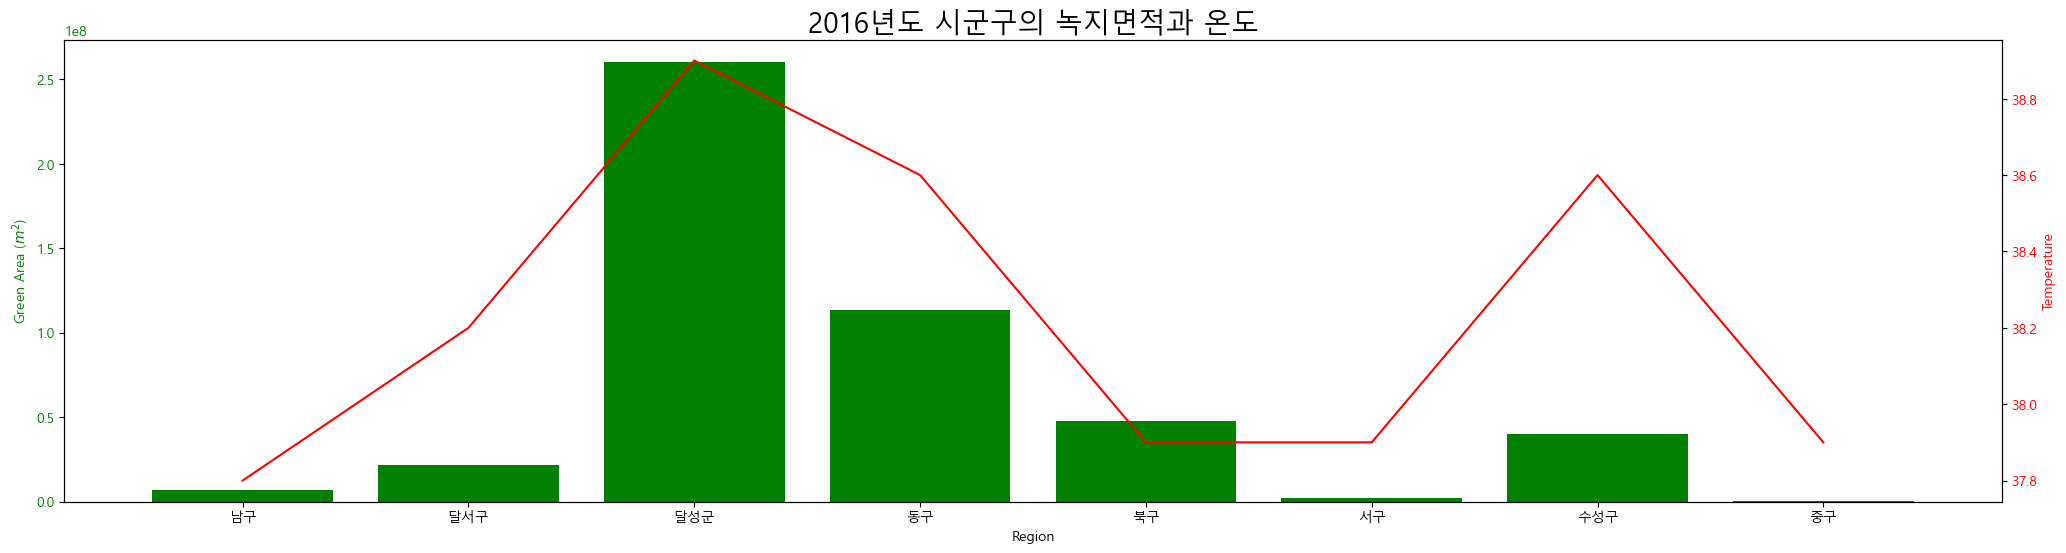

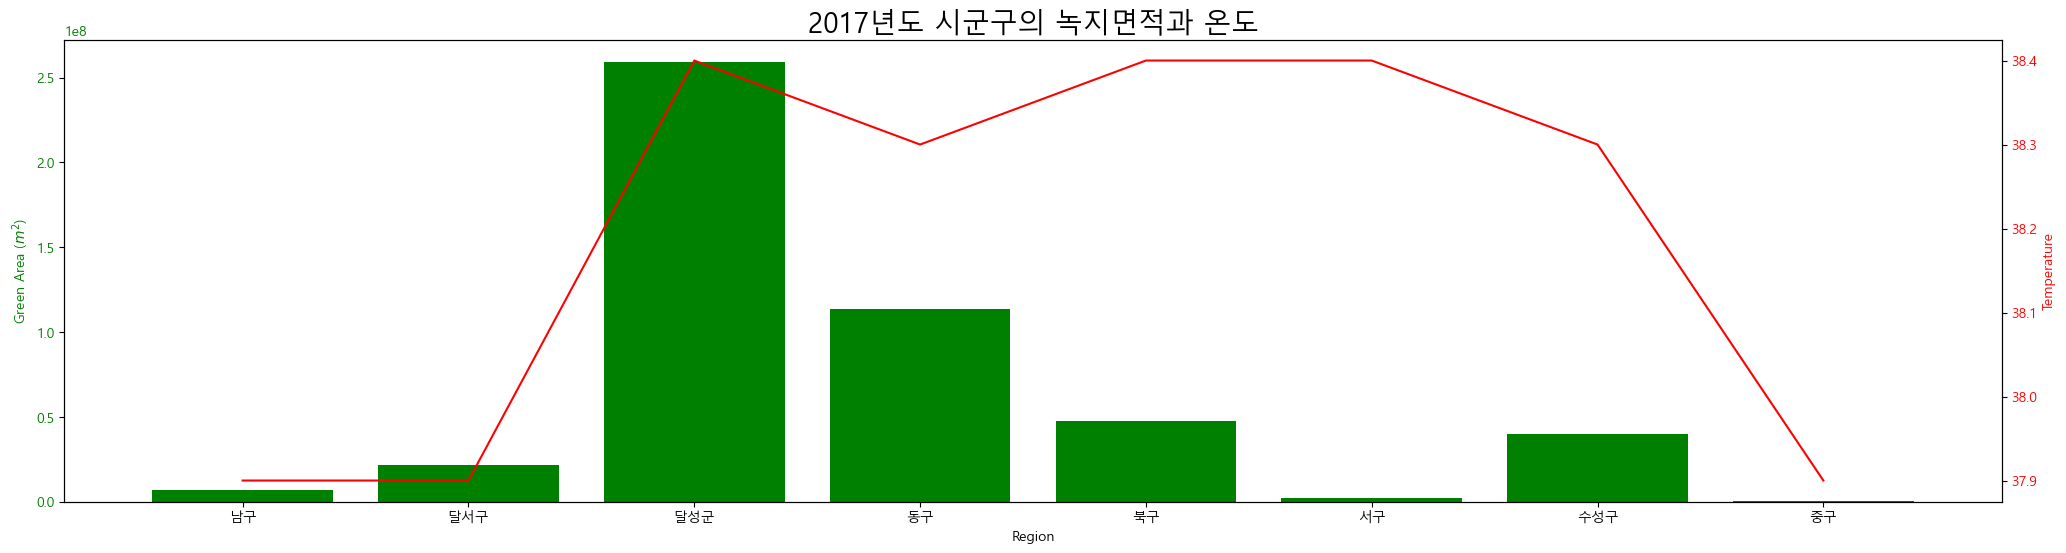

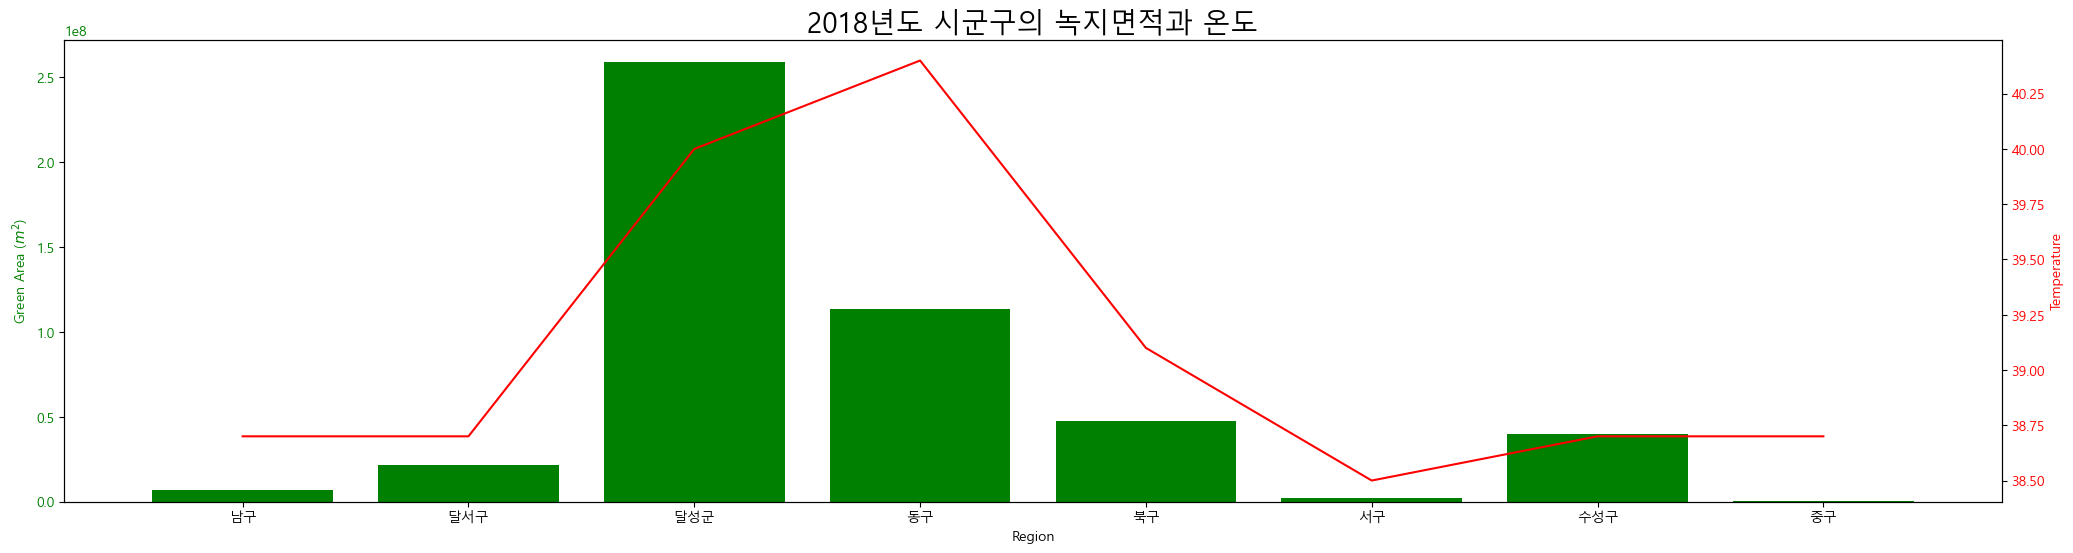

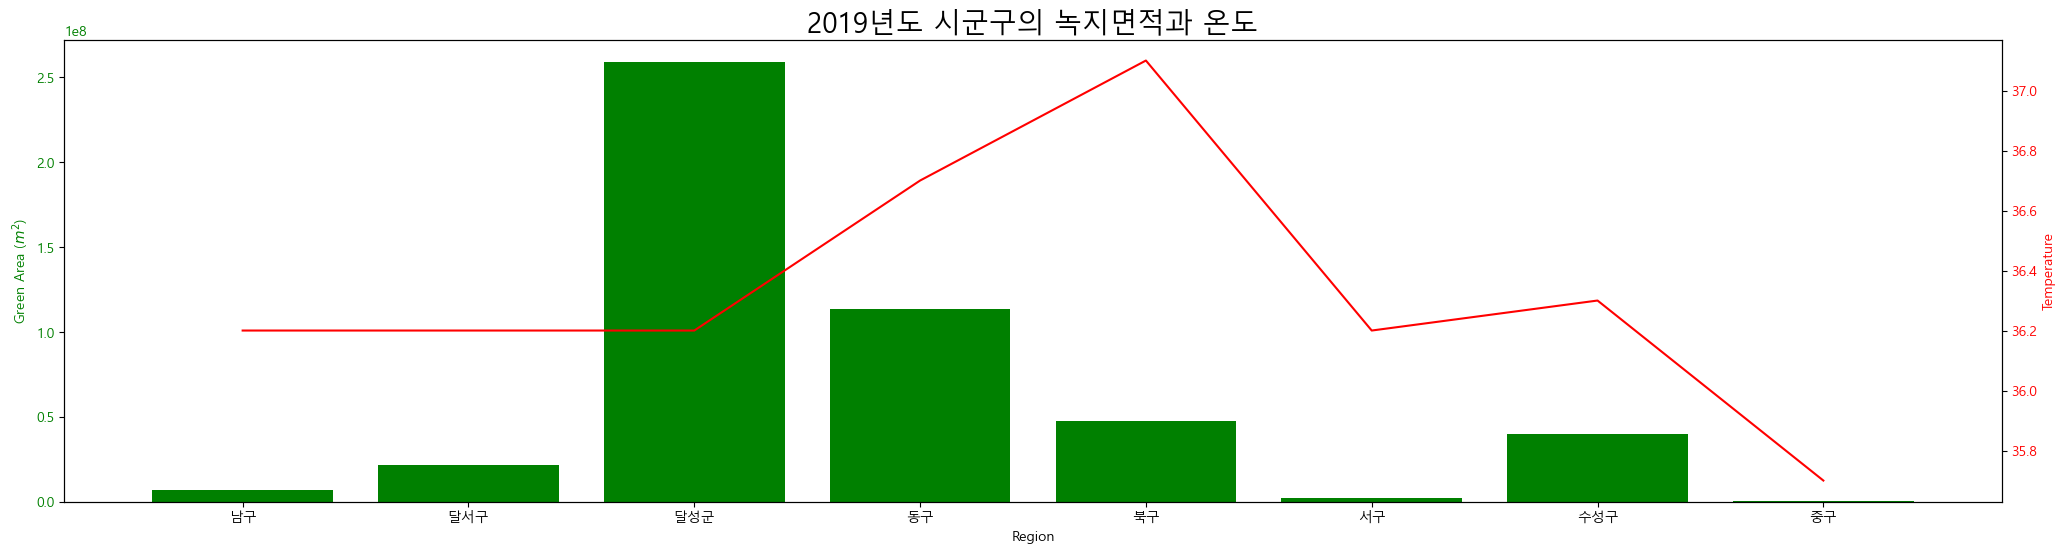

In [76]:
# 연도별 시군구의 녹지면적과 온도 그래프
plt.rcParams['font.family'] = 'Malgun Gothic'
for i in range(len(years)):
    
    y1 = list(y_r.loc[y_r['year'] == years[i], 'green total'])
    y2 = list(y_r.loc[y_r['year'] == years[i], 'temp'])
    x = list(y_r.loc[y_r['year'] == years[i], 'region2'])

    fig = plt.figure(figsize=(25,6)) ## 캔버스 생성
    fig.set_facecolor('white')
    ax1 = fig.add_subplot() ## axes 생성
    plt.xticks(rotation=0)
    
    color1 = 'g'
    ax1.bar(x, y1, color=color1)
    ax1.set_xlabel('Region', fontsize = 10)
    ax1.set_ylabel('Green Area ($m^2$)', color=color1, fontsize = 10)
    ax1.set_title('{}년도 시군구의 녹지면적과 온도'.format(years[i]), fontsize = 20)
    ax1.tick_params(axis='y', labelcolor=color1)    

    color2 = 'r'
    ax2 = ax1.twinx()
    ax2.plot(x, y2, color=color2)
    ax2.set_ylabel('Temperature', color=color2, fontsize = 10)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.show()

- 연도별 시군구의 녹지면적과 온도에 대한 그래프를 확인한 결과,
시군구의 녹지면적과 온도의 상관관계는 보이지 않음

- 결론
1. 녹지면적과 온도, 습도, 불쾌지수, 열지수의 상관계수가 0.7 이상이 없음 
2. 연도별 대구 전체 녹지면적에 따른 온도변화를 확인한 결과, 연도별 녹지면적의 변화가 거의 없었으며 온도가 면적에 따라 변화하는 모습을 보이지 않음
3. 연도별 시군구의 녹지면적과 온도의 상관관계는 보이지 않음

-> 녹지면적에 따른 온도 변화가 보이지 않으며 두 변수 간의 상관계수가 0.32로 상관관계가 없음